# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [2]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Variables globales

In [3]:
DATASETS_NAME = {
    'IBEREVAL_MISOGYNY_2018_TRAIN':'../data/ibereval_misogyny2018_es_train_copia.csv',
    'IBEREVAL_MISOGYNY_2018_TEST':'../data/ibereval_misogyny2018_es_test.csv',
}
DATASETS_DELIMITERS = {
    'IBEREVAL_MISOGYNY_2018':','
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### IBEREVAL MISOGYNY 2018

In [4]:
df_ibereval = pd.read_csv ( DATASETS_NAME['IBEREVAL_MISOGYNY_2018_TRAIN'],
        skiprows=1,
        header=None,
        names = ["_", "id", "text", "misogynous", "misogyny_category", "target"],
        delimiter=DATASETS_DELIMITERS['IBEREVAL_MISOGYNY_2018'])
df_ibereval = df_ibereval.drop('_', axis=1)


----------------------------

## POS (Parts Of Speech)


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [5]:
df_ibereval.head()

id                                               text  misogynous  \
0   1  Módulo 01 Invitados Directivos del Sindicato '...           0   
1   2  @Causafiebres Claro, es que ha puesto imbécil ...           0   
2   3  @Nanchinho A ver si haces algo que sirva para ...           1   
3   4  @Rafhyta86 @ElDesmadre__ Habe pasame el video ...           1   
4   5                   @Otb_35 Que te calles so guarra.           1   

  misogyny_category   target  
0                 0        0  
1                 0        0  
2         discredit   active  
3         discredit  passive  
4         dominance   active

In [6]:
pos_tagger = create_analyzer("pos", lang="es")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/829k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [7]:
#Ejemplo de la documentacion
pos_tagger.predict("Me llamo Juan Manuel Pérez y vivo en Argentina")

TokenClassificationOutput(tokens=['Me', 'llamo', 'Juan', 'Manuel', 'Pérez', 'y', 'vivo', 'en', 'Argentina'], labels=['PRON', 'VERB', 'PROPN', 'PROPN', 'PROPN', 'CONJ', 'VERB', 'ADP', 'PROPN'])

In [8]:
#detectado un error que tienen en la implementacion de la libreria con algunos emojis como 🤦‍♀️, se eliminaron cuando había alguno de estos conflictivo en una copia del archivo
pos_tagger.predict("El feminismo de Lamas 🤦‍♀️...justificando cultura de violación y acoso, muy desatinado! Lamas representa el white feminism incapaz de ver más allá de sus privilegios. Gracias @catalinapordios por el despliegue de sensatez. https://t.co/sNJYO3oPqG")

AttributeError: 'NoneType' object has no attribute 'startswith'

In [9]:
def analyze_pos_tags(text):
    result = pos_tagger.predict(text.lower())
    pos_tags = list(zip(result.tokens, result.labels))

    print(f"Texto analizado: {text}")
    print(f"Etiquetas encontradas: {pos_tags}")

    pos_tags = [(token, label) for token, label in pos_tags if label is not None]

    if not pos_tags:
        return {}, None, []

    tag_counts = Counter([tag for _, tag in pos_tags])
    total_tags = sum(tag_counts.values())
    pos_type_percentages = {tag: (count / total_tags) * 100 for tag, count in tag_counts.items()}

    most_frequent_tag = max(tag_counts, key=tag_counts.get, default=None)

    return pos_type_percentages, most_frequent_tag, pos_tags

In [10]:
# Analizar POS en los textos
text_data = df_ibereval['text'].tolist()
results = [analyze_pos_tags(text) for text in tqdm(text_data)]

  0%|          | 15/3307 [00:00<00:44, 73.76it/s]

Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Etiquetas encontradas: [('módulo', 'NOUN'), ('01', 'ADJ'), ('invitados', 'NOUN'), ('directivos', 'NOUN'), ('del', 'ADP'), ('sindicato', 'NOUN'), ("'", 'PUNCT'), ('mariano', 'ADJ'), ('otero', 'NOUN'), ("'", 'PUNCT'), ('tema', 'NOUN'), (':', 'PUNCT'), ("'", 'PUNCT'), ('mobbing', 'NOUN'), ('o', 'CONJ'), ('acoso', 'NOUN'), ('laboral', 'ADJ'), ('y', 'CONJ'), ('violacion', 'NOUN'), ('a', 'ADP'), ('...', 'PUNCT'), ('url', 'NOUN')]
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Etiquetas encontradas: [('@causafiebres', 'USER'), ('claro', 'INTJ'), (',', 'PUNCT'), ('es', 'VERB'), ('que', 'SCONJ'), ('ha', 'AUX'), ('puesto', 'VERB'), ('imbécil', 'ADJ'), ('y', 'CONJ'), ('muchas', 'PRON'), ('se', 'PRON'), ('han', 'AUX'), ('dado', 'VERB'), ('por', 'ADP'), 

  1%|          | 31/3307 [00:00<00:43, 75.25it/s]

Texto analizado: @JeronimoWEB @Zurine3 @Juliotrumpet Es preocupante que todas las fantasías sean hacernos daños y follarte a tu hija, yo me lo miraría
Etiquetas encontradas: [('@jeronimoweb', 'USER'), ('@zurine3', 'USER'), ('@juliotrumpet', 'USER'), ('es', 'VERB'), ('preocupante', 'ADJ'), ('que', 'SCONJ'), ('todas', 'DET'), ('las', 'DET'), ('fantasías', 'NOUN'), ('sean', 'VERB'), ('hacernos', 'PRON'), ('daños', 'NOUN'), ('y', 'CONJ'), ('follarte', 'VERB'), ('a', 'ADP'), ('tu', 'DET'), ('hija', 'NOUN'), (',', 'PUNCT'), ('yo', 'PRON'), ('me', 'PRON'), ('lo', 'PRON'), ('miraría', 'VERB')]
Texto analizado: Editar, además de complicado, es lo que hace de algo que merezca la pena o no, porque puedes haber grabado la puta hostia de planos, que si no los montas bien, con un sentido y los maquillas atractivamente, se va a la mierda.
Etiquetas encontradas: [('editar', 'VERB'), (',', 'PUNCT'), ('además', 'ADV'), ('de', 'ADP'), ('complicado', 'ADJ'), (',', 'PUNCT'), ('es', 'VERB'), ('lo', 'PRON'),

  1%|          | 40/3307 [00:00<00:41, 78.46it/s]

Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Etiquetas encontradas: [('@ngelsnchezc1', 'USER'), ('@jfitzgerald_86', 'USER'), ('@javaliverruga', 'USER'), ('@leticiadolera', 'USER'), ('no', 'ADV'), ('son', 'VERB'), ('horas', 'NOUN'), ('de', 'ADP'), ('estar', 'VERB'), ('tocándonos', 'VERB'), ('en', 'ADP'), ('coño', 'NOUN'), ('a', 'ADP'), ('1', 'NOUN'), ('de', 'ADP'), ('enero', 'NOUN'), (',', 'PUNCT'), ('caballeros', 'NOUN'), (',', 'PUNCT'), ('dispérsense', 'VERB'), ('.', 'PUNCT')]
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Etiquetas encontradas: [('le', 'PRON'), ('dije', 'VERB'), ('a', 'ADP'), ('mi', 'DET'), ('mamá', 'NOUN'), ('que', 'SCONJ'), ('extrañaba', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('pibito', 'NOUN'), ('y', 'CONJ'), ('me', 'PRON'), ('tiró', 'VERB'), ('los', 'DET'), (

  2%|▏         | 58/3307 [00:00<00:39, 81.38it/s]

Texto analizado: @pauli_lovagnini JAJAJAJAJAJAJA cállate perra 😂. Lo que debe ser ese video 🤢, we
Etiquetas encontradas: [('@pauli_lovagnini', 'USER'), ('jaja', 'INTJ'), ('cállate', 'VERB'), ('perra', 'NOUN'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'INTJ'), ('.', 'PUNCT'), ('lo', 'DET'), ('que', 'PRON'), ('debe', 'AUX'), ('ser', 'VERB'), ('ese', 'DET'), ('video', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('de', 'ADP'), ('náuseas', 'NOUN'), ('emoji', 'INTJ'), (',', 'PUNCT'), ('we', 'INTJ')]
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Etiquetas encontradas: [('@agathabribli', 'USER'), ('te', 'PRON'), ('lo', 'PRON'), ('mereces', 'VERB'), (',', 'PUNCT'), ('por', 'ADP'), ('usar', 'VERB'), ('uñas', 'NOUN'), ('de', 'ADP'), ('guarra', 'NOUN')]
Texto analizado: @palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia
Etiquetas encontradas: [('@palopa

  2%|▏         | 76/3307 [00:00<00:39, 82.66it/s]

Texto analizado: @Barbijaputa Por culpa de los petardos tengo unos amigos locos por encontrar a su perrita. Se les escapó y salió huyendo por el ruido. https://t.co/pw4b7kWwoc
Etiquetas encontradas: [('@barbijaputa', 'USER'), ('por', 'ADP'), ('culpa', 'NOUN'), ('de', 'ADP'), ('los', 'DET'), ('petardos', 'NOUN'), ('tengo', 'VERB'), ('unos', 'DET'), ('amigos', 'NOUN'), ('locos', 'ADJ'), ('por', 'ADP'), ('encontrar', 'VERB'), ('a', 'ADP'), ('su', 'DET'), ('perrita', 'NOUN'), ('.', 'PUNCT'), ('se', 'PRON'), ('les', 'PRON'), ('escapó', 'VERB'), ('y', 'CONJ'), ('salió', 'VERB'), ('huyendo', 'VERB'), ('por', 'ADP'), ('el', 'DET'), ('ruido', 'NOUN'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Etiquetas encontradas: [('diputados.hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('q.', 'PRON'), ('van', 'AUX'), ('a', 'ADP'), ('provocar', 'VERB'), ('a', '

  3%|▎         | 95/3307 [00:01<00:37, 86.35it/s]

Texto analizado: @Sonia_Cameselle Esta mujer es una perra.
Etiquetas encontradas: [('@sonia_cameselle', 'USER'), ('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Relatofeminista Hemos empezado de puta madre, si seguimos este paso llegaremos a las cuevas antes de que rajoy diga la próxima gilipollez
Etiquetas encontradas: [('@relatofeminista', 'USER'), ('hemos', 'AUX'), ('empezado', 'VERB'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), (',', 'PUNCT'), ('si', 'SCONJ'), ('seguimos', 'VERB'), ('este', 'DET'), ('paso', 'NOUN'), ('llegaremos', 'VERB'), ('a', 'ADP'), ('las', 'DET'), ('cuevas', 'NOUN'), ('antes', 'ADV'), ('de', 'ADP'), ('que', 'SCONJ'), ('rajoy', 'PROPN'), ('diga', 'VERB'), ('la', 'DET'), ('próxima', 'ADJ'), ('gilipollez', 'NOUN')]
Texto analizado: @m_wesner1 Te mereces todo lo que está bien, que lindo verte así perra 🙌🏽💖
Etiquetas encontradas: [('@m_wesner1', 'USER'), ('te', 'PRON'), ('mereces', 'VE

  3%|▎         | 104/3307 [00:01<00:43, 72.99it/s]

Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Etiquetas encontradas: [('@erreleny', 'USER'), ('@fel_blan', 'USER'), ('buena', 'ADJ'), ('descripción', 'NOUN'), (',', 'PUNCT'), ('aunque', 'SCONJ'), ('se', 'PRON'), ('te', 'PRON'), ('ha', 'AUX'), ('olvidado', 'VERB'), ('decir', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('moralina', 'NOUN'), ('.', 'PUNCT'), ('todos', 'PRON'), ('tienen', 'AUX'), ('que', 'SCONJ'), ('enseñarte', 'VERB'), ('y', 'CONJ'), ('educarte', 'VERB'), ('con', 'ADP'), ('su', 'DET'), ('puta', 'ADJ'), ('moralina', 'NOUN'), ('de', 'ADP'), ('los', 'DET'), ('cojones', 'NOUN'), ('.', 'PUNCT'), ('es', 'VERB'), ('una', 'DET'), ('serie', 'NOUN'), ('muy', 'ADV'), ('milenial', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: Esa gente insultando y condenando al asesino de Diana Quer pero que luego le quitan importancia al acoso, viol

  4%|▎         | 120/3307 [00:01<00:47, 66.80it/s]

Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Etiquetas encontradas: [('@irantzuvarela', 'USER'), ('encuentro', 'VERB'), ('fascinante', 'ADJ'), ('como', 'ADV'), ('los', 'DET'), ('tíos', 'NOUN'), ('cogen', 'VERB'), ('una', 'DET'), ('prueba', 'NOUN'), ('de', 'ADP'), ('su', 'DET'), ('inutilidad', 'NOUN'), ('(', 'PUNCT'), ('frígida', 'ADJ'), (',', 'PUNCT'), ('mal', 'ADV'), ('follada', 'VERB'), (',', 'PUNCT'), ('coño', 'INTJ'), ('reseco', 'ADJ'), (')', 'PUNCT'), ('y', 'CONJ'), ('tratan', 'AUX'), ('de', 'ADP'), ('hacerlo', 'PRON'), ('pasar', 'VERB'), ('por', 'ADP'), ('un', 'DET'), ('insulto', 'NOUN'), ('hacia', 'ADP'), ('nosotras', 'PRON')]
Texto analizado: Mi novia es la mujer más hermosa que he visto en mi perra vida.
Etiquetas encontradas: [('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('la', 'DET'), ('mujer', 'NOUN'), ('más', 'ADV'), ('her

  4%|▍         | 134/3307 [00:01<00:48, 65.03it/s]

Texto analizado: @gonzozaqw @_piturros tu callate un mes perra
Etiquetas encontradas: [('@gonzozaqw', 'USER'), ('@_piturros', 'USER'), ('tu', 'DET'), ('callate', 'VERB'), ('un', 'DET'), ('mes', 'NOUN'), ('perra', 'NOUN')]
Texto analizado: Macho, aquí te llaman guarra ya por enseñar las orejas https://t.co/VomjsvEeY4
Etiquetas encontradas: [('macho', 'NOUN'), (',', 'PUNCT'), ('aquí', 'ADV'), ('te', 'PRON'), ('llaman', 'VERB'), ('guarra', 'ADJ'), ('ya', 'ADV'), ('por', 'ADP'), ('enseñar', 'VERB'), ('las', 'DET'), ('orejas', 'NOUN'), ('url', 'PUNCT')]
Texto analizado: Te voy a enseñar lo que es una perra, PERRA.
Etiquetas encontradas: [('te', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('enseñar', 'VERB'), ('lo', 'PRON'), ('que', 'PRON'), ('es', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), (',', 'PUNCT'), ('perra', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @FreddyGuevaraC @NTN24 Callate q estas preso hijo de tu puta mae
Etiquetas encontradas: [('@freddyguevarac', 'USER'), ('@ntn24', 'USER'), ('

  4%|▍         | 148/3307 [00:02<00:49, 63.45it/s]

Texto analizado: @A3Noticias Esta tiene que ser una 'fake new' porque las mujeres son siempre las víctimas, no las hijas de puta maltratadoras. Eso o el chaval es un machista que se lo ha merecido (machete al machote).
Etiquetas encontradas: [('@a3noticias', 'USER'), ('esta', 'PRON'), ('tiene', 'AUX'), ('que', 'SCONJ'), ('ser', 'VERB'), ('una', 'DET'), ("'", 'PUNCT'), ('fake', 'ADJ'), ('new', 'ADJ'), ("'", 'PUNCT'), ('porque', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('son', 'VERB'), ('siempre', 'ADV'), ('las', 'DET'), ('víctimas', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('las', 'DET'), ('hijas', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('maltratadoras', 'NOUN'), ('.', 'PUNCT'), ('eso', 'PRON'), ('o', 'CONJ'), ('el', 'DET'), ('chaval', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('machista', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('lo', 'PRON'), ('ha', 'AUX'), ('merecido', 'VERB'), ('(', 'PUNCT'), ('machete', 'NOUN'), ('al', 'ADP'), ('machote', 'NOUN'), (')', 'PUNCT'), ('.', 'PUN

  5%|▍         | 163/3307 [00:02<00:46, 67.02it/s]

Texto analizado: @effeditallup Star Wars: crea un personaje masculino complejo de puta madre La gente: *estas tonterías*
Etiquetas encontradas: [('@effeditallup', 'USER'), ('star', 'NOUN'), ('wars', 'NOUN'), (':', 'PUNCT'), ('crea', 'VERB'), ('un', 'DET'), ('personaje', 'NOUN'), ('masculino', 'ADJ'), ('complejo', 'ADJ'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('la', 'DET'), ('gente', 'NOUN'), (':', 'PUNCT'), ('*', 'PUNCT'), ('estas', 'DET'), ('tonterías', 'NOUN'), ('*', 'PUNCT')]
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Etiquetas encontradas: [('¿', 'PUNCT'), ('cual', 'PRON'), ('es', 'VERB'), ('el', 'DET'), ('dia', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('mujer', 'NOUN'), ('?', 'PUNCT'), ('-el', 'DET'), ('dia', 'NOUN'), ('menos', 'ADV'), ('pensado-', 'ADJ')]
Texto analizado: #TITULAESNACIONALES: Interpol captura a deportado salvadoreño que es acusado por los delitos de violación y acosos sexual
Etiquetas encontradas: [('hashtag', 'NOUN'), ('titul

  5%|▌         | 177/3307 [00:02<00:46, 67.16it/s]

Texto analizado: @IrantzuVarela Mezclas conceptos, hablar de acoso es una cosa, de sexo o violación es otra. El acoso es no aceptar un no, es usar palabras groseras, pero no saludar, presentarse, invitar a un café una sola vez, aceptando el si o el no como respuesta, o in
Etiquetas encontradas: [('@irantzuvarela', 'USER'), ('mezclas', 'VERB'), ('conceptos', 'NOUN'), (',', 'PUNCT'), ('hablar', 'VERB'), ('de', 'ADP'), ('acoso', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('cosa', 'NOUN'), (',', 'PUNCT'), ('de', 'ADP'), ('sexo', 'NOUN'), ('o', 'CONJ'), ('violación', 'NOUN'), ('es', 'VERB'), ('otra', 'PRON'), ('.', 'PUNCT'), ('el', 'DET'), ('acoso', 'NOUN'), ('es', 'VERB'), ('no', 'ADV'), ('aceptar', 'VERB'), ('un', 'DET'), ('no', 'INTJ'), (',', 'PUNCT'), ('es', 'VERB'), ('usar', 'VERB'), ('palabras', 'NOUN'), ('groseras', 'ADJ'), (',', 'PUNCT'), ('pero', 'CONJ'), ('no', 'ADV'), ('saludar', 'VERB'), (',', 'PUNCT'), ('presentarse', 'VERB'), (',', 'PUNCT'), ('invitar', 'VERB'), ('a', 'ADP'), ('

  6%|▌         | 191/3307 [00:02<00:51, 59.98it/s]

Texto analizado: @ami_abud callate gorda babosa igual q tu perra
Etiquetas encontradas: [('@ami_abud', 'USER'), ('callate', 'VERB'), ('gorda', 'ADJ'), ('babosa', 'ADJ'), ('igual', 'ADV'), ('q', 'SCONJ'), ('tu', 'DET'), ('perra', 'NOUN')]
Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Etiquetas encontradas: [('porque', 'SCONJ'), ('ladra', 'VERB'), ('tanto', 'ADV'), ('mi', 'DET'), ('perra', 'NOUN'), ('?', 'PUNCT'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('cállate', 'VERB'), ('un', 'DET'), ('poco', 'NOUN')]
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Etiquetas encontradas: [('@srtoadrigh', 'USER'), ('abusaba', 'VERB'), ('de', 'ADP'), ('él', 'PRON'), (',', 'PUNCT'), ('es', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), ('merecía', 'VERB'), ('morir', 'VERB'), ('.', 'PUNCT')]
Texto analizado: El problema con la violación y el acoso si son un problema cultural, que uno hable de machismo no quiere decir que uno hable de la santi

  6%|▌         | 204/3307 [00:02<00:53, 57.64it/s]

Texto analizado: Se me olvido mi perra tarjeta, pero lo bueno de ser mujer es que en realidad no la necesito ¡Viva el heteropatriarcado opresor! ¡Vivaaa!
Etiquetas encontradas: [('se', 'PRON'), ('me', 'PRON'), ('olvido', 'VERB'), ('mi', 'DET'), ('perra', 'ADJ'), ('tarjeta', 'NOUN'), (',', 'PUNCT'), ('pero', 'CONJ'), ('lo', 'DET'), ('bueno', 'ADJ'), ('de', 'ADP'), ('ser', 'VERB'), ('mujer', 'NOUN'), ('es', 'VERB'), ('que', 'SCONJ'), ('en', 'ADP'), ('realidad', 'NOUN'), ('no', 'ADV'), ('la', 'PRON'), ('necesito', 'VERB'), ('¡', 'PUNCT'), ('viva', 'VERB'), ('el', 'DET'), ('heteropatriarcado', 'NOUN'), ('opresor', 'ADJ'), ('!', 'PUNCT'), ('¡', 'PUNCT'), ('vivaaa', 'INTJ'), ('!', 'PUNCT')]
Texto analizado: @xTZeuS Zeus callate puta gorda q te huele la boca
Etiquetas encontradas: [('@xtzeus', 'USER'), ('zeus', 'NOUN'), ('callate', 'VERB'), ('puta', 'NOUN'), ('gorda', 'ADJ'), ('q', 'SCONJ'), ('te', 'PRON'), ('huele', 'VERB'), ('la', 'DET'), ('boca', 'NOUN')]
Texto analizado: @Irene_Montero_ Y

  6%|▋         | 210/3307 [00:03<00:54, 56.32it/s]

Texto analizado: @DollarGames Joder dollar 😂comemela jajajajaj
Etiquetas encontradas: [('@dollargames', 'USER'), ('joder', 'ADJ'), ('dollar', 'NOUN'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN'), ('comemela', 'VERB'), ('jaja', 'INTJ')]
Texto analizado: Cardi B se ve que como novia es súper perra. Soy su fan
Etiquetas encontradas: [('cardi', 'PROPN'), ('b', 'NOUN'), ('se', 'PRON'), ('ve', 'VERB'), ('que', 'SCONJ'), ('como', 'ADP'), ('novia', 'NOUN'), ('es', 'VERB'), ('súper', 'ADV'), ('perra', 'ADJ'), ('.', 'PUNCT'), ('soy', 'VERB'), ('su', 'DET'), ('fan', 'NOUN')]
Texto analizado: @cobaiabaia Al menos en 13rsw, creo que no idealizan el suicidio ni el acoso o la violación y dan un mensaje, sin embargo en esta serie me da la sensación de que pintan como super guay ser un psicópata.
Etiquetas encontradas: [('@cobaiabaia', 'USER'), ('al', 'ADP'), ('menos', 'ADV'), ('en', 'ADP'), ('13rsw', 'PROPN'), (',', 'PUNC

  7%|▋         | 224/3307 [00:03<00:51, 60.21it/s]

Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Etiquetas encontradas: [('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('verdadera', 'ADJ'), ('perra', 'NOUN'), ('...', 'PUNCT'), ('sera', 'VERB'), ('que', 'PRON'), ('se', 'PRON'), ('embriaga', 'VERB'), ('con', 'ADP'), ('la', 'DET'), ('sangre', 'NOUN'), ('que', 'PRON'), ('derrama', 'VERB'), ('el', 'DET'), ('pueblo', 'NOUN'), ('humide', 'ADJ'), ('argentino', 'ADJ'), ('?', 'PUNCT'), ('url', 'PUNCT')]
Texto analizado: 'No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntate, observemos a los humanos celebrar su nuevo ciclo anual.'
Etiquetas encontradas: [("'", 'PUNCT'), ('no', 'ADV'), ('eres', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), ('para', 'ADP'), ('advertir', 'VERB'), ('enseñando', 'VERB'), ('los', 'DET'), ('dientes', 'NOUN'), ('.', 'PUNCT'), ('ahora', 'ADV'), (',', 'PUNCT'), ('ven

  7%|▋         | 242/3307 [00:03<00:42, 71.84it/s]

Texto analizado: @blessjuxtin @justinvoc4ls @ovoxola PORQUE ESTAS OPINANDO SIN SABER SU PUTA HISTORA CALLATE YA
Etiquetas encontradas: [('@blessjuxtin', 'USER'), ('@justinvoc4ls', 'USER'), ('@ovoxola', 'USER'), ('porque', 'SCONJ'), ('estas', 'AUX'), ('opinando', 'VERB'), ('sin', 'ADP'), ('saber', 'VERB'), ('su', 'DET'), ('puta', 'ADJ'), ('histora', 'NOUN'), ('callate', 'VERB'), ('ya', 'ADV')]
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Etiquetas encontradas: [('@jordiwild', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('ya', 'ADV'), ('pesao', 'ADJ'), ('...', 'PUNCT'), ('aceptalo', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('y', 'CONJ'), ('dejalo', 'VERB'), ('ya', 'ADV'), ('en', 'ADP'), ('el', 'DET'), ('pasado', 'NOUN'), ('pide', 'VERB'), ('disculpas', 'NOUN'), ('y', 'CONJ'), ('ya', 'ADV'), ('conbio', 'ADP')]
Texto analizado: @prssrx desnudas provocais

  8%|▊         | 259/3307 [00:03<00:39, 76.49it/s]

Texto analizado: @smercedesfranco @BSCmask007 @flynn_and_clu @abdalabucaram @daloes10 @LassoGuillermo Perra mentirosa y mereces mas calificativos ante tamaña mentira, gracias a gente como tu y al error histórico a la grabación del complot es que Abdala Bucaram ha puesto u
Etiquetas encontradas: [('@smercedesfranco', 'USER'), ('@bscmask007', 'USER'), ('@flynn_and_clu', 'USER'), ('@abdalabucaram', 'USER'), ('@daloes10', 'USER'), ('@lassoguillermo', 'USER'), ('perra', 'NOUN'), ('mentirosa', 'ADJ'), ('y', 'CONJ'), ('mereces', 'VERB'), ('mas', 'ADJ'), ('calificativos', 'NOUN'), ('ante', 'ADP'), ('tamaña', 'DET'), ('mentira', 'NOUN'), (',', 'PUNCT'), ('gracias', 'INTJ'), ('a', 'ADP'), ('gente', 'NOUN'), ('como', 'ADP'), ('tu', 'DET'), ('y', 'CONJ'), ('al', 'ADP'), ('error', 'NOUN'), ('histórico', 'ADJ'), ('a', 'ADP'), ('la', 'DET'), ('grabación', 'NOUN'), ('del', 'DET'), ('complot', 'NOUN'), ('es', 'VERB'), ('que', 'SCONJ'), ('abdala', 'PROPN'), ('bucaram', 'PROPN'), ('ha', 'AUX'), ('puesto'

  8%|▊         | 277/3307 [00:03<00:38, 79.74it/s]

Texto analizado: La perra les ladró a un grupo de adolescentes. Yo salí y le dije: 'Manu! callate! Dejá los gurises en paz!' Que vejez.
Etiquetas encontradas: [('la', 'DET'), ('perra', 'NOUN'), ('les', 'PRON'), ('ladró', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('grupo', 'NOUN'), ('de', 'ADP'), ('adolescentes', 'NOUN'), ('.', 'PUNCT'), ('yo', 'PRON'), ('salí', 'VERB'), ('y', 'CONJ'), ('le', 'PRON'), ('dije', 'VERB'), (':', 'PUNCT'), ("'", 'INTJ'), ('manu', 'NOUN'), ('!', 'PUNCT'), ('callate', 'VERB'), ('!', 'PUNCT'), ('dejá', 'VERB'), ('los', 'DET'), ('gurises', 'NOUN'), ('en', 'ADP'), ('paz', 'NOUN'), ('!', 'PUNCT'), ("'", 'VERB'), ('que', 'SCONJ'), ('vejez', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @anaisbernal Yo estoy convencida de que todas las tonterías que dice son premeditadas, para llamar la atención y que no nos olvidemos de ella. Es imposible que sea ta tonta!!
Etiquetas encontradas: [('@anaisbernal', 'USER'), ('yo', 'PRON'), ('estoy', 'VERB'), ('convencida', 'ADJ'), ('de', 'A

  9%|▉         | 294/3307 [00:04<00:36, 82.09it/s]

Texto analizado: @billboard Ay estúpida perra gracias a otros tu eres famosa , idiota!!!
Etiquetas encontradas: [('@billboard', 'USER'), ('ay', 'INTJ'), ('estúpida', 'ADJ'), ('perra', 'NOUN'), ('gracias', 'INTJ'), ('a', 'ADP'), ('otros', 'PRON'), ('tu', 'DET'), ('eres', 'VERB'), ('famosa', 'ADJ'), (',', 'PUNCT'), ('idiota', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @KimKardashian @EliLinnetz Perra, tapate pasas pena. Te vives de enseñar el culo que es lo unico bueno que tienes🙄🐍
Etiquetas encontradas: [('@kimkardashian', 'USER'), ('@elilinnetz', 'USER'), ('perra', 'NOUN'), (',', 'PUNCT'), ('tapate', 'VERB'), ('pasas', 'VERB'), ('pena', 'NOUN'), ('.', 'PUNCT'), ('te', 'PRON'), ('vives', 'VERB'), ('de', 'ADP'), ('enseñar', 'VERB'), ('el', 'DET'), ('culo', 'NOUN'), ('que', 'SCONJ'), ('es', 'VERB'), ('lo', 'DET'), ('unico', 'ADJ'), ('bueno', 'ADJ'), ('que', 'SCONJ'), ('tienes', 'ADJ'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('con', 'ADP'), ('ojos', 'NOUN'), ('e

  9%|▉         | 312/3307 [00:04<00:35, 84.74it/s]

Texto analizado: @lizbethsm19 Cállate perra si ahorita te tomaste una ultra
Etiquetas encontradas: [('@lizbethsm19', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('si', 'SCONJ'), ('ahorita', 'ADV'), ('te', 'PRON'), ('tomaste', 'VERB'), ('una', 'DET'), ('ultra', 'NOUN')]
Texto analizado: En El Mundo Están Todos Locos Ahora el Tema Es Acoso Sexual Gente Cuenta 20años Para Atrás Sera O No Todos Son Acosados Vamos. https://t.co/CDX2fueSxD
Etiquetas encontradas: [('en', 'ADP'), ('el', 'DET'), ('mundo', 'NOUN'), ('están', 'VERB'), ('todos', 'PRON'), ('locos', 'ADJ'), ('ahora', 'ADV'), ('el', 'DET'), ('tema', 'NOUN'), ('es', 'VERB'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), ('gente', 'NOUN'), ('cuenta', 'VERB'), ('20años', 'NOUN'), ('para', 'ADP'), ('atrás', 'ADV'), ('sera', 'VERB'), ('o', 'CONJ'), ('no', 'INTJ'), ('todos', 'PRON'), ('son', 'VERB'), ('acosados', 'ADJ'), ('vamos', 'VERB'), ('.', 'PUNCT'), ('url', 'NOUN')]
Texto analizado: La chica es puta. El chico es un hijo de puta. Las put

 10%|▉         | 330/3307 [00:04<00:35, 84.99it/s]

Texto analizado: @arisool__ JAJAJA QUE HIJA DE PUTA, canto hermoso callate
Etiquetas encontradas: [('@arisool', 'USER'), ('_', 'INTJ'), ('_', 'INTJ'), ('jaja', 'INTJ'), ('que', 'SCONJ'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('canto', 'VERB'), ('hermoso', 'ADJ'), ('callate', 'VERB')]
Texto analizado: @SoleOchoa15 ammmmmmmm vos sabes que no me gusta nadie callate perra
Etiquetas encontradas: [('@soleochoa15', 'USER'), ('ammm', 'INTJ'), ('vos', 'PRON'), ('sabes', 'VERB'), ('que', 'SCONJ'), ('no', 'ADV'), ('me', 'PRON'), ('gusta', 'VERB'), ('nadie', 'PRON'), ('callate', 'VERB'), ('perra', 'NOUN')]
Texto analizado: @Maxxx_Powerr @HormingAtomica @SoyDeLimon O en el de las mujeres, con sus historiales de acoso y/o violación a cuestas que se encuentran a una señora con barba y pene en el vestuario
Etiquetas encontradas: [('@maxxx_powerr', 'USER'), ('@hormingatomica', 'USER'), ('@soydelimon', 'USER'), ('o', 'CONJ'), ('en', 'ADP'), ('el', 'DET'), ('de', 'ADP'), ('la

 11%|█         | 349/3307 [00:04<00:34, 85.25it/s]

Texto analizado: @elisacarrio La concha de tu madre hija de mil puta!!! Nada más, no lo mereces
Etiquetas encontradas: [('@elisacarrio', 'USER'), ('la', 'DET'), ('concha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN'), ('hija', 'NOUN'), ('de', 'ADP'), ('mil', 'NUM'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('nada', 'PRON'), ('más', 'PRON'), (',', 'PUNCT'), ('no', 'ADV'), ('lo', 'PRON'), ('mereces', 'VERB')]
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Etiquetas encontradas: [('@yuki_prostituta', 'USER'), ('yo', 'PRON'), ('lo', 'PRON'), ('que', 'PRON'), ('quiero', 'VERB'), ('es', 'VERB'), ('tu', 'DET'), ('coño', 'NOUN'), ('y', 'CONJ'), ('que', 'SCONJ'), ('tú', 'PRON'), ('quieras', 'VERB'), ('mi', 'DET'), ('polla', 'NOUN')]
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Etiquetas encontradas: [('"', 'PUNCT'), ('que', 'SCONJ'), ('tú', 'PR

 11%|█         | 367/3307 [00:05<00:34, 84.02it/s]

Texto analizado: vosotros: respétate no uses el feminismo como excusa para enseñar guarra cerda also vosotros: uy voy a seguir a hootthings
Etiquetas encontradas: [('vosotros', 'PRON'), (':', 'PUNCT'), ('respétate', 'VERB'), ('no', 'ADV'), ('uses', 'VERB'), ('el', 'DET'), ('feminismo', 'NOUN'), ('como', 'ADP'), ('excusa', 'NOUN'), ('para', 'ADP'), ('enseñar', 'VERB'), ('guarra', 'ADJ'), ('cerda', 'ADJ'), ('also', 'ADV'), ('vosotros', 'PRON'), (':', 'PUNCT'), ('uy', 'INTJ'), ('voy', 'AUX'), ('a', 'ADP'), ('seguir', 'VERB'), ('a', 'DET'), ('hootthings', 'NOUN')]
Texto analizado: '¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj Así es, porque aguantarlas cuesta el doble. #TomaDosTazas
Etiquetas encontradas: [("'", 'PUNCT'), ('¿', 'PUNCT'), ('la', 'DET'), ('mitad', 'NOUN'), ('de', 'ADP'), ('sueldo', 'NOUN'), ('por', 'ADP'), ('ser', 'VERB'), ('mujer', 'NOUN'), ('?', 'PUNCT'), ("'", 'PUNCT'), ('url', 'INTJ'), ('así', 'ADV'), ('es', 'VERB'), (',', 'PUNCT'), ('porque', 'SCONJ'), ('a

 12%|█▏        | 385/3307 [00:05<00:34, 85.89it/s]

Texto analizado: @Judasthefucker a ver si vas a tener que reflexionar sobre no hacer caso a 4 tonterias que diga y no tener ni puta idea de quien es
Etiquetas encontradas: [('@judasthefucker', 'USER'), ('a', 'ADP'), ('ver', 'VERB'), ('si', 'SCONJ'), ('vas', 'AUX'), ('a', 'ADP'), ('tener', 'VERB'), ('que', 'SCONJ'), ('reflexionar', 'VERB'), ('sobre', 'ADP'), ('no', 'ADV'), ('hacer', 'VERB'), ('caso', 'NOUN'), ('a', 'ADP'), ('4', 'NUM'), ('tonterias', 'NOUN'), ('que', 'PRON'), ('diga', 'VERB'), ('y', 'CONJ'), ('no', 'ADV'), ('tener', 'VERB'), ('ni', 'ADV'), ('puta', 'ADJ'), ('idea', 'NOUN'), ('de', 'ADP'), ('quien', 'PRON'), ('es', 'VERB')]
Texto analizado: @CaraotaDigital Desde tocoron perra , tu eres culpable de esto
Etiquetas encontradas: [('@caraotadigital', 'USER'), ('desde', 'ADP'), ('tocoron', 'NOUN'), ('perra', 'NOUN'), (',', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('culpable', 'NOUN'), ('de', 'ADP'), ('esto', 'PRON')]
Texto analizado: -¿porque los hombres se casan con las muj

 12%|█▏        | 403/3307 [00:05<00:34, 83.70it/s]

Texto analizado: @MartiBalcells @MagdalenaProust Si no puedes relacionarte con mujeres, no es culpa de la mayoría de prostitutas explotadas, escoria.
Etiquetas encontradas: [('@martibalcells', 'USER'), ('@magdalenaproust', 'USER'), ('si', 'SCONJ'), ('no', 'ADV'), ('puedes', 'VERB'), ('relacionarte', 'VERB'), ('con', 'ADP'), ('mujeres', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('es', 'VERB'), ('culpa', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('mayoría', 'NOUN'), ('de', 'ADP'), ('prostitutas', 'NOUN'), ('explotadas', 'ADJ'), (',', 'PUNCT'), ('escoria', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: ¿Por qué una mujer no puede ser guapa e inteligente? Porque sería un hombre.
Etiquetas encontradas: [('¿', 'PUNCT'), ('por', 'ADP'), ('qué', 'PRON'), ('una', 'DET'), ('mujer', 'NOUN'), ('no', 'ADV'), ('puede', 'AUX'), ('ser', 'VERB'), ('guapa', 'ADJ'), ('e', 'CONJ'), ('inteligente', 'ADJ'), ('?', 'PUNCT'), ('porque', 'SCONJ'), ('sería', 'VERB'), ('un', 'DET'), ('hombre', 'NOUN'), ('.', 'PUNCT')]
Text

 13%|█▎        | 421/3307 [00:05<00:34, 83.34it/s]

Texto analizado: @Relatofeminista Su puta madre (No lo paro de oír).
Etiquetas encontradas: [('@relatofeminista', 'USER'), ('su', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('(', 'PUNCT'), ('no', 'ADV'), ('lo', 'PRON'), ('paro', 'VERB'), ('de', 'ADP'), ('oír', 'VERB'), (')', 'PUNCT'), ('.', 'PUNCT')]
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Etiquetas encontradas: [('@ash_london', 'USER'), ('eres', 'VERB'), ('tan', 'ADV'), ('hipócrita', 'ADJ'), (',', 'PUNCT'), ('que', 'SCONJ'), ('no', 'ADV'), ('mereces', 'VERB'), ('ni', 'ADV'), ('los', 'DET'), ('insultos', 'NOUN'), ('.', 'PUNCT'), ('pero', 'CONJ'), ('me', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('sacrificar', 'VERB'), (',', 'PUNCT'), ('perra', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Pajaropolitico En México no solo es acoso y/o violación sino hasta feminicidio y dónde están los gritos de justicia, no se llevaron un Oscar, ni tuvieron cuentas millonarias. Estas m

 13%|█▎        | 440/3307 [00:05<00:33, 86.74it/s]

Texto analizado: Que cuza antes la calle, una mujer inteligente o una tortuga vieja? Una tortuga vieja porque las mujeres inteligentes no existen ...
Etiquetas encontradas: [('que', 'PRON'), ('cuza', 'NOUN'), ('antes', 'ADV'), ('la', 'DET'), ('calle', 'NOUN'), (',', 'PUNCT'), ('una', 'DET'), ('mujer', 'NOUN'), ('inteligente', 'ADJ'), ('o', 'CONJ'), ('una', 'DET'), ('tortuga', 'NOUN'), ('vieja', 'ADJ'), ('?', 'PUNCT'), ('una', 'DET'), ('tortuga', 'NOUN'), ('vieja', 'ADJ'), ('porque', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('inteligentes', 'ADJ'), ('no', 'ADV'), ('existen', 'VERB'), ('...', 'PUNCT')]
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Etiquetas encontradas: [('@alexiabiava', 'USER'), ('jaja', 'INTJ'), ('zorra', 'NOUN'), ('imbecil', 'ADJ'), ('mi', 'DET'), ('idola', 'NOUN')]
Texto analizado: La puta que me pario. Hago coreos y no las filmó y ahora no se que enseñarrrrr diosssss.
Etiquetas encontradas: [('la', 'DET'), ('puta', 'NOUN'), ('que', 'PRON'), 

 14%|█▍        | 458/3307 [00:06<00:33, 84.61it/s]

Texto analizado: De mis punterías. Tu eres la puta mayor
Etiquetas encontradas: [('de', 'ADP'), ('mis', 'DET'), ('punterías', 'NOUN'), ('.', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('la', 'DET'), ('puta', 'NOUN'), ('mayor', 'ADJ')]
Texto analizado: Y no minimizar acoso ,no hay que llegar al punto de una violacion para hacer algo https://t.co/Jblj2L8kkx
Etiquetas encontradas: [('y', 'CONJ'), ('no', 'ADV'), ('minimizar', 'VERB'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('no', 'INTJ'), ('hay', 'AUX'), ('que', 'SCONJ'), ('llegar', 'VERB'), ('al', 'ADP'), ('punto', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('violacion', 'NOUN'), ('para', 'ADP'), ('hacer', 'VERB'), ('algo', 'PRON'), ('url', 'ADV')]
Texto analizado: @PamSashaa JAJAJ hay pam enserio te amo millones jajaja muy perra ' me tomas la foto enseñando las croquetas, probamos y nos despedimos' muy perra en mandada jajajaja
Etiquetas encontradas: [('@pamsashaa', 'USER'), ('jajaj', 'INTJ'), ('hay', 'INTJ'), ('pam', 'INTJ'), ('enserio', 'ADV'

 14%|█▍        | 476/3307 [00:06<00:32, 86.14it/s]

Texto analizado: @emjuarez7 Tú eres mi favorita perra 😪
Etiquetas encontradas: [('@emjuarez7', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('mi', 'DET'), ('favorita', 'ADJ'), ('perra', 'NOUN'), (' ', 'NOUN'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('de', 'ADP'), ('sueño', 'NOUN'), ('emoji', 'NOUN')]
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Etiquetas encontradas: [('guarra', 'NOUN'), ('se', 'PRON'), ('folla', 'VERB'), ('a', 'ADP'), ('papá', 'NOUN'), ('noel', 'NOUN'), ('en', 'ADP'), ('un', 'DET'), ('autobús', 'NOUN'), ('url', 'NOUN'), ('url', 'NOUN')]
Texto analizado: @PoderFeminazi Y luego tendrías que fregar toda la sangre y demás, como mujer que eres.
Etiquetas encontradas: [('@poderfeminazi', 'USER'), ('y', 'CONJ'), ('luego', 'ADV'), ('tendrías', 'AUX'), ('que', 'SCONJ'), ('fregar', 'VERB'), ('toda', 'DET'), ('la', 'DET'), ('sangre', 'NOUN'), ('y', 'CONJ'), ('demás', 'PRON'), (',', 'PUNCT'), ('como', 'ADP'), ('mujer', 'NO

 15%|█▍        | 494/3307 [00:06<00:32, 85.76it/s]

Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Etiquetas encontradas: [('@schmidtpil', 'USER'), ('el', 'DET'), ('imbecil', 'NOUN'), ('creia', 'VERB'), ('que', 'SCONJ'), ('habia', 'VERB'), ('quimica', 'NOUN'), ('...', 'PUNCT'), ('como', 'SCONJ'), ('la', 'DET'), ('pelicula', 'NOUN'), ('de', 'ADP'), ('demi', 'PROPN'), ('moore', 'NOUN'), ('..', 'PUNCT'), ('el', 'DET'), ('acoso', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('asunto', 'NOUN'), ('de', 'ADP'), ('poder', 'NOUN'), ('y', 'CONJ'), ('control', 'NOUN'), ('..', 'PUNCT'), ('la', 'DET'), ('causa', 'NOUN'), ('del', 'ADP'), ('abuso', 'NOUN'), ('es', 'VERB'), ('el', 'DET'), ('isoso', 'ADJ'), ('arbitrario', 'ADJ'), ('de', 'ADP'), ('los', 'DET'), ('limites', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('dignidad', 'NOUN'), ('para', 'ADP'),

 15%|█▌        | 512/3307 [00:06<00:33, 84.31it/s]

Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Etiquetas encontradas: [('¿', 'PUNCT'), ('habéis', 'AUX'), ('votadoya', 'VERB'), ('a', 'ADP'), ('algún', 'DET'), ('hombre', 'NOUN'), ('del', 'ADP'), ('pp', 'NOUN'), ('?', 'PUNCT'), ('¡', 'PUNCT'), ('aunque', 'SCONJ'), ('sea', 'VERB'), ('esperanza', 'NOUN'), ('el', 'DET'), ('partido', 'NOUN'), ('vela', 'VERB'), ('por', 'ADP'), ('nuestro', 'DET'), ('machismo', 'NOUN'), ('!', 'PUNCT'), ('¡', 'PUNCT'), ('dales', 'VERB'), ('tu', 'DET'), ('voto', 'NOUN'), ('!', 'PUNCT'), ('hashtag', 'PUNCT'), ('confia', 'VERB')]
Texto analizado: En la perrera de mi corazón, tú eres la perra que más ladra. #BatiArjona
Etiquetas encontradas: [('en', 'ADP'), ('la', 'DET'), ('perrera', 'NOUN'), ('de', 'ADP'), ('mi', 'DET'), ('corazón', 'NOUN'), (',', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('la', 'DET'), ('perra', 'NOUN'), ('que', 'PRON'), ('más', 'ADV'), ('ladra', 'VER

 16%|█▌        | 531/3307 [00:06<00:32, 86.54it/s]

Texto analizado: @SantiagoPovedaM Cállate Perra! 😙
Etiquetas encontradas: [('@santiagopovedam', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('!', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'INTJ'), ('besando', 'VERB'), ('con', 'ADP'), ('ojos', 'ADV'), ('sonrientes', 'ADV'), ('emoji', 'INTJ')]
Texto analizado: @AlexaCamejo Cállate puta, si te encanta verme
Etiquetas encontradas: [('@alexacamejo', 'USER'), ('cállate', 'VERB'), ('puta', 'NOUN'), (',', 'PUNCT'), ('si', 'SCONJ'), ('te', 'PRON'), ('encanta', 'VERB'), ('verme', 'PRON')]
Texto analizado: O sea que aquí normalizas la violación y el acoso y aún así te crees el puto amo? Lo peor de todo es saber que tienes miles de seguidores que te aplauden
Etiquetas encontradas: [('o', 'CONJ'), ('sea', 'VERB'), ('que', 'SCONJ'), ('aquí', 'ADV'), ('normalizas', 'VERB'), ('la', 'DET'), ('violación', 'NOUN'), ('y', 'CONJ'), ('el', 'DET'), ('acoso', 'NOUN'), ('y', 'CONJ'), ('aún', 'ADV'), ('así', 'ADV'), ('te', 'PRON'), ('crees', 'V

 17%|█▋        | 549/3307 [00:07<00:32, 85.31it/s]

Texto analizado: Lo que más deseo en 2018 es que se acaben la violación de género, que no haya acoso verbal ni sexual. Que se nos respete como somos y que no se nos descrimine por como somos o como vamos vestidas #NosQueremosVivas
Etiquetas encontradas: [('lo', 'DET'), ('que', 'PRON'), ('más', 'PRON'), ('deseo', 'VERB'), ('en', 'ADP'), ('2018', 'NOUN'), ('es', 'VERB'), ('que', 'SCONJ'), ('se', 'PRON'), ('acaben', 'VERB'), ('la', 'DET'), ('violación', 'NOUN'), ('de', 'ADP'), ('género', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('no', 'ADV'), ('haya', 'VERB'), ('acoso', 'NOUN'), ('verbal', 'ADJ'), ('ni', 'CONJ'), ('sexual', 'ADJ'), ('.', 'PUNCT'), ('que', 'SCONJ'), ('se', 'PRON'), ('nos', 'PRON'), ('respete', 'VERB'), ('como', 'ADV'), ('somos', 'VERB'), ('y', 'CONJ'), ('que', 'SCONJ'), ('no', 'ADV'), ('se', 'PRON'), ('nos', 'PRON'), ('descrimine', 'VERB'), ('por', 'ADP'), ('como', 'ADV'), ('somos', 'VERB'), ('o', 'CONJ'), ('como', 'ADV'), ('vamos', 'VERB'), ('vestidas', 'VERB'), ('hasht

 17%|█▋        | 567/3307 [00:07<00:31, 85.65it/s]

Texto analizado: @quieromamarpene @calenton_madrid @Pito_maricon_ Vas a sentir como sé mueve mí polla en tú culo de putita para qué veas que tú amo no sé olvida nunca de darte tú ración de leche en ese maravilloso culo peludo de putita
Etiquetas encontradas: [('@quieromamarpene', 'USER'), ('@calenton_madrid', 'USER'), ('@pito_maricon', 'USER'), ('_', 'PUNCT'), ('vas', 'AUX'), ('a', 'ADP'), ('sentir', 'VERB'), ('como', 'ADV'), ('sé', 'VERB'), ('mueve', 'VERB'), ('mí', 'PRON'), ('polla', 'NOUN'), ('en', 'ADP'), ('tú', 'DET'), ('culo', 'NOUN'), ('de', 'ADP'), ('putita', 'NOUN'), ('para', 'ADP'), ('qué', 'PRON'), ('veas', 'VERB'), ('que', 'SCONJ'), ('tú', 'PRON'), ('amo', 'VERB'), ('no', 'ADV'), ('sé', 'VERB'), ('olvida', 'VERB'), ('nunca', 'ADV'), ('de', 'ADP'), ('darte', 'VERB'), ('tú', 'PRON'), ('ración', 'NOUN'), ('de', 'ADP'), ('leche', 'NOUN'), ('en', 'ADP'), ('ese', 'DET'), ('maravilloso', 'ADJ'), ('culo', 'NOUN'), ('peludo', 'ADJ'), ('de', 'ADP'), ('putita', 'NOUN')]
Texto analizad

 18%|█▊        | 585/3307 [00:07<00:31, 85.78it/s]

Texto analizado: STRANGER THINGS MERECÍA GANAR HIJOS DE MIL PUTA ME CHUPAN LA PIJA TODOS #GoldenGlobes2018
Etiquetas encontradas: [('stranger', 'ADJ'), ('things', 'NOUN'), ('merecía', 'VERB'), ('ganar', 'VERB'), ('hijos', 'NOUN'), ('de', 'ADP'), ('mil', 'NUM'), ('puta', 'NOUN'), ('me', 'PRON'), ('chupan', 'VERB'), ('la', 'DET'), ('pija', 'NOUN'), ('todos', 'DET'), ('hashtag', 'DET'), ('goldenglobes2018', 'NOUN')]
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Etiquetas encontradas: [('@ainsuca', 'USER'), ('@camilochaparro', 'USER'), ('_', 'PUNCT'), ('@danielsampero', 'USER'), ('"', 'PUNCT'), ('el', 'DET'), ('mejor', 'ADJ'), ('y', 'CONJ'), ('la', 'DET'), ('mejor', 'ADJ'), ('amigo', 'NOUN'), ('o', 'CONJ'), ('amiga', 'NOUN'), ('del', 'DET'), ('hombreo', 'NOUN'), ('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('el', 'DET'), ('perro', 'NOUN'), ('o', 'CONJ'), ('la', 'DET'), ('perra', 'NOUN'), ('"', 

 18%|█▊        | 594/3307 [00:07<00:32, 82.50it/s]

Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece poco
Etiquetas encontradas: [('@anaisbernal', 'USER'), ('sigo', 'AUX'), ('pensando', 'VERB'), ('con', 'ADP'), ('el', 'DET'), ('vómito', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('garganta', 'NOUN'), ('a', 'ADP'), ('punto', 'NOUN'), ('de', 'ADP'), ('echarlo', 'VERB'), ('que', 'SCONJ'), ('a', 'ADP'), ('estos', 'PRON'), ('hay', 'AUX'), ('que', 'SCONJ'), ('gastarlos', 'VERB'), ('y', 'CONJ'), ('al', 'ADP'), ('juez', 'NOUN'), ('también', 'ADV'), ('.', 'PUNCT'), ('por', 'ADP'), ('muy', 'ADV'), ('bruta', 'ADJ'), ('que', 'SCONJ'), ('quede', 'VERB'), ('en', 'ADP'), ('este', 'DET'), ('momento', 'NOUN'), ('hasta', 'ADP'), ('la', 'DET'), ('castración', 'NOUN'), ('me', 'PRON'), ('parece', 'VERB'), ('poco', 'ADV')]
Texto analizado: @hydrasitoo Mira hydrox de los cojones se me está inflando la pu

 19%|█▊        | 612/3307 [00:07<00:31, 84.57it/s]

Texto analizado: @alyzaid_duarte Callate perra la amaneciiii
Etiquetas encontradas: [('@alyzaid_duarte', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('la', 'DET'), ('amaneciii', 'NOUN')]
Texto analizado: @Barbijaputa Chica, la verdad me da igual que tengas coño o falo y pelotas, lo importante para mí es lo escribes y la verdad lo haces más bien con el cerebro que con los genitales. Así sigue dando guerra!
Etiquetas encontradas: [('@barbijaputa', 'USER'), ('chica', 'NOUN'), (',', 'PUNCT'), ('la', 'DET'), ('verdad', 'NOUN'), ('me', 'PRON'), ('da', 'VERB'), ('igual', 'ADV'), ('que', 'SCONJ'), ('tengas', 'VERB'), ('coño', 'NOUN'), ('o', 'CONJ'), ('falo', 'NOUN'), ('y', 'CONJ'), ('pelotas', 'NOUN'), (',', 'PUNCT'), ('lo', 'DET'), ('importante', 'ADJ'), ('para', 'ADP'), ('mí', 'PRON'), ('es', 'VERB'), ('lo', 'PRON'), ('escribes', 'VERB'), ('y', 'CONJ'), ('la', 'DET'), ('verdad', 'NOUN'), ('lo', 'PRON'), ('haces', 'VERB'), ('más', 'ADV'), ('bien', 'ADV'), ('con', 'ADP'), ('el', 'DET'), (

 19%|█▉        | 630/3307 [00:08<00:32, 82.60it/s]

Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Etiquetas encontradas: [('@rocioquirogaaa', 'USER'), ('@albaarocio', 'USER'), ('vos', 'PRON'), ('tambien', 'ADV'), ('callate', 'VERB'), ('y', 'CONJ'), ('contestame', 'VERB'), ('los', 'DET'), ('wpp', 'NOUN'), ('perra', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('sin', 'ADJ'), ('expresión', 'NOUN'), ('emoji', 'NOUN')]
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Etiquetas encontradas: [('tu', 'DET'), ('chica', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('poco', 'ADV'), ('guarra', 'ADJ'), (' ', 'INTJ'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('feliz', 'ADJ'), ('con', 'ADP'), ('ojos', 'ADJ'), ('sonrientes', 'ADJ'), ('emoji', 'NOUN'), ('  ', 'PUNCT'), ('quién', 'PRON'), ('se', 'PRON'), ('supone', 'VERB'), ('que', 'SCONJ'), ('es', 'VERB'), ('mi', 'DET'), ('chica', 'NOUN'), ('url', 'ADJ')]
Texto analizado: @anaisbernal Feliz año 

 20%|█▉        | 648/3307 [00:08<00:31, 84.23it/s]

Texto analizado: Aaaa les quería enseñar estas fotos del sábado que me sentía bn perra https://t.co/pgtAiVclTk
Etiquetas encontradas: [('aaa', 'INTJ'), ('les', 'PRON'), ('quería', 'VERB'), ('enseñar', 'VERB'), ('estas', 'DET'), ('fotos', 'NOUN'), ('del', 'ADP'), ('sábado', 'NOUN'), ('que', 'PRON'), ('me', 'PRON'), ('sentía', 'VERB'), ('bn', 'ADV'), ('perra', 'ADJ'), ('url', 'ADJ')]
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Etiquetas encontradas: [('por', 'ADP'), ('favor', 'NOUN'), ('...', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: HumorMachistahttp://twitpic.com/c6q5k - #Humor
Etiquetas encontradas: [('humormachistahttp://url', 'NOUN'), ('-', 'INTJ'), ('hashtag', 'PROPN'), ('humor', 'NOUN')]
Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Etiquetas encontradas: [('@bebevitareal', 'USER'), ('@bebemiloyt', 'USER'), ('te', 'PRON'), ('madro', 'NOUN'), ('bebe', 'VERB'), ('milo', 'NOUN'), ('verdad', 'NOUN'), ('se', 'PRON'), ('t

 20%|██        | 666/3307 [00:08<00:31, 82.82it/s]

Texto analizado: Mira rolitranco el mamagueva tu eres una puta y eso vas a seguir siendo toda tu maldita y miserable vida, y punto y he dicho. Fin del comunicado
Etiquetas encontradas: [('mira', 'VERB'), ('rolitranco', 'ADJ'), ('el', 'DET'), ('mamagueva', 'NOUN'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('y', 'CONJ'), ('eso', 'PRON'), ('vas', 'AUX'), ('a', 'ADP'), ('seguir', 'VERB'), ('siendo', 'VERB'), ('toda', 'DET'), ('tu', 'DET'), ('maldita', 'ADJ'), ('y', 'CONJ'), ('miserable', 'ADJ'), ('vida', 'NOUN'), (',', 'PUNCT'), ('y', 'CONJ'), ('punto', 'INTJ'), ('y', 'CONJ'), ('he', 'AUX'), ('dicho', 'VERB'), ('.', 'PUNCT'), ('fin', 'INTJ'), ('del', 'ADP'), ('comunicado', 'NOUN')]
Texto analizado: @maxgamer3415 Que te calles mascota de mierda maldito fan boy de persona 5 que me cago en tu puta vida negro vete a tu país
Etiquetas encontradas: [('@maxgamer3415', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('mascota', 'NOUN'), ('de', 'ADP'), ('mie

 21%|██        | 684/3307 [00:08<00:31, 82.31it/s]

Texto analizado: @selinac66283070 @machismocalleje @Barbijaputa Propaganda hembrista, Cuando hablas de un hijo de la gran puta que agrede a una niña de 15 años. Tu no tienes vergüenza, eres un pedazo de mierda. Ya te he estado leyendo más veces y eres tan valiente que no 
Etiquetas encontradas: [('@selinac66283070', 'USER'), ('@machismocalleje', 'USER'), ('@barbijaputa', 'USER'), ('propaganda', 'NOUN'), ('hembrista', 'ADJ'), (',', 'PUNCT'), ('cuando', 'ADP'), ('hablas', 'VERB'), ('de', 'ADP'), ('un', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'NOUN'), ('que', 'PRON'), ('agrede', 'VERB'), ('a', 'ADP'), ('una', 'DET'), ('niña', 'NOUN'), ('de', 'ADP'), ('15', 'ADJ'), ('años', 'NOUN'), ('.', 'PUNCT'), ('tu', 'DET'), ('no', 'ADV'), ('tienes', 'VERB'), ('vergüenza', 'NOUN'), (',', 'PUNCT'), ('eres', 'VERB'), ('un', 'DET'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('.', 'PUNCT'), ('ya', 'ADV'), ('te', 'PRON'), ('he', 'AUX'), ('estado', 'VER

 21%|██        | 702/3307 [00:09<00:31, 83.41it/s]

Texto analizado: @jabuffarini te mereces lo peor hijo de puta. Preparate para la rotura de ligamentos mala leche de mierda. Bostarini la concha de tu vieja. Nunca mas un ídolo en mi vida son todos garcas.
Etiquetas encontradas: [('@jabuffarini', 'USER'), ('te', 'PRON'), ('mereces', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('preparate', 'VERB'), ('para', 'ADP'), ('la', 'DET'), ('rotura', 'NOUN'), ('de', 'ADP'), ('ligamentos', 'NOUN'), ('mala', 'ADJ'), ('leche', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('.', 'PUNCT'), ('bostarini', 'NOUN'), ('la', 'DET'), ('concha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('vieja', 'ADJ'), ('.', 'PUNCT'), ('nunca', 'ADV'), ('mas', 'PRON'), ('un', 'DET'), ('ídolo', 'NOUN'), ('en', 'ADP'), ('mi', 'DET'), ('vida', 'NOUN'), ('son', 'VERB'), ('todos', 'DET'), ('garcas', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: @bbongiov Ay pero si sos la mas perra callate
Etiquetas encontradas: [('@bbongiov'

 22%|██▏       | 720/3307 [00:09<00:31, 83.14it/s]

Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Etiquetas encontradas: [('no', 'ADV'), ('me', 'PRON'), ('va', 'AUX'), ('a', 'ADP'), ('dar', 'VERB'), ('rabia', 'NOUN'), ('porque', 'SCONJ'), ('me', 'PRON'), ('di', 'VERB'), ('la', 'DET'), ('inyección', 'NOUN'), ('callate', 'VERB'), ('estúpida', 'ADJ'), ('no', 'ADV'), ('me', 'PRON'), ('muerdas', 'VERB'), ('vos', 'PRON'), ('que', 'SCONJ'), ('sos', 'VERB'), ('perra', 'NOUN'), ('url', 'INTJ')]
Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoza.... NADIE TE CREE..sigues con el floro de la matanza y secuentros?? jajajaja lo mismo que 
Etiquetas encontradas: [('@marisaglave', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('...', 'PUNCT'), ('anda', 'VERB'), ('preparando', 'VERB'), ('tus', 'DET

 22%|██▏       | 738/3307 [00:09<00:30, 84.55it/s]

Texto analizado: En que se parecen las mujeres a los semaforos. -que despues de las 12 nadie las respeta.
Etiquetas encontradas: [('en', 'ADP'), ('que', 'SCONJ'), ('se', 'PRON'), ('parecen', 'VERB'), ('las', 'DET'), ('mujeres', 'NOUN'), ('a', 'ADP'), ('los', 'DET'), ('semaforos', 'NOUN'), ('.', 'PUNCT'), ('-que', 'INTJ'), ('despues', 'ADV'), ('de', 'ADP'), ('las', 'DET'), ('12', 'NOUN'), ('nadie', 'PRON'), ('las', 'PRON'), ('respeta', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @pauladegalicia @MariaSaacher @dodrioenfurecid @A3Noticias Que la mujer es tan perra mala cerda como su marido. Y su hermana vivió su calvario también en su tiempo. Quizá, el final no fue tan trágico como el de Diana, pero es igual de víctima. #Castración
Etiquetas encontradas: [('@pauladegalicia', 'USER'), ('@mariasaacher', 'USER'), ('@dodrioenfurecid', 'USER'), ('@a3noticias', 'USER'), ('que', 'SCONJ'), ('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('tan', 'ADV'), ('perra', 'NOUN'), ('mala', 'ADJ'), ('cerda'

 23%|██▎       | 756/3307 [00:09<00:30, 83.03it/s]

Texto analizado: ¿Qué hacer para que a una mujer le brillen los ojos? Ponerle una linterna en la oreja. #SinCerebro #SinDerechos #SinPolla
Etiquetas encontradas: [('¿', 'PUNCT'), ('qué', 'PRON'), ('hacer', 'ADJ'), ('para', 'ADP'), ('que', 'SCONJ'), ('a', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('le', 'PRON'), ('brillen', 'VERB'), ('los', 'DET'), ('ojos', 'NOUN'), ('?', 'PUNCT'), ('ponerle', 'PRON'), ('una', 'DET'), ('linterna', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('oreja', 'NOUN'), ('.', 'PUNCT'), ('hashtag', 'INTJ'), ('sincerebro', 'NOUN'), ('hashtag', 'NOUN'), ('sinderechos', 'NOUN'), ('hashtag', 'PUNCT'), ('sinpolla', 'NOUN')]
Texto analizado: @anaisbernal Si no tienes cuenta en Suiza...no mereces la pena😢😢
Etiquetas encontradas: [('@anaisbernal', 'USER'), ('si', 'SCONJ'), ('no', 'INTJ'), ('tienes', 'VERB'), ('cuenta', 'VERB'), ('en', 'ADP'), ('suiza', 'NOUN'), ('...', 'PUNCT'), ('no', 'INTJ'), ('mereces', 'VERB'), ('la', 'DET'), ('pena', 'NOUN'), ('emoji', 'PUNCT'), ('cara', 

 23%|██▎       | 775/3307 [00:09<00:29, 85.11it/s]

Texto analizado: @GarayCeci Jajajaja cállate perra y hace un bebe
Etiquetas encontradas: [('@garayceci', 'USER'), ('jaja', 'INTJ'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('y', 'CONJ'), ('hace', 'VERB'), ('un', 'DET'), ('bebe', 'NOUN')]
Texto analizado: @YXXVXGV Cállate perra ascerosa
Etiquetas encontradas: [('@yxxvxgv', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('ascerosa', 'ADJ')]
Texto analizado: Me costó un año, pero por fin pude enseñarle cómo dar la patita a tu perra... costumbre de ignorarme. 😭
Etiquetas encontradas: [('me', 'PRON'), ('costó', 'VERB'), ('un', 'DET'), ('año', 'NOUN'), (',', 'PUNCT'), ('pero', 'CONJ'), ('por', 'ADP'), ('fin', 'ADV'), ('pude', 'AUX'), ('enseñarle', 'VERB'), ('cómo', 'ADV'), ('dar', 'VERB'), ('la', 'DET'), ('patita', 'NOUN'), ('a', 'ADP'), ('tu', 'DET'), ('perra', 'NOUN'), ('...', 'PUNCT'), ('costumbre', 'NOUN'), ('de', 'ADP'), ('ignorarme', 'VERB'), ('.', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), (

 24%|██▍       | 794/3307 [00:10<00:29, 86.34it/s]

Texto analizado: @NievesD36 @el_pais ¿Distingues entre una violación o entre un acoso laboral? o lo metes todo en el mismo pack?. Cuando te meten mano o te proponen en el trabajo no te ponen una navaja en el cuello. Tú eliges si es conveniente o no y de esa elección corre
Etiquetas encontradas: [('@nievesd36', 'USER'), ('@el_pais', 'USER'), ('¿', 'PUNCT'), ('distingues', 'VERB'), ('entre', 'ADP'), ('una', 'DET'), ('violación', 'NOUN'), ('o', 'CONJ'), ('entre', 'ADP'), ('un', 'DET'), ('acoso', 'NOUN'), ('laboral', 'ADJ'), ('?', 'PUNCT'), ('o', 'CONJ'), ('lo', 'PRON'), ('metes', 'VERB'), ('todo', 'PRON'), ('en', 'ADP'), ('el', 'DET'), ('mismo', 'ADJ'), ('pack', 'NOUN'), ('?', 'PUNCT'), ('.', 'PUNCT'), ('cuando', 'SCONJ'), ('te', 'PRON'), ('meten', 'VERB'), ('mano', 'NOUN'), ('o', 'CONJ'), ('te', 'PRON'), ('proponen', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('trabajo', 'NOUN'), ('no', 'ADV'), ('te', 'PRON'), ('ponen', 'VERB'), ('una', 'DET'), ('navaja', 'NOUN'), ('en', 'ADP'), ('el', 'DET'

 25%|██▍       | 812/3307 [00:10<00:29, 84.42it/s]

Texto analizado: - Mujer, has progresado, solo has estado 2 horas en el telefono, por cierto quien era? -Nada, uno que se había equivocado
Etiquetas encontradas: [('-', 'INTJ'), ('mujer', 'NOUN'), (',', 'PUNCT'), ('has', 'AUX'), ('progresado', 'VERB'), (',', 'PUNCT'), ('solo', 'ADV'), ('has', 'AUX'), ('estado', 'VERB'), ('2', 'NUM'), ('horas', 'NOUN'), ('en', 'ADP'), ('el', 'DET'), ('telefono', 'NOUN'), (',', 'PUNCT'), ('por', 'ADP'), ('cierto', 'ADJ'), ('quien', 'PRON'), ('era', 'VERB'), ('?', 'PUNCT'), ('-nada', 'INTJ'), (',', 'PUNCT'), ('uno', 'PRON'), ('que', 'PRON'), ('se', 'PRON'), ('había', 'AUX'), ('equivocado', 'VERB')]
Texto analizado: @PedroJuanFigue1 Como decía el father... si tú eres una perra ps yo soy más perro 🎶
Etiquetas encontradas: [('@pedrojuanfigue1', 'USER'), ('como', 'ADV'), ('decía', 'VERB'), ('el', 'DET'), ('father', 'NOUN'), ('...', 'PUNCT'), ('si', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), ('ps', 'INTJ'), ('yo', 'PRON'), (

 25%|██▌       | 830/3307 [00:10<00:29, 85.38it/s]

Texto analizado: Faltas como la violación y el acoso deben castigarse, pero las acusaciones contra supuestos abusadores está llevan a la imposición de un nuevo moralismo https://t.co/W1Dg8Zotkg
Etiquetas encontradas: [('faltas', 'NOUN'), ('como', 'SCONJ'), ('la', 'DET'), ('violación', 'NOUN'), ('y', 'CONJ'), ('el', 'DET'), ('acoso', 'NOUN'), ('deben', 'AUX'), ('castigarse', 'VERB'), (',', 'PUNCT'), ('pero', 'CONJ'), ('las', 'DET'), ('acusaciones', 'NOUN'), ('contra', 'ADP'), ('supuestos', 'ADJ'), ('abusadores', 'NOUN'), ('está', 'PRON'), ('llevan', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('imposición', 'NOUN'), ('de', 'ADP'), ('un', 'DET'), ('nuevo', 'ADJ'), ('moralismo', 'NOUN'), ('url', 'PUNCT')]
Texto analizado: A fregar guarra @Barbijaputa
Etiquetas encontradas: [('a', 'ADP'), ('fregar', 'VERB'), ('guarra', 'NOUN'), ('@barbijaputa', 'USER')]
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Etiquetas encontradas: [('@ha

 25%|██▌       | 839/3307 [00:10<00:29, 82.95it/s]

Texto analizado: @shachuasg @katyperry Cagado! La mujer es perra perra perra
Etiquetas encontradas: [('@shachuasg', 'USER'), ('@katyperry', 'USER'), ('cagado', 'ADJ'), ('!', 'PUNCT'), ('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('perra', 'ADJ'), ('perra', 'NOUN'), ('perra', 'NOUN')]
Texto analizado: @IU_Madrid Que panda de hijos de puta estáis hechos. El único sitio en el que merecía estar es entre rejas.
Etiquetas encontradas: [('@iu_madrid', 'USER'), ('que', 'SCONJ'), ('panda', 'NOUN'), ('de', 'ADP'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('estáis', 'VERB'), ('hechos', 'VERB'), ('.', 'PUNCT'), ('el', 'DET'), ('único', 'ADJ'), ('sitio', 'NOUN'), ('en', 'ADP'), ('el', 'DET'), ('que', 'PRON'), ('merecía', 'VERB'), ('estar', 'VERB'), ('es', 'VERB'), ('entre', 'ADP'), ('rejas', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Jajajaja cállate perra 😂❤️😂😂😂 https://t.co/vxFQGusOBh
Etiquetas encontradas: [('jaja', 'INTJ'), ('cállate', 'VERB'), ('perra', 'INTJ'), (' ', 'NOUN'), (

 26%|██▌       | 858/3307 [00:10<00:28, 85.58it/s]

Texto analizado: @PatricioMery @JorgeGlas Callate Ivan el Tonto, No hay pruebas !!! Donde estabas hijo de perra cuando gente como bucaram, Lasso , baqueros, y oportunistas se comieron al Ecuador y se repartian en pedazos, cuando no habia ni carreteras ni hospitales, ni me
Etiquetas encontradas: [('@patriciomery', 'USER'), ('@jorgeglas', 'USER'), ('callate', 'VERB'), ('ivan', 'PROPN'), ('el', 'DET'), ('tonto', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('hay', 'VERB'), ('pruebas', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('donde', 'ADV'), ('estabas', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('cuando', 'SCONJ'), ('gente', 'NOUN'), ('como', 'SCONJ'), ('bucaram', 'PROPN'), (',', 'PUNCT'), ('lasso', 'DET'), (',', 'PUNCT'), ('baqueros', 'NOUN'), (',', 'PUNCT'), ('y', 'CONJ'), ('oportunistas', 'NOUN'), ('se', 'PRON'), ('comieron', 'VERB'), ('al', 'ADP'), ('ecuador', 'NOUN'), ('y', 'CONJ'), ('se', 'PRON'), ('repartian', 'VERB'), ('en', 'ADP'), ('pedazos', 'NOUN

 26%|██▋       | 876/3307 [00:11<00:28, 85.88it/s]

Texto analizado: @Romang0920 Y tu eres una puta
Etiquetas encontradas: [('@romang0920', 'USER'), ('y', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('puta', 'NOUN')]
Texto analizado: #HaceMuchoQue no me la comes
Etiquetas encontradas: [('hashtag', 'INTJ'), ('hacemuchoque', 'INTJ'), ('no', 'ADV'), ('me', 'PRON'), ('la', 'PRON'), ('comes', 'VERB')]
Texto analizado: @fjac1980 Jajaja picado de que si tu eres la zorra que vive pendiente de Herrera, comenzaste el año acordandote de el
Etiquetas encontradas: [('@fjac1980', 'USER'), ('jaja', 'INTJ'), ('picado', 'NOUN'), ('de', 'ADP'), ('que', 'SCONJ'), ('si', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('la', 'DET'), ('zorra', 'NOUN'), ('que', 'PRON'), ('vive', 'VERB'), ('pendiente', 'ADJ'), ('de', 'ADP'), ('herrera', 'NOUN'), (',', 'PUNCT'), ('comenzaste', 'VERB'), ('el', 'DET'), ('año', 'NOUN'), ('acordandote', 'VERB'), ('de', 'ADP'), ('el', 'DET')]
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra u

 27%|██▋       | 895/3307 [00:11<00:28, 85.14it/s]

Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y disfuta el triunfo de nuestro equipo ta perra puta madre!!!
Etiquetas encontradas: [('@joancach', 'USER'), ('@dalefiera', 'USER'), ('@mauroboselli', 'USER'), ('toñito', 'PROPN'), ('otra', 'DET'), ('vez', 'NOUN'), ('tu', 'DET'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('ya', 'ADV'), ('cállate', 'VERB'), ('y', 'CONJ'), ('disfuta', 'VERB'), ('el', 'DET'), ('triunfo', 'NOUN'), ('de', 'ADP'), ('nuestro', 'DET'), ('equipo', 'NOUN'), ('ta', 'INTJ'), ('perra', 'ADJ'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @joeldavid26 On tu eres muy perra
Etiquetas encontradas: [('@joeldavid26', 'USER'), ('on', 'ADP'), ('tu', 'DET'), ('eres', 'VERB'), ('muy', 'ADV'), ('perra', 'ADJ')]
Texto analizado: @CorpoRosaBlanca @paulitagarciag @BluRadioCo Alias el paisa, te mereces es una carcel debajo de la tierra. Hijo de perra, chanda.
Etiquetas encontradas: [('

 28%|██▊       | 913/3307 [00:11<00:28, 83.73it/s]

Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Etiquetas encontradas: [('@jonatanviale', 'USER'), ('@intratablestv', 'USER'), ('cállate', 'VERB'), ('lacra', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('mercenario', 'NOUN'), (',', 'PUNCT'), ('forro', 'NOUN'), ('indigno', 'ADJ')]
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Etiquetas encontradas: [('@valeria_martell', 'USER'), ('@nopaiep', 'USER'), ('si', 'SCONJ'), (',', 'PUNCT'), ('estoy', 'VERB'), ('de', 'ADP'), ('acuerdo', 'NOUN'), ('.', 'PUNCT'), ('a', 'ADP'), ('ningún', 'DET'), ('hombre', 'NOUN'), ('le', 'PRON'), ('pasaría', 'VERB'), ('por', 'ADP'), ('la', 'DET'), ('cabeza', 'NOUN'), ('que', 'SCONJ'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('puta', 'NOUN'), ('por', 'ADP'), ('subir', 'VERB'), ('fotos', 'NOU

 28%|██▊       | 931/3307 [00:11<00:28, 82.85it/s]

Texto analizado: Le cuento a Magali algo que me hizo llorar y la estúpida me dice 'se lo merecía, por zorra le pasa' Aveces la odio tanto jajaj
Etiquetas encontradas: [('le', 'PRON'), ('cuento', 'VERB'), ('a', 'ADP'), ('magali', 'PROPN'), ('algo', 'PRON'), ('que', 'SCONJ'), ('me', 'PRON'), ('hizo', 'VERB'), ('llorar', 'VERB'), ('y', 'CONJ'), ('la', 'DET'), ('estúpida', 'ADJ'), ('me', 'PRON'), ('dice', 'VERB'), ("'", 'PUNCT'), ('se', 'PRON'), ('lo', 'PRON'), ('merecía', 'VERB'), (',', 'PUNCT'), ('por', 'ADP'), ('zorra', 'NOUN'), ('le', 'PRON'), ('pasa', 'VERB'), ("'", 'PUNCT'), ('aveces', 'ADV'), ('la', 'PRON'), ('odio', 'VERB'), ('tanto', 'ADV'), ('jajaj', 'PUNCT')]
Texto analizado: Hola me dijeron que tu novia es una perra
Etiquetas encontradas: [('hola', 'INTJ'), ('me', 'PRON'), ('dijeron', 'VERB'), ('que', 'SCONJ'), ('tu', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('perra', 'NOUN')]
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificac

 29%|██▊       | 949/3307 [00:11<00:27, 84.60it/s]

Texto analizado: @LeticiaDolera @jaimeaja De puta pena al parecer
Etiquetas encontradas: [('@leticiadolera', 'USER'), ('@jaimeaja', 'USER'), ('de', 'ADP'), ('puta', 'ADJ'), ('pena', 'NOUN'), ('al', 'ADP'), ('parecer', 'ADV')]
Texto analizado: Baby yo sé, que tú eres bien puta yo lo sé 🎶 La puse en cuatro pero nunca la besé 🎶😂😂😂😂
Etiquetas encontradas: [('baby', 'INTJ'), ('yo', 'PRON'), ('sé', 'VERB'), (',', 'PUNCT'), ('que', 'INTJ'), ('tú', 'VERB'), ('eres', 'VERB'), ('bien', 'ADV'), ('puta', 'INTJ'), ('yo', 'PRON'), ('lo', 'PRON'), ('sé', 'VERB'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('notas', 'NOUN'), ('musicales', 'NOUN'), ('emoji', 'INTJ'), (' ', 'NOUN'), ('la', 'DET'), ('puse', 'VERB'), ('en', 'ADP'), ('cuatro', 'NUM'), ('pero', 'CONJ'), ('nunca', 'ADV'), ('la', 'PRON'), ('besé', 'VERB'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('notas', 'NOUN'), ('musicales', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'INTJ'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN

 29%|██▉       | 967/3307 [00:12<00:27, 84.32it/s]

Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Etiquetas encontradas: [('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), ('como', 'SCONJ'), ('dice', 'VERB'), ('joss', 'NOUN'), ('stone', 'NOUN'), ('url', 'NOUN')]
Texto analizado: Q va tener otra q lo hacen mejor, te traigo la perra de la vecina garcha pero callate lpm
Etiquetas encontradas: [('q', 'SCONJ'), ('va', 'AUX'), ('tener', 'VERB'), ('otra', 'PRON'), ('q', 'SCONJ'), ('lo', 'PRON'), ('hacen', 'VERB'), ('mejor', 'ADV'), (',', 'PUNCT'), ('te', 'PRON'), ('traigo', 'VERB'), ('la', 'DET'), ('perra', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('vecina', 'NOUN'), ('garcha', 'VERB'), ('pero', 'CONJ'), ('callate', 'VERB'), ('lpm', 'INTJ')]
Texto analizado: @samantavillar @dicaro101 @cielikolindo @TradxAbolicion @NIKITALY_FM @1620emaraa @Abolicion_Prost El siendo puta por un día, pa cuándo?
Etiquetas encontradas: [('@samantavillar', 'USER'), ('@dicaro101', 'USER'), ('@cieliko

 30%|██▉       | 985/3307 [00:12<00:28, 81.55it/s]

Texto analizado: @salvameoficial Cállate ya Puta Belén ostia Tia das asco siempre berreando
Etiquetas encontradas: [('@salvameoficial', 'USER'), ('cállate', 'VERB'), ('ya', 'ADV'), ('puta', 'ADJ'), ('belén', 'PROPN'), ('ostia', 'INTJ'), ('tia', 'NOUN'), ('das', 'VERB'), ('asco', 'NOUN'), ('siempre', 'ADV'), ('berreando', 'VERB')]
Texto analizado: Lo que hace Nicolás Maduro no es acoso, es violación y no se lo hace sólo a la oposición, se lo hace a todos en Venezuela https://t.co/3z7Eynbctq
Etiquetas encontradas: [('lo', 'PRON'), ('que', 'PRON'), ('hace', 'VERB'), ('nicolás', 'PROPN'), ('maduro', 'PROPN'), ('no', 'ADV'), ('es', 'VERB'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('es', 'VERB'), ('violación', 'NOUN'), ('y', 'CONJ'), ('no', 'ADV'), ('se', 'PRON'), ('lo', 'PRON'), ('hace', 'VERB'), ('sólo', 'ADV'), ('a', 'ADP'), ('la', 'DET'), ('oposición', 'NOUN'), (',', 'PUNCT'), ('se', 'PRON'), ('lo', 'PRON'), ('hace', 'VERB'), ('a', 'ADP'), ('todos', 'PRON'), ('en', 'ADP'), ('venezuela', 'NOUN

 30%|███       | 1003/3307 [00:12<00:27, 84.00it/s]

Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Etiquetas encontradas: [('siempre', 'ADV'), ('su', 'DET'), ('hija', 'NOUN'), ('preferida', 'ADJ'), ('tiene', 'AUX'), ('que', 'SCONJ'), ('tener', 'VERB'), ('todo', 'PRON'), (',', 'PUNCT'), ('pero', 'CONJ'), ('por', 'ADP'), ('que', 'SCONJ'), ('no', 'ADV'), ('entras', 'VERB'), ('en', 'ADP'), ('tu', 'DET'), ('culo', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @michelle_sexxx eres mi maldito juguete preferido mmm. Me encanta llenar tu coño de mi leche espesa mi perra en celo
Etiquetas encontradas: [('@michelle_sexxx', 'USER'), ('eres', 'VERB'), ('mi', 'DET'), ('maldito', 'ADJ'), ('juguete', 'NOUN'), ('preferido', 'ADJ'), ('mmm', 'INTJ'), ('.', 'PUNCT'), ('me', 'PRON'), ('encanta', 'VERB'), ('llenar', 'VERB'), ('tu', 'DET'), ('coño', 'NOUN'), ('de', 'ADP'), ('mi', 'DET'), ('leche', 'NOUN'), ('espesa', 'ADJ'), ('mi', 'DET'), ('perra', 'NOUN'), ('en', 

 31%|███       | 1021/3307 [00:12<00:27, 83.38it/s]

Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Etiquetas encontradas: [('@jamieferreira10', 'USER'), ('tu', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), (',', 'PUNCT'), ('me', 'PRON'), ('la', 'PRON'), ('folle', 'VERB'), ('las', 'DET'), ('veces', 'NOUN'), ('que', 'PRON'), ('yo', 'PRON'), ('quise', 'VERB')]
Texto analizado: Ayer me estaba muriendo de una perra infección en la garganta y hoy me la peló, ya estoy mejor. 😎
Etiquetas encontradas: [('ayer', 'ADV'), ('me', 'PRON'), ('estaba', 'AUX'), ('muriendo', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('perra', 'ADJ'), ('infección', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('garganta', 'NOUN'), ('y', 'CONJ'), ('hoy', 'ADV'), ('me', 'PRON'), ('la', 'PRON'), ('peló', 'VERB'), (',', 'PUNCT'), ('ya', 'ADV'), ('estoy', 'VERB'), ('mejor', 'ADV'), ('.', 'PUNCT'), (' ', 'INTJ'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('sonriendo', 'VERB'), ('con', 'ADP'), ('gafas', 'NOUN'), ('d

 31%|███▏      | 1039/3307 [00:13<00:27, 82.93it/s]

Texto analizado: -¿Que le falta a una Mujer para ser perfecta? -todo
Etiquetas encontradas: [('-¿que', 'INTJ'), ('le', 'PRON'), ('falta', 'VERB'), ('a', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('para', 'ADP'), ('ser', 'VERB'), ('perfecta', 'ADJ'), ('?', 'PUNCT'), ('-todo', 'INTJ')]
Texto analizado: Haces que ellas jueguen contigo como el imbécil que eres Si fueras mi novio o mi cosa te habría arrancado la polla a bocados hace tiempo Pero nada, tu sigue
Etiquetas encontradas: [('haces', 'VERB'), ('que', 'SCONJ'), ('ellas', 'PRON'), ('jueguen', 'VERB'), ('contigo', 'PRON'), ('como', 'SCONJ'), ('el', 'DET'), ('imbécil', 'NOUN'), ('que', 'PRON'), ('eres', 'VERB'), ('si', 'SCONJ'), ('fueras', 'VERB'), ('mi', 'DET'), ('novio', 'NOUN'), ('o', 'CONJ'), ('mi', 'DET'), ('cosa', 'NOUN'), ('te', 'PRON'), ('habría', 'AUX'), ('arrancado', 'VERB'), ('la', 'DET'), ('polla', 'NOUN'), ('a', 'ADP'), ('bocados', 'NOUN'), ('hace', 'VERB'), ('tiempo', 'NOUN'), ('pero', 'CONJ'), ('nada', 'PRON'), (',', 'P

 32%|███▏      | 1057/3307 [00:13<00:28, 78.50it/s]

Texto analizado: @Barbijaputa bloquea a usuarios que le llaman PUTA. Él puede llamar puta a su madre pero nadie puede llamarle puta a él. https://t.co/GK5924mOnz
Etiquetas encontradas: [('@barbijaputa', 'USER'), ('bloquea', 'VERB'), ('a', 'ADP'), ('usuarios', 'NOUN'), ('que', 'PRON'), ('le', 'PRON'), ('llaman', 'VERB'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('él', 'PRON'), ('puede', 'AUX'), ('llamar', 'VERB'), ('puta', 'NOUN'), ('a', 'ADP'), ('su', 'DET'), ('madre', 'NOUN'), ('pero', 'CONJ'), ('nadie', 'PRON'), ('puede', 'AUX'), ('llamarle', 'VERB'), ('puta', 'NOUN'), ('a', 'ADP'), ('él', 'PRON'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @cesaran86321265 Callate porque tengo evidencia para destruirte perra sucia y traidora
Etiquetas encontradas: [('@cesaran86321265', 'USER'), ('callate', 'VERB'), ('porque', 'SCONJ'), ('tengo', 'VERB'), ('evidencia', 'NOUN'), ('para', 'ADP'), ('destruirte', 'VERB'), ('perra', 'NOUN'), ('sucia', 'ADJ'), ('y', 'CONJ'), ('traidora', 'ADJ')]
Texto anal

 32%|███▏      | 1065/3307 [00:13<00:32, 68.52it/s]

Texto analizado: Me avergüenzo debser hombre por lo tan hijos de la gran puta que podéis llegar a ser, os merecéis lonpeor del mundo, que os maten lentamente y sufráis hasta moriros. #OJALÁOSMATENATODOS https://t.co/1ixqA6RH9b
Etiquetas encontradas: [('me', 'PRON'), ('avergüenzo', 'VERB'), ('debser', 'ADV'), ('hombre', 'NOUN'), ('por', 'ADP'), ('lo', 'DET'), ('tan', 'ADV'), ('hijos', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('podéis', 'AUX'), ('llegar', 'VERB'), ('a', 'ADP'), ('ser', 'VERB'), (',', 'PUNCT'), ('os', 'PRON'), ('merecéis', 'VERB'), ('lonpeor', 'DET'), ('del', 'ADP'), ('mundo', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('os', 'PRON'), ('maten', 'VERB'), ('lentamente', 'ADV'), ('y', 'CONJ'), ('sufráis', 'VERB'), ('hasta', 'ADP'), ('moriros', 'VERB'), ('.', 'PUNCT'), ('hashtag', 'INTJ'), ('ojaláosmatenatodos', 'INTJ'), ('url', 'INTJ')]
Texto analizado: @silvestreLidier Tú eres una perra jajaja
Etiquetas encontradas: [('@sil

 33%|███▎      | 1080/3307 [00:13<00:35, 62.51it/s]

Texto analizado: @ChrisPortvgal No! puedes con ese papel para ser SANTANA se requiere ser una PERRA!! desde nacimiento y tu eres demasiado Quinn Fabray es decir mosquita muerta. 😘 https://t.co/n7fjVtswRZ
Etiquetas encontradas: [('@chrisportvgal', 'USER'), ('no', 'INTJ'), ('!', 'PUNCT'), ('puedes', 'VERB'), ('con', 'ADP'), ('ese', 'DET'), ('papel', 'NOUN'), ('para', 'ADP'), ('ser', 'VERB'), ('santana', 'NOUN'), ('se', 'PRON'), ('requiere', 'VERB'), ('ser', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('desde', 'ADP'), ('nacimiento', 'NOUN'), ('y', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('demasiado', 'ADJ'), ('quinn', 'NOUN'), ('fabray', 'NOUN'), ('es', 'VERB'), ('decir', 'VERB'), ('mosquita', 'NOUN'), ('muerta', 'ADJ'), ('.', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('lanzando', 'VERB'), ('un', 'DET'), ('beso', 'NOUN'), ('emoji', 'INTJ'), (' ', 'PUNCT'), ('url', 'PROPN')]
Texto analizado: 28: te amodio, odio a la perra de tu amiga ☺

 33%|███▎      | 1094/3307 [00:13<00:35, 62.91it/s]

Texto analizado: Estoy de Cataluña y de los catalanes hasta la polla por culpa de los independentistas, dicho esto: ICETA PRESIDENT
Etiquetas encontradas: [('estoy', 'VERB'), ('de', 'ADP'), ('cataluña', 'NOUN'), ('y', 'CONJ'), ('de', 'ADP'), ('los', 'DET'), ('catalanes', 'NOUN'), ('hasta', 'ADP'), ('la', 'DET'), ('polla', 'NOUN'), ('por', 'ADP'), ('culpa', 'NOUN'), ('de', 'ADP'), ('los', 'DET'), ('independentistas', 'NOUN'), (',', 'PUNCT'), ('dicho', 'VERB'), ('esto', 'PRON'), (':', 'PUNCT'), ('iceta', 'NOUN'), ('president', 'NOUN')]
Texto analizado: @Zurine3 Como pueden permitir eso? Si fuera una hermana o hija de agun manifestante. Tambien se manifestarian para sacar a ese violador de la carcel?
Etiquetas encontradas: [('@zurine3', 'USER'), ('como', 'ADV'), ('pueden', 'AUX'), ('permitir', 'VERB'), ('eso', 'PRON'), ('?', 'PUNCT'), ('si', 'SCONJ'), ('fuera', 'VERB'), ('una', 'DET'), ('hermana', 'NOUN'), ('o', 'CONJ'), ('hija', 'NOUN'), ('de', 'ADP'), ('agun', 'DET'), ('manifestante', '

 34%|███▎      | 1108/3307 [00:14<00:34, 64.00it/s]

Texto analizado: No puedo con lo que dice la canción de ‘que perra mi amiga’: y tú eres perra, ládrame 😂
Etiquetas encontradas: [('no', 'ADV'), ('puedo', 'VERB'), ('con', 'ADP'), ('lo', 'PRON'), ('que', 'PRON'), ('dice', 'VERB'), ('la', 'DET'), ('canción', 'NOUN'), ('de', 'ADP'), ('que', 'SCONJ'), ('perra', 'NOUN'), ('mi', 'DET'), ('amiga', 'NOUN'), (':', 'PUNCT'), ('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('perra', 'NOUN'), (',', 'PUNCT'), ('ládrame', 'VERB'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'PRON'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'INTJ')]
Texto analizado: ¿Qué dices, cerda? No puedo oirte con mi polla en tu garganta ja ja ja ja ja https://t.co/zxa50ayGcX
Etiquetas encontradas: [('¿', 'PUNCT'), ('qué', 'PRON'), ('dices', 'VERB'), (',', 'PUNCT'), ('cerda', 'ADJ'), ('?', 'PUNCT'), ('no', 'ADV'), ('puedo', 'AUX'), ('oirte', 'VERB'), ('con', 'ADP'), ('mi', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('tu', 'DET'), ('garganta', 'NOUN'), ('

 34%|███▎      | 1115/3307 [00:14<00:37, 58.84it/s]

Texto analizado: No voy a llorar y decir que no merezco esto porque es probable que lo merezcaPOR ZORRA
Etiquetas encontradas: [('no', 'ADV'), ('voy', 'AUX'), ('a', 'ADP'), ('llorar', 'VERB'), ('y', 'CONJ'), ('decir', 'VERB'), ('que', 'SCONJ'), ('no', 'ADV'), ('merezco', 'VERB'), ('esto', 'PRON'), ('porque', 'SCONJ'), ('es', 'VERB'), ('probable', 'ADV'), ('que', 'SCONJ'), ('lo', 'PRON'), ('merezcapor', 'VERB'), ('zorra', 'NOUN')]
Texto analizado: @YoconYunes no es contigo Pendejo con quien el gran Obrador deba debatir.. tu eres un corrupto más del sistema hijo de tu puta madre
Etiquetas encontradas: [('@yoconyunes', 'USER'), ('no', 'ADV'), ('es', 'VERB'), ('contigo', 'PRON'), ('pendejo', 'ADJ'), ('con', 'ADP'), ('quien', 'PRON'), ('el', 'DET'), ('gran', 'ADJ'), ('obrador', 'NOUN'), ('deba', 'AUX'), ('debatir', 'VERB'), ('..', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('corrupto', 'ADJ'), ('más', 'ADJ'), ('del', 'ADP'), ('sistema', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'

 34%|███▍      | 1129/3307 [00:14<00:35, 60.66it/s]

Texto analizado: @ItzDebiddogg Callate puta madre https://t.co/YdLDEjvIFy
Etiquetas encontradas: [('@itzdebiddogg', 'USER'), ('callate', 'VERB'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('url', 'INTJ')]
Texto analizado: @okdiario Ni dios, ni ala, ni su puta madre!, el dia que nos olvidemos de tonterias todo sera mas facil de entender....
Etiquetas encontradas: [('@okdiario', 'USER'), ('ni', 'CONJ'), ('dios', 'NOUN'), (',', 'PUNCT'), ('ni', 'CONJ'), ('ala', 'NOUN'), (',', 'PUNCT'), ('ni', 'CONJ'), ('su', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('!', 'PUNCT'), (',', 'PUNCT'), ('el', 'DET'), ('dia', 'NOUN'), ('que', 'SCONJ'), ('nos', 'PRON'), ('olvidemos', 'VERB'), ('de', 'ADP'), ('tonterias', 'NOUN'), ('todo', 'PRON'), ('sera', 'VERB'), ('mas', 'ADV'), ('facil', 'ADJ'), ('de', 'ADP'), ('entender', 'VERB'), ('...', 'PUNCT')]
Texto analizado: @_JBonilla_ @CanalYesTV Cállate perra
Etiquetas encontradas: [('@_jbonilla', 'USER'), ('_', 'PUNCT'), ('@canalyestv', 'USER'), ('cállate', 'VERB'), (

 35%|███▍      | 1143/3307 [00:14<00:34, 62.51it/s]

Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Etiquetas encontradas: [('olé', 'INTJ'), ('perra', 'NOUN'), ('hijueputa', 'ADJ'), ('@andreeaa_05', 'USER'), ('enseñarle', 'VERB'), ('que', 'SCONJ'), ('usted', 'PRON'), ('si', 'SCONJ'), ('sabe:3', 'VERB')]
Texto analizado: No fue acoso nada más, fue intento de violación a un menor de edad. 😫 Todo lo que dice Marta Lamas bien lo pudo haber repetido un machiprogre y abre la puerta a que usen su opinión 'calificada' para justificar abusos. https://t.co/gUq0cd2oKX
Etiquetas encontradas: [('no', 'INTJ'), ('fue', 'VERB'), ('acoso', 'NOUN'), ('nada', 'PRON'), ('más', 'PRON'), (',', 'PUNCT'), ('fue', 'VERB'), ('intento', 'NOUN'), ('de', 'ADP'), ('violación', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('menor', 'ADJ'), ('de', 'ADP'), ('edad', 'NOUN'), ('.', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('cansada', 'ADJ'), ('emoji', 'INTJ'), (' ', 'PUNCT'), ('todo', 'DET'), ('lo', 'PRON'), ('que', 'PRON'),

 35%|███▍      | 1157/3307 [00:14<00:36, 58.34it/s]

Texto analizado: tengo que enseñarle a mi perra a que solo se acueste en un lado del sillón donde tiene una manta. estoy preparada para sufrir y escucharla gruñir cuando la saque del otro. no había un trabajo más fácil?
Etiquetas encontradas: [('tengo', 'AUX'), ('que', 'SCONJ'), ('enseñarle', 'VERB'), ('a', 'ADP'), ('mi', 'DET'), ('perra', 'NOUN'), ('a', 'ADP'), ('que', 'SCONJ'), ('solo', 'ADV'), ('se', 'PRON'), ('acueste', 'VERB'), ('en', 'ADP'), ('un', 'DET'), ('lado', 'NOUN'), ('del', 'ADP'), ('sillón', 'NOUN'), ('donde', 'ADV'), ('tiene', 'VERB'), ('una', 'DET'), ('manta', 'NOUN'), ('.', 'PUNCT'), ('estoy', 'VERB'), ('preparada', 'ADJ'), ('para', 'ADP'), ('sufrir', 'VERB'), ('y', 'CONJ'), ('escucharla', 'PRON'), ('gruñir', 'VERB'), ('cuando', 'SCONJ'), ('la', 'PRON'), ('saque', 'VERB'), ('del', 'ADP'), ('otro', 'PRON'), ('.', 'PUNCT'), ('no', 'ADV'), ('había', 'VERB'), ('un', 'DET'), ('trabajo', 'NOUN'), ('más', 'ADV'), ('fácil', 'ADJ'), ('?', 'PUNCT')]
Texto analizado: Con mis man

 35%|███▌      | 1169/3307 [00:15<00:38, 54.82it/s]

Texto analizado: ¿Que ves? RT una hoja de papel Fav Tetas http://t.co/lkrM1XHyWA
Etiquetas encontradas: [('¿', 'PUNCT'), ('que', 'SCONJ'), ('ves', 'VERB'), ('?', 'PUNCT'), ('rt', 'VERB'), ('una', 'DET'), ('hoja', 'NOUN'), ('de', 'ADP'), ('papel', 'NOUN'), ('fav', 'INTJ'), ('tetas', 'NOUN'), ('url', 'PUNCT')]
Texto analizado: @martasuarezesm Ni tú eres perra ni yo soy un gato!
Etiquetas encontradas: [('@martasuarezesm', 'USER'), ('ni', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('perra', 'NOUN'), ('ni', 'CONJ'), ('yo', 'PRON'), ('soy', 'VERB'), ('un', 'DET'), ('gato', 'NOUN'), ('!', 'PUNCT')]
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los directivos de TV Azteca cada que te la pasas brincando de verga en verga, por eso dejaste a Fernando, porque te encanta la puteria
Etiquetas encontradas: [('@ingridcoronado', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), (',', 'PUNCT'), ('recalentado', 'VERB'), ('los', 'DET'), ('que', 'PRON'), ('se', 'PRON'), ('echa

 36%|███▌      | 1175/3307 [00:15<00:40, 52.69it/s]

Texto analizado: @panchielgana Te fuiste a las 3 hijo de puta callate
Etiquetas encontradas: [('@panchielgana', 'USER'), ('te', 'PRON'), ('fuiste', 'VERB'), ('a', 'ADP'), ('las', 'DET'), ('3', 'NUM'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('callate', 'VERB')]
Texto analizado: Pero esta mujer es una puta crack! No ha dado señales de que viajase a Melbourne, siempre ponía que estaba en Sydney 😂😂 que cabrona! https://t.co/gHg31HQ6BL
Etiquetas encontradas: [('pero', 'CONJ'), ('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('crack', 'NOUN'), ('!', 'PUNCT'), ('no', 'INTJ'), ('ha', 'AUX'), ('dado', 'VERB'), ('señales', 'NOUN'), ('de', 'ADP'), ('que', 'SCONJ'), ('viajase', 'NOUN'), ('a', 'ADP'), ('melbourne', 'NOUN'), (',', 'PUNCT'), ('siempre', 'ADV'), ('ponía', 'VERB'), ('que', 'SCONJ'), ('estaba', 'VERB'), ('en', 'ADP'), ('sydney', 'NOUN'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NO

 36%|███▌      | 1187/3307 [00:15<00:42, 50.41it/s]

Texto analizado: me: ay el peor enemigo de una mujer es otra mujer also me: esa vieja es bn zorra me again: deberíamos respetarnos entre nosotras
Etiquetas encontradas: [('me', 'PRON'), (':', 'PUNCT'), ('ay', 'INTJ'), ('el', 'DET'), ('peor', 'ADJ'), ('enemigo', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('otra', 'DET'), ('mujer', 'NOUN'), ('also', 'ADV'), ('me', 'PRON'), (':', 'PUNCT'), ('esa', 'DET'), ('vieja', 'ADJ'), ('es', 'VERB'), ('bn', 'ADV'), ('zorra', 'ADJ'), ('me', 'PRON'), ('again', 'ADV'), (':', 'PUNCT'), ('deberíamos', 'VERB'), ('respetarnos', 'VERB'), ('entre', 'ADP'), ('nosotras', 'PRON')]
Texto analizado: @YaniraVazquez3 Y coño también, asi que imagínate prencas del coño y comemelas 🤔🤔
Etiquetas encontradas: [('@yaniravazquez3', 'USER'), ('y', 'CONJ'), ('coño', 'INTJ'), ('también', 'ADV'), (',', 'PUNCT'), ('asi', 'ADV'), ('que', 'SCONJ'), ('imagínate', 'VERB'), ('prencas', 'VERB'), ('del', 'ADP'), ('coño', 'NOUN'), ('y', 'CONJ'), ('comeme

 36%|███▋      | 1204/3307 [00:15<00:32, 65.03it/s]

Texto analizado: Y tu eres una zorra mala que lo sepas jajaja https://t.co/AUzvokaT5I
Etiquetas encontradas: [('y', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), ('mala', 'ADJ'), ('que', 'SCONJ'), ('lo', 'PRON'), ('sepas', 'VERB'), ('jaja', 'INTJ'), ('url', 'INTJ')]
Texto analizado: Me da 1 puta rabia q me digan lo que tengo que hacer uf cállate dos siglos nen
Etiquetas encontradas: [('me', 'PRON'), ('da', 'VERB'), ('1', 'DET'), ('puta', 'ADJ'), ('rabia', 'NOUN'), ('q', 'SCONJ'), ('me', 'PRON'), ('digan', 'VERB'), ('lo', 'PRON'), ('que', 'PRON'), ('tengo', 'AUX'), ('que', 'SCONJ'), ('hacer', 'VERB'), ('uf', 'INTJ'), ('cállate', 'VERB'), ('dos', 'NUM'), ('siglos', 'NOUN'), ('nen', 'NOUN')]
Texto analizado: 'También te estresa todo hermana' y bueno gil, callate la puta madre
Etiquetas encontradas: [("'", 'ADV'), ('también', 'ADV'), ('te', 'PRON'), ('estresa', 'VERB'), ('todo', 'PRON'), ('hermana', 'NOUN'), ("'", 'PUNCT'), ('y', 'CONJ'), ('bueno', 'INTJ'), (

 37%|███▋      | 1220/3307 [00:15<00:29, 71.56it/s]

Texto analizado: @multimediostv Que por cierto Danna Paola tu eres una gata asquerosa y una soportable zorra celosa yo soy fan de camy G y la defiendo sea quien sea el olla y sólo soy un chavo aún así la defiendo me leeiste y me oistes Danna Paola babosa
Etiquetas encontradas: [('@multimediostv', 'USER'), ('que', 'SCONJ'), ('por', 'ADP'), ('cierto', 'ADJ'), ('danna', 'NOUN'), ('paola', 'PROPN'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('gata', 'NOUN'), ('asquerosa', 'ADJ'), ('y', 'CONJ'), ('una', 'DET'), ('soportable', 'ADJ'), ('zorra', 'NOUN'), ('celosa', 'ADJ'), ('yo', 'PRON'), ('soy', 'VERB'), ('fan', 'NOUN'), ('de', 'ADP'), ('camy', 'PROPN'), ('g', 'PROPN'), ('y', 'CONJ'), ('la', 'PRON'), ('defiendo', 'VERB'), ('sea', 'VERB'), ('quien', 'PRON'), ('sea', 'VERB'), ('el', 'DET'), ('olla', 'NOUN'), ('y', 'CONJ'), ('sólo', 'ADV'), ('soy', 'VERB'), ('un', 'DET'), ('chavo', 'NOUN'), ('aún', 'ADV'), ('así', 'ADV'), ('la', 'PRON'), ('defiendo', 'VERB'), ('me', 'PRON'), ('leeiste', 

 37%|███▋      | 1238/3307 [00:16<00:26, 78.80it/s]

Texto analizado: @Benzema @realmadrid @cdnumancia Callate hijo de puta y ponte a jugar
Etiquetas encontradas: [('@benzema', 'USER'), ('@realmadrid', 'USER'), ('@cdnumancia', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('y', 'CONJ'), ('ponte', 'VERB'), ('a', 'ADP'), ('jugar', 'VERB')]
Texto analizado: Es una pena que por unos ideales de mierda se vaya a extinguir toda la raza humana
Etiquetas encontradas: [('es', 'VERB'), ('una', 'DET'), ('pena', 'NOUN'), ('que', 'SCONJ'), ('por', 'ADP'), ('unos', 'DET'), ('ideales', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('se', 'PRON'), ('vaya', 'AUX'), ('a', 'ADP'), ('extinguir', 'VERB'), ('toda', 'DET'), ('la', 'DET'), ('raza', 'NOUN'), ('humana', 'ADJ')]
Texto analizado: Miguel por favor cállate de una puta vez
Etiquetas encontradas: [('miguel', 'PROPN'), ('por', 'ADP'), ('favor', 'NOUN'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN')]
Texto analizado: Por qué se desea 

 38%|███▊      | 1254/3307 [00:16<00:26, 77.82it/s]

Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https://t.co/keYmgcOiCS
Etiquetas encontradas: [('feliz', 'ADJ'), ('novidad', 'NOUN'), ('@juanpelota', 'USER'), (',', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('fuerte', 'ADJ'), ('perra', 'NOUN'), ('url', 'PUNCT')]
Texto analizado: @MaaleLanda2 Jajaja callate perra, jamas haria eso
Etiquetas encontradas: [('@maalelanda2', 'USER'), ('jaja', 'INTJ'), ('callate', 'VERB'), ('perra', 'NOUN'), (',', 'PUNCT'), ('jamas', 'ADV'), ('haria', 'VERB'), ('eso', 'PRON')]
Texto analizado: la mujer es una perla no una perra
Etiquetas encontradas: [('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('perla', 'NOUN'), ('no', 'INTJ'), ('una', 'DET'), ('perra', 'NOUN')]
Texto analizado: @iamyamille Últimamente a la gran mayoría de actores/cantantes famosos los están acusando de violación u acoso. Btw, gracias por responder
Etiquetas encontradas: [('@iamyamille', 'USER'), ('últimamente', 'ADV'), ('a', 'ADP'

 38%|███▊      | 1271/3307 [00:16<00:25, 79.45it/s]

Texto analizado: @RicardoPatinoEC @JorgeGlas Tú eres otro ladron hijo de puta
Etiquetas encontradas: [('@ricardopatinoec', 'USER'), ('@jorgeglas', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('otro', 'DET'), ('ladron', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Etiquetas encontradas: [('la', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('mas', 'ADV'), ('puta', 'ADJ'), ('y', 'CONJ'), ('el', 'DET'), ('pelotudo', 'NOUN'), ('sigue', 'AUX'), ('estando', 'VERB'), ('con', 'ADP'), ('ella', 'PRON'), (',', 'PUNCT'), ('ni', 'CONJ'), ('pa', 'ADP'), ('bosta', 'NOUN'), ('la', 'DET'), ('mina', 'NOUN'), ('mas', 'ADV'), ('zorra', 'ADJ'), ('y', 'CONJ'), ('el', 'DET'), ('ni', 'ADV'), ('hablar', 'VERB'), ('mas', 'ADV'), ('gil', 'ADJ'), ('todavía', 'ADV'), (',', 'PUNCT'), ('le', 'PRON'), ('re', 'ADV'), ('kbio', 'VERB')]
Texto analizado: Como po

 39%|███▉      | 1288/3307 [00:16<00:25, 79.82it/s]

Texto analizado: @levmauc Cállate de una puta vez. ¿Quieres saber que se siente al matar un hombre? Pues algo horrible, maldita sea. Lo único peor es que te den una medalla de valor por matar a un pobre crío que lo único que quería era rendirse. -Kowalski (Gran Torino)
Etiquetas encontradas: [('@levmauc', 'USER'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('.', 'PUNCT'), ('¿', 'PUNCT'), ('quieres', 'VERB'), ('saber', 'VERB'), ('que', 'SCONJ'), ('se', 'PRON'), ('siente', 'VERB'), ('al', 'ADP'), ('matar', 'VERB'), ('un', 'DET'), ('hombre', 'NOUN'), ('?', 'PUNCT'), ('pues', 'SCONJ'), ('algo', 'PRON'), ('horrible', 'ADJ'), (',', 'PUNCT'), ('maldita', 'ADJ'), ('sea', 'VERB'), ('.', 'PUNCT'), ('lo', 'DET'), ('único', 'ADV'), ('peor', 'ADJ'), ('es', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('den', 'VERB'), ('una', 'DET'), ('medalla', 'NOUN'), ('de', 'ADP'), ('valor', 'NOUN'), ('por', 'ADP'), ('matar', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('pobre'

 39%|███▉      | 1305/3307 [00:17<00:24, 81.26it/s]

Texto analizado: @thor_victor @dosemeart @EfrenAlqN @Mitwzc @tintarlos @HotSpanishTV callate hijo de puta madre ojala maten atoda tu familia
Etiquetas encontradas: [('@thor_victor', 'USER'), ('@dosemeart', 'USER'), ('@efrenalqn', 'USER'), ('@mitwzc', 'USER'), ('@tintarlos', 'USER'), ('@hotspanishtv', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('ojala', 'INTJ'), ('maten', 'VERB'), ('atoda', 'ADP'), ('tu', 'DET'), ('familia', 'NOUN')]
Texto analizado: no sé que onda mi perra se volvió muy callada ah que ni habla pero si se ve muy triste y ya ni nos hace caso lo único que hace es dormir
Etiquetas encontradas: [('no', 'ADV'), ('sé', 'VERB'), ('que', 'SCONJ'), ('onda', 'NOUN'), ('mi', 'DET'), ('perra', 'NOUN'), ('se', 'PRON'), ('volvió', 'VERB'), ('muy', 'ADV'), ('callada', 'ADJ'), ('ah', 'INTJ'), ('que', 'SCONJ'), ('ni', 'ADV'), ('habla', 'VERB'), ('pero', 'CONJ'), ('si', 'SCONJ'), ('se', 'PRON'), ('ve', 'VERB'), ('muy', 'ADV'), ('tri

 40%|████      | 1323/3307 [00:17<00:23, 82.77it/s]

Texto analizado: @Faitelson_ESPN Hijo de perra ya callate chingada madre! @cuauhtemocb10 dale otro santo puyazo mi emperador azteca para que deje de mamar
Etiquetas encontradas: [('@faitelson_espn', 'USER'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('ya', 'ADV'), ('callate', 'VERB'), ('chingada', 'ADJ'), ('madre', 'NOUN'), ('!', 'PUNCT'), ('@cuauhtemocb10', 'USER'), ('dale', 'VERB'), ('otro', 'DET'), ('santo', 'ADJ'), ('puyazo', 'NOUN'), ('mi', 'DET'), ('emperador', 'NOUN'), ('azteca', 'NOUN'), ('para', 'ADP'), ('que', 'SCONJ'), ('deje', 'VERB'), ('de', 'ADP'), ('mamar', 'VERB')]
Texto analizado: #MeToo Escándalos de acoso sexual y el riesgo de banalizar la violación https://t.co/GJKFEFa4Tn vía @HiloDirecto
Etiquetas encontradas: [('hashtag', 'DET'), ('metoo', 'NOUN'), ('escándalos', 'NOUN'), ('de', 'ADP'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), ('y', 'CONJ'), ('el', 'DET'), ('riesgo', 'NOUN'), ('de', 'ADP'), ('banalizar', 'VERB'), ('la', 'DET'), ('violación', 'NOUN'), ('url'

 41%|████      | 1341/3307 [00:17<00:24, 80.20it/s]

Texto analizado: @Friedducha Coincido contigo en casi todo, hay muchas formas d violación y acoso sexual. La educación es mala, los medios masivos y todo esta sexualizado, 1 violador merece la muerte, pero x mirar, yo he visto tu perfil, en algunas fotos estas desnuda y n
Etiquetas encontradas: [('@friedducha', 'USER'), ('coincido', 'VERB'), ('contigo', 'PRON'), ('en', 'ADP'), ('casi', 'ADV'), ('todo', 'PRON'), (',', 'PUNCT'), ('hay', 'VERB'), ('muchas', 'DET'), ('formas', 'NOUN'), ('d', 'ADP'), ('violación', 'NOUN'), ('y', 'CONJ'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), ('.', 'PUNCT'), ('la', 'DET'), ('educación', 'NOUN'), ('es', 'VERB'), ('mala', 'ADJ'), (',', 'PUNCT'), ('los', 'DET'), ('medios', 'NOUN'), ('masivos', 'ADJ'), ('y', 'CONJ'), ('todo', 'PRON'), ('esta', 'PRON'), ('sexualizado', 'ADJ'), (',', 'PUNCT'), ('1', 'DET'), ('violador', 'NOUN'), ('merece', 'VERB'), ('la', 'DET'), ('muerte', 'NOUN'), (',', 'PUNCT'), ('pero', 'CONJ'), ('x', 'ADP'), ('mirar', 'VERB'), (',', 'PUNCT'),

 41%|████      | 1359/3307 [00:17<00:24, 79.76it/s]

Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Etiquetas encontradas: [('tener', 'VERB'), ('un', 'DET'), ('grupo', 'NOUN'), ('de', 'ADP'), ('28', 'NUM'), ('miembros', 'NOUN'), ('ayudo', 'VERB'), ('en', 'ADP'), ('algo', 'PRON'), ('al', 'ADP'), ('fin', 'NOUN'), (',', 'PUNCT'), ('comemela', 'VERB'), ('hain', 'NOUN')]
Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Etiquetas encontradas: [('@agoan2009', 'USER'), ('aaa', 'INTJ'), ('cállate', 'VERB'), ('q', 'SCONJ'), ('t', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('tener', 'VERB'), ('miedooo', 'NOUN'), ('si', 'SCONJ'), ('sacamos', 'VERB'), ('los', 'DET'), ('trapos', 'NOUN'), ('al', 'ADP'), ('sol', 'NOUN'), ('t', 'PRON'), ('mato', 'VERB'), ('perra', 'NOUN'), ('pq', 'SCONJ'), ('me', 'PRON'), ('has', 'VERB'), ('abandonada', 'VERB'), ('jaja', 'INTJ'), ('no

 42%|████▏     | 1376/3307 [00:17<00:23, 81.99it/s]

Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Etiquetas encontradas: [('@ejutv', 'USER'), ('ahora', 'ADV'), ('defiendes', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('.', 'PUNCT'), ('iglesia', 'NOUN'), ('hijo', 'NOUN'), ('.', 'PUNCT'), ('de', 'ADP'), ('perra', 'NOUN'), ('?', 'PUNCT'), ('eres', 'VERB'), ('una', 'DET'), ('mierda', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('mereces', 'VERB'), ('llamarte', 'VERB'), ('humano', 'NOUN'), (',', 'PUNCT'), ('en', 'ADP'), ('que', 'SCONJ'), ('mala', 'ADJ'), ('hora', 'NOUN'), ('habras', 'AUX'), ('nacido', 'VERB')]
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Etiquetas encontradas: [('russell', 'NOUN'), ('simmons', 'NOUN'), ('recibe', 'VERB'), ('nueve', 'NUM'), ('denuncias', 'NOUN'), ('más', 'PRON'), ('por', 'ADP'), ('violación', 'NOUN'), ('y', 'CONJ'), ('acoso', 'NOUN'), ('sexual', 'ADJ'),

 42%|████▏     | 1394/3307 [00:18<00:23, 81.09it/s]

Texto analizado: @EdMalinovka EL PUTA MADRE ES LO MÁS Y MALUMA ESTÁ PRECIOSO, ASÍ QUE CÁLLATE.
Etiquetas encontradas: [('@edmalinovka', 'USER'), ('el', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('es', 'VERB'), ('lo', 'DET'), ('más', 'PRON'), ('y', 'CONJ'), ('maluma', 'PROPN'), ('está', 'VERB'), ('precioso', 'ADJ'), (',', 'PUNCT'), ('así', 'ADV'), ('que', 'SCONJ'), ('cállate', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @diegocruzva @lila_tresmil @Relatofeminista Como coño se va a resistir la pobre chica con 3 tios violabdola DESGRACIDO !!!!!!!!!!!!!!!!!!!!!!!!!! No eres mejor que ellos para nada, verguenza te debería dar! Verguenza!!!!!!!¡!!!!!!!!
Etiquetas encontradas: [('@diegocruzva', 'USER'), ('@lila_tresmil', 'USER'), ('@relatofeminista', 'USER'), ('como', 'ADV'), ('coño', 'INTJ'), ('se', 'PRON'), ('va', 'AUX'), ('a', 'ADP'), ('resistir', 'VERB'), ('la', 'DET'), ('pobre', 'ADJ'), ('chica', 'NOUN'), ('con', 'ADP'), ('3', 'NUM'), ('tios', 'NOUN'), ('violabdola', 'VERB'), ('desgracid

 43%|████▎     | 1412/3307 [00:18<00:23, 81.65it/s]

Texto analizado: @Lape_Fans @valeriaberamend @violeurtizberea @Murielsantaok Pues eso, cállate la puta boca.
Etiquetas encontradas: [('@lape_fans', 'USER'), ('@valeriaberamend', 'USER'), ('@violeurtizberea', 'USER'), ('@murielsantaok', 'USER'), ('pues', 'SCONJ'), ('eso', 'PRON'), (',', 'PUNCT'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: No hay nada que merezca más la pena, que mi perra 🖤
Etiquetas encontradas: [('no', 'ADV'), ('hay', 'VERB'), ('nada', 'PRON'), ('que', 'SCONJ'), ('merezca', 'VERB'), ('más', 'ADV'), ('la', 'DET'), ('pena', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('mi', 'DET'), ('perra', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('negro', 'ADJ'), ('emoji', 'PUNCT')]
Texto analizado: Comparar a @tibisay_lucena con una perra es ofender al género perruno... Esa mujer es una hiena, le ha hecho un daño irreparable a Venezuela, es una Perra dejen la hipocresía https://t.co/WrJZaGK44v
Etiqueta

 43%|████▎     | 1430/3307 [00:18<00:23, 80.46it/s]

Texto analizado: - El corazón de una Mujer es Un profundo mar de secretos... - Fuiste muy PERRA antes. ¿Cierto?
Etiquetas encontradas: [('-', 'INTJ'), ('el', 'DET'), ('corazón', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('profundo', 'ADJ'), ('mar', 'NOUN'), ('de', 'ADP'), ('secretos', 'NOUN'), ('...', 'PUNCT'), ('-', 'INTJ'), ('fuiste', 'VERB'), ('muy', 'ADV'), ('perra', 'ADJ'), ('antes', 'ADV'), ('.', 'PUNCT'), ('¿', 'PUNCT'), ('cierto', 'ADJ'), ('?', 'PUNCT')]
Texto analizado: @sergiolapegue que pedazo de hijo de puta vendido al poder, la gente te juzga y si te encuentran por ahi te van a repudiar como mereces.
Etiquetas encontradas: [('@sergiolapegue', 'USER'), ('que', 'SCONJ'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('vendido', 'VERB'), ('al', 'ADP'), ('poder', 'NOUN'), (',', 'PUNCT'), ('la', 'DET'), ('gente', 'NOUN'), ('te', 'PRON'), ('juzga', 'VERB'), ('y', 'CONJ'), ('si', 'SCONJ'), ('t

 44%|████▎     | 1439/3307 [00:18<00:23, 78.00it/s]

Texto analizado: Pocas cosas son más ridículas que un pendejo y una puta, creyendo que serán felices juntos...
Etiquetas encontradas: [('pocas', 'DET'), ('cosas', 'NOUN'), ('son', 'VERB'), ('más', 'ADV'), ('ridículas', 'ADJ'), ('que', 'SCONJ'), ('un', 'DET'), ('pendejo', 'NOUN'), ('y', 'CONJ'), ('una', 'DET'), ('puta', 'NOUN'), (',', 'PUNCT'), ('creyendo', 'VERB'), ('que', 'SCONJ'), ('serán', 'VERB'), ('felices', 'ADJ'), ('juntos', 'ADJ'), ('...', 'PUNCT')]
Texto analizado: @ricardo_hausman mereces el paredón, lame-botas hijo de puta.
Etiquetas encontradas: [('@ricardo_hausman', 'USER'), ('mereces', 'VERB'), ('el', 'DET'), ('paredón', 'NOUN'), (',', 'PUNCT'), ('lame-botas', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @__wangpuppy Que voy yo y te pego con un pene en la cara cabrona
Etiquetas encontradas: [('@__wangpuppy', 'USER'), ('que', 'SCONJ'), ('voy', 'VERB'), ('yo', 'PRON'), ('y', 'CONJ'), ('te', 'PRON'), ('pego', 'VERB'), ('con', '

 44%|████▍     | 1457/3307 [00:18<00:22, 81.84it/s]

Texto analizado: @bevavera @pcbestt Callate puta hdp coño de tu madre maldita enchufada sopla con don perra oportunistas Amarillistas de mierda maldita aquí mueren siento de personas diario hdp. Pues claro Q nesesitamos una intervencion rata de mierda
Etiquetas encontradas: [('@bevavera', 'USER'), ('@pcbestt', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN'), ('hdp', 'NOUN'), ('coño', 'INTJ'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN'), ('maldita', 'ADJ'), ('enchufada', 'ADJ'), ('sopla', 'VERB'), ('con', 'ADP'), ('don', 'NOUN'), ('perra', 'NOUN'), ('oportunistas', 'ADJ'), ('amarillistas', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('maldita', 'ADJ'), ('aquí', 'ADV'), ('mueren', 'VERB'), ('siento', 'VERB'), ('de', 'ADP'), ('personas', 'NOUN'), ('diario', 'ADV'), ('hdp', 'NOUN'), ('.', 'PUNCT'), ('pues', 'SCONJ'), ('claro', 'INTJ'), ('q', 'SCONJ'), ('nesesitamos', 'VERB'), ('una', 'DET'), ('intervencion', 'NOUN'), ('rata', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN')]
Texto analizado: C

 45%|████▍     | 1475/3307 [00:19<00:21, 83.60it/s]

Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Etiquetas encontradas: [('hashtag', 'INTJ'), ('partychilensisftañonuevo', 'NOUN'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('qlia', 'INTJ')]
Texto analizado: Hoy a la mañana la perra ladraba y sabrina le gritaba callate hija de puta omg madrazaaa
Etiquetas encontradas: [('hoy', 'ADV'), ('a', 'ADP'), ('la', 'DET'), ('mañana', 'NOUN'), ('la', 'DET'), ('perra', 'NOUN'), ('ladraba', 'VERB'), ('y', 'CONJ'), ('sabrina', 'NOUN'), ('le', 'PRON'), ('gritaba', 'VERB'), ('callate', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('omg', 'INTJ'), ('madrazaaa', 'NOUN')]
Texto analizado: Es que no sois conscientes algunos de lo mal que lo pasan los perros por culpa de los petardos de la polla
Etiquetas encontradas: [('es', 'VERB'), ('que', 'SCONJ'), ('no', 'ADV'), ('sois', 'VERB'), ('conscientes', 'ADJ'), ('algunos', 'PRON'), ('de', 'ADP'), ('lo', 'DET'), ('mal', 'ADV'), ('que', 'SCONJ'), ('lo', 'PRON'), ('pasan', 'VERB'), ('l

 45%|████▌     | 1493/3307 [00:19<00:21, 82.54it/s]

Texto analizado: @Relatofeminista 'A mí sólo me gustan las tías si son guarras'. Para mí está claro que si usa guarra para adjetivar el tipo de mujeres que le gusta no debe de asociarle las mismas connotaciones negativas que presuponéis. Tengo amigas que se autoadjetivan 
Etiquetas encontradas: [('@relatofeminista', 'USER'), ("'", 'PUNCT'), ('a', 'ADP'), ('mí', 'PRON'), ('sólo', 'ADV'), ('me', 'PRON'), ('gustan', 'VERB'), ('las', 'DET'), ('tías', 'NOUN'), ('si', 'SCONJ'), ('son', 'VERB'), ('guarras', 'ADJ'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('para', 'ADP'), ('mí', 'PRON'), ('está', 'VERB'), ('claro', 'ADJ'), ('que', 'SCONJ'), ('si', 'SCONJ'), ('usa', 'VERB'), ('guarra', 'NOUN'), ('para', 'ADP'), ('adjetivar', 'VERB'), ('el', 'DET'), ('tipo', 'NOUN'), ('de', 'ADP'), ('mujeres', 'NOUN'), ('que', 'PRON'), ('le', 'PRON'), ('gusta', 'VERB'), ('no', 'ADV'), ('debe', 'AUX'), ('de', 'ADP'), ('asociarle', 'VERB'), ('las', 'DET'), ('mismas', 'ADJ'), ('connotaciones', 'NOUN'), ('negativas', 'ADJ')

 46%|████▌     | 1511/3307 [00:19<00:21, 81.72it/s]

Texto analizado: Basta con eso de ponerse del lado del acusador y en contra del acusado en un caso de acoso sexual o violación cuando no existen pruebas fehacientes del hecho ni una sentencia judicial.
Etiquetas encontradas: [('basta', 'VERB'), ('con', 'ADP'), ('eso', 'PRON'), ('de', 'ADP'), ('ponerse', 'VERB'), ('del', 'ADP'), ('lado', 'NOUN'), ('del', 'ADP'), ('acusador', 'NOUN'), ('y', 'CONJ'), ('en', 'ADP'), ('contra', 'NOUN'), ('del', 'ADP'), ('acusado', 'NOUN'), ('en', 'ADP'), ('un', 'DET'), ('caso', 'NOUN'), ('de', 'ADP'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), ('o', 'CONJ'), ('violación', 'NOUN'), ('cuando', 'SCONJ'), ('no', 'ADV'), ('existen', 'VERB'), ('pruebas', 'NOUN'), ('fehacientes', 'ADJ'), ('del', 'ADP'), ('hecho', 'NOUN'), ('ni', 'CONJ'), ('una', 'DET'), ('sentencia', 'NOUN'), ('judicial', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: Una persona guarra es alguien que no mantiene una correcta higiene personal, ¿qué tiene eso que ver con enseñar el cuerpo?
Etiquetas encontrad

 46%|████▌     | 1529/3307 [00:19<00:21, 81.27it/s]

Texto analizado: A ver, yo no soy guarra –no que va–, es que si una tía así dice eso... no me puedo quedar callada.
Etiquetas encontradas: [('a', 'ADP'), ('ver', 'VERB'), (',', 'PUNCT'), ('yo', 'PRON'), ('no', 'ADV'), ('soy', 'VERB'), ('guarra', 'ADJ'), ('no', 'INTJ'), ('que', 'SCONJ'), ('va', 'VERB'), (',', 'PUNCT'), ('es', 'VERB'), ('que', 'SCONJ'), ('si', 'SCONJ'), ('una', 'DET'), ('tía', 'NOUN'), ('así', 'ADV'), ('dice', 'VERB'), ('eso', 'PRON'), ('...', 'PUNCT'), ('no', 'ADV'), ('me', 'PRON'), ('puedo', 'AUX'), ('quedar', 'VERB'), ('callada', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: @Maritza05484697 TÚ eres la super RE QUE IDIOTA ¡¡DIOS TE MALDIGA Y TE DESTRUYA ERES GRAN MIERDA PENDEJA PUTA JODIDA DEL RE PUTO MIERDA GOBIERNO, DIOS MALDIGA Y MANDE AL INFIERNO A TODOS LOS QUE FIRMARON ESA PUTA LEY, DIOS TE LLENE EL CULO DE CÁNCER RE MI
Etiquetas encontradas: [('@maritza05484697', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('la', 'DET'), ('super', 'ADJ'), ('re', 'ADJ'), ('que', 'SCON

 47%|████▋     | 1547/3307 [00:20<00:21, 82.36it/s]

Texto analizado: La cultura de la violación es un invento de las feminazis y el acoso callejero no es para tanto. Sólo son cuatro locos que andan sueltos. https://t.co/79itxlTZgu
Etiquetas encontradas: [('la', 'DET'), ('cultura', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('violación', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('invento', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('feminazis', 'NOUN'), ('y', 'CONJ'), ('el', 'DET'), ('acoso', 'NOUN'), ('callejero', 'ADJ'), ('no', 'ADV'), ('es', 'VERB'), ('para', 'ADP'), ('tanto', 'PRON'), ('.', 'PUNCT'), ('sólo', 'ADV'), ('son', 'VERB'), ('cuatro', 'NUM'), ('locos', 'ADJ'), ('que', 'PRON'), ('andan', 'VERB'), ('sueltos', 'ADJ'), ('.', 'PUNCT'), ('url', 'ADV')]
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Etiquetas encontradas: [('@_fernandacaso', 'USER'), ('no', 'ADV'), ('mereces', 'VERB'), ('mi', 'DET'), ('amistadabputa', 'NOUN'), ('perra', 'NOUN'), ('olvidadora', 'ADJ')]
Texto analizado: DÉJATE DE WEBIAR ZORRA 

 47%|████▋     | 1565/3307 [00:20<00:21, 81.45it/s]

Texto analizado: @lortegadiaz TU ERES CULPABLE DE ESTA DESGRACIA Y QUIERES LAVARTE TU CARA MALDITA PERRA @lortegadiaz HÁBLALE AL MUNDO DEL GRAN FRAUDE A LA NACIÓN. UNA IMAGEN VALE MÁS QUE MIL PALABRAS. https://t.co/xFsTdrAtUA
Etiquetas encontradas: [('@lortegadiaz', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('culpable', 'ADJ'), ('de', 'ADP'), ('esta', 'DET'), ('desgracia', 'NOUN'), ('y', 'CONJ'), ('quieres', 'VERB'), ('lavarte', 'VERB'), ('tu', 'DET'), ('cara', 'NOUN'), ('maldita', 'ADJ'), ('perra', 'NOUN'), ('@lortegadiaz', 'USER'), ('háblale', 'VERB'), ('al', 'ADP'), ('mundo', 'NOUN'), ('del', 'ADP'), ('gran', 'ADJ'), ('fraude', 'NOUN'), ('a', 'ADP'), ('la', 'DET'), ('nación', 'NOUN'), ('.', 'PUNCT'), ('una', 'DET'), ('imagen', 'NOUN'), ('vale', 'VERB'), ('más', 'ADV'), ('que', 'SCONJ'), ('mil', 'NUM'), ('palabras', 'NOUN'), ('.', 'PUNCT'), ('url', 'NOUN')]
Texto analizado: Mujer Fail I https://t.co/j57X2pTafA
Etiquetas encontradas: [('mujer', 'NOUN'), ('fail', 'VERB'), ('i', 'PRON')

 48%|████▊     | 1582/3307 [00:20<00:22, 77.56it/s]

Texto analizado: @DeathAnimalVamp -seguia moviendome mientras mi polla palpitaba en tu culo y mi cola daba descargas muy fuertes en tu coño-
Etiquetas encontradas: [('@deathanimalvamp', 'USER'), ('-seguia', 'INTJ'), ('moviendome', 'VERB'), ('mientras', 'SCONJ'), ('mi', 'DET'), ('polla', 'NOUN'), ('palpitaba', 'VERB'), ('en', 'ADP'), ('tu', 'DET'), ('culo', 'NOUN'), ('y', 'CONJ'), ('mi', 'DET'), ('cola', 'NOUN'), ('daba', 'VERB'), ('descargas', 'NOUN'), ('muy', 'ADV'), ('fuertes', 'ADJ'), ('en', 'ADP'), ('tu', 'DET'), ('coño-', 'NOUN')]
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Etiquetas encontradas: [('¿', 'PUNCT'), ('en', 'ADP'), ('què', 'PRON'), ('se', 'PRON'), ('diferencia', 'VERB'), ('un', 'DET'), ('hombre', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('?', 'PUNCT'), ('en', 'ADP'), ('que', 'SCONJ'), ('el', 'DET'), ('hombre', 'NOUN'), ('es', 'VERB'), ('masculino', 'ADJ'), (',', 'PUNCT'), ('la', 'D

 48%|████▊     | 1598/3307 [00:20<00:22, 77.48it/s]

Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Etiquetas encontradas: [('le', 'INTJ'), ('canto', 'VERB'), ('canciones', 'NOUN'), ('de', 'ADP'), ('amor', 'ADJ'), ('a', 'ADP'), ('mi', 'DET'), ('perra', 'NOUN'), ('y', 'CONJ'), ('me', 'PRON'), ('mira', 'VERB'), ('como', 'ADV'), ('diciendo', 'VERB'), ('callate', 'VERB'), ('estúpida', 'ADJ'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('amarillo', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('amarillo', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('amarillo', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: RENZO Y LA CONCHETUMADRE!!! HIJO DE PERRA!!!! MERECES LA MUERTE MÁS CRUEL DE LA@PUTA VIDA, MARICON CULIAO. #RevelacionesTormentosas #PerdonaNuestrosPecados
Etiquetas encontradas: [('renzo', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('conchetumadre', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('

 49%|████▉     | 1615/3307 [00:20<00:21, 80.11it/s]

Texto analizado: Dizque que no vaya a llegar un hijueputa al final porque te pego en la cara y no volvés a saber de mí JAJAJAJAJAJ el drama
Etiquetas encontradas: [('dizque', 'ADV'), ('que', 'SCONJ'), ('no', 'ADV'), ('vaya', 'AUX'), ('a', 'ADP'), ('llegar', 'VERB'), ('un', 'DET'), ('hijueputa', 'NOUN'), ('al', 'ADP'), ('final', 'NOUN'), ('porque', 'SCONJ'), ('te', 'PRON'), ('pego', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('y', 'CONJ'), ('no', 'ADV'), ('volvés', 'AUX'), ('a', 'ADP'), ('saber', 'VERB'), ('de', 'ADP'), ('mí', 'PRON'), ('jaja', 'INTJ'), ('el', 'DET'), ('drama', 'NOUN')]
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Etiquetas encontradas: [('querido', 'ADJ'), ('amig@', 'NOUN'), ('godinez', 'NOUN'), ('hoy', 'ADV'), ('se', 'PRON'), ('vale', 'VERB'), ('que', 'SCONJ'), ('tu', 'DET'), ('café', 'NOUN'), ('lleve', 'VERB'), ('piquete', 'NOUN'), ('de', 'ADP'), ('vodka', '

 49%|████▉     | 1632/3307 [00:21<00:21, 77.78it/s]

Texto analizado: @mafecontreras8 Tu en tu amplia sabiduría, defineme cuando una mujer es perra
Etiquetas encontradas: [('@mafecontreras8', 'USER'), ('tu', 'DET'), ('en', 'ADP'), ('tu', 'DET'), ('amplia', 'ADJ'), ('sabiduría', 'NOUN'), (',', 'PUNCT'), ('defineme', 'VERB'), ('cuando', 'SCONJ'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('perra', 'NOUN')]
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Etiquetas encontradas: [('@lopezdoriga', 'USER'), ('y', 'CONJ'), ('la', 'DET'), ('vida', 'NOUN'), ('de', 'ADP'), ('los', 'DET'), ('niños', 'NOUN'), ('con', 'ADP'), ('cancer', 'NOUN'), ('perra', 'NOUN'), (',', 'PUNCT'), ('que', 'PRON'), ('murieron', 'VERB'), ('por', 'ADP'), ('aplicarles', 'VERB'), ('quimios', 'NOUN'), ('falsas', 'ADJ'), ('perra', 'NOUN'), ('?', 'PUNCT'), ('mereces', 'VERB'), ('morir', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('hoguera', 'NOUN')]
Texto analizado: @gabrie

 50%|████▉     | 1649/3307 [00:21<00:21, 78.56it/s]

Texto analizado: @CarlaEUrena @FelipeCalderon Callateeeee !! Puta gallina cacarea !! Ni idea tienes de nada .
Etiquetas encontradas: [('@carlaeurena', 'USER'), ('@felipecalderon', 'USER'), ('callateee', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('puta', 'ADJ'), ('gallina', 'NOUN'), ('cacarea', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('ni', 'ADV'), ('idea', 'NOUN'), ('tienes', 'VERB'), ('de', 'ADP'), ('nada', 'PRON'), ('.', 'PUNCT')]
Texto analizado: Catherine Deneuve, usted tan 'culta' y tan imbécil al confundir acoso con galantería.. Ojalá no sean muchas las retrógradas machistas que se unen a su 'movimiento'. #TIMESUP 👊💪
Etiquetas encontradas: [('catherine', 'NOUN'), ('deneuve', 'NOUN'), (',', 'PUNCT'), ('usted', 'PRON'), ('tan', 'ADV'), ("'", 'ADV'), ('culta', 'ADJ'), ("'", 'PUNCT'), ('y', 'CONJ'), ('tan', 'ADV'), ('imbécil', 'ADJ'), ('al', 'ADP'), ('confundir', 'VERB'), ('acoso', 'NOUN'), ('con', 'ADP'), ('galantería', 'NOUN'), ('..', 'PUNCT'), ('ojalá', 'INTJ'), ('no', 'ADV'), ('s

 50%|█████     | 1665/3307 [00:21<00:21, 76.64it/s]

Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Etiquetas encontradas: [('@29valerdz', 'USER'), ('uy', 'INTJ'), ('mejor', 'ADV'), ('me', 'PRON'), ('pongo', 'VERB'), ('a', 'ADP'), ('ver', 'VERB'), ('tu', 'DET'), ('tw', 'NOUN'), ('en', 'ADP'), ('vez', 'NOUN'), ('de', 'ADP'), ('ver', 'VERB'), ('teresa', 'PROPN'), (',', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('la', 'DET'), ('mas', 'ADV'), ('perra', 'NOUN')]
Texto analizado: Internet se nos fue de las manos y muchas vidas la están pagando ahora. Suicidios, acoso, violación a la privacidad, exposiciones innecesarias, robo de identidad... y no se está hablando mucho de ello. No como deberíamos hacerlo. https://t.co/0IhzzOlSrt
Etiquetas encontradas: [('internet', 'NOUN'), ('se', 'PRON'), ('nos', 'PRON'), ('fue', 'VERB'), ('de', 'ADP'), ('las', 'DET'), ('manos', 'NOUN'), ('y', 'CONJ'), ('muchas', 'DET'), ('vidas', 'NOUN'), ('la', 'PRON'), ('están', 'AUX'), ('pagando', 'VERB'), ('ahora', '

 51%|█████     | 1682/3307 [00:21<00:20, 78.01it/s]

Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes haber dicho que soñaba con volver a jugar en colocolo. https://t.co/OHuf9q9gLs
Etiquetas encontradas: [('@daleleoncl', 'USER'), ('golazo', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('zorra', 'NOUN'), ('alexiz', 'PROPN'), ('zánchez', 'PROPN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('estaba', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('estadio', 'NOUN'), ('esa', 'DET'), ('tarde', 'NOUN'), (',', 'PUNCT'), ('y', 'CONJ'), ('que', 'SCONJ'), ('quería', 'VERB'), ('que', 'SCONJ'), ('cobreloa', 'PROPN'), ('fuera', 'VERB'), ('campeón', 'NOUN'), ('...', 'PUNCT'), ('no', 'INTJ'), ('sin', 'ADP'), ('antes', 'ADV'), ('haber', 'AUX'), ('dicho', 'VERB'), ('que', 'SCONJ'), ('soñaba', 'VERB'), ('con', 'ADP'), ('volver', 'AUX'), ('a', 'ADP'), ('jugar', 'VERB'), ('en', 'ADP'), ('colocolo', 'NOUN'), ('.', '

 51%|█████▏    | 1699/3307 [00:21<00:19, 80.87it/s]

Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Etiquetas encontradas: [('que', 'PRON'), ('hace', 'VERB'), ('una', 'DET'), ('mujer', 'NOUN'), ('fuera', 'ADV'), ('de', 'ADP'), ('la', 'DET'), ('cama', 'NOUN'), ('?', 'PUNCT'), ('turismo', 'NOUN'), ('y', 'CONJ'), ('fuera', 'ADV'), ('de', 'ADP'), ('la', 'DET'), ('casa', 'NOUN'), ('?', 'PUNCT'), ('turismo', 'NOUN'), ('internacional', 'ADJ'), ('y', 'CONJ'), ('en', 'ADP'), ('el', 'DET'), ('supermercado', 'NOUN'), ('?', 'PUNCT'), ('turismo', 'NOUN'), ('comercial', 'ADJ')]
Texto analizado: 'Nel, perro. Cállate. Vete a la verga. Voy a dirigir Star Wars, perra.' Y así es como con comentarios sobre su grandiosidad, Trevorrow defendía The Book of Henry y logro conseguir a actores del calibre de Naomi Watts y... Naomi Watts, ¿por qué?
Etiquetas encontradas: [("'", 'INTJ'), ('nel', 'INTJ'), (',', 'PUNCT'), ('perro', 'NOUN'), ('.', 'PUNCT'), ('cállate', 'VER

 52%|█████▏    | 1717/3307 [00:22<00:19, 81.55it/s]

Texto analizado: Loba callada antes que la perra ladrando
Etiquetas encontradas: [('loba', 'NOUN'), ('callada', 'VERB'), ('antes', 'ADV'), ('que', 'SCONJ'), ('la', 'DET'), ('perra', 'NOUN'), ('ladrando', 'VERB')]
Texto analizado: Hoy, en cosas que se leen por twitter, presentamos: Los piropos son acoso, machismo, violación y todas las gilipolleces que usted pueda imaginar. #Gilipollecesdetwitter
Etiquetas encontradas: [('hoy', 'ADV'), (',', 'PUNCT'), ('en', 'ADP'), ('cosas', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('leen', 'VERB'), ('por', 'ADP'), ('twitter', 'NOUN'), (',', 'PUNCT'), ('presentamos', 'VERB'), (':', 'PUNCT'), ('los', 'DET'), ('piropos', 'NOUN'), ('son', 'VERB'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('machismo', 'NOUN'), (',', 'PUNCT'), ('violación', 'NOUN'), ('y', 'CONJ'), ('todas', 'DET'), ('las', 'DET'), ('gilipolleces', 'NOUN'), ('que', 'SCONJ'), ('usted', 'PRON'), ('pueda', 'AUX'), ('imaginar', 'VERB'), ('.', 'PUNCT'), ('hashtag', 'DET'), ('gilipollecesdetwitter', 'N

 52%|█████▏    | 1735/3307 [00:22<00:19, 81.56it/s]

Texto analizado: @EdBatiPoeta Cómo le hacen, yo no puedo ni enseñar a dar la patita a mi perra.
Etiquetas encontradas: [('@edbatipoeta', 'USER'), ('cómo', 'ADV'), ('le', 'PRON'), ('hacen', 'VERB'), (',', 'PUNCT'), ('yo', 'PRON'), ('no', 'ADV'), ('puedo', 'AUX'), ('ni', 'ADV'), ('enseñar', 'VERB'), ('a', 'ADP'), ('dar', 'VERB'), ('la', 'DET'), ('patita', 'NOUN'), ('a', 'ADP'), ('mi', 'DET'), ('perra', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Albiitanolove @JRuizOrtiz96 Una de dos, o dices que todas las mujeres son tontas, o no tienes ni zorra idea del significado de las palabras que usas, Por otro lado, 'maricón' es muy despectivo, a ver si vigilias un poco esa homofobia que estamos en el si
Etiquetas encontradas: [('@albiitanolove', 'USER'), ('@jruizortiz96', 'USER'), ('una', 'DET'), ('de', 'ADP'), ('dos', 'NUM'), (',', 'PUNCT'), ('o', 'CONJ'), ('dices', 'VERB'), ('que', 'SCONJ'), ('todas', 'DET'), ('las', 'DET'), ('mujeres', 'NOUN'), ('son', 'VERB'), ('tontas', 'ADJ'), (',', 'PUNCT'

 53%|█████▎    | 1744/3307 [00:22<00:20, 78.00it/s]

Texto analizado: @ClaseObreraSXX @PayLark4 @Relatofeminista Si no estoy apoyando su ideologia soy un machista hijo de puta asesino resentido social
Etiquetas encontradas: [('@claseobrerasxx', 'USER'), ('@paylark4', 'USER'), ('@relatofeminista', 'USER'), ('si', 'SCONJ'), ('no', 'ADV'), ('estoy', 'AUX'), ('apoyando', 'VERB'), ('su', 'DET'), ('ideologia', 'NOUN'), ('soy', 'VERB'), ('un', 'DET'), ('machista', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('asesino', 'NOUN'), ('resentido', 'ADJ'), ('social', 'ADJ')]
Texto analizado: @fidgetspintana callate perra tonta
Etiquetas encontradas: [('@fidgetspintana', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('tonta', 'ADJ')]
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Etiquetas encontradas: [('@carolgrillito', 'USER'), ('@marcelaguinaga', 'USER'), ('@mashirafael', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN')]
Texto analizado: @britneyspears Perra te lo mereces, esa presentación de WORK BICTH

 53%|█████▎    | 1761/3307 [00:22<00:19, 79.29it/s]

Texto analizado: Si me da arrechera una mujer doble moral diciéndole perra a otra y la mardeta también es alta perra. Cállate mmgva que tambien le metes a la puteria pero te la das de santa.
Etiquetas encontradas: [('si', 'SCONJ'), ('me', 'PRON'), ('da', 'VERB'), ('arrechera', 'NOUN'), ('una', 'DET'), ('mujer', 'NOUN'), ('doble', 'ADJ'), ('moral', 'NOUN'), ('diciéndole', 'VERB'), ('perra', 'NOUN'), ('a', 'ADP'), ('otra', 'PRON'), ('y', 'CONJ'), ('la', 'DET'), ('mardeta', 'NOUN'), ('también', 'ADV'), ('es', 'VERB'), ('alta', 'ADJ'), ('perra', 'NOUN'), ('.', 'PUNCT'), ('cállate', 'VERB'), ('mmgva', 'NOUN'), ('que', 'SCONJ'), ('tambien', 'ADV'), ('le', 'PRON'), ('metes', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('puteria', 'NOUN'), ('pero', 'CONJ'), ('te', 'PRON'), ('la', 'PRON'), ('das', 'VERB'), ('de', 'ADP'), ('santa', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: @RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra
Etiquetas encontradas: [('@rickyjavier2001', 'USER'), ('@sofiavianeylh',

 54%|█████▍    | 1779/3307 [00:22<00:18, 81.61it/s]

Texto analizado: @davidpepi00 Cállate perra que estás igual
Etiquetas encontradas: [('@davidpepi00', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('que', 'SCONJ'), ('estás', 'VERB'), ('igual', 'ADV')]
Texto analizado: Una ayuda para promover el movimiento!! RT SEMEN!! @mcolmenerro Gracias, hombre!!
Etiquetas encontradas: [('una', 'DET'), ('ayuda', 'NOUN'), ('para', 'ADP'), ('promover', 'VERB'), ('el', 'DET'), ('movimiento', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('rt', 'NOUN'), ('semen', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('@mcolmenerro', 'USER'), ('gracias', 'INTJ'), (',', 'PUNCT'), ('hombre', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Etiquetas encontradas: [('@mascotasdecalle', 'USER'), ('@terannathalie', 'USER'), ('si', 'SCONJ'), ('de', 'ADP'), ('verdad', 'NOUN'), ('dejaste', 'VERB'), ('asi', 'ADV'), ('a', 'ADP'), ('la', 'DET

 54%|█████▍    | 1797/3307 [00:23<00:18, 82.74it/s]

Texto analizado: 'Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Etiquetas encontradas: [("'", 'PUNCT'), ('te', 'PRON'), ('mereces', 'VERB'), ('lo', 'DET'), ('mejor', 'ADJ'), ('de', 'ADP'), ('todo', 'PRON'), ("'", 'PUNCT'), ('mentira', 'NOUN'), ('>', 'PUNCT'), (':', 'PUNCT'), ('v', 'NOUN'), ('ella', 'PRON'), ('es', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('metió', 'VERB'), ('con', 'ADP'), ('el', 'DET'), ('otro', 'PRON'), ('arruina', 'VERB'), ('parejas', 'NOUN'), ('(', 'PUNCT'), ('?', 'PUNCT'), (')', 'PUNCT')]
Texto analizado: @Brigitte_Grey Perra /\ te enseñaré lo que es el nuevo orden mundial
Etiquetas encontradas: [('@brigitte_grey', 'USER'), ('perra', 'NOUN'), ('/\\', 'INTJ'), ('te', 'PRON'), ('enseñaré', 'VERB'), ('lo', 'DET'), ('que', 'PRON'), ('es', 'VERB'), ('el', 'DET'), ('nuevo', 'ADJ'), ('orden', 'NOUN'), ('mundial', 'NOUN')]
Texto analizado: Si consideras que una mujer es una zorra p

 55%|█████▍    | 1815/3307 [00:23<00:17, 83.14it/s]

Texto analizado: @danielanatt Callate perra traicionera, encima q te cuento algo, ahora menos te cuento lo otro Habla con mi mano natalie
Etiquetas encontradas: [('@danielanatt', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('traicionera', 'ADJ'), (',', 'PUNCT'), ('encima', 'ADV'), ('q', 'SCONJ'), ('te', 'PRON'), ('cuento', 'VERB'), ('algo', 'PRON'), (',', 'PUNCT'), ('ahora', 'ADV'), ('menos', 'ADV'), ('te', 'PRON'), ('cuento', 'VERB'), ('lo', 'DET'), ('otro', 'PRON'), ('habla', 'VERB'), ('con', 'ADP'), ('mi', 'DET'), ('mano', 'NOUN'), ('natalie', 'PROPN')]
Texto analizado: @elespanolcom @Barbijaputa @lorenagm7 @elespanolcom @lorenagm7 Demostrando la clase de escoria que son.
Etiquetas encontradas: [('@elespanolcom', 'USER'), ('@barbijaputa', 'USER'), ('@lorenagm7', 'USER'), ('@elespanolcom', 'USER'), ('@lorenagm7', 'USER'), ('demostrando', 'VERB'), ('la', 'DET'), ('clase', 'NOUN'), ('de', 'ADP'), ('escoria', 'NOUN'), ('que', 'SCONJ'), ('son', 'VERB'), ('.', 'PUNCT')]
Texto analiza

 55%|█████▌    | 1832/3307 [00:23<00:18, 78.44it/s]

Texto analizado: @Gbarr26 Jajajaja callate!! Lo q digo es q es increible q se convirtió de una perra a un above the average Starter
Etiquetas encontradas: [('@gbarr26', 'USER'), ('jaja', 'INTJ'), ('callate', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('lo', 'DET'), ('q', 'PRON'), ('digo', 'VERB'), ('es', 'VERB'), ('q', 'SCONJ'), ('es', 'VERB'), ('increible', 'ADJ'), ('q', 'SCONJ'), ('se', 'PRON'), ('convirtió', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('perra', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('above', 'ADP'), ('the', 'DET'), ('average', 'ADJ'), ('starter', 'NOUN')]
Texto analizado: @VilaCoia No se si vomitarte en la cara o escupirte, ¡ESCORIA!
Etiquetas encontradas: [('@vilacoia', 'USER'), ('no', 'ADV'), ('se', 'VERB'), ('si', 'SCONJ'), ('vomitarte', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('o', 'CONJ'), ('escupirte', 'VERB'), (',', 'PUNCT'), ('¡', 'PUNCT'), ('escoria', 'NOUN'), ('!', 'PUNCT')]
Texto analizado: @Alexaladyekt Cállate puta guarra y metete mi verga en

 56%|█████▌    | 1849/3307 [00:23<00:18, 79.71it/s]

Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga estará dentro de ti atravesando tu útero ❤. Tu eres la zorra y el saco de semen preferido de todos, me encantaría masacrarla sin ningún límite, que bonita perra eres. https://t.co/Si5ev8eVY2
Etiquetas encontradas: [('@natsumi_muscle', 'USER'), ('━', 'INTJ'), ('no', 'ADV'), ('es', 'VERB'), ('nada', 'PRON'), ('y', 'CONJ'), ('también', 'ADV'), ('mi', 'DET'), ('verga', 'NOUN'), ('estará', 'VERB'), ('dentro', 'ADV'), ('de', 'ADP'), ('ti', 'PRON'), ('atravesando', 'VERB'), ('tu', 'DET'), ('útero', 'NOUN'), ('.', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('la', 'DET'), ('zorra', 'NOUN'), ('y', 'CONJ'), ('el', 'DET'), ('saco', 'NOUN'), ('de', 'ADP'), ('semen', 'NOUN'), ('preferido', 'ADJ'), ('de', 'ADP'), ('todos', 'PRON'), (',', 'PUNCT'), ('me', 'PRON'), ('encantaría', 'VERB'), ('masacrarla', 'VERB'), ('sin', 'ADP'), ('ningún', 'DET'), ('límite', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('bonita', 'ADJ'), ('perra', 'NOUN'), (

 56%|█████▋    | 1866/3307 [00:24<00:17, 81.45it/s]

Texto analizado: @micaaaaaaaa0901 Cállate vos perra inmunda, te extraño cuando nos vemos???
Etiquetas encontradas: [('@micaaa0901', 'USER'), ('cállate', 'VERB'), ('vos', 'PRON'), ('perra', 'NOUN'), ('inmunda', 'ADJ'), (',', 'PUNCT'), ('te', 'PRON'), ('extraño', 'VERB'), ('cuando', 'ADV'), ('nos', 'PRON'), ('vemos', 'VERB'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('?', 'PUNCT')]
Texto analizado: Desearte la muerte mas horrible se queda corto con lo que te mereces, maldito hijo de perra. https://t.co/D7MZUrRLim
Etiquetas encontradas: [('desearte', 'VERB'), ('la', 'DET'), ('muerte', 'NOUN'), ('mas', 'ADV'), ('horrible', 'ADJ'), ('se', 'PRON'), ('queda', 'VERB'), ('corto', 'ADJ'), ('con', 'ADP'), ('lo', 'PRON'), ('que', 'PRON'), ('te', 'PRON'), ('mereces', 'VERB'), (',', 'PUNCT'), ('maldito', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('.', 'PUNCT'), ('url', 'PUNCT')]
Texto analizado: Vamos a tirarte un hueso para que te calles de una buena vez perra maldita
Etiquetas encontradas

 57%|█████▋    | 1884/3307 [00:24<00:17, 81.53it/s]

Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Etiquetas encontradas: [('@towandarebels', 'USER'), ('genial', 'ADJ'), ('eso', 'PRON'), ('de', 'ADP'), ('reíros', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('prostitutas', 'NOUN'), ('que', 'PRON'), ('hayan', 'AUX'), ('elegido', 'VERB'), (',', 'PUNCT'), ('libremente', 'ADV'), (',', 'PUNCT'), ('ser', 'VERB'), ('lo', 'PRON'), ('que', 'PRON'), ('son', 'VERB'), ('.', 'PUNCT'), ('sabíais', 'VERB'), ('que', 'SCONJ'), ('hasta', 'ADV'), ('se', 'PRON'), ('han', 'AUX'), ('asociado', 'VERB'), ('?', 'PUNCT'), ('y', 'CONJ'), ('algunas', 'PRON'), ('hasta', 'ADV'), ('tienen', 'VERB'), ('estudios', 'NOUN'), ('y', 'CONJ'), ('deciden', 'VERB'), ('igualmente', 'ADV'), ('ejercer', 'VERB'), ('!', 'PUNCT'), ('qué', 'DET'), ('cosa

 58%|█████▊    | 1902/3307 [00:24<00:17, 81.01it/s]

Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Etiquetas encontradas: [('@inesvelo', 'USER'), ('ay', 'INTJ'), ('ya', 'ADV'), ('callate', 'VERB'), ('mejor', 'ADV'), ('perra', 'NOUN'), ('ve', 'VERB'), ('a', 'ADP'), ('decir', 'VERB'), ('eso', 'PRON'), ('afuera', 'ADV'), ('de', 'ADP'), ('twitter', 'NOUN'), ('url', 'INTJ')]
Texto analizado: Hoy mis tías me criticaron por tomarme dos chelas, no sé en qué semestre de su 🗣PERRA CARRERA TRUNCA, les enseñaron a ser tan metiches
Etiquetas encontradas: [('hoy', 'ADV'), ('mis', 'DET'), ('tías', 'NOUN'), ('me', 'PRON'), ('criticaron', 'VERB'), ('por', 'ADP'), ('tomarme', 'VERB'), ('dos', 'NUM'), ('chelas', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('sé', 'VERB'), ('en', 'ADP'), ('qué', 'DET'), ('semestre', 'NOUN'), ('de', 'ADP'), ('su', 'DET'), (' ', 'NOUN'), ('emoji', 'DET'), ('cabeza', 'NOUN'), ('parlante', 'NOUN'), ('emoji', 'NOUN'), ('perra', 'ADJ'), ('carrera', 'NOUN'), ('trunca', 'AD

 58%|█████▊    | 1919/3307 [00:24<00:17, 77.37it/s]

Texto analizado: ¿Tu sabes porque a las mujeres hay que enterralas en un atauld triangular? Porque cuando les tapas la luz se abren de piernas.
Etiquetas encontradas: [('¿', 'PUNCT'), ('tu', 'DET'), ('sabes', 'VERB'), ('porque', 'SCONJ'), ('a', 'ADP'), ('las', 'DET'), ('mujeres', 'NOUN'), ('hay', 'AUX'), ('que', 'SCONJ'), ('enterralas', 'VERB'), ('en', 'ADP'), ('un', 'DET'), ('atauld', 'NOUN'), ('triangular', 'ADJ'), ('?', 'PUNCT'), ('porque', 'SCONJ'), ('cuando', 'SCONJ'), ('les', 'PRON'), ('tapas', 'VERB'), ('la', 'DET'), ('luz', 'NOUN'), ('se', 'PRON'), ('abren', 'VERB'), ('de', 'ADP'), ('piernas', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son reflejo de lo es el @PRDMexico una escoria, recuerden no votar por ellos
Etiquetas encontradas: [('@esquivelgerardo', 'USER'), ('las', 'DET'), ('expresiones', 'NOUN'), ('del', 'ADP'), ('imbecil', 'NOUN'), ('@ferbelaunzaran', 'USER'), ('son', 'VERB'), ('reflejo', 'NOUN'), ('de', 'ADP'

 59%|█████▊    | 1936/3307 [00:24<00:17, 79.59it/s]

Texto analizado: Jugar adc en duel da asco pero los que jugáis lokis merecéis que os entren enfermedades venéreas hijos de puta
Etiquetas encontradas: [('jugar', 'VERB'), ('adc', 'NOUN'), ('en', 'ADP'), ('duel', 'NOUN'), ('da', 'VERB'), ('asco', 'NOUN'), ('pero', 'CONJ'), ('los', 'DET'), ('que', 'PRON'), ('jugáis', 'VERB'), ('lokis', 'ADJ'), ('merecéis', 'VERB'), ('que', 'SCONJ'), ('os', 'PRON'), ('entren', 'VERB'), ('enfermedades', 'NOUN'), ('venéreas', 'ADJ'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_mariaps Mereces q te pase lo mismo zorra
Etiquetas encontradas: [('@jsark09', 'USER'), ('@guardiacivil', 'USER'), ('@policia', 'USER'), ('@interiorgob', 'USER'), ('@_mariaps', 'USER'), ('mereces', 'VERB'), ('q', 'SCONJ'), ('te', 'PRON'), ('pase', 'VERB'), ('lo', 'DET'), ('mismo', 'ADJ'), ('zorra', 'NOUN')]
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
E

 59%|█████▉    | 1953/3307 [00:25<00:16, 80.43it/s]

Texto analizado: @Barbijaputa Puta = Jaque mate
Etiquetas encontradas: [('@barbijaputa', 'USER'), ('puta', 'NOUN'), ('=', 'ADV'), ('jaque', 'NOUN'), ('mate', 'NOUN')]
Texto analizado: @JessicaAvilez1 Tú eres perra
Etiquetas encontradas: [('@jessicaavilez1', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('perra', 'NOUN')]
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Etiquetas encontradas: [('@brenda_boopp', 'USER'), ('@chrisdiamondx', 'USER'), ('pase', 'VERB'), ('buscando', 'VERB'), ('la', 'DET'), ('noche', 'NOUN'), ('un', 'DET'), ('twit', 'NOUN'), ('como', 'ADP'), ('este', 'PRON'), ('...', 'PUNCT'), ('guarra', 'NOUN'), ('que', 'SCONJ'), ('bien', 'ADV'), ('luces', 'VERB'), ('siempre', 'ADV')]
Texto analizado: JAJAJAJAAJAJAJAJAJAA CÁLLATE PENDEJA SHUACALE MUÉVALE PUTA https://t.co/29bEGqwAYO
Etiquetas encontradas: [('jaja', 'INTJ'), ('cállate', 'VERB'), ('pendeja', 'ADJ'), ('shuacale', 'INTJ'), ('muévale', 'VERB'), (

 60%|█████▉    | 1971/3307 [00:25<00:16, 79.82it/s]

Texto analizado: @TitoHunterLoL puto homófobo de mierda te voy a meter la polla en la garganta para que no vuelvas a decir gilipolleces
Etiquetas encontradas: [('@titohunterlol', 'USER'), ('puto', 'ADJ'), ('homófobo', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('te', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('meter', 'VERB'), ('la', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('garganta', 'NOUN'), ('para', 'ADP'), ('que', 'SCONJ'), ('no', 'ADV'), ('vuelvas', 'AUX'), ('a', 'ADP'), ('decir', 'VERB'), ('gilipolleces', 'NOUN')]
Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Etiquetas encontradas: [('@cosecharoja', 'USER'), ('me', 'PRON'), ('parece', 'VERB'), ('una', 'DET'), ('aberración', 'NOUN'), ('la', 'DET'), ('violación', 'NOUN'), ('y', 'CONJ'), ('el', 

 60%|██████    | 1987/3307 [00:25<00:17, 76.61it/s]

Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Etiquetas encontradas: [('@csanchezberzain', 'USER'), ('@dlasamericas', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('no', 'ADV'), ('soy', 'VERB'), ('masista', 'NOUN'), ('.', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('de', 'ADP'), ('la', 'DET'), ('misma', 'ADJ'), ('calaña', 'NOUN'), ('q', 'ADP'), ('quintana', 'PROPN'), ('.', 'PUNCT'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('no', 'ADV'), ('toenes', 'VERB'), ('moral', 'NOUN'), ('para', 'ADP'), ('reclamar', 'VERB'), ('nada', 'PRON'), ('.', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @mujerlunabella No te enamores, esa chica es una maldita zorra, quien sabe cuántas enfermedades venereas tenga, mejor dale una patada en la concha y mándala directo a diablo que se joda
Etiquetas encont

 60%|██████    | 1995/3307 [00:25<00:19, 65.87it/s]

Texto analizado: @MauricioMaurox @alansaldana7 Ojala usaras vestidos y tacos para que seas felíz como mereces perra
Etiquetas encontradas: [('@mauriciomaurox', 'USER'), ('@alansaldana7', 'USER'), ('ojala', 'INTJ'), ('usaras', 'VERB'), ('vestidos', 'NOUN'), ('y', 'CONJ'), ('tacos', 'NOUN'), ('para', 'ADP'), ('que', 'SCONJ'), ('seas', 'VERB'), ('felíz', 'ADJ'), ('como', 'ADV'), ('mereces', 'VERB'), ('perra', 'NOUN')]
Texto analizado: @GetawayCar78 Hierba mala nunca muere, dicen. Es un pedazo de imbecil que ojala le cerraran el canal. Es el Logan/Jake paul español. Escoria
Etiquetas encontradas: [('@getawaycar78', 'USER'), ('hierba', 'NOUN'), ('mala', 'ADJ'), ('nunca', 'ADV'), ('muere', 'VERB'), (',', 'PUNCT'), ('dicen', 'VERB'), ('.', 'PUNCT'), ('es', 'VERB'), ('un', 'DET'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('imbecil', 'NOUN'), ('que', 'PRON'), ('ojala', 'INTJ'), ('le', 'PRON'), ('cerraran', 'VERB'), ('el', 'DET'), ('canal', 'NOUN'), ('.', 'PUNCT'), ('es', 'VERB'), ('el', 'DET'), ('log

 61%|██████    | 2009/3307 [00:26<00:21, 60.22it/s]

Texto analizado: No quiero poner cervezas, ni vinos, ni nada de eso, quiero enseñar puta lengua española, coño ya.
Etiquetas encontradas: [('no', 'ADV'), ('quiero', 'VERB'), ('poner', 'VERB'), ('cervezas', 'NOUN'), (',', 'PUNCT'), ('ni', 'CONJ'), ('vinos', 'NOUN'), (',', 'PUNCT'), ('ni', 'CONJ'), ('nada', 'PRON'), ('de', 'ADP'), ('eso', 'PRON'), (',', 'PUNCT'), ('quiero', 'VERB'), ('enseñar', 'VERB'), ('puta', 'ADJ'), ('lengua', 'NOUN'), ('española', 'ADJ'), (',', 'PUNCT'), ('coño', 'INTJ'), ('ya', 'ADV'), ('.', 'PUNCT')]
Texto analizado: @siraallwhite @Barbijaputa Qué? Mujeres con los mismos derechos? Igualdad? Joder sois puta escoria, ni radicales ni nada, sois el anticristo!!
Etiquetas encontradas: [('@siraallwhite', 'USER'), ('@barbijaputa', 'USER'), ('qué', 'PRON'), ('?', 'PUNCT'), ('mujeres', 'NOUN'), ('con', 'ADP'), ('los', 'DET'), ('mismos', 'ADJ'), ('derechos', 'NOUN'), ('?', 'PUNCT'), ('igualdad', 'NOUN'), ('?', 'PUNCT'), ('joder', 'INTJ'), ('sois', 'VERB'), ('puta', 'ADJ'), 

 61%|██████    | 2016/3307 [00:26<00:21, 59.24it/s]

Texto analizado: @TiaFeminazi Y lo que no es la voz, ¿Eh? ¡Movimiento SEMEN!
Etiquetas encontradas: [('@tiafeminazi', 'USER'), ('y', 'CONJ'), ('lo', 'DET'), ('que', 'PRON'), ('no', 'ADV'), ('es', 'VERB'), ('la', 'DET'), ('voz', 'NOUN'), (',', 'PUNCT'), ('¿', 'PUNCT'), ('eh', 'INTJ'), ('?', 'PUNCT'), ('¡', 'PUNCT'), ('movimiento', 'NOUN'), ('semen', 'NOUN'), ('!', 'PUNCT')]
Texto analizado: @anaisbernal Hijo de puta en vena.
Etiquetas encontradas: [('@anaisbernal', 'USER'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('en', 'ADP'), ('vena', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Al menos si queres provocar a pibes con tu cuerpo QUE NO SE NOTE QUE QUERES MOSTRAR LAS TETAS LA PUTA QUE TE PARIO NDEAHRE
Etiquetas encontradas: [('al', 'ADP'), ('menos', 'ADV'), ('si', 'SCONJ'), ('queres', 'AUX'), ('provocar', 'VERB'), ('a', 'ADP'), ('pibes', 'NOUN'), ('con', 'ADP'), ('tu', 'DET'), ('cuerpo', 'NOUN'), ('que', 'SCONJ'), ('no', 'ADV'), ('se', 'PRON'), ('note', 'VERB'), ('que', 'SCONJ')

 61%|██████▏   | 2030/3307 [00:26<00:21, 60.36it/s]

Texto analizado: @SergioMassa Calláte chorro hijo de puta!!! Parásito!!!
Etiquetas encontradas: [('@sergiomassa', 'USER'), ('calláte', 'VERB'), ('chorro', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('parásito', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Etiquetas encontradas: [('@agaxiolag', 'USER'), ('cállate', 'VERB'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('aprende', 'VERB'), ('a', 'ADP'), ('hablar', 'VERB'), ('y', 'CONJ'), ('blanqueate', 'VERB'), ('el', 'DET'), ('hocico', 'NOUN'), ('.', 'PUNCT'), ('hashtag', 'NOUN'), ('exatlonmx', 'NOUN')]
Texto analizado: @hectorguimarey Lo unico que quiero es que te calles hijo de puta flequillos
Etiquetas encontradas: [('@hectorguimarey', 'USER'), ('lo', 'DET'), ('unico', 'ADJ'), ('que', 'PRON'), ('quiero', 'VERB'), ('es', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VE

 62%|██████▏   | 2044/3307 [00:26<00:21, 60.00it/s]

Texto analizado: @rloiam @Candela_t14 A ver tu eres tonto o que? Es una puta lucha de las mujeres, MUJERES no puedes ser feminista, eres un aliado de las mujeres, ALIADO, repito, las mujeres LUCHAN POR SUS DERECHOS Y TU TE ALIAS A ELLAS, PORQUE NO ERES IGUAL QUE ELLAS +
Etiquetas encontradas: [('@rloiam', 'USER'), ('@candela_t14', 'USER'), ('a', 'ADP'), ('ver', 'VERB'), ('tu', 'DET'), ('eres', 'VERB'), ('tonto', 'ADJ'), ('o', 'CONJ'), ('que', 'SCONJ'), ('?', 'PUNCT'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('lucha', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('mujeres', 'NOUN'), (',', 'PUNCT'), ('mujeres', 'NOUN'), ('no', 'ADV'), ('puedes', 'VERB'), ('ser', 'VERB'), ('feminista', 'NOUN'), (',', 'PUNCT'), ('eres', 'VERB'), ('un', 'DET'), ('aliado', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('mujeres', 'NOUN'), (',', 'PUNCT'), ('aliado', 'NOUN'), (',', 'PUNCT'), ('repito', 'VERB'), (',', 'PUNCT'), ('las', 'DET'), ('mujeres', 'NOUN'), ('luchan', 'VERB'), ('por', 'ADP'), ('sus', 'DET'

 62%|██████▏   | 2058/3307 [00:26<00:20, 60.09it/s]

Texto analizado: @FunesCartagena Cállate serote vos ya no sos de aqui podrías en ese país hijo de puta
Etiquetas encontradas: [('@funescartagena', 'USER'), ('cállate', 'VERB'), ('serote', 'NOUN'), ('vos', 'PRON'), ('ya', 'ADV'), ('no', 'ADV'), ('sos', 'VERB'), ('de', 'ADP'), ('aqui', 'ADV'), ('podrías', 'VERB'), ('en', 'ADP'), ('ese', 'DET'), ('país', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @sarahernandezp Que te calles quejica hostia puta si mola
Etiquetas encontradas: [('@sarahernandezp', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('quejica', 'NOUN'), ('hostia', 'INTJ'), ('puta', 'NOUN'), ('si', 'SCONJ'), ('mola', 'VERB')]
Texto analizado: @Saselandia Callate de una puta vez ignorante de mierda,q no tienes ni el EGB,BURRO,si el the last of us,ya el primero le da mil vueltas al puto zelda y para colmo ahora tenemos q aturar a otra ignorante retrogada en tu canal
Etiquetas encontradas: [('@saselandia', 'USER'), ('callate', 'VERB'

 63%|██████▎   | 2072/3307 [00:27<00:19, 63.73it/s]

Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
Etiquetas encontradas: [('vos', 'PRON'), ('brasilero', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('t', 'PRON'), ('mereces', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('como', 'ADV'), ('podes', 'VERB'), ('burlarte', 'VERB'), ('del', 'ADP'), ('submarino', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Me tienen arta con decirme puta, que no disfruten el sexo no es un drama mío ridículas
Etiquetas encontradas: [('me', 'PRON'), ('tienen', 'VERB'), ('arta', 'VERB'), ('con', 'ADP'), ('decirme', 'PRON'), ('puta', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('no', 'ADV'), ('disfruten', 'VERB'), ('el', 'DET'), ('sexo', 'NOUN'), ('no', 'ADV'), ('es', 'VERB'), ('un', 'DET'), ('drama', 'NOUN'), ('mío', 'ADJ'), ('ridículas', 'ADJ')]
Texto analizado: -pero Ivar mató a Sigurd y Björn quiere hacer honor a Rag- -PERO CALLATE LA PUTA MADRE QUE NO SABES 

 63%|██████▎   | 2079/3307 [00:27<00:20, 61.07it/s]

Texto analizado: Un día me dieron un consejo muy bueno: si no vas a decir nada inteligente, CÁLLATE LA PUTA BOCA. Aplicároslo porfa.
Etiquetas encontradas: [('un', 'DET'), ('día', 'NOUN'), ('me', 'PRON'), ('dieron', 'VERB'), ('un', 'DET'), ('consejo', 'NOUN'), ('muy', 'ADV'), ('bueno', 'ADJ'), (':', 'PUNCT'), ('si', 'SCONJ'), ('no', 'ADV'), ('vas', 'AUX'), ('a', 'ADP'), ('decir', 'VERB'), ('nada', 'PRON'), ('inteligente', 'ADJ'), (',', 'PUNCT'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('.', 'PUNCT'), ('aplicároslo', 'VERB'), ('porfa', 'INTJ'), ('.', 'PUNCT')]
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Etiquetas encontradas: [('mauro', 'PROPN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('no', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('irte', 'VERB'), ('de', 'ADP'), ('ninguna', 'ADV'), ('manera', 'NOUN'), (',', 'PUNCT'), ('lo', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('extrañar', 'VERB

 63%|██████▎   | 2092/3307 [00:27<00:21, 56.80it/s]

Texto analizado: @AntonioAdan13 En qué momento de la frase “mi novia es una puta más” no querías ofender? Por saber más que nada... tu novia bien no? Cómo se ha sentido?
Etiquetas encontradas: [('@antonioadan13', 'USER'), ('en', 'ADP'), ('qué', 'DET'), ('momento', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('frase', 'NOUN'), ('"', 'PUNCT'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('más', 'PRON'), ('"', 'PUNCT'), ('no', 'ADV'), ('querías', 'VERB'), ('ofender', 'VERB'), ('?', 'PUNCT'), ('por', 'ADP'), ('saber', 'VERB'), ('más', 'PRON'), ('que', 'SCONJ'), ('nada', 'PRON'), ('...', 'PUNCT'), ('tu', 'DET'), ('novia', 'NOUN'), ('bien', 'ADV'), ('no', 'INTJ'), ('?', 'PUNCT'), ('cómo', 'ADV'), ('se', 'PRON'), ('ha', 'AUX'), ('sentido', 'VERB'), ('?', 'PUNCT')]
Texto analizado: Wey eres más puta que tu bato mejor callate
Etiquetas encontradas: [('wey', 'NOUN'), ('eres', 'VERB'), ('más', 'ADV'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('tu', 'DET'), ('bato', '

 64%|██████▎   | 2104/3307 [00:27<00:22, 53.21it/s]

Texto analizado: Asi que tu eres la ex arrancar numero 3 eh?... eres una sucia puta traidora te dare lo que te mereces! https://t.co/z8hgYmsk3c
Etiquetas encontradas: [('asi', 'ADV'), ('que', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('la', 'DET'), ('ex', 'NOUN'), ('arrancar', 'VERB'), ('numero', 'NOUN'), ('3', 'NUM'), ('eh', 'INTJ'), ('?', 'PUNCT'), ('...', 'PUNCT'), ('eres', 'VERB'), ('una', 'DET'), ('sucia', 'ADJ'), ('puta', 'NOUN'), ('traidora', 'ADJ'), ('te', 'PRON'), ('dare', 'VERB'), ('lo', 'DET'), ('que', 'PRON'), ('te', 'PRON'), ('mereces', 'VERB'), ('!', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @EliasACastillo @mhp1604 @JCTapiaLMB Cállate corrupto!!! Hijo de puta apuesto que vas a mandar a tu suplente para que vote a favor de las magistradas.
Etiquetas encontradas: [('@eliasacastillo', 'USER'), ('@mhp1604', 'USER'), ('@jctapialmb', 'USER'), ('cállate', 'VERB'), ('corrupto', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', '

 64%|██████▍   | 2116/3307 [00:27<00:22, 52.04it/s]

Texto analizado: @lamacope Tu eres tonto y no tienes ni puta idea de fútbol, payaso
Etiquetas encontradas: [('@lamacope', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('tonto', 'ADJ'), ('y', 'CONJ'), ('no', 'ADV'), ('tienes', 'VERB'), ('ni', 'ADV'), ('puta', 'ADJ'), ('idea', 'NOUN'), ('de', 'ADP'), ('fútbol', 'NOUN'), (',', 'PUNCT'), ('payaso', 'NOUN')]
Texto analizado: 'Que ningún hijo de puta os de menos de lo que os merecéis.'
Etiquetas encontradas: [("'", 'PUNCT'), ('que', 'SCONJ'), ('ningún', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('os', 'PRON'), ('de', 'ADP'), ('menos', 'ADJ'), ('de', 'ADP'), ('lo', 'DET'), ('que', 'PRON'), ('os', 'PRON'), ('merecéis', 'VERB'), ('.', 'PUNCT'), ("'", 'PUNCT')]
Texto analizado: @cristobalsoria Retrasado callate la puta boca asqueroso , encima el puto arbitro no nos pita un penalti legal
Etiquetas encontradas: [('@cristobalsoria', 'USER'), ('retrasado', 'ADJ'), ('callate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), (

 64%|██████▍   | 2122/3307 [00:28<00:22, 51.77it/s]

Texto analizado: @Everfetts Cállate y respóndeme perra
Etiquetas encontradas: [('@everfetts', 'USER'), ('cállate', 'VERB'), ('y', 'CONJ'), ('respóndeme', 'VERB'), ('perra', 'NOUN')]
Texto analizado: @Lolo__Caggiano callate y retoma la puta serie
Etiquetas encontradas: [('@lolo__caggiano', 'USER'), ('callate', 'VERB'), ('y', 'CONJ'), ('retoma', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('serie', 'NOUN')]
Texto analizado: Ese puta necedad tuya de que las mujeres tienen que ser serias, calladas y no tener voz fuerte me da ganas de gritar hasta estallar...
Etiquetas encontradas: [('ese', 'DET'), ('puta', 'ADJ'), ('necedad', 'NOUN'), ('tuya', 'ADJ'), ('de', 'ADP'), ('que', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('tienen', 'AUX'), ('que', 'SCONJ'), ('ser', 'VERB'), ('serias', 'ADJ'), (',', 'PUNCT'), ('calladas', 'ADJ'), ('y', 'CONJ'), ('no', 'ADV'), ('tener', 'VERB'), ('voz', 'NOUN'), ('fuerte', 'ADJ'), ('me', 'PRON'), ('da', 'VERB'), ('ganas', 'NOUN'), ('de', 'ADP'), ('gritar', 'VERB

 65%|██████▍   | 2138/3307 [00:28<00:18, 62.86it/s]

Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazte youtuber de fortnite y callate
Etiquetas encontradas: [('@iipok3', 'USER'), ('@amazingkily', 'USER'), ('no', 'ADV'), ('juego', 'VERB'), ('al', 'ADP'), ('fifa', 'NOUN'), ('como', 'SCONJ'), ('tú', 'PRON'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('hazte', 'VERB'), ('youtuber', 'NOUN'), ('de', 'ADP'), ('fortnite', 'NOUN'), ('y', 'CONJ'), ('callate', 'VERB')]
Texto analizado: Lo más que me gusta es que tú eres bien puta y te trepas a la cama con retros
Etiquetas encontradas: [('lo', 'DET'), ('más', 'PRON'), ('que', 'PRON'), ('me', 'PRON'), ('gusta', 'VERB'), ('es', 'VERB'), ('que', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('bien', 'ADV'), ('puta', 'NOUN'), ('y', 'CONJ'), ('te', 'PRON'), ('trepas', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('cama', 'NOUN'), ('con', 'ADP'), ('retros', 'NOUN')]
Texto analizado: @hardbambi_ @NaiaDolan encima por una puta nomi

 65%|██████▌   | 2155/3307 [00:28<00:16, 70.92it/s]

Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Etiquetas encontradas: [('sabes', 'VERB'), ('provocar', 'VERB'), ('eructos', 'NOUN'), ('aposta', 'NOUN'), ('sin', 'ADP'), ('necesidad', 'NOUN'), ('de', 'ADP'), ('beber', 'VERB'), ('cocacola', 'NOUN'), ('ni', 'CONJ'), ('nada', 'PRON'), ('con', 'ADP'), ('gas', 'NOUN'), ('?', 'PUNCT'), (' ', 'PUNCT'), ('sois', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('pesadilla', 'NOUN'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Etiquetas encontradas: [('@andahazi', 'USER'), ('un', 'DET'), ('buen', 'ADJ'), ('cáncer', 'NOUN'), ('en', 'ADP'), ('los', 'DET'), ('huevos', 'NOUN'), ('te', 'PRON'), ('mereces', 'VERB'), ('revenido', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('de', 'ADP'), ('intelectual', 'NOUN'), (

 66%|██████▌   | 2172/3307 [00:28<00:15, 74.61it/s]

Texto analizado: @juanma_rguez Tu eres imbecil, HIJO DE PUTA
Etiquetas encontradas: [('@juanma_rguez', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('imbecil', 'ADJ'), (',', 'PUNCT'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @sandrita_ank @Uber_Chile Hijo de puta. Se merecía una pateadura.
Etiquetas encontradas: [('@sandrita_ank', 'USER'), ('@uber_chile', 'USER'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('se', 'PRON'), ('merecía', 'VERB'), ('una', 'DET'), ('pateadura', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dientes.
Etiquetas encontradas: [('puta', 'NOUN'), (',', 'PUNCT'), ('deja', 'VERB'), ('de', 'ADP'), ('enseñarme', 'VERB'), ('el', 'DET'), ('tenedor', 'NOUN'), ('.', 'PUNCT'), ('hacía', 'VERB'), ('apenas', 'ADV'), ('cinco', 'NUM'), ('minutos', 'NOUN')

 66%|██████▌   | 2189/3307 [00:28<00:14, 77.03it/s]

Texto analizado: @SergioMassa Callate hijo de puta! Mi madre murió esperando que le pagues el juicio que ganó cuando vos estabas en el ANSES. No tenés moral. Caradura!!!!
Etiquetas encontradas: [('@sergiomassa', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('mi', 'DET'), ('madre', 'NOUN'), ('murió', 'VERB'), ('esperando', 'VERB'), ('que', 'SCONJ'), ('le', 'PRON'), ('pagues', 'VERB'), ('el', 'DET'), ('juicio', 'NOUN'), ('que', 'PRON'), ('ganó', 'VERB'), ('cuando', 'ADP'), ('vos', 'PRON'), ('estabas', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('anses', 'NOUN'), ('.', 'PUNCT'), ('no', 'ADV'), ('tenés', 'VERB'), ('moral', 'NOUN'), ('.', 'PUNCT'), ('caradura', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Etiquetas encontradas: [('@juncoscataa', 'USER'), ('ninguna', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('puta', 'ADJ'), ('y', 'CONJ'), ('el', 'D

 67%|██████▋   | 2207/3307 [00:29<00:13, 81.09it/s]

Texto analizado: LA PUTA MADRE TE MERECES TODO LO BUENO @flor_vigna, TODOS LOS AÑOS DEMOSTRAS QUE SOS LA MEJOR 💛💛💛💛 #Showmatch2017 MANDA BAILA FLOR AL 13013
Etiquetas encontradas: [('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('te', 'PRON'), ('mereces', 'VERB'), ('todo', 'DET'), ('lo', 'DET'), ('bueno', 'INTJ'), ('@flor_vigna', 'USER'), (',', 'PUNCT'), ('todos', 'DET'), ('los', 'DET'), ('años', 'NOUN'), ('demostras', 'VERB'), ('que', 'SCONJ'), ('sos', 'VERB'), ('la', 'DET'), ('mejor', 'ADJ'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('amarillo', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'DET'), ('corazón', 'NOUN'), ('amarillo', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('amarillo', 'ADJ'), ('emoji', 'ADJ'), (' ', 'NOUN'), ('hashtag', 'NOUN'), ('showmatch2017', 'NOUN'), ('manda', 'VERB'), ('baila', 'VERB'), ('flor', 'NOUN'), ('al', 'ADP'), ('13013', 'ADJ')]
Texto analizado: @lokeiron @salazar29paty No sabes una puta m

 67%|██████▋   | 2225/3307 [00:29<00:13, 81.36it/s]

Texto analizado: @elultimopeter Tu eres demasiado perra 😂
Etiquetas encontradas: [('@elultimopeter', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('demasiado', 'ADJ'), ('perra', 'NOUN'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'PRON'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN')]
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Etiquetas encontradas: [('inés', 'PROPN'), ('arrimadas', 'INTJ'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('vez', 'NOUN'), ('me', 'PRON'), ('dijo', 'VERB'), ('el', 'DET'), ('mundo', 'NOUN'), ('estaba', 'VERB'), ('kung', 'ADJ'), ('fu', 'NOUN'), ('bailando', 'VERB')]
Texto analizado: @celesteborghi5 callate q le paso a mili, m paso ami, faltas vos gorda puta todo es posible
Etiquetas encontradas: [('@celesteborghi5', 'USER'), ('callate', 'VERB'), ('q', 'SCONJ'), ('le', 'PRON'), ('paso', 'VERB'), ('a', 'ADP'), ('mili', 

 68%|██████▊   | 2243/3307 [00:29<00:13, 80.72it/s]

Texto analizado: @vanesukrbs CÁLLATE LA PUTA BOCA Y FELIZ NAVIDAD AMIGA <3<3<3<3<3<3
Etiquetas encontradas: [('@vanesukrbs', 'USER'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('y', 'CONJ'), ('feliz', 'ADJ'), ('navidad', 'NOUN'), ('amiga', 'NOUN'), ('<', 'PUNCT'), ('3<3<3<3<3<3', 'NOUN')]
Texto analizado: @radiomitre Callate negra puta! ya te va a llegar el día que pagues por todo esto.
Etiquetas encontradas: [('@radiomitre', 'USER'), ('callate', 'VERB'), ('negra', 'ADJ'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('ya', 'ADV'), ('te', 'PRON'), ('va', 'AUX'), ('a', 'ADP'), ('llegar', 'VERB'), ('el', 'DET'), ('día', 'NOUN'), ('que', 'PRON'), ('pagues', 'VERB'), ('por', 'ADP'), ('todo', 'DET'), ('esto', 'PRON'), ('.', 'PUNCT')]
Texto analizado: @SuspendemeeEsta @femitana Haz un favor a las mujeres y DESAPARECE. Deja de respirar, no te mereces el aire que respiras, hijo de puta
Etiquetas encontradas: [('@suspendemeeesta', 'USER'), ('@femitana', 'USER'), ('haz', 'VERB'

 68%|██████▊   | 2261/3307 [00:29<00:12, 80.83it/s]

Texto analizado: Hijo de tu puta madre, eres un pesado callate ya. https://t.co/QBtbRVJa14
Etiquetas encontradas: [('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), (',', 'PUNCT'), ('eres', 'VERB'), ('un', 'DET'), ('pesado', 'ADJ'), ('callate', 'VERB'), ('ya', 'ADV'), ('.', 'PUNCT'), ('url', 'PUNCT')]
Texto analizado: @dparamooficial Eres un hijo de puta! tú eres el que nos crees tontos, todos tus comentarios son vendidos. Déjate de mamadas y mejor dinos que todos los políticos están mal menos los del PRI
Etiquetas encontradas: [('@dparamooficial', 'USER'), ('eres', 'VERB'), ('un', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('el', 'DET'), ('que', 'PRON'), ('nos', 'PRON'), ('crees', 'VERB'), ('tontos', 'ADJ'), (',', 'PUNCT'), ('todos', 'DET'), ('tus', 'DET'), ('comentarios', 'NOUN'), ('son', 'VERB'), ('vendidos', 'ADJ'), ('.', 'PUNCT'), ('déjate', 'VERB'), ('de', 'ADP'), ('mamadas', 'NOUN

 69%|██████▉   | 2279/3307 [00:30<00:12, 79.37it/s]

Texto analizado: #MacriConFantino deja hablar fantino una puta vez! callateeeee, hace la pregunta MAS CORTA que las respuestas ! NO INTERRUMPAS ! no te soporto. lo veo porque esta mi presidente nada mas
Etiquetas encontradas: [('hashtag', 'DET'), ('macriconfantino', 'NOUN'), ('deja', 'VERB'), ('hablar', 'VERB'), ('fantino', 'NOUN'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('!', 'PUNCT'), ('callateee', 'VERB'), (',', 'PUNCT'), ('hace', 'VERB'), ('la', 'DET'), ('pregunta', 'NOUN'), ('mas', 'ADV'), ('corta', 'ADJ'), ('que', 'SCONJ'), ('las', 'DET'), ('respuestas', 'NOUN'), ('!', 'PUNCT'), ('no', 'ADV'), ('interrumpas', 'VERB'), ('!', 'PUNCT'), ('no', 'ADV'), ('te', 'PRON'), ('soporto', 'VERB'), ('.', 'PUNCT'), ('lo', 'PRON'), ('veo', 'VERB'), ('porque', 'SCONJ'), ('esta', 'PRON'), ('mi', 'DET'), ('presidente', 'NOUN'), ('nada', 'PRON'), ('mas', 'PRON')]
Texto analizado: @nofilteregi Claro es que nosotras somos las culpables por provocarlos por vestir como nos de la puta gana par

 69%|██████▉   | 2287/3307 [00:30<00:14, 72.77it/s]

Texto analizado: Ésto publicaste después de haber matado a una persona tan buena. No te mereces nada, hija de puta, pudrite en la cárcel. Asesina. https://t.co/h0Ej3cQYQt
Etiquetas encontradas: [('ésto', 'PRON'), ('publicaste', 'VERB'), ('después', 'ADV'), ('de', 'ADP'), ('haber', 'AUX'), ('matado', 'VERB'), ('a', 'ADP'), ('una', 'DET'), ('persona', 'NOUN'), ('tan', 'ADV'), ('buena', 'ADJ'), ('.', 'PUNCT'), ('no', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('nada', 'PRON'), (',', 'PUNCT'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('pudrite', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cárcel', 'NOUN'), ('.', 'PUNCT'), ('asesina', 'VERB'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @inakibustos @ismarengue11 @muyevil Mentira! Tu crees que el hijo puta de Messi va a enseñar la camiseta o se va a encarar con la grada si hubiese un capitán como Hierro sin ir más lejos? Le sacaba de ahí a hostias! #FaltaMadridismo
Etiquetas encontradas: [('@inakibustos', 'USE

 70%|██████▉   | 2304/3307 [00:30<00:12, 77.32it/s]

Texto analizado: Si algún día tengo una hija lo primero que voy a enseñarle es a trabajar, para que no tenga que andar de puta para que le regalen todo.
Etiquetas encontradas: [('si', 'SCONJ'), ('algún', 'DET'), ('día', 'NOUN'), ('tengo', 'VERB'), ('una', 'DET'), ('hija', 'NOUN'), ('lo', 'DET'), ('primero', 'ADJ'), ('que', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('enseñarle', 'VERB'), ('es', 'VERB'), ('a', 'ADP'), ('trabajar', 'VERB'), (',', 'PUNCT'), ('para', 'ADP'), ('que', 'SCONJ'), ('no', 'ADV'), ('tenga', 'AUX'), ('que', 'SCONJ'), ('andar', 'VERB'), ('de', 'ADP'), ('puta', 'NOUN'), ('para', 'ADP'), ('que', 'SCONJ'), ('le', 'PRON'), ('regalen', 'VERB'), ('todo', 'PRON'), ('.', 'PUNCT')]
Texto analizado: Que injusto... hijos de puta no merecíais ni el empate xd @CDeportivoLugo
Etiquetas encontradas: [('que', 'SCONJ'), ('injusto', 'ADJ'), ('...', 'PUNCT'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('no', 'ADV'), ('merecíais', 'VERB'), ('ni', 'ADV'), ('el', 'DET'), ('empate',

 70%|███████   | 2321/3307 [00:30<00:12, 77.99it/s]

Texto analizado: @SilenceFPS Si no es enserio, te pido por favor que te calles a la puta verga
Etiquetas encontradas: [('@silencefps', 'USER'), ('si', 'SCONJ'), ('no', 'ADV'), ('es', 'VERB'), ('enserio', 'ADJ'), (',', 'PUNCT'), ('te', 'PRON'), ('pido', 'VERB'), ('por', 'ADP'), ('favor', 'NOUN'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('puta', 'ADJ'), ('verga', 'NOUN')]
Texto analizado: Ya os la enseñare ya hijos de puta
Etiquetas encontradas: [('ya', 'ADV'), ('os', 'PRON'), ('la', 'PRON'), ('enseñare', 'VERB'), ('ya', 'ADV'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: Alfred se merecía estar nominado en serio. Qué puta vergüenza #OTGala9
Etiquetas encontradas: [('alfred', 'NOUN'), ('se', 'PRON'), ('merecía', 'VERB'), ('estar', 'VERB'), ('nominado', 'VERB'), ('en', 'ADP'), ('serio', 'ADJ'), ('.', 'PUNCT'), ('qué', 'DET'), ('puta', 'ADJ'), ('vergüenza', 'NOUN'), ('hashtag', 'NOUN'), ('otgala9', 'INTJ')]
Texto analizado

 71%|███████   | 2338/3307 [00:30<00:12, 78.20it/s]

Texto analizado: @icmp_0 @lachicaperoncha @MaEmiliaSoria CALLATE PUTA DEL ORTO XQ NO TE VAS A LA RECALCADA CONCHA DE TU MADRE
Etiquetas encontradas: [('@icmp_0', 'USER'), ('@lachicaperoncha', 'USER'), ('@maemiliasoria', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN'), ('del', 'ADP'), ('orto', 'NOUN'), ('xq', 'SCONJ'), ('no', 'ADV'), ('te', 'PRON'), ('vas', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('recalcada', 'ADJ'), ('concha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN')]
Texto analizado: El video de Faby enseñandole a abrir un champagne a Agos JAJAJAJAJAJAJAJAJAJA la puta madre que buen videoo
Etiquetas encontradas: [('el', 'DET'), ('video', 'NOUN'), ('de', 'ADP'), ('faby', 'PROPN'), ('enseñandole', 'VERB'), ('a', 'ADP'), ('abrir', 'VERB'), ('un', 'DET'), ('champagne', 'NOUN'), ('a', 'ADP'), ('agos', 'PROPN'), ('jaja', 'INTJ'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('que', 'SCONJ'), ('buen', 'ADJ'), ('videoo', 'NOUN')]
Texto analizado: @_miarenesas Cállate quier

 71%|███████   | 2355/3307 [00:31<00:12, 79.17it/s]

Texto analizado: @velaskus_ @baessys que te calles la puta boca y si está opinando lo mismo que tú no te pongas a sacarle la puntilla a todo que pareces retrasada, eso.
Etiquetas encontradas: [('@velaskus', 'USER'), ('_', 'PUNCT'), ('@baessys', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('y', 'CONJ'), ('si', 'SCONJ'), ('está', 'AUX'), ('opinando', 'VERB'), ('lo', 'DET'), ('mismo', 'ADJ'), ('que', 'SCONJ'), ('tú', 'PRON'), ('no', 'ADV'), ('te', 'PRON'), ('pongas', 'VERB'), ('a', 'ADP'), ('sacarle', 'VERB'), ('la', 'DET'), ('puntilla', 'NOUN'), ('a', 'ADP'), ('todo', 'PRON'), ('que', 'SCONJ'), ('pareces', 'VERB'), ('retrasada', 'ADJ'), (',', 'PUNCT'), ('eso', 'PRON'), ('.', 'PUNCT')]
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Etiquetas encontradas: [('@matrisuu', 'USER'), ('@raccoonlover', 'USER'), ('_', 'NOUN'), ('@soniban_69', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles',

 72%|███████▏  | 2372/3307 [00:31<00:11, 81.04it/s]

Texto analizado: @palomaaguf que te calles macho que puta plasta la tia esta
Etiquetas encontradas: [('@palomaaguf', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('macho', 'NOUN'), ('que', 'SCONJ'), ('puta', 'ADJ'), ('plasta', 'NOUN'), ('la', 'DET'), ('tia', 'NOUN'), ('esta', 'PRON')]
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Etiquetas encontradas: [('@justin_ori42', 'USER'), ('callate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('que', 'SCONJ'), ('pareces', 'VERB'), ('mas', 'ADV'), ('gobernada', 'ADJ'), ('vos', 'PRON'), ('que', 'SCONJ'), ('yo', 'PRON'), ('y', 'CONJ'), ('eso', 'PRON'), ('que', 'SCONJ'), ('supuestamente', 'ADV'), ('estas', 'VERB'), ('sola', 'ADJ'), (',', 'PUNCT'), ('ni', 'ADV'), ('a', 'ADP'), ('la', 'DET'), ('plaza', 'NOUN'), ('salis', 'VERB'), ('perra', 'NOUN')]
Texto analizado: odio que me recuerden que mañana Agustín cumple veinticuatro años, o se

 72%|███████▏  | 2390/3307 [00:31<00:11, 79.56it/s]

Texto analizado: 'Mi novia es sevillista y es una puta más'. Cómo calificáis eso @RealBetis? No es violencia verbal hacia la mujer? Y lo sacáis en el canal OFICIAL de TV del club... Después os llenáis la boca. Retratados, una vez más. Sois de vergüenza. https://t.co/TfY7WcaBTk
Etiquetas encontradas: [("'", 'PUNCT'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('sevillista', 'ADJ'), ('y', 'CONJ'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('más', 'PRON'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('cómo', 'ADV'), ('calificáis', 'VERB'), ('eso', 'PRON'), ('@realbetis', 'USER'), ('?', 'PUNCT'), ('no', 'ADV'), ('es', 'VERB'), ('violencia', 'NOUN'), ('verbal', 'ADJ'), ('hacia', 'ADP'), ('la', 'DET'), ('mujer', 'NOUN'), ('?', 'PUNCT'), ('y', 'CONJ'), ('lo', 'PRON'), ('sacáis', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('canal', 'NOUN'), ('oficial', 'ADJ'), ('de', 'ADP'), ('tv', 'NOUN'), ('del', 'ADP'), ('club', 'NOUN'), ('...', 'PUNCT'), ('después', 'ADV'), ('os', 'PRON'), ('llenáis', 'VERB

 73%|███████▎  | 2406/3307 [00:31<00:11, 78.05it/s]

Texto analizado: No te mereces ser madre x hija de mil puta!! Ojalá te pudras en la cárcel https://t.co/Kt9QYNt05E
Etiquetas encontradas: [('no', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('ser', 'VERB'), ('madre', 'NOUN'), ('x', 'ADP'), ('hija', 'NOUN'), ('de', 'ADP'), ('mil', 'NUM'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('ojalá', 'INTJ'), ('te', 'PRON'), ('pudras', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cárcel', 'NOUN'), ('url', 'DET')]
Texto analizado: @TowandaRebels Espero que ningún hombre se te acerque en tu puta vida
Etiquetas encontradas: [('@towandarebels', 'USER'), ('espero', 'VERB'), ('que', 'SCONJ'), ('ningún', 'DET'), ('hombre', 'NOUN'), ('se', 'PRON'), ('te', 'PRON'), ('acerque', 'VERB'), ('en', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('vida', 'NOUN')]
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Etiquetas encontradas: [('@ppatriciamh', '

 73%|███████▎  | 2423/3307 [00:31<00:11, 78.39it/s]

Texto analizado: @Santi_Darkis @b00m4835 @noa_pls @RuthGG_Blueyes @Clauarquera @ShandyTargaryen Jajajajajajaaj tu eres mi puta preferida santi ❤
Etiquetas encontradas: [('@santi_darkis', 'USER'), ('@b00m4835', 'USER'), ('@noa_pls', 'USER'), ('@ruthgg_blueyes', 'USER'), ('@clauarquera', 'USER'), ('@shandytargaryen', 'USER'), ('jaja', 'INTJ'), ('tu', 'DET'), ('eres', 'VERB'), ('mi', 'DET'), ('puta', 'NOUN'), ('preferida', 'ADJ'), ('santi', 'NOUN')]
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Etiquetas encontradas: [('@wladdiespin', 'USER'), ('@mashirafael', 'USER'), ('cállate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'ADJ'), ('zorra', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN')]
Texto analizado: @cf_nizar Porcierto estaría bien que dijeras que Yang se pinta una polla en la cara y mientras la chupa me dice que le emcanta chupar por la noche. Eso se te olvida?? O solo es que no me tragas??

 74%|███████▍  | 2440/3307 [00:32<00:10, 79.93it/s]

Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Etiquetas encontradas: [('puta', 'NOUN'), ('de', 'ADP'), ('su', 'DET'), ('madre', 'NOUN'), ('...', 'PUNCT'), ('que', 'SCONJ'), ('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('recontra', 'ADV'), ('imbécil', 'ADJ'), ('y', 'CONJ'), ('tenemos', 'AUX'), ('que', 'SCONJ'), ('pagarle', 'PRON'), ('con', 'ADP'), ('nuestros', 'DET'), ('impuestos', 'NOUN'), ('...', 'PUNCT'), ('le', 'PRON'), ('hacen', 'VERB'), ('saber', 'VERB'), ('que', 'SCONJ'), ('su', 'DET'), ('jefa', 'NOUN'), ('samurai', 'ADJ'), ('recibió', 'VERB'), ('dinero', 'NOUN'), ('sucio', 'ADJ'), ('y', 'CONJ'), ('ella', 'PRON'), ('se', 'PRON'), ('convence', 'VERB'), ('mas', 'PRON'), (',', 'PUNCT'), ('que', 'SCONJ'), ('tienen',

 74%|███████▍  | 2457/3307 [00:32<00:10, 79.73it/s]

Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Etiquetas encontradas: [('@drodriguezven', 'USER'), ('cállate', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy sortir d'España. Lo estais haciendo de puta madre
Etiquetas encontradas: [('escuelas', 'NOUN'), ('públicas', 'ADJ'), ('enseñando', 'VERB'), ('a', 'ADP'), ('bebés', 'NOUN'), ('a', 'ADP'), ('cantar', 'VERB'), (':', 'PUNCT'), ('cargol', 'NOUN'), ('treubanya', 'NOUN'), ('vuy', 'AUX'), ('sortir', 'VERB'), ("d'españa", 'ADP'), ('.', 'PUNCT'), ('lo', 'PRON'), ('estais', 'AUX'), ('haciendo', 'VERB'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN')]
Texto analizado: @Mierdalocapriau Es q hay gente que va provocando. Esa puta gente que se dedica a enseñar la cara... no te dan ganas de partírsela? A mí mucha... deberían no ir enseñándola porq luego una no se puede contener y llueven hosti

 75%|███████▍  | 2473/3307 [00:32<00:10, 78.74it/s]

Texto analizado: Para romperles la puta cara que asco dais, os merecéis lo peor que os pase por babosos, machistas y cerdos de mierda que sois algunos. https://t.co/9pXsFFccPa
Etiquetas encontradas: [('para', 'ADP'), ('romperles', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('cara', 'NOUN'), ('que', 'SCONJ'), ('asco', 'NOUN'), ('dais', 'VERB'), (',', 'PUNCT'), ('os', 'PRON'), ('merecéis', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('que', 'SCONJ'), ('os', 'PRON'), ('pase', 'VERB'), ('por', 'ADP'), ('babosos', 'ADJ'), (',', 'PUNCT'), ('machistas', 'ADJ'), ('y', 'CONJ'), ('cerdos', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('que', 'SCONJ'), ('sois', 'VERB'), ('algunos', 'PRON'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: De.la polvera sos loas hijo se puta mereces lo peor enano h de puta fracasado hace 16 q no festejas puto te colgas de esa copita gil come verga
Etiquetas encontradas: [('de.la', 'ADP'), ('polvera', 'NOUN'), ('sos', 'VERB'), ('loas', 'DET'), ('hijo', 'NOUN'), ('se', 'A

 75%|███████▌  | 2490/3307 [00:32<00:10, 78.75it/s]

Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Etiquetas encontradas: [('@kaetunga', 'USER'), ('puta', 'ADJ'), ('bida', 'NOUN'), ('en', 'ADP'), ('verdad', 'NOUN'), ('.', 'PUNCT'), ('aunque', 'SCONJ'), ('me', 'PRON'), ('tienes', 'AUX'), ('que', 'SCONJ'), ('enseñar', 'VERB'), ('arcopoli', 'NOUN'), ('cuando', 'ADP'), ('vuelva', 'VERB'), ('pls', 'INTJ')]
Texto analizado: La puta madre Fede y laurita se merecían ganar
Etiquetas encontradas: [('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('fede', 'PROPN'), ('y', 'CONJ'), ('laurita', 'PROPN'), ('se', 'PRON'), ('merecían', 'VERB'), ('ganar', 'VERB')]
Texto analizado: @A_Bermejo Han echo de puta madre en enseñarte ahora vamos unos pocos a tomar algo jajajajaja
Etiquetas encontradas: [('@a_bermejo', 'USER'), ('han', 'AUX'), ('echo', 'VERB'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('en', 'ADP'), ('enseñarte', 'VERB'), ('ahora', 'ADV'), ('vamos', 'VERB'), ('unos', 'DET'), ('

 76%|███████▌  | 2506/3307 [00:32<00:10, 77.26it/s]

Texto analizado: QUE NO SON NI LAS OCHO DE LA MAÑANA, CALLATE Y ECHATE A DORMIR EN VEZ DE HABLAR DE LA PUTA ESPICHA.
Etiquetas encontradas: [('que', 'SCONJ'), ('no', 'ADV'), ('son', 'VERB'), ('ni', 'ADV'), ('las', 'DET'), ('ocho', 'NUM'), ('de', 'ADP'), ('la', 'DET'), ('mañana', 'NOUN'), (',', 'PUNCT'), ('callate', 'VERB'), ('y', 'CONJ'), ('echate', 'VERB'), ('a', 'ADP'), ('dormir', 'VERB'), ('en', 'ADP'), ('vez', 'NOUN'), ('de', 'ADP'), ('hablar', 'VERB'), ('de', 'ADP'), ('la', 'DET'), ('puta', 'ADJ'), ('espicha', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Estuve a punto de decirle a ese maldito gordo hijo 'e la grandísima puta que me enseñara las tetas para hacerme una paja rusa a lo caleta.
Etiquetas encontradas: [('estuve', 'VERB'), ('a', 'ADP'), ('punto', 'NOUN'), ('de', 'ADP'), ('decirle', 'VERB'), ('a', 'ADP'), ('ese', 'DET'), ('maldito', 'ADJ'), ('gordo', 'ADJ'), ('hijo', 'NOUN'), ("'", 'VERB'), ('e', 'CONJ'), ('la', 'DET'), ('grandísima', 'ADJ'), ('puta', 'NOUN'), ('que', 'PRON

 76%|███████▋  | 2523/3307 [00:33<00:10, 78.17it/s]

Texto analizado: @FilmusDaniel @A24COM Esto lo provocaron uds, manga de hijos de puta.
Etiquetas encontradas: [('@filmusdaniel', 'USER'), ('@a24com', 'USER'), ('esto', 'PRON'), ('lo', 'PRON'), ('provocaron', 'VERB'), ('uds', 'PRON'), (',', 'PUNCT'), ('manga', 'NOUN'), ('de', 'ADP'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Que gente mas desubicada la que tiene plata, no te enseñaron a saludar de chico la concha de tu madre hijo de puta?????
Etiquetas encontradas: [('que', 'SCONJ'), ('gente', 'NOUN'), ('mas', 'ADV'), ('desubicada', 'ADJ'), ('la', 'DET'), ('que', 'PRON'), ('tiene', 'VERB'), ('plata', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('te', 'PRON'), ('enseñaron', 'VERB'), ('a', 'ADP'), ('saludar', 'VERB'), ('de', 'ADP'), ('chico', 'NOUN'), ('la', 'DET'), ('concha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('?', 'PUNCT')]
Texto analizado: LO

 77%|███████▋  | 2540/3307 [00:33<00:09, 79.36it/s]

Texto analizado: @eldestapeweb VAGO HIJO DE PUTA. ALGUIEN SE TIENE QUE VENGAR DE VOS. TENES QUE PAGAR TODAS UNA POR UNA. MERECES LO PEOR
Etiquetas encontradas: [('@eldestapeweb', 'USER'), ('vago', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('alguien', 'PRON'), ('se', 'PRON'), ('tiene', 'AUX'), ('que', 'SCONJ'), ('vengar', 'VERB'), ('de', 'ADP'), ('vos', 'PRON'), ('.', 'PUNCT'), ('tenes', 'AUX'), ('que', 'SCONJ'), ('pagar', 'VERB'), ('todas', 'DET'), ('una', 'PRON'), ('por', 'ADP'), ('una', 'PRON'), ('.', 'PUNCT'), ('mereces', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ')]
Texto analizado: Trabajé 12 horas,me merecía tomarme el colectivo vacío y con aire. La puta madre
Etiquetas encontradas: [('trabajé', 'VERB'), ('12', 'NUM'), ('horas', 'NOUN'), (',', 'PUNCT'), ('me', 'PRON'), ('merecía', 'VERB'), ('tomarme', 'VERB'), ('el', 'DET'), ('colectivo', 'NOUN'), ('vacío', 'ADJ'), ('y', 'CONJ'), ('con', 'ADP'), ('aire', 'NOUN'), ('.', 'PUNCT'), ('la', 'DET'), ('puta',

 77%|███████▋  | 2557/3307 [00:33<00:09, 79.20it/s]

Texto analizado: LA PUTA MADRE POR QUE TÚ ERES MAJA Y LA MIERDA DE TU PERSONAJE NO ME TIENES HARTO https://t.co/Kn3gGE25gJ
Etiquetas encontradas: [('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('por', 'ADP'), ('que', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('maja', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('mierda', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('personaje', 'NOUN'), ('no', 'ADV'), ('me', 'PRON'), ('tienes', 'VERB'), ('harto', 'ADJ'), ('url', 'NOUN')]
Texto analizado: ojalá poder pegarle un puñetazo a mi cerebro y decirle que me deje ya en paz macho que insistente eres cállate ya la puta boca joder
Etiquetas encontradas: [('ojalá', 'INTJ'), ('poder', 'VERB'), ('pegarle', 'VERB'), ('un', 'DET'), ('puñetazo', 'NOUN'), ('a', 'ADP'), ('mi', 'DET'), ('cerebro', 'NOUN'), ('y', 'CONJ'), ('decirle', 'PRON'), ('que', 'SCONJ'), ('me', 'PRON'), ('deje', 'VERB'), ('ya', 'ADV'), ('en', 'ADP'), ('paz', 'NOUN'), ('macho', 'NOUN'), ('que', 'SCONJ'), ('insistente', 'ADJ'), ('eres', 'VE

 78%|███████▊  | 2574/3307 [00:33<00:09, 78.86it/s]

Texto analizado: @CocotePR @ashleyhonohan callate puta
Etiquetas encontradas: [('@cocotepr', 'USER'), ('@ashleyhonohan', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN')]
Texto analizado: Mi madre: dios como me doe a garganta Mi padre: come mel Mi madre: ComeMELa Nada más que añadir
Etiquetas encontradas: [('mi', 'DET'), ('madre', 'NOUN'), (':', 'PUNCT'), ('dios', 'NOUN'), ('como', 'ADV'), ('me', 'PRON'), ('doe', 'VERB'), ('a', 'ADP'), ('garganta', 'NOUN'), ('mi', 'DET'), ('padre', 'NOUN'), (':', 'PUNCT'), ('come', 'VERB'), ('mel', 'NOUN'), ('mi', 'DET'), ('madre', 'NOUN'), (':', 'PUNCT'), ('comemela', 'VERB'), ('nada', 'PRON'), ('más', 'PRON'), ('que', 'SCONJ'), ('añadir', 'VERB')]
Texto analizado: @SIENCIOU @guachicolon ay la puta madre que hermoso gesto, q amor eres lloré, felicidades Luji, te mereces esto tanto
Etiquetas encontradas: [('@sienciou', 'USER'), ('@guachicolon', 'USER'), ('ay', 'INTJ'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('que', 'SCONJ'), ('hermoso', 'ADJ'

 78%|███████▊  | 2582/3307 [00:33<00:09, 75.93it/s]

Texto analizado: @aaronscoot @Laura99CM @NiDarrak Es que aunque no lo creas responder eso suena a 'no llevas razón cállate la puta boca porque no quiero escuchar una verdad', aunque no sea lo que quieras expresar.
Etiquetas encontradas: [('@aaronscoot', 'USER'), ('@laura99', 'USER'), ('cm', 'NOUN'), ('@nidarrak', 'USER'), ('es', 'VERB'), ('que', 'SCONJ'), ('aunque', 'SCONJ'), ('no', 'ADV'), ('lo', 'PRON'), ('creas', 'VERB'), ('responder', 'VERB'), ('eso', 'PRON'), ('suena', 'VERB'), ('a', 'ADP'), ("'", 'PUNCT'), ('no', 'ADV'), ('llevas', 'VERB'), ('razón', 'NOUN'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('porque', 'SCONJ'), ('no', 'ADV'), ('quiero', 'VERB'), ('escuchar', 'VERB'), ('una', 'DET'), ('verdad', 'NOUN'), ("'", 'PUNCT'), (',', 'PUNCT'), ('aunque', 'SCONJ'), ('no', 'ADV'), ('sea', 'VERB'), ('lo', 'PRON'), ('que', 'PRON'), ('quieras', 'VERB'), ('expresar', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @AmericaMirandaR Puta, tantos años de ser bff y n

 79%|███████▊  | 2599/3307 [00:34<00:09, 76.54it/s]

Texto analizado: ME CAGO EN LA PUTA ALFRED MERECÍA SER FAVORITO. VIVA MICHAEL JACKSON, ETERNO EL REY. ALFRED ERES GRANDE NENE #OTGala7
Etiquetas encontradas: [('me', 'PRON'), ('cago', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('puta', 'NOUN'), ('alfred', 'NOUN'), ('merecía', 'VERB'), ('ser', 'VERB'), ('favorito', 'ADJ'), ('.', 'PUNCT'), ('viva', 'INTJ'), ('michael', 'PROPN'), ('jackson', 'NOUN'), (',', 'PUNCT'), ('eterno', 'ADJ'), ('el', 'DET'), ('rey', 'NOUN'), ('.', 'PUNCT'), ('alfred', 'NOUN'), ('eres', 'VERB'), ('grande', 'ADJ'), ('nene', 'NOUN'), ('hashtag', 'ADJ'), ('otgala7', 'NOUN')]
Texto analizado: La puta mierda es que las dos chicas son puto guapisimas y super maduras y yo me cago en dios porque a ellos les conozco tan tan bien y se tan bien que son unas verdaderas personas horribles super vagos y manipuladores que de verdad me duele todo
Etiquetas encontradas: [('la', 'DET'), ('puta', 'ADJ'), ('mierda', 'NOUN'), ('es', 'VERB'), ('que', 'SCONJ'), ('las', 'DET'), ('dos', 'NUM')

 79%|███████▉  | 2615/3307 [00:34<00:09, 76.76it/s]

Texto analizado: dices que eres super puta porque le diste tu numero a un chamo que ni conocías ... cállate niña rata
Etiquetas encontradas: [('dices', 'VERB'), ('que', 'SCONJ'), ('eres', 'VERB'), ('super', 'ADJ'), ('puta', 'NOUN'), ('porque', 'SCONJ'), ('le', 'PRON'), ('diste', 'VERB'), ('tu', 'DET'), ('numero', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('chamo', 'NOUN'), ('que', 'PRON'), ('ni', 'ADV'), ('conocías', 'VERB'), ('...', 'PUNCT'), ('cállate', 'VERB'), ('niña', 'NOUN'), ('rata', 'NOUN')]
Texto analizado: @LopezCamilo97 QUE TE CALLES GRAN HIJO DE PUTA
Etiquetas encontradas: [('@lopezcamilo97', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('gran', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: a veces quiero opinar algo pero me doy cuenta que no tengo ni puta idea del tema y antes de decir cualquier cosa mejor me quedo callada
Etiquetas encontradas: [('a', 'ADP'), ('veces', 'NOUN'), ('quiero', 'VERB'), ('opinar', 'VERB'), ('algo', 'P

 80%|███████▉  | 2631/3307 [00:34<00:08, 77.04it/s]

Texto analizado: @nsascast @MarHuidobro menuda cara tienes..si tienes verguenza cállate la puta boca que menuda mierda has parido tia
Etiquetas encontradas: [('@nsascast', 'USER'), ('@marhuidobro', 'USER'), ('menuda', 'ADJ'), ('cara', 'NOUN'), ('tienes', 'VERB'), ('..', 'PUNCT'), ('si', 'SCONJ'), ('tienes', 'VERB'), ('verguenza', 'NOUN'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('que', 'SCONJ'), ('menuda', 'ADJ'), ('mierda', 'NOUN'), ('has', 'AUX'), ('parido', 'VERB'), ('tia', 'NOUN')]
Texto analizado: Me he pasado toda mi puta vida teniendo que enseñar el carnet para demostrar que tengo la nacionalidad y que nací aquí. He tenido que decir dos veces o tres mi nombre. Porque María del Carmen con mi cara como que no.
Etiquetas encontradas: [('me', 'PRON'), ('he', 'AUX'), ('pasado', 'VERB'), ('toda', 'DET'), ('mi', 'DET'), ('puta', 'ADJ'), ('vida', 'NOUN'), ('teniendo', 'VERB'), ('que', 'SCONJ'), ('enseñar', 'VERB'), ('el', 'DET'), ('carnet', 'NOUN'), ('para

 80%|████████  | 2647/3307 [00:34<00:08, 76.50it/s]

Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Etiquetas encontradas: [('@epic339yt', 'USER'), ('dame', 'VERB'), ('mi', 'DET'), ('puta', 'ADJ'), ('cuentaaa', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('el', 'DET'), ('mentiroso', 'NOUN'), ('tus', 'DET'), ('sorteos', 'NOUN'), ('son', 'VERB'), ('fake', 'ADJ')]
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos de puta esta mal https://t.co/mrJEAFymx1
Etiquetas encontradas: [('hay', 'VERB'), ('muchos', 'DET'), ('votantes', 'NOUN'), ('de', 'ADP'), ('cambiemos', 'NOUN'), ('q', 'PRON'), ('de', 'ADP'), ('chicos', 'NOUN'), ('parece', 'VERB'), ('q', 'SCONJ'), ('no', 'ADV'), ('les', 'PRON'), ('enseñaron', 'VERB'), ('q', 'SCONJ'), ('ser', 'VERB'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('esta', 'VERB'), ('mal', 'ADV'), ('url', 'ADV')]
Texto analizado: @jxrkthixf Nathan Drake es un buen po

 81%|████████  | 2664/3307 [00:34<00:08, 76.60it/s]

Texto analizado: @GuilleLobo Callate la boca pedazo de hijo de puta. Doña Rosa con micrófono.
Etiquetas encontradas: [('@guillelobo', 'USER'), ('callate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('doña', 'NOUN'), ('rosa', 'NOUN'), ('con', 'ADP'), ('micrófono', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Vegan_GirlPower No hay que enseñar a los estafados por los bancos como no quedarse en la puta calle. Sus empleados deben saber practicar banca etica.
Etiquetas encontradas: [('@vegan_girlpower', 'USER'), ('no', 'ADV'), ('hay', 'AUX'), ('que', 'SCONJ'), ('enseñar', 'VERB'), ('a', 'ADP'), ('los', 'DET'), ('estafados', 'ADJ'), ('por', 'ADP'), ('los', 'DET'), ('bancos', 'NOUN'), ('como', 'SCONJ'), ('no', 'ADV'), ('quedarse', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('puta', 'ADJ'), ('calle', 'NOUN'), ('.', 'PUNCT'), ('sus', 'DET'), ('empleados', 'NOUN'), ('deben', 'AUX'), ('saber', 'VERB'), 

 81%|████████  | 2682/3307 [00:35<00:07, 78.94it/s]

Texto analizado: mi novia es demasiado hermosa puta vida nojoda culo
Etiquetas encontradas: [('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('demasiado', 'ADV'), ('hermosa', 'ADJ'), ('puta', 'ADJ'), ('vida', 'NOUN'), ('nojoda', 'INTJ'), ('culo', 'NOUN')]
Texto analizado: @Sora_Rubiuh I:Por que se lo merecía y por hijo de puta Esa no es una respuesta subnormal de mierda I:Vale,le pegue por Dani,porque lo hizo sentir mal,y porqué le estaba haciendo daño poniéndolo celoso ......-Agache la cabeza-
Etiquetas encontradas: [('@sora_rubiuh', 'USER'), ('i', 'PRON'), (':', 'PUNCT'), ('por', 'ADP'), ('que', 'SCONJ'), ('se', 'PRON'), ('lo', 'PRON'), ('merecía', 'VERB'), ('y', 'CONJ'), ('por', 'ADP'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('esa', 'PRON'), ('no', 'ADV'), ('es', 'VERB'), ('una', 'DET'), ('respuesta', 'NOUN'), ('subnormal', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('i', 'PRON'), (':', 'PUNCT'), ('vale', 'INTJ'), (',', 'PUNCT'), ('le', 'PRON'), ('pegue', 'VERB'), ('po

 82%|████████▏ | 2698/3307 [00:35<00:07, 77.16it/s]

Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Etiquetas encontradas: [('@realmadrid', 'USER'), ('@benzema', 'USER'), ('ya', 'ADV'), ('retirate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('solo', 'ADV'), ('das', 'VERB'), ('pena', 'NOUN'), ('en', 'ADP'), ('el', 'DET'), ('campo', 'NOUN'), ('no', 'ADV'), ('mereces', 'VERB'), ('estar', 'VERB'), ('en', 'ADP'), ('este', 'DET'), ('equipo', 'NOUN'), ('solo', 'ADV'), ('por', 'ADP'), ('que', 'SCONJ'), ('te', 'PRON'), ('ha', 'AUX'), ('de', 'ADP'), ('cojer', 'VERB'), ('el', 'DET'), ('pelón', 'NOUN'), ('de', 'ADP'), ('entrenador', 'NOUN')]
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Etiquetas encontradas: [('@pgmenorca', 'USER'), ('@paulagonu', 'USER'), ('tal', 'DET'), ('vez', 'NOUN')

 82%|████████▏ | 2714/3307 [00:35<00:07, 75.22it/s]

Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemos nosotras... Pero, ahí está, el machismo cultural. 'Eh, q yo no soy racista, q tengo un amigo negro'.
Etiquetas encontradas: [('@ark_antos', 'USER'), ('y', 'CONJ'), ('por', 'ADP'), ('qué', 'PRON'), ('el.peor', 'DET'), ('insulto', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('te', 'PRON'), ('ocurre', 'VERB'), ('contra', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('puta', 'NOUN'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('es', 'VERB'), ('mucho', 'ADV'), ('peor', 'ADV'), ('ser', 'VERB'), ('violador', 'NOUN'), ('y', 'CONJ'), ('/', 'PUNCT'), ('o', 'CONJ'), ('asesino', 'NOUN'), ('.', 'PUNCT'), ('siendo', 'VERB'), ('putas', 'NOUN'), ('sólo', 'ADV'), ('perdemos', 'VERB'), ('nosotras', 'PRON'), ('...', 'PUNCT'), ('pero', 'CONJ'), (',', 'PUNCT'), ('ahí', 'ADV'), ('está', 'VERB'), (',', 'PUNCT'), ('el', 'DET'), ('machismo', 'NOUN

 83%|████████▎ | 2731/3307 [00:35<00:07, 77.08it/s]

Texto analizado: @alfreserramanci mira grandísimo hijo de puta, mal parido, rolo de cabron tú eres una grandísima plasta de mierda que solo pusiste al becerro de Maduro acabar con la economía de vnzla
Etiquetas encontradas: [('@alfreserramanci', 'USER'), ('mira', 'VERB'), ('grandísimo', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('mal', 'ADV'), ('parido', 'ADJ'), (',', 'PUNCT'), ('rolo', 'NOUN'), ('de', 'ADP'), ('cabron', 'NOUN'), ('tú', 'PRON'), ('eres', 'VERB'), ('una', 'DET'), ('grandísima', 'ADJ'), ('plasta', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('que', 'PRON'), ('solo', 'ADV'), ('pusiste', 'VERB'), ('al', 'ADP'), ('becerro', 'NOUN'), ('de', 'ADP'), ('maduro', 'NOUN'), ('acabar', 'VERB'), ('con', 'ADP'), ('la', 'DET'), ('economía', 'NOUN'), ('de', 'ADP'), ('vnzla', 'NOUN')]
Texto analizado: @Kiikemartinez96 Pasalo de puta madre niño, a disfrutala que te lo mereces!!!...no me eches de menos jajajajaja
Etiquetas encontradas: [('@kiikemartinez96'

 83%|████████▎ | 2748/3307 [00:36<00:07, 76.71it/s]

Texto analizado: @kmiiturria Cállate la boca y hablame hija de puta
Etiquetas encontradas: [('@kmiiturria', 'USER'), ('cállate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('y', 'CONJ'), ('hablame', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: Una mujer denuncia acoso, abuso o violación y la mandan a la casa. Despues quieren parar los femicidios poniendoles mas pena. Cuando no te da, no te da.
Etiquetas encontradas: [('una', 'DET'), ('mujer', 'NOUN'), ('denuncia', 'VERB'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('abuso', 'NOUN'), ('o', 'CONJ'), ('violación', 'NOUN'), ('y', 'CONJ'), ('la', 'PRON'), ('mandan', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('casa', 'NOUN'), ('.', 'PUNCT'), ('despues', 'ADV'), ('quieren', 'VERB'), ('parar', 'VERB'), ('los', 'DET'), ('femicidios', 'NOUN'), ('poniendoles', 'VERB'), ('mas', 'ADJ'), ('pena', 'NOUN'), ('.', 'PUNCT'), ('cuando', 'SCONJ'), ('no', 'ADV'), ('te', 'PRON'), ('da', 'VERB'), (',', 'PUNCT'), ('no', 'ADV'), ('te', 'PRO

 84%|████████▎ | 2765/3307 [00:36<00:07, 77.35it/s]

Texto analizado: @humbertotweets Ya me doy cuenta tu eres un gran hijo de PUTA? O NO? MMMMMM
Etiquetas encontradas: [('@humbertotweets', 'USER'), ('ya', 'ADV'), ('me', 'PRON'), ('doy', 'VERB'), ('cuenta', 'NOUN'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('gran', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('?', 'PUNCT'), ('o', 'CONJ'), ('no', 'INTJ'), ('?', 'PUNCT'), ('mmm', 'INTJ')]
Texto analizado: Manuel Bartual cállate la boca de una puta vez, pesado de los cojones.
Etiquetas encontradas: [('manuel', 'PROPN'), ('bartual', 'NOUN'), ('cállate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), (',', 'PUNCT'), ('pesado', 'ADJ'), ('de', 'ADP'), ('los', 'DET'), ('cojones', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: VAMOS LA PUTA MADRE FLORENCIA TE LO RE MERECIAS FEDE LA TENES ADENTRO PETIZO PUTO ahre igual si estoy feliz callense
Etiquetas encontradas: [('vamos', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('mad

 84%|████████▍ | 2781/3307 [00:36<00:06, 76.46it/s]

Texto analizado: @FioreSalo Callate vs puta
Etiquetas encontradas: [('@fioresalo', 'USER'), ('callate', 'VERB'), ('vs', 'INTJ'), ('puta', 'NOUN')]
Texto analizado: me hartan ya las pinches viejas estas que l tiran mierda a Irina la puta madre callate malparida que pierdes tu puto tiempo
Etiquetas encontradas: [('me', 'PRON'), ('hartan', 'VERB'), ('ya', 'ADV'), ('las', 'DET'), ('pinches', 'ADJ'), ('viejas', 'ADJ'), ('estas', 'PRON'), ('que', 'PRON'), ('l', 'PRON'), ('tiran', 'VERB'), ('mierda', 'NOUN'), ('a', 'ADP'), ('irina', 'NOUN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('callate', 'VERB'), ('malparida', 'NOUN'), ('que', 'SCONJ'), ('pierdes', 'VERB'), ('tu', 'DET'), ('puto', 'ADJ'), ('tiempo', 'NOUN')]
Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Etiquetas encontradas: [('weyy', 'INTJ'), ('callate', 'VERB'), ('luego', 'ADV'), ('lloras', 'VERB'), ('porque', 'SCONJ'), ('te', 'PRON'), ('jalan', 'VERB'), ('el', 'DET'), ('pelo', 'NOUN'), ('psh',

 85%|████████▍ | 2798/3307 [00:36<00:06, 76.74it/s]

Texto analizado: Cepeda que te calles hostia puta que es que no puedo mas contigo!!!!
Etiquetas encontradas: [('cepeda', 'NOUN'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('hostia', 'INTJ'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('es', 'VERB'), ('que', 'SCONJ'), ('no', 'ADV'), ('puedo', 'VERB'), ('mas', 'PRON'), ('contigo', 'PRON'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @CarlosSalazarB @hcapriles TU ERES OTRO HIJO DE PUTA COMO EL CAPRILES
Etiquetas encontradas: [('@carlossalazarb', 'USER'), ('@hcapriles', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('otro', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('como', 'SCONJ'), ('el', 'DET'), ('capriles', 'PROPN')]
Texto analizado: Puta escoria es quien te hace sentir así de mal porque no te mereces sentirte así de mal. https://t.co/hQrn2h0fIA
Etiquetas encontradas: [('puta', 'ADJ'), ('escoria', 'NOUN'), ('es', 'VERB'), ('quien', 'PRON'), ('te', 'PRON'), ('hace', 'VERB'), ('sentir', 'VERB'), ('

 85%|████████▌ | 2815/3307 [00:36<00:06, 77.75it/s]

Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Etiquetas encontradas: [('@pedroartzgfx', 'USER'), ('@smoshigames1999', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('mio', 'ADJ'), ('puta', 'NOUN'), ('y', 'CONJ'), ('te', 'PRON'), ('callas', 'VERB'), ('cabron', 'NOUN')]
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Etiquetas encontradas: [('yang', 'INTJ'), ('merecia', 'VERB'), ('el', 'DET'), ('segundo', 'ADJ'), ('puesto', 'NOUN'), (',', 'PUNCT'), ('q', 'DET'), ('puta', 'ADJ'), ('verguenza', 'NOUN'), ('hashtag', 'DET'), ('finalgh', 'NOUN')]
Texto analizado: @chechechacon @ElardMelgarV Y tu prosesada hija de PUTA, Callate,fujimoristas de mrd nunca Mas.
Etiquetas encontradas: [('@chechechacon', 'USER'), ('@elardmelgarv', 'USER'), ('y', 'CONJ'), ('tu', 'DET'), ('prosesada', 'ADJ'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('callate', 'VERB'), (',', 'PUNCT'), ('fujimoristas', 'NOUN'), ('de', 'ADP'), ('mrd

 86%|████████▌ | 2832/3307 [00:37<00:06, 77.92it/s]

Texto analizado: @FlalaU_ @UnJoseHabla Callate puta
Etiquetas encontradas: [('@flalau', 'USER'), ('_', 'INTJ'), ('@unjosehabla', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN')]
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Etiquetas encontradas: [('@_nerearivas', 'USER'), ('_', 'PUNCT'), ('vos', 'PRON'), ('callate', 'VERB'), ('que', 'SCONJ'), ('por', 'ADP'), ('vos', 'PRON'), ('puse', 'VERB'), ('el', 'DET'), ("'", 'PUNCT'), ('tiene', 'AUX'), ('que', 'SCONJ'), ('ver', 'VERB'), ('al', 'ADP'), ('novio', 'NOUN'), ("'", 'VERB'), ('puta', 'NOUN')]
Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Etiquetas encontradas: [('@ximeenavega', 'USER'), ('puta', 'NOUN'), ('siempre', 'ADV'), ('oe', 'INTJ'), ("'", 'VERB'), ('no', 'ADV'), ('te', 'PRON'), ('olvides', 'VERB'), ('lo', 'DET'), ('que', 'PRON'), ('siempre', 'ADV'), ('me', 'PRON'), ('has', 'AUX'), ('querido', 'VERB'), ('e

 86%|████████▌ | 2848/3307 [00:37<00:06, 75.64it/s]

Texto analizado: @magerbon NO PODÉS SER TAN FORRO O TAN HIJO DE PUTA. Q DIOS TE DÉ MUCHA ENFERMEDAD DE TODO TIPO. Mereces lo peor del mundo
Etiquetas encontradas: [('@magerbon', 'USER'), ('no', 'ADV'), ('podés', 'VERB'), ('ser', 'VERB'), ('tan', 'ADV'), ('forro', 'ADJ'), ('o', 'CONJ'), ('tan', 'ADV'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('q', 'SCONJ'), ('dios', 'NOUN'), ('te', 'PRON'), ('dé', 'VERB'), ('mucha', 'DET'), ('enfermedad', 'NOUN'), ('de', 'ADP'), ('todo', 'DET'), ('tipo', 'NOUN'), ('.', 'PUNCT'), ('mereces', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('del', 'ADP'), ('mundo', 'NOUN')]
Texto analizado: Casi una puta hora esperando al tonto de @antonio_zape. Te voy a matar. PD: de nada por el spoiler, te lo mereces.
Etiquetas encontradas: [('casi', 'ADV'), ('una', 'DET'), ('puta', 'ADJ'), ('hora', 'NOUN'), ('esperando', 'VERB'), ('al', 'ADP'), ('tonto', 'NOUN'), ('de', 'ADP'), ('@antonio_zape', 'USER'), ('.', 'PUNCT'), ('te', 'PRON'), ('voy', 'AUX'

 87%|████████▋ | 2864/3307 [00:37<00:05, 75.43it/s]

Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Etiquetas encontradas: [('@joseagemio13', 'USER'), ('@manuelpandolfo', 'USER'), ('@jose85hu', 'USER'), ('antes', 'ADV'), ('de', 'ADP'), ('inventar', 'VERB'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('sabéis', 'VERB'), ('ni', 'ADV'), ('qué', 'PRON'), ('hacer', 'VERB'), ('ya', 'ADV'), ('.', 'PUNCT'), ('escuece', 'VERB'), (',', 'PUNCT'), ('escuece', 'VERB'), ('mucho', 'ADV'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @mfp777 @CONCEPCINMARTNE @japtapias @LaVanguardia Que tonterías dices tío... No tienes ni puta idea de nada... Xd los bots pueden decir todas las cosas emotivas k sus programadores quieran y además ya hay IAs que emula sentimientos hace décadas xd típico 
Etiquetas encontradas: [('@mfp777', 'USER'), ('@c

 87%|████████▋ | 2881/3307 [00:37<00:05, 78.99it/s]

Texto analizado: Feliz año a todo el mundo!! Menos a esos hijos de puta que hacen las bromas de 'no como desde el año pasado'. Mereceis plomo en pecho❤❤❤
Etiquetas encontradas: [('feliz', 'ADJ'), ('año', 'NOUN'), ('a', 'ADP'), ('todo', 'DET'), ('el', 'DET'), ('mundo', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('menos', 'ADV'), ('a', 'ADP'), ('esos', 'DET'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('que', 'PRON'), ('hacen', 'VERB'), ('las', 'DET'), ('bromas', 'NOUN'), ('de', 'ADP'), ("'", 'PUNCT'), ('no', 'INTJ'), ('como', 'ADV'), ('desde', 'ADP'), ('el', 'DET'), ('año', 'NOUN'), ('pasado', 'ADJ'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('mereceis', 'VERB'), ('plomo', 'NOUN'), ('en', 'ADP'), ('pecho', 'NOUN')]
Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) https://t.co/5yNotSLhmu
Etiquetas encontradas: [('okeyy', 'INTJ'), ('puta', 'NOUN'), ('env

 88%|████████▊ | 2897/3307 [00:38<00:05, 77.76it/s]

Texto analizado: @DalasReview Cállate la puta boca, a nadie le importa tus putos videos de una hora con 60 anuncios, tu vida es una farsa. Tus videos son buenos pero fuera de tu humor sos una mierda, si te dedicaras a tus videos y no en ir tirando mierda falsa tendrías un
Etiquetas encontradas: [('@dalasreview', 'USER'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), (',', 'PUNCT'), ('a', 'ADP'), ('nadie', 'PRON'), ('le', 'PRON'), ('importa', 'VERB'), ('tus', 'DET'), ('putos', 'ADJ'), ('videos', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('hora', 'NOUN'), ('con', 'ADP'), ('60', 'NUM'), ('anuncios', 'NOUN'), (',', 'PUNCT'), ('tu', 'DET'), ('vida', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('farsa', 'NOUN'), ('.', 'PUNCT'), ('tus', 'DET'), ('videos', 'NOUN'), ('son', 'VERB'), ('buenos', 'ADJ'), ('pero', 'CONJ'), ('fuera', 'ADV'), ('de', 'ADP'), ('tu', 'DET'), ('humor', 'NOUN'), ('sos', 'VERB'), ('una', 'DET'), ('mierda', 'NOUN'), (',', 'PUNCT'), ('si', 'SCONJ'), ('te'

 88%|████████▊ | 2905/3307 [00:38<00:05, 73.05it/s]

Texto analizado: siempre me enseñaron a defender mis opiniones pero puta que es mejor quedarse callada aunque me hierva la sangre
Etiquetas encontradas: [('siempre', 'ADV'), ('me', 'PRON'), ('enseñaron', 'VERB'), ('a', 'ADP'), ('defender', 'VERB'), ('mis', 'DET'), ('opiniones', 'NOUN'), ('pero', 'CONJ'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('es', 'VERB'), ('mejor', 'ADV'), ('quedarse', 'VERB'), ('callada', 'ADJ'), ('aunque', 'SCONJ'), ('me', 'PRON'), ('hierva', 'VERB'), ('la', 'DET'), ('sangre', 'NOUN')]
Texto analizado: @PabloSobrado7 claro, como tu eres un subnormal retrasado venido de otra planeta. Voy a ir a tu puta casa a romperte un brazo.
Etiquetas encontradas: [('@pablosobrado7', 'USER'), ('claro', 'INTJ'), (',', 'PUNCT'), ('como', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('subnormal', 'NOUN'), ('retrasado', 'ADJ'), ('venido', 'VERB'), ('de', 'ADP'), ('otra', 'DET'), ('planeta', 'NOUN'), ('.', 'PUNCT'), ('voy', 'AUX'), ('a', 'ADP'), ('ir', 'VERB'), ('a', 'ADP')

 88%|████████▊ | 2920/3307 [00:38<00:06, 61.91it/s]

Texto analizado: @JLozanoA @alelagunes TU ERES HECES LAME HUEVOS HIJO DE PUTA
Etiquetas encontradas: [('@jlozanoa', 'USER'), ('@alelagunes', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('heces', 'NOUN'), ('lame', 'VERB'), ('huevos', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Etiquetas encontradas: [('que', 'SCONJ'), ('por', 'ADP'), ('poco', 'ADV'), ('lo', 'PRON'), ('nominan', 'VERB'), ('os', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('matar', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('no', 'ADV'), ('os', 'PRON'), ('merecéis', 'VERB'), ('mis', 'DET'), ('respetos', 'NOUN'), ('cabrones', 'ADJ'), ('loss', 'DET'), ('que', 'PRON'), ('habéis', 'AUX'), ('fallado', 'VERB'), ('hoy', 'ADV'), ('a', 'ADP'), ('alfred', 'NOU

 89%|████████▊ | 2927/3307 [00:38<00:06, 58.70it/s]

Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Etiquetas encontradas: [('@facufernandez53', 'USER'), ('ay', 'INTJ'), ('facu', 'NOUN'), ('la', 'DET'), ('puta', 'ADJ'), ('madree', 'NOUN'), ('vas', 'AUX'), ('a', 'ADP'), ('crecer', 'VERB'), ('muchísimo', 'ADJ'), ('mas', 'PRON'), (',', 'PUNCT'), ('sos', 'VERB'), ('un', 'DET'), ('genio', 'NOUN'), ('y', 'CONJ'), ('te', 'PRON'), ('mereces', 'VERB'), ('de', 'ADP'), ('todo', 'PRON'), ('te', 'PRON'), ('amo', 'VERB'), ('emoji', 'DET'), ('brillo', 'NOUN'), ('alto', 'ADJ'), ('emoji', 'INTJ'), (' ', 'PUNCT'), ('siempre', 'ADJ'), ('juntos', 'ADJ')]
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Etiquetas encontradas: [('jorge', 'INTJ'), (',', 'PUNCT'), ('

 89%|████████▉ | 2941/3307 [00:38<00:06, 60.71it/s]

Texto analizado: Hay una chica que grita como la puta madre CALLATE POR DIOS #CNCOConSG
Etiquetas encontradas: [('hay', 'VERB'), ('una', 'DET'), ('chica', 'NOUN'), ('que', 'PRON'), ('grita', 'VERB'), ('como', 'SCONJ'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('callate', 'VERB'), ('por', 'ADP'), ('dios', 'NOUN'), ('hashtag', 'NOUN'), ('cncoconsg', 'NOUN')]
Texto analizado: @amparolasheras @gabrielrufian Amparo un porro Amparo po zi😂😂😂era bastante mejor persona q tú pq tú eres una perra sarnosa ponte el chip por si te escapas https://t.co/aoxLoYaW95
Etiquetas encontradas: [('@amparolasheras', 'USER'), ('@gabrielrufian', 'USER'), ('amparo', 'NOUN'), ('un', 'DET'), ('porro', 'NOUN'), ('amparo', 'NOUN'), ('po', 'INTJ'), ('zi', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'PROPN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOU

 89%|████████▉ | 2955/3307 [00:39<00:05, 61.13it/s]

Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres la boca que tipo tan aberrante y pesado!!
Etiquetas encontradas: [('maduro', 'ADJ'), ('grandisimo', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('cállate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('no', 'ADV'), ('te', 'PRON'), ('cansas', 'VERB'), ('de', 'ADP'), ('cagarla', 'VERB'), ('cada', 'DET'), ('vez', 'NOUN'), ('que', 'SCONJ'), ('abres', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('que', 'SCONJ'), ('tipo', 'NOUN'), ('tan', 'ADV'), ('aberrante', 'ADJ'), ('y', 'CONJ'), ('pesado', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de lagarto que tienes, PERDEDOR
Etiquetas encontradas: [('tiene', 'VERB'), ('lo', 'DET'), ('que', 'PRON'), ('te', 'PRON'), ('mereces', 'VERB'), ('jodida', 'ADJ'), ('rata', 'NOUN'), ('.', 'PUNCT'), ('eres', 

 90%|████████▉ | 2968/3307 [00:39<00:05, 57.42it/s]

Texto analizado: Jesus le mete ideas en la cabeza a Gabe la puta madre que lo parió cállate hombre
Etiquetas encontradas: [('jesus', 'NOUN'), ('le', 'PRON'), ('mete', 'VERB'), ('ideas', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cabeza', 'NOUN'), ('a', 'ADP'), ('gabe', 'PROPN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('que', 'PRON'), ('lo', 'PRON'), ('parió', 'VERB'), ('cállate', 'VERB'), ('hombre', 'NOUN')]
Texto analizado: yo: cerebro cállate de una puta vez con star wars cerebro: ( ͡° ͜ʖ ͡°) cerebro: te das cuenta de que... yo: mira ni se te ocurra cerebro: ... si darth vader no hubiera reventado alderaan kylo sería un príncipe disney
Etiquetas encontradas: [('yo', 'PRON'), (':', 'PUNCT'), ('cerebro', 'NOUN'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('con', 'ADP'), ('star', 'NOUN'), ('wars', 'NOUN'), ('cerebro', 'NOUN'), (':', 'PUNCT'), ('(', 'PUNCT'), ('͡', 'INTJ'), ('͜ʖ', 'NOUN'), ('͡', 'NOUN'), (')', 'PUNCT'), ('cerebro', 'N

 90%|█████████ | 2980/3307 [00:39<00:05, 56.83it/s]

Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállate que es de mi pueblo puta zorra
Etiquetas encontradas: [('@xdelevmmzz', 'USER'), ('@anna_kohana13', 'USER'), ('cállate', 'VERB'), ('que', 'SCONJ'), ('es', 'VERB'), ('de', 'ADP'), ('mi', 'DET'), ('pueblo', 'NOUN'), ('puta', 'INTJ'), ('zorra', 'NOUN')]
Texto analizado: A la señora que está hablando a pulmón con su amiga a 50cm de ella, cállate de una puta vez.
Etiquetas encontradas: [('a', 'ADP'), ('la', 'DET'), ('señora', 'NOUN'), ('que', 'PRON'), ('está', 'AUX'), ('hablando', 'VERB'), ('a', 'ADP'), ('pulmón', 'NOUN'), ('con', 'ADP'), ('su', 'DET'), ('amiga', 'NOUN'), ('a', 'ADP'), ('50', 'NUM'), ('cm', 'NOUN'), ('de', 'ADP'), ('ella', 'PRON'), (',', 'PUNCT'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: si el Leonel hijo de puta no me quiere enseñar a tocar la guitarra lo voy hacer sola, y ni pija le pienso pagar al rata de mi tío
Etiquetas encontradas: [('si', '

 90%|█████████ | 2992/3307 [00:39<00:05, 54.19it/s]

Texto analizado: No te veia del año... CÁLLATE CONCHETUMADRE FOME RECULIAO MUERETE LUEGO HIJO DE PUTA.
Etiquetas encontradas: [('no', 'ADV'), ('te', 'PRON'), ('veia', 'VERB'), ('del', 'ADP'), ('año', 'NOUN'), ('...', 'PUNCT'), ('cállate', 'VERB'), ('conchetumadre', 'INTJ'), ('fome', 'ADJ'), ('reculiao', 'ADJ'), ('muerete', 'VERB'), ('luego', 'ADV'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @MissManias_ @_Soletita Pero si sois las dos rubias, qué os voy a enseñar? Jajaja. Hijas de puta.
Etiquetas encontradas: [('@missmanias', 'USER'), ('_', 'PUNCT'), ('@_soletita', 'USER'), ('pero', 'CONJ'), ('si', 'SCONJ'), ('sois', 'VERB'), ('las', 'DET'), ('dos', 'NUM'), ('rubias', 'NOUN'), (',', 'PUNCT'), ('qué', 'PRON'), ('os', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('enseñar', 'VERB'), ('?', 'PUNCT'), ('jaja', 'INTJ'), ('.', 'PUNCT'), ('hijas', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @TarekWiliamSaab Y tu eres una PUTA m

 91%|█████████ | 3004/3307 [00:39<00:05, 55.14it/s]

Texto analizado: ESCORPIONGOLDEN: MakotoG77 Fer_Gay Cállate puta
Etiquetas encontradas: [('escorpiongolden', 'NOUN'), (':', 'PUNCT'), ('makotog77', 'PROPN'), ('fer_gay', 'PROPN'), ('cállate', 'VERB'), ('puta', 'NOUN')]
Texto analizado: el perro de mi vecina no para de ladrar la puta madre callatee
Etiquetas encontradas: [('el', 'DET'), ('perro', 'NOUN'), ('de', 'ADP'), ('mi', 'DET'), ('vecina', 'NOUN'), ('no', 'ADV'), ('para', 'VERB'), ('de', 'ADP'), ('ladrar', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('callatee', 'VERB')]
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Etiquetas encontradas: [('@diosayt', 'USER'), ('@unaineira_04', 'USER'), ('@a_s_b_l_a_c_k', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN')]
Texto analizado: Neta que las morras que orinan 'de aguilita' me crean un issue bien cabrón. ¡¡¡ASÍ ENSUCIAN MÁS LA PUTA TAZA DEL BAÑO, RIDÍCULAS!!!
Etiquetas encontradas: [('neta', 'ADV'), ('que', 'SCONJ'), ('las', 'DET'), ('morras', 'NOUN')

 91%|█████████ | 3010/3307 [00:40<00:05, 52.53it/s]

Texto analizado: Acoso, insultos… el separatismo vuelve a enseñar los colmillos tras el 'éxito' de Bruselas https://t.co/gKmYdb6vYo vía @libertaddigital
Etiquetas encontradas: [('acoso', 'NOUN'), (',', 'PUNCT'), ('insultos', 'NOUN'), ('el', 'DET'), ('separatismo', 'NOUN'), ('vuelve', 'AUX'), ('a', 'ADP'), ('enseñar', 'VERB'), ('los', 'DET'), ('colmillos', 'NOUN'), ('tras', 'ADP'), ('el', 'DET'), ("'", 'PUNCT'), ('éxito', 'NOUN'), ("'", 'PUNCT'), ('de', 'ADP'), ('bruselas', 'NOUN'), ('url', 'NOUN'), ('vía', 'ADP'), ('@libertaddigital', 'USER')]
Texto analizado: @antonio10gn @aarbeloa17 @JulittoM @XabiAlonso Y tú eres muy bueno con una polla en la boca, hijo de puta.
Etiquetas encontradas: [('@antonio10gn', 'USER'), ('@aarbeloa17', 'USER'), ('@julittom', 'USER'), ('@xabialonso', 'USER'), ('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('muy', 'ADV'), ('bueno', 'ADJ'), ('con', 'ADP'), ('una', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('boca', 'NOUN'), (',', 'PUNCT'), ('hij

 91%|█████████▏| 3022/3307 [00:40<00:05, 52.47it/s]

Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Etiquetas encontradas: [('―confundes', 'VERB'), ('reina', 'NOUN'), ('con', 'ADP'), ('zorra', 'NOUN'), (',', 'PUNCT'), ('pf', 'INTJ'), ('.', 'PUNCT'), ('cállate', 'VERB'), ('antes', 'ADV'), ('de', 'ADP'), ('que', 'SCONJ'), ('te', 'PRON'), ('arranque', 'VERB'), ('la', 'DET'), ('peluca', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Pepe_ElEzequiel Puta!? Puta con las que vos te metes Esa mujer es un ángel enviado por Jesucristo nuestro señor para darnos esa paz que buscamos sólo con verla
Etiquetas encontradas: [('@pepe_elezequiel', 'USER'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('?', 'PUNCT'), ('puta', 'NOUN'), ('con', 'ADP'), ('las', 'DET'), ('que', 'PRON'), ('vos', 'PRON'), ('te', 'PRON'), ('metes', 'VERB'), ('esa', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('ángel', 'NOUN'), ('enviado', 'VERB'), ('por', 'ADP'), ('jesucristo', 'NOUN'), ('nuestro', 'DET'), ('señor', 'NOUN'), ('para', '

 92%|█████████▏| 3034/3307 [00:40<00:05, 49.51it/s]

Texto analizado: @GvyMC @Wismichu Callate puta rata😂😂 ya estas llorando??
Etiquetas encontradas: [('@gvymc', 'USER'), ('@wismichu', 'USER'), ('callate', 'VERB'), ('puta', 'ADJ'), ('rata', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'PROPN'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'NOUN'), ('risa', 'INTJ'), ('emoji', 'NOUN'), (' ', 'INTJ'), ('ya', 'ADV'), ('estas', 'PRON'), ('llorando', 'VERB'), ('?', 'PUNCT'), ('?', 'PUNCT')]
Texto analizado: @UCS_CDMX @777jcd @ecoParq @Peaton_No La escoria de la ciudad son los puestos ya no son ambulantes ya estan fijos los imbéciles.
Etiquetas encontradas: [('@ucs_cdmx', 'USER'), ('@777jcd', 'USER'), ('@ecoparq', 'USER'), ('@peaton_no', 'USER'), ('la', 'DET'), ('escoria', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('ciudad', 'NOUN'), ('son', 'VERB'), ('los', 'DET'), ('puestos', 'NOUN'), ('ya', 'ADV'), ('no', 'ADV'), ('son', 'VERB'), ('ambulantes',

 92%|█████████▏| 3046/3307 [00:40<00:05, 48.75it/s]

Texto analizado: @ArnaldoOtegi @osakidetzaEJGV Los vascos son de Puta madre SIEMPRE. Tu eres un hideputa.
Etiquetas encontradas: [('@arnaldootegi', 'USER'), ('@osakidetzaejgv', 'USER'), ('los', 'DET'), ('vascos', 'NOUN'), ('son', 'VERB'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('siempre', 'ADV'), ('.', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('hideputa', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @verxfem tonta de la polla dice anda cállate 1 ratico
Etiquetas encontradas: [('@verxfem', 'USER'), ('tonta', 'ADJ'), ('de', 'ADP'), ('la', 'DET'), ('polla', 'NOUN'), ('dice', 'VERB'), ('anda', 'INTJ'), ('cállate', 'VERB'), ('1', 'DET'), ('ratico', 'NOUN')]
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Etiquetas encontradas: [('@vicentefoxque', 'USER'), ('@joseameadek', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('el', 'DET'), ('pendejo', 'NOUN'), ('que', 'PRON'), 

 93%|█████████▎| 3063/3307 [00:41<00:03, 64.03it/s]

Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Etiquetas encontradas: [('@ludmi526', 'USER'), ('cállate', 'VERB'), ('zorra', 'NOUN'), (',', 'PUNCT'), ('me', 'PRON'), ('haces', 'VERB'), ('acordar', 'VERB'), ('a', 'ADP'), ('nuestro', 'DET'), ('soldado', 'NOUN'), ('caído', 'ADJ'), ('@vickydeamicis', 'USER')]
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Etiquetas encontradas: [('a', 'ADP'), ('todas', 'DET'), ('mis', 'DET'), ('primitas', 'NOUN'), ('les', 'PRON'), ('enseñaron', 'VERB'), ('a', 'ADP'), ('decirme', 'VERB'), ('tia', 'NOUN'), ('!', 'PUNCT'), ('es', 'VERB'), ('mi', 'DET'), ('prima', 'NOUN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), (',', 'PUNCT'), ('prima', 'NOUN')]
Texto analizado: @CaballoLyL YA CÁLLATE HIJO DE TU PUTA MADRE https://t.co/Kg1eLDviQ4
Etiquetas encontradas: [('@caballolyl', 'USER'), ('ya', 'ADV'), ('cállate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), 

 93%|█████████▎| 3078/3307 [00:41<00:03, 68.00it/s]

Texto analizado: MÓNICA CÁLLATE YA LA PUTA BOCA #OTGala7
Etiquetas encontradas: [('mónica', 'ADJ'), ('cállate', 'VERB'), ('ya', 'ADV'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('hashtag', 'ADJ'), ('otgala7', 'INTJ')]
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que dices
Etiquetas encontradas: [('alfred', 'NOUN'), ('esta', 'PRON'), ('en', 'ADP'), ('plan', 'NOUN'), (',', 'PUNCT'), ('tu', 'PRON'), ('eres', 'VERB'), ('gilipollas', 'ADJ'), ('y', 'CONJ'), ('no', 'ADV'), ('tienes', 'VERB'), ('ni', 'ADV'), ('puta', 'ADJ'), ('idea', 'NOUN'), ('de', 'ADP'), ('lo', 'PRON'), ('que', 'PRON'), ('dices', 'VERB')]
Texto analizado: Y si tú eres uno de los amigos que le celebra el comportamiento de esos hombres eres cómplice del acoso sexual.
Etiquetas encontradas: [('y', 'CONJ'), ('si', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('uno', 'PRON'), ('de', 'ADP'), ('los', 'DET'), ('amigos', 'NOUN'), ('que', 'PRON'), ('le', 'PRON'), ('celebra', 'VERB'),

 94%|█████████▎| 3094/3307 [00:41<00:02, 72.26it/s]

Texto analizado: @mjossandon @guillier Cállate hijo de puta vendido!!
Etiquetas encontradas: [('@mjossandon', 'USER'), ('@guillier', 'USER'), ('cállate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('vendido', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías que quedarte callada zorra sin alma https://t.co/vDTRILdW6U
Etiquetas encontradas: [('sonya', 'PROPN'), ('porque', 'SCONJ'), ('tuviste', 'AUX'), ('que', 'SCONJ'), ('morir', 'VERB'), ('ptmr', 'INTJ'), ('te', 'PRON'), ('odio', 'VERB'), ('pendeja', 'ADJ'), (',', 'PUNCT'), ('tenías', 'AUX'), ('que', 'SCONJ'), ('quedarte', 'VERB'), ('callada', 'ADJ'), ('zorra', 'NOUN'), ('sin', 'ADP'), ('alma', 'NOUN'), ('url', 'INTJ')]
Texto analizado: @Hobby_Consolas FFX2 no estuvo al nivel del X, pero tampoco merecia el acoso que recivió de los machirulos de turno en gran medida por estar protagonizado por tres chicas y no por hombre atractivos y musculosos..... A mi 

 94%|█████████▍| 3110/3307 [00:41<00:02, 72.15it/s]

Texto analizado: Sinceramente si tienes un perro y le cortas las orejas y cola ADREDE por puta 'estética' no mereces tener ese animal y espero que te las corten a ti también
Etiquetas encontradas: [('sinceramente', 'ADV'), ('si', 'SCONJ'), ('tienes', 'VERB'), ('un', 'DET'), ('perro', 'NOUN'), ('y', 'CONJ'), ('le', 'PRON'), ('cortas', 'VERB'), ('las', 'DET'), ('orejas', 'NOUN'), ('y', 'CONJ'), ('cola', 'NOUN'), ('adrede', 'ADV'), ('por', 'ADP'), ('puta', 'NOUN'), ("'", 'PUNCT'), ('estética', 'NOUN'), ("'", 'PUNCT'), ('no', 'ADV'), ('mereces', 'VERB'), ('tener', 'VERB'), ('ese', 'DET'), ('animal', 'NOUN'), ('y', 'CONJ'), ('espero', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('las', 'PRON'), ('corten', 'VERB'), ('a', 'ADP'), ('ti', 'PRON'), ('también', 'ADV')]
Texto analizado: Follar esta bien y mola, pero no dejes que tu coño/polla controle tu vida.
Etiquetas encontradas: [('follar', 'VERB'), ('esta', 'VERB'), ('bien', 'ADV'), ('y', 'CONJ'), ('mola', 'VERB'), (',', 'PUNCT'), ('pero', 'CO

 95%|█████████▍| 3127/3307 [00:41<00:02, 76.44it/s]

Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ayyy tan solo en un segundo...” soy fan de este tema JAJAJAJAJ
Etiquetas encontradas: [('@piany_23', 'USER'), ('@flor_vigna', 'USER'), ('@gonzalogerber', 'USER'), ('@lanzicarla', 'USER'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('.', 'PUNCT'), ('"', 'PUNCT'), ('me', 'PRON'), ('dejaste', 'VERB'), ('callada', 'ADJ'), (',', 'PUNCT'), ('perdida', 'ADJ'), ('enamorada', 'ADJ'), (',', 'PUNCT'), ('por', 'ADP'), ('eso', 'PRON'), ('quiero', 'VERB'), ('más', 'PRON'), ('quiero', 'VERB'), ('más', 'PRON'), ('quiero', 'VERB'), ('maaas', 'ADV'), ('...', 'PUNCT'), ('tu', 'DET'), ('mirada', 'NOUN'), ('ay', 'INTJ'), ('ay', 'INTJ'), ('ayyy', 'INTJ'), ('tan', 'ADV'), ('solo', 'ADV'), ('en', 'ADP'), ('un', 'DET'), ('segundo', 'NOUN'), ('...', 'PUNCT'), ('"', 'PUNCT'), ('soy', 'VERB'), ('fan', 'NOUN'), ('de', 'ADP'),

 95%|█████████▌| 3144/3307 [00:42<00:02, 79.08it/s]

Texto analizado: Ninguna mujer es tan santa como para no aprender a coger bien, ni tan puta como para no aprender a amar.
Etiquetas encontradas: [('ninguna', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('tan', 'ADV'), ('santa', 'ADJ'), ('como', 'SCONJ'), ('para', 'ADP'), ('no', 'ADV'), ('aprender', 'VERB'), ('a', 'ADP'), ('coger', 'VERB'), ('bien', 'ADV'), (',', 'PUNCT'), ('ni', 'CONJ'), ('tan', 'ADV'), ('puta', 'ADJ'), ('como', 'SCONJ'), ('para', 'ADP'), ('no', 'ADV'), ('aprender', 'VERB'), ('a', 'ADP'), ('amar', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @120_0823 @PerroMariguano_ Tú eres la más pendeja y espantosa sirvienta provinciana.
Etiquetas encontradas: [('@120_0823', 'USER'), ('@perromariguano', 'USER'), ('_', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('la', 'DET'), ('más', 'ADV'), ('pendeja', 'ADJ'), ('y', 'CONJ'), ('espantosa', 'ADJ'), ('sirvienta', 'NOUN'), ('provinciana', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Paola5Navarro @UniPolitica @UniNoticias @TelemundoNews Cál

 95%|█████████▌| 3152/3307 [00:42<00:02, 75.53it/s]

Texto analizado: SABES A QUIÉN SE A TIRADO LA PELIRROJA ESTA LA MUY GUARRA?, AL RAMÓN Y LA FALDA QUE USABA SE LE VEÍA TODO
Etiquetas encontradas: [('sabes', 'VERB'), ('a', 'ADP'), ('quién', 'PRON'), ('se', 'PRON'), ('a', 'AUX'), ('tirado', 'VERB'), ('la', 'DET'), ('pelirroja', 'NOUN'), ('esta', 'PRON'), ('la', 'DET'), ('muy', 'ADV'), ('guarra', 'ADJ'), ('?', 'PUNCT'), (',', 'PUNCT'), ('al', 'ADP'), ('ramón', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('falda', 'NOUN'), ('que', 'PRON'), ('usaba', 'VERB'), ('se', 'PRON'), ('le', 'PRON'), ('veía', 'VERB'), ('todo', 'ADJ')]
Texto analizado: @mmcuesta Andate a la verga corrupta hija de puta, tu eres la que debes estar presa, o acaso allanaron tu casa por complicidad con CAPACO por equivocación... maldita rata sinvergüenza ya caeras y voy a disfrutar cada una de tus lágrimas dr cocodrilo
Etiquetas encontradas: [('@mmcuesta', 'USER'), ('andate', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('verga', 'NOUN'), ('corrupta', 'ADJ'), ('hija', 'NOUN'), ('de',

 96%|█████████▌| 3169/3307 [00:42<00:01, 75.91it/s]

Texto analizado: @Alddo__ Cállate loca todo el año fue al revés puta
Etiquetas encontradas: [('@alddo', 'USER'), ('_', 'INTJ'), ('_', 'INTJ'), ('cállate', 'VERB'), ('loca', 'ADJ'), ('todo', 'DET'), ('el', 'DET'), ('año', 'NOUN'), ('fue', 'VERB'), ('al', 'ADP'), ('revés', 'NOUN'), ('puta', 'NOUN')]
Texto analizado: ¡BUENO Y TU ERES UNA PUTA ARRASTRADA! Laidy Gómez cargó contra Guanipa y lo tachó de 'divisionista' https://t.co/oWWzD7N17m vía @maduradascom
Etiquetas encontradas: [('¡', 'PUNCT'), ('bueno', 'INTJ'), ('y', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('arrastrada', 'ADJ'), ('!', 'PUNCT'), ('laidy', 'NOUN'), ('gómez', 'NOUN'), ('cargó', 'VERB'), ('contra', 'ADP'), ('guanipa', 'NOUN'), ('y', 'CONJ'), ('lo', 'PRON'), ('tachó', 'VERB'), ('de', 'ADP'), ("'", 'PUNCT'), ('divisionista', 'NOUN'), ("'", 'PUNCT'), ('url', 'ADV'), ('vía', 'ADP'), ('@maduradascom', 'USER')]
Texto analizado: @CNNEPrensa Estas mujeres son un gran insulto a las mujeres que de

 96%|█████████▋| 3186/3307 [00:42<00:01, 77.62it/s]

Texto analizado: @PaisPPT Callate infeliz! Quien mando a reprimir fue el puto del Presidente con la puta de la borracha, quieren ver a la gente muerta e instalar nuevamente la dictadura en nuestro pais! Háganse cargo manga de Asesinos!
Etiquetas encontradas: [('@paisppt', 'USER'), ('callate', 'VERB'), ('infeliz', 'ADJ'), ('!', 'PUNCT'), ('quien', 'PRON'), ('mando', 'VERB'), ('a', 'ADP'), ('reprimir', 'VERB'), ('fue', 'VERB'), ('el', 'DET'), ('puto', 'NOUN'), ('del', 'ADP'), ('presidente', 'NOUN'), ('con', 'ADP'), ('la', 'DET'), ('puta', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('borracha', 'ADJ'), (',', 'PUNCT'), ('quieren', 'VERB'), ('ver', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('gente', 'NOUN'), ('muerta', 'ADJ'), ('e', 'CONJ'), ('instalar', 'VERB'), ('nuevamente', 'ADV'), ('la', 'DET'), ('dictadura', 'NOUN'), ('en', 'ADP'), ('nuestro', 'DET'), ('pais', 'NOUN'), ('!', 'PUNCT'), ('háganse', 'VERB'), ('cargo', 'VERB'), ('manga', 'NOUN'), ('de', 'ADP'), ('asesinos', 'NOUN'), ('!', 'PUNCT'

 97%|█████████▋| 3204/3307 [00:42<00:01, 80.28it/s]

Texto analizado: *chica súper sufriendo* 'Cielo, la menstruación es una bendición, no una maldición' Mira, zorra, cállate #Runaways
Etiquetas encontradas: [('*', 'PUNCT'), ('chica', 'NOUN'), ('súper', 'ADV'), ('sufriendo', 'VERB'), ('*', 'PUNCT'), ("'", 'PUNCT'), ('cielo', 'NOUN'), (',', 'PUNCT'), ('la', 'DET'), ('menstruación', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('bendición', 'NOUN'), (',', 'PUNCT'), ('no', 'INTJ'), ('una', 'DET'), ('maldición', 'NOUN'), ("'", 'PUNCT'), ('mira', 'VERB'), (',', 'PUNCT'), ('zorra', 'NOUN'), (',', 'PUNCT'), ('cállate', 'VERB'), ('hashtag', 'NOUN'), ('runaways', 'NOUN')]
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Etiquetas encontradas: [('@tu_bombon22', 'USER'), ('@ponquesitorico', 'USER'), ('jaja', 'INTJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('seria', 'ADJ'), ('?', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('sonriendo', 'VERB'), ('con', 'ADP'), ('cuer

 97%|█████████▋| 3222/3307 [00:43<00:01, 82.41it/s]

Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Etiquetas encontradas: [('@soicrystyan', 'USER'), ('callate', 'VERB'), ('zorra', 'NOUN'), ('siempre', 'ADV'), ('inventas', 'VERB'), ('competencias', 'NOUN'), ('para', 'ADP'), ('no', 'ADV'), ('hacer', 'VERB'), ('nada', 'PRON')]
Texto analizado: @JuanForEverESP Callate escoria es la mejor
Etiquetas encontradas: [('@juanforeveresp', 'USER'), ('callate', 'VERB'), ('escoria', 'NOUN'), ('es', 'VERB'), ('la', 'DET'), ('mejor', 'ADJ')]
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Etiquetas encontradas: [('sé', 'VERB'), ('que', 'SCONJ'), ('no', 'ADV'), ('me', 'PRON'), ('conoces', 'VERB'), ('pero', 'CONJ'), ('quería', 'VERB'), ('enseñarte', 'VERB'), ('la', 'DET'), ('clase', 'NOUN'), ('de', 'ADP'), ('zorra', 'NOUN'), ('que', 'SCONJ'), ('es', 'VERB'), ('tu', 'DET'), ('novia', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'PRON'), ('sonriendo', 'VERB'), ('con', 'ADP'

 98%|█████████▊| 3240/3307 [00:43<00:00, 78.09it/s]

Texto analizado: Qué mierda cuando te dicen 'mereces más' sí puede ser que merezca más, pero quiero que venga de vos no de otra persona, la puta que te parió
Etiquetas encontradas: [('qué', 'DET'), ('mierda', 'NOUN'), ('cuando', 'ADV'), ('te', 'PRON'), ('dicen', 'VERB'), ("'", 'PUNCT'), ('mereces', 'VERB'), ('más', 'PRON'), ("'", 'PUNCT'), ('sí', 'INTJ'), ('puede', 'AUX'), ('ser', 'VERB'), ('que', 'SCONJ'), ('merezca', 'VERB'), ('más', 'PRON'), (',', 'PUNCT'), ('pero', 'CONJ'), ('quiero', 'VERB'), ('que', 'SCONJ'), ('venga', 'VERB'), ('de', 'ADP'), ('vos', 'PRON'), ('no', 'INTJ'), ('de', 'ADP'), ('otra', 'DET'), ('persona', 'NOUN'), (',', 'PUNCT'), ('la', 'DET'), ('puta', 'NOUN'), ('que', 'PRON'), ('te', 'PRON'), ('parió', 'VERB')]
Texto analizado: @Axioma_649 Si, lo sé! Bueno hija de puta que tú eres guapísima jajajajjaa Pero veo esa patología en chicos jovenes a los que trato. La estoy viendo mucho por desgracia
Etiquetas encontradas: [('@axioma_649', 'USER'), ('si', 'SCONJ'), (',', 

 98%|█████████▊| 3257/3307 [00:43<00:00, 79.28it/s]

Texto analizado: @20m Lastima.... callate zorra!!!!!!!😠😠😠💩💩💩💩💩💩
Etiquetas encontradas: [('@20', 'USER'), ('m', 'INTJ'), ('lastima', 'INTJ'), ('...', 'INTJ'), ('callate', 'INTJ'), ('zorra', 'INTJ'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'NOUN'), ('emoji', 'ADV'), ('cara', 'ADV'), ('enfadada', 'ADV'), ('emoji', 'ADV'), (' ', 'NOUN'), ('emoji', 'ADV'), ('cara', 'NOUN'), ('enfadada', 'INTJ'), ('emoji', 'ADV'), (' ', 'NOUN'), ('emoji', 'INTJ'), ('cara', 'ADV'), ('enfadada', 'ADV'), ('emoji', 'ADV'), (' ', 'NOUN'), ('emoji', 'ADV'), ('caca', 'NOUN'), ('con', 'ADP'), ('ojos', 'NOUN'), ('emoji', 'ADV'), (' ', 'NOUN'), ('emoji', 'ADV'), ('caca', 'NOUN'), ('con', 'ADP'), ('ojos', 'NOUN'), ('emoji', 'ADV'), (' ', 'NOUN'), ('emoji', 'ADV'), ('caca', 'NOUN'), ('con', 'ADP'), ('ojos', 'NOUN'), ('emoji', 'ADV')]
Texto analizado: @LaryBonetti Jajsjjajajaja callate hija de puta vos sos peor, pero en serio t digo dsp arreglamos no voy a habalr con vos hasta q te conviertas en zurda 100%
Etiquetas encont

 99%|█████████▉| 3274/3307 [00:43<00:00, 79.33it/s]

Texto analizado: @tucomunsentido @Politica_ECpe Zorra Montesinos asi Se llama Keiko o tu madre ? Bueno todos sabemos de donde viene los tentáculos o acaso eres tan fanático para no ver como Acciona esta banda criminal ?. Y de Joaquín pues espera que ya viene la prisión pr
Etiquetas encontradas: [('@tucomunsentido', 'USER'), ('@politica_ecpe', 'USER'), ('zorra', 'NOUN'), ('montesinos', 'NOUN'), ('asi', 'ADV'), ('se', 'PRON'), ('llama', 'VERB'), ('keiko', 'NOUN'), ('o', 'CONJ'), ('tu', 'DET'), ('madre', 'NOUN'), ('?', 'PUNCT'), ('bueno', 'INTJ'), ('todos', 'PRON'), ('sabemos', 'VERB'), ('de', 'ADP'), ('donde', 'ADV'), ('viene', 'VERB'), ('los', 'DET'), ('tentáculos', 'NOUN'), ('o', 'CONJ'), ('acaso', 'ADV'), ('eres', 'VERB'), ('tan', 'ADV'), ('fanático', 'ADJ'), ('para', 'ADP'), ('no', 'ADV'), ('ver', 'VERB'), ('como', 'ADV'), ('acciona', 'VERB'), ('esta', 'DET'), ('banda', 'NOUN'), ('criminal', 'ADJ'), ('?', 'PUNCT'), ('.', 'PUNCT'), ('y', 'CONJ'), ('de', 'ADP'), ('joaquín', 'NOUN'), ('

100%|█████████▉| 3291/3307 [00:43<00:00, 81.46it/s]

Texto analizado: Y la remata el padre enseñandole a la hija a sacar plata puta madreeeee
Etiquetas encontradas: [('y', 'CONJ'), ('la', 'PRON'), ('remata', 'VERB'), ('el', 'DET'), ('padre', 'NOUN'), ('enseñandole', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('hija', 'NOUN'), ('a', 'ADP'), ('sacar', 'VERB'), ('plata', 'NOUN'), ('puta', 'INTJ'), ('madreee', 'NOUN')]
Texto analizado: @ureelan @TELMEXSoluciona Tú cállate, maldita sirvienta.
Etiquetas encontradas: [('@ureelan', 'USER'), ('@telmexsoluciona', 'USER'), ('tú', 'PRON'), ('cállate', 'VERB'), (',', 'PUNCT'), ('maldita', 'ADJ'), ('sirvienta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Pinche bebé pendejo cállate el hocico, nomás te están cortando el pelo. Puta chillona
Etiquetas encontradas: [('pinche', 'ADJ'), ('bebé', 'NOUN'), ('pendejo', 'ADJ'), ('cállate', 'VERB'), ('el', 'DET'), ('hocico', 'NOUN'), (',', 'PUNCT'), ('nomás', 'ADV'), ('te', 'PRON'), ('están', 'AUX'), ('cortando', 'VERB'), ('el', 'DET'), ('pelo', 'NOUN'), ('.', 'PUNCT')

100%|██████████| 3307/3307 [00:44<00:00, 74.87it/s]

Texto analizado: le dije a alba por lo bajini 'por qué parece que tenga una polla atravesada en la garganta'. comentario desafortunado, porque me llevé una hostia por su parte y nos dio la risa floja después.
Etiquetas encontradas: [('le', 'PRON'), ('dije', 'VERB'), ('a', 'ADP'), ('alba', 'NOUN'), ('por', 'ADP'), ('lo', 'DET'), ('bajini', 'ADJ'), ("'", 'PUNCT'), ('por', 'ADP'), ('qué', 'PRON'), ('parece', 'VERB'), ('que', 'SCONJ'), ('tenga', 'VERB'), ('una', 'DET'), ('polla', 'NOUN'), ('atravesada', 'ADJ'), ('en', 'ADP'), ('la', 'DET'), ('garganta', 'NOUN'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('comentario', 'NOUN'), ('desafortunado', 'ADJ'), (',', 'PUNCT'), ('porque', 'SCONJ'), ('me', 'PRON'), ('llevé', 'VERB'), ('una', 'DET'), ('hostia', 'NOUN'), ('por', 'ADP'), ('su', 'DET'), ('parte', 'NOUN'), ('y', 'CONJ'), ('nos', 'PRON'), ('dio', 'VERB'), ('la', 'DET'), ('risa', 'NOUN'), ('floja', 'ADJ'), ('después', 'ADV'), ('.', 'PUNCT')]
Texto analizado: @ulrikvc Callate puta en alemán
Etiquetas 

In [11]:
print(results[50][2])

[('@palopascalee', 'USER'), ('paloma', 'NOUN'), ('cállate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('que', 'SCONJ'), ('sos', 'VERB'), ('de', 'ADP'), ('flaca', 'ADJ'), ('hija', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('una', 'DET'), ('envidia', 'NOUN')]


In [12]:
total_pos_percentages = Counter()
most_frequent_tags = {}
examples_per_pos_type = defaultdict(list)

In [13]:
for result in tqdm(results):
    if len(result) == 3:
        pos_type_percentages, most_frequent_tag, pos_tags = result
    else:
        pos_type_percentages, most_frequent_tag = result
        pos_tags = []

    total_pos_percentages.update(pos_type_percentages)
    if most_frequent_tag:
        most_frequent_tags[most_frequent_tag] = most_frequent_tags.get(most_frequent_tag, 0) + 1

    for token, pos_type in pos_tags:
        if len(examples_per_pos_type[pos_type]) < 10:
            examples_per_pos_type[pos_type].append(token)  # Guardar hasta 10 ejemplos por tipo


100%|██████████| 3307/3307 [00:00<00:00, 71622.16it/s]


In [14]:
# Calcular porcentajes globales
total_tags_across_texts = sum(total_pos_percentages.values())
overall_pos_percentages = {tag: (count / total_tags_across_texts) * 100 for tag, count in total_pos_percentages.items()}

In [15]:
print("\nPorcentajes de Tipos de Palabras (POS) en tweets:")
for pos_type, percentage in overall_pos_percentages.items():
    print(f"{pos_type}: {percentage:.2f}%")


Porcentajes de Tipos de Palabras (POS) en tweets:
NOUN: 21.05%
ADJ: 6.13%
ADP: 8.84%
PUNCT: 8.78%
CONJ: 2.57%
USER: 5.79%
INTJ: 3.32%
VERB: 15.96%
SCONJ: 3.34%
AUX: 1.09%
PRON: 7.52%
ADV: 4.91%
DET: 9.89%
PROPN: 0.49%
NUM: 0.29%
PART: 0.03%


In [16]:
print("\nEjemplos de cada tipo de palabra:")
for pos_type, examples in examples_per_pos_type.items():
    print(f"{pos_type}: {examples}")


Ejemplos de cada tipo de palabra:
NOUN: ['módulo', 'invitados', 'directivos', 'sindicato', 'otero', 'tema', 'mobbing', 'acoso', 'violacion', 'url']
ADJ: ['01', 'mariano', 'laboral', 'imbécil', 'aludidas', "sevillista',no", 'guarra', 'imbécil', 'mejor', 'mismo']
ADP: ['del', 'a', 'por', 'por', 'con', 'a', 'a', 'para', 'de', 'a']
PUNCT: ["'", "'", ':', "'", '...', ',', ',', '.', ',', '_']
CONJ: ['o', 'y', 'y', 'y', 'y', 'y', 'y', 'y', '&', 'y']
USER: ['@causafiebres', '@nanchinho', '@barbijaputa', '@rafhyta86', '@eldesmadre', '@otb_35', '@angealvarez7', '@poderfeminazi', '@ian_delacalva', '@irantzuvarela']
INTJ: ['claro', '_', 'habe', "'mi", 'quiero', 'l-', 'cojones', '-mujer', '-hombre', 'ostia']
VERB: ['es', 'puesto', 'dado', 'están', 'ver', 'haces', 'sirva', 'mejorar', 'pasame', 'diga']
SCONJ: ['que', 'si', 'que', 'que', 'pq', 'que', 'si', 'que', 'que', 'porque']
AUX: ['ha', 'han', 'puedes', 'haber', 'he', 'puedo', 'van', 'va', 'hubieras', 'debe']
PRON: ['muchas', 'se', 'eso', 'ella'

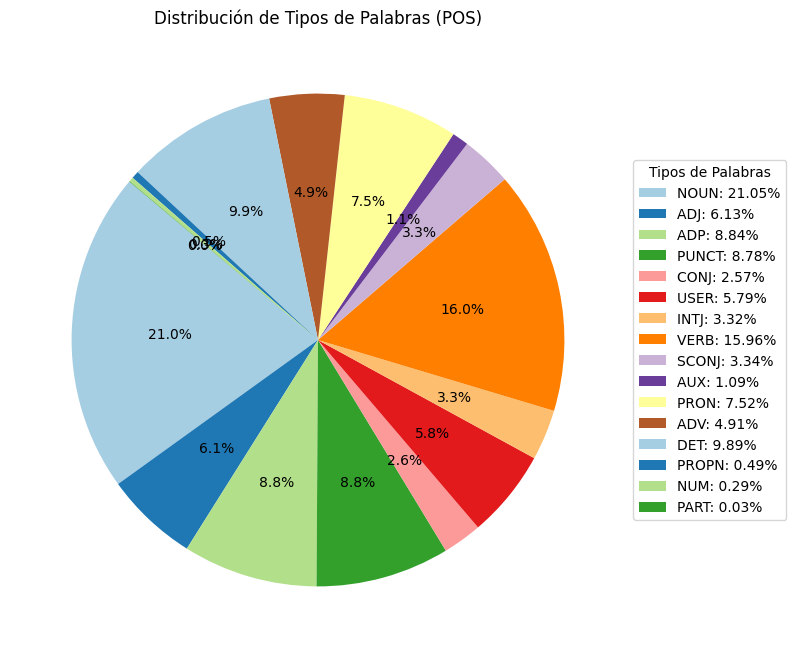

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_pos_percentages.values(),  startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Palabras (POS)")
legend_labels = [f"{pos_type}: {percentage:.2f}%" for pos_type, percentage in overall_pos_percentages.items()]
ax.legend(wedges, legend_labels, title="Tipos de Palabras", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

--------------------------------------------


-----------------------------------------------

### Tweets misóginos

-----------------------------------------------


In [18]:
# POS en tweets misoginos
text_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 1]["text"].tolist()]
results_pos_misogynous = [analyze_pos_tags(text) for text in tqdm(text_misogynous)]

  1%|          | 17/1649 [00:00<00:19, 82.24it/s]

Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Etiquetas encontradas: [('@nanchinho', 'USER'), ('a', 'ADP'), ('ver', 'VERB'), ('si', 'SCONJ'), ('haces', 'VERB'), ('algo', 'PRON'), ('que', 'SCONJ'), ('sirva', 'VERB'), ('para', 'ADP'), ('mejorar', 'VERB'), ('el', 'DET'), ('mundo', 'NOUN'), (',', 'PUNCT'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('@barbijaputa', 'USER')]
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.
Etiquetas encontradas: [('@rafhyta86', 'USER'), ('@eldesmadre', 'USER'), ('_', 'INTJ'), ('_', 'PUNCT'), ('habe', 'INTJ'), ('pasame', 'VERB'), ('el', 'DET'), ('video', 'NOUN'), ('donde', 'ADV'), ('adan', 'NOUN'), ('diga', 'VERB'), ('puta', 'NOUN'), ('a', 'ADP'), ('las', 'DET'), ('mujeres', 'NOUN'), ('sevillistas', 'NOUN'), ('...', 'PUNCT'), ("'mi", 'INTJ'), ('novia', 'NOUN'), ('es', 'VERB

  2%|▏         | 35/1649 [00:00<00:19, 84.41it/s]

Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Etiquetas encontradas: [('dos', 'NUM'), ('amigos', 'NOUN'), ('hablando', 'VERB'), (':', 'PUNCT'), ('-raúl', 'INTJ'), (',', 'PUNCT'), ('q', 'PRON'), ('me', 'PRON'), ('das', 'VERB'), ('por', 'ADP'), ('mi', 'DET'), ('mujer', 'NOUN'), ('?', 'PUNCT'), ('-nada', 'INTJ'), ('-trato', 'DET'), ('hecho', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por puta cachonda y zorra
Etiquetas encontradas: [('@alexandgutiz', 'USER'), ('pues', 'SCONJ'), ('dispuesto', 'ADJ'), ('a', 'ADP'), ('ser', 'VERB'), ('un', 'DET'), ('amo', 'NOUN'), ('muy', 'ADV'), ('exigente', 'ADJ'), ('!', 'PUNCT'), ('empinarte', 'VERB'), ('a', 'ADP'), ('mi', 'DET'), ('gusto', 'NOUN'), ('y', 'CONJ'), ('nalguearte', 'VERB'), ('como', 'ADV'), ('te', 'PRON'), ('lo', 'PRON'), ('mereces', 'VERB'), ('por', 'ADP'), ('puta', 'NOUN'), ('cachonda', 'ADJ'

  3%|▎         | 53/1649 [00:00<00:19, 83.96it/s]

Texto analizado: @mariajoarga @Paugalindo Ay cállate perra.
Etiquetas encontradas: [('@mariajoarga', 'USER'), ('@paugalindo', 'USER'), ('ay', 'INTJ'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Etiquetas encontradas: [('@beleeennn', 'USER'), ('_', 'PUNCT'), ('sos', 'VERB'), ('más', 'ADV'), ('perra', 'NOUN'), ('vos', 'PRON'), ('que', 'SCONJ'), ('ella', 'PRON'), ('callate', 'VERB')]
Texto analizado: Cinder eres una hija de la grandísima puta y te mereces lo peor. Y te lo vas a llevar, zorra de mierda.
Etiquetas encontradas: [('cinder', 'NOUN'), ('eres', 'VERB'), ('una', 'DET'), ('hija', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('grandísima', 'ADJ'), ('puta', 'NOUN'), ('y', 'CONJ'), ('te', 'PRON'), ('mereces', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('.', 'PUNCT'), ('y', 'CONJ'), ('te', 'PRON'), ('lo', 'PRON'), ('vas', 'AUX'), ('a', 'ADP'), ('llevar', 'VERB'), (',', 'PUNCT'), ('zorra', 'NOUN'), ('de', 'ADP'), ('

  4%|▍         | 71/1649 [00:00<00:18, 84.25it/s]

Texto analizado: @anaisbernal La Mariló Montero es una hija de puta machista!
Etiquetas encontradas: [('@anaisbernal', 'USER'), ('la', 'DET'), ('mariló', 'NOUN'), ('montero', 'PROPN'), ('es', 'VERB'), ('una', 'DET'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('machista', 'NOUN'), ('!', 'PUNCT')]
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Etiquetas encontradas: [('@come_hombres', 'USER'), ('agrega', 'VERB'), ('puta', 'NOUN'), ('zorra', 'NOUN'), ('yo', 'PRON'), ('te', 'PRON'), ('uso', 'VERB'), ('como', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('y', 'CONJ'), ('te', 'PRON'), ('ago', 'VERB'), ('mas', 'ADJ'), ('puta', 'NOUN'), ('de', 'ADP'), ('lo', 'DET'), ('que', 'PRON'), ('ya', 'ADV'), ('eres', 'VERB')]
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Etiquetas encontr

  5%|▌         | 89/1649 [00:01<00:18, 84.56it/s]

Texto analizado: @A3Noticias Esta tiene que ser una 'fake new' porque las mujeres son siempre las víctimas, no las hijas de puta maltratadoras. Eso o el chaval es un machista que se lo ha merecido (machete al machote).
Etiquetas encontradas: [('@a3noticias', 'USER'), ('esta', 'PRON'), ('tiene', 'AUX'), ('que', 'SCONJ'), ('ser', 'VERB'), ('una', 'DET'), ("'", 'PUNCT'), ('fake', 'ADJ'), ('new', 'ADJ'), ("'", 'PUNCT'), ('porque', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('son', 'VERB'), ('siempre', 'ADV'), ('las', 'DET'), ('víctimas', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('las', 'DET'), ('hijas', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('maltratadoras', 'NOUN'), ('.', 'PUNCT'), ('eso', 'PRON'), ('o', 'CONJ'), ('el', 'DET'), ('chaval', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('machista', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('lo', 'PRON'), ('ha', 'AUX'), ('merecido', 'VERB'), ('(', 'PUNCT'), ('machete', 'NOUN'), ('al', 'ADP'), ('machote', 'NOUN'), (')', 'PUNCT'), ('.', 'PUN

  7%|▋         | 108/1649 [00:01<00:17, 88.00it/s]

Texto analizado: Ya callate con tu puta aguila color azul pinche tabasqueña fea >:( #ExatlonMx
Etiquetas encontradas: [('ya', 'ADV'), ('callate', 'VERB'), ('con', 'ADP'), ('tu', 'DET'), ('puta', 'NOUN'), ('aguila', 'ADP'), ('color', 'NOUN'), ('azul', 'ADJ'), ('pinche', 'ADJ'), ('tabasqueña', 'NOUN'), ('fea', 'ADJ'), ('>:(', 'NOUN'), ('hashtag', 'NOUN'), ('exatlonmx', 'NOUN')]
Texto analizado: Tú crees que eres cool y no eres una zorra y droga — y tu eres mi fan que tan pendiente a mi vida estas ... https://t.co/rNQvEMXCTH
Etiquetas encontradas: [('tú', 'PRON'), ('crees', 'VERB'), ('que', 'SCONJ'), ('eres', 'VERB'), ('cool', 'ADJ'), ('y', 'CONJ'), ('no', 'ADV'), ('eres', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), ('y', 'CONJ'), ('droga', 'NOUN'), (' ', 'PUNCT'), ('y', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('mi', 'DET'), ('fan', 'NOUN'), ('que', 'PRON'), ('tan', 'ADV'), ('pendiente', 'ADJ'), ('a', 'ADP'), ('mi', 'DET'), ('vida', 'NOUN'), ('estas', 'PRON'), ('...', 'PUNCT'), ('url', 

  8%|▊         | 127/1649 [00:01<00:17, 89.46it/s]

Texto analizado: 'Mi novia es sevillista, es una puta más' canta Adán. Ahora vendrán hablándome de clases, de categorías y de 'piques'. No hay más preguntas, señoría. https://t.co/TXauHkGf0r
Etiquetas encontradas: [("'", 'PUNCT'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('sevillista', 'ADJ'), (',', 'PUNCT'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('más', 'PRON'), ("'", 'PUNCT'), ('canta', 'VERB'), ('adán', 'NOUN'), ('.', 'PUNCT'), ('ahora', 'ADV'), ('vendrán', 'AUX'), ('hablándome', 'VERB'), ('de', 'ADP'), ('clases', 'NOUN'), (',', 'PUNCT'), ('de', 'ADP'), ('categorías', 'NOUN'), ('y', 'CONJ'), ('de', 'ADP'), ("'", 'PUNCT'), ('piques', 'NOUN'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('no', 'ADV'), ('hay', 'VERB'), ('más', 'ADJ'), ('preguntas', 'NOUN'), (',', 'PUNCT'), ('señoría', 'NOUN'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @Rockefort100 Hahaha, me das risa. Mejor cállate y no te metas donde no te mencionan, perra llorona.
Etiquetas encontradas: [('@rockefor

  8%|▊         | 136/1649 [00:01<00:17, 87.05it/s]

Texto analizado: @blessjuxtin @justinvoc4ls @ovoxola PORQUE ESTAS OPINANDO SIN SABER SU PUTA HISTORA CALLATE YA
Etiquetas encontradas: [('@blessjuxtin', 'USER'), ('@justinvoc4ls', 'USER'), ('@ovoxola', 'USER'), ('porque', 'SCONJ'), ('estas', 'AUX'), ('opinando', 'VERB'), ('sin', 'ADP'), ('saber', 'VERB'), ('su', 'DET'), ('puta', 'ADJ'), ('histora', 'NOUN'), ('callate', 'VERB'), ('ya', 'ADV')]
Texto analizado: #WK12CL como hacen ganar a la pala Okada, Naito lo merecia. Puta q estoy enojado!!!
Etiquetas encontradas: [('hashtag', 'INTJ'), ('wk12cl', 'INTJ'), ('como', 'ADV'), ('hacen', 'VERB'), ('ganar', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('pala', 'NOUN'), ('okada', 'INTJ'), (',', 'PUNCT'), ('naito', 'INTJ'), ('lo', 'PRON'), ('merecia', 'VERB'), ('.', 'PUNCT'), ('puta', 'NOUN'), ('q', 'SCONJ'), ('estoy', 'VERB'), ('enojado', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @albafff14 tú eres una perra infernal
Etiquetas encontradas: [('@albafff14', 'USER'), ('tú'

  9%|▉         | 154/1649 [00:01<00:18, 79.95it/s]

Texto analizado: Esto me recordó a la señora que vi ayer en el super, enseñándole a la hija de unos 4 años a cantar 'que perra que perra, que perra mi amiga' https://t.co/nOksvasXHP
Etiquetas encontradas: [('esto', 'PRON'), ('me', 'PRON'), ('recordó', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('señora', 'NOUN'), ('que', 'PRON'), ('vi', 'VERB'), ('ayer', 'ADV'), ('en', 'ADP'), ('el', 'DET'), ('super', 'NOUN'), (',', 'PUNCT'), ('enseñándole', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('hija', 'NOUN'), ('de', 'ADP'), ('unos', 'DET'), ('4', 'NUM'), ('años', 'NOUN'), ('a', 'ADP'), ('cantar', 'VERB'), ("'", 'PUNCT'), ('que', 'SCONJ'), ('perra', 'NOUN'), ('que', 'SCONJ'), ('perra', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('perra', 'NOUN'), ('mi', 'DET'), ('amiga', 'NOUN'), ("'", 'PUNCT'), ('url', 'ADP')]
Texto analizado: Tu puta madre, cállate ya. Fue epica. https://t.co/OGatK3lBaa
Etiquetas encontradas: [('tu', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), (',', 'PUNCT'), ('cállate', 'VERB'), ('ya'

 10%|█         | 172/1649 [00:02<00:18, 79.95it/s]

Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Etiquetas encontradas: [('esas', 'DET'), ('jotillas', 'NOUN'), ('ridículas', 'ADJ'), ('de', 'ADP'), ('biografías', 'NOUN'), ('pedorras', 'ADJ'), ('de', 'ADP'), ('hashtag', 'NOUN'), ('twitter', 'NOUN'), ('y', 'CONJ'), ('fotos', 'NOUN'), ('enseñando', 'VERB'), ('la', 'DET'), ('panochita', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('sucia', 'ADJ'), ('deberían', 'AUX'), ('adjuntarle', 'VERB'), (':', 'PUNCT'), ('jota', 'NOUN'), (',', 'PUNCT'), ('inventada', 'VERB'), ('y', 'CONJ'), ('posona', 'ADJ'), (';', 'PUNCT'), ('pinches', 'ADJ'), ('guangas', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @BIoodyCountess < cuando porque poco más puede hacer maldita zorra tetona. No mereces el apellido Bathory.-
Etiquetas encontradas: [('@bioodycountess', 'USER'), ('<', 'PUNCT'), ('cuando', 'SCONJ'), ('porque', 'SCONJ'), ('po

 12%|█▏        | 190/1649 [00:02<00:17, 83.50it/s]

Texto analizado: @LaloBrn Vi un cortometraje de unos 35 min aproximadamente muy bueno, te lo recomiendo, busca en Google 'Una paciente muy guarra' se llama
Etiquetas encontradas: [('@lalobrn', 'USER'), ('vi', 'VERB'), ('un', 'DET'), ('cortometraje', 'NOUN'), ('de', 'ADP'), ('unos', 'DET'), ('35', 'ADJ'), ('min', 'NOUN'), ('aproximadamente', 'ADV'), ('muy', 'ADV'), ('bueno', 'ADJ'), (',', 'PUNCT'), ('te', 'PRON'), ('lo', 'PRON'), ('recomiendo', 'VERB'), (',', 'PUNCT'), ('busca', 'VERB'), ('en', 'ADP'), ('google', 'NOUN'), ("'", 'PUNCT'), ('una', 'DET'), ('paciente', 'NOUN'), ('muy', 'ADV'), ('guarra', 'ADJ'), ("'", 'PUNCT'), ('se', 'PRON'), ('llama', 'VERB')]
Texto analizado: @XxkirtsxX @keepingaIex callate la puta boca pesado
Etiquetas encontradas: [('@xxkirtsxx', 'USER'), ('@keepingaiex', 'USER'), ('callate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('pesado', 'ADJ')]
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseña

 13%|█▎        | 209/1649 [00:02<00:16, 86.15it/s]

Texto analizado: '¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj Así es, porque aguantarlas cuesta el doble. #TomaDosTazas
Etiquetas encontradas: [("'", 'PUNCT'), ('¿', 'PUNCT'), ('la', 'DET'), ('mitad', 'NOUN'), ('de', 'ADP'), ('sueldo', 'NOUN'), ('por', 'ADP'), ('ser', 'VERB'), ('mujer', 'NOUN'), ('?', 'PUNCT'), ("'", 'PUNCT'), ('url', 'INTJ'), ('así', 'ADV'), ('es', 'VERB'), (',', 'PUNCT'), ('porque', 'SCONJ'), ('aguantarlas', 'VERB'), ('cuesta', 'VERB'), ('el', 'DET'), ('doble', 'ADJ'), ('.', 'PUNCT'), ('hashtag', 'INTJ'), ('tomadostazas', 'VERB')]
Texto analizado: @lauraburrel missin pegarte en la cara con lonchas de queso vecina https://t.co/67PdyfJRFW
Etiquetas encontradas: [('@lauraburrel', 'USER'), ('missin', 'VERB'), ('pegarte', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('con', 'ADP'), ('lonchas', 'NOUN'), ('de', 'ADP'), ('queso', 'NOUN'), ('vecina', 'NOUN'), ('url', 'NOUN')]
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajaj

 14%|█▍        | 227/1649 [00:02<00:16, 85.10it/s]

Texto analizado: Apartar tu tanga a un lado y frotar la punta de mi polla por tu coño mojándola con tus flujos calientes, resbalan y me ponen cachondo, un empujón más y ya estaré dentro de ti https://t.co/jO9qcCn4yu
Etiquetas encontradas: [('apartar', 'VERB'), ('tu', 'DET'), ('tanga', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('lado', 'NOUN'), ('y', 'CONJ'), ('frotar', 'VERB'), ('la', 'DET'), ('punta', 'NOUN'), ('de', 'ADP'), ('mi', 'DET'), ('polla', 'NOUN'), ('por', 'ADP'), ('tu', 'DET'), ('coño', 'NOUN'), ('mojándola', 'VERB'), ('con', 'ADP'), ('tus', 'DET'), ('flujos', 'NOUN'), ('calientes', 'ADJ'), (',', 'PUNCT'), ('resbalan', 'VERB'), ('y', 'CONJ'), ('me', 'PRON'), ('ponen', 'VERB'), ('cachondo', 'ADJ'), (',', 'PUNCT'), ('un', 'DET'), ('empujón', 'NOUN'), ('más', 'PRON'), ('y', 'CONJ'), ('ya', 'ADV'), ('estaré', 'VERB'), ('dentro', 'ADV'), ('de', 'ADP'), ('ti', 'PRON'), ('url', 'PUNCT')]
Texto analizado: ¿Por qué una mujer no puede ser guapa e inteligente? Porque sería un hombre.
Etiq

 15%|█▍        | 246/1649 [00:02<00:16, 86.92it/s]

Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregles
Etiquetas encontradas: [('@varela_nat', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('que', 'SCONJ'), ('sos', 'VERB'), ('si', 'SCONJ'), ('me', 'PRON'), ('habré', 'AUX'), ('tenido', 'VERB'), ('que', 'SCONJ'), ('esperar', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('arregles', 'VERB')]
Texto analizado: Que cuza antes la calle, una mujer inteligente o una tortuga vieja? Una tortuga vieja porque las mujeres inteligentes no existen ...
Etiquetas encontradas: [('que', 'PRON'), ('cuza', 'NOUN'), ('antes', 'ADV'), ('la', 'DET'), ('calle', 'NOUN'), (',', 'PUNCT'), ('una', 'DET'), ('mujer', 'NOUN'), ('inteligente', 'ADJ'), ('o', 'CONJ'), ('una', 'DET'), ('tortuga', 'NOUN'), ('vieja', 'ADJ'), ('?', 'PUNCT'), ('una', 'DET'), ('tortuga', 'NOUN'), ('vieja', 'ADJ'), ('porque', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('inteligentes', 'ADJ'), ('no', 'ADV'), ('existen', 'VERB'), ('...', 'PUNCT')

 16%|█▌        | 265/1649 [00:03<00:15, 86.77it/s]

Texto analizado: @riveraingrith @sofiaamtz5 JAJAJAJAJAJAJAJA ya sé, pero tú eres una perra, yo soy bien buena y Sofía se aprovecha de mi nobleza
Etiquetas encontradas: [('@riveraingrith', 'USER'), ('@sofiaamtz5', 'USER'), ('jaja', 'INTJ'), ('ya', 'ADV'), ('sé', 'VERB'), (',', 'PUNCT'), ('pero', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), (',', 'PUNCT'), ('yo', 'PRON'), ('soy', 'VERB'), ('bien', 'ADV'), ('buena', 'ADJ'), ('y', 'CONJ'), ('sofía', 'NOUN'), ('se', 'PRON'), ('aprovecha', 'VERB'), ('de', 'ADP'), ('mi', 'DET'), ('nobleza', 'NOUN')]
Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Etiquetas encontradas: [('si', 'SCONJ'), ('te', 'PRON'), ('ponen', 'VERB'), ('una', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('tu', 'DET'), ('primer', 'ADJ'), ('instinto', 'NOUN'), ('es', 'VERB'), ('chuparla', 'VERB')]
Texto analizado: @Alvenef @LeaVieilletoile Cállate perra
Etiquetas encontradas: [('@

 17%|█▋        | 284/1649 [00:03<00:15, 88.58it/s]

Texto analizado: Porque las mujeres pierden la regla a los 50? Porque necesitan la sangre para las varices.
Etiquetas encontradas: [('porque', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('pierden', 'VERB'), ('la', 'DET'), ('regla', 'NOUN'), ('a', 'ADP'), ('los', 'DET'), ('50', 'NUM'), ('?', 'PUNCT'), ('porque', 'SCONJ'), ('necesitan', 'VERB'), ('la', 'DET'), ('sangre', 'NOUN'), ('para', 'ADP'), ('las', 'DET'), ('varices', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Etiquetas encontradas: [('que', 'SCONJ'), ('horrible', 'ADJ'), ('verte', 'VERB'), ('así', 'ADV'), ('sofi', 'NOUN'), (',', 'PUNCT'), ('como', 'ADV'), ('te', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('extrañar', 'VERB'), ('mi', 'DET'), ('perra', 'NOUN'), ('loca', 'ADJ'), ('!', 'PUNCT'), ('espero', 'VERB'), ('que', 'SCONJ'), ('estes', 'VERB'), ('en', 'ADP'), ('un', 'DET'), ('lugar', 'NOUN'), ('mej

 18%|█▊        | 303/1649 [00:03<00:15, 88.68it/s]

Texto analizado: @AlexaCamejo Cállate puta, si te encanta verme
Etiquetas encontradas: [('@alexacamejo', 'USER'), ('cállate', 'VERB'), ('puta', 'NOUN'), (',', 'PUNCT'), ('si', 'SCONJ'), ('te', 'PRON'), ('encanta', 'VERB'), ('verme', 'PRON')]
Texto analizado: O sea que aquí normalizas la violación y el acoso y aún así te crees el puto amo? Lo peor de todo es saber que tienes miles de seguidores que te aplauden
Etiquetas encontradas: [('o', 'CONJ'), ('sea', 'VERB'), ('que', 'SCONJ'), ('aquí', 'ADV'), ('normalizas', 'VERB'), ('la', 'DET'), ('violación', 'NOUN'), ('y', 'CONJ'), ('el', 'DET'), ('acoso', 'NOUN'), ('y', 'CONJ'), ('aún', 'ADV'), ('así', 'ADV'), ('te', 'PRON'), ('crees', 'VERB'), ('el', 'DET'), ('puto', 'ADJ'), ('amo', 'NOUN'), ('?', 'PUNCT'), ('lo', 'DET'), ('peor', 'ADJ'), ('de', 'ADP'), ('todo', 'PRON'), ('es', 'VERB'), ('saber', 'VERB'), ('que', 'SCONJ'), ('tienes', 'VERB'), ('miles', 'NOUN'), ('de', 'ADP'), ('seguidores', 'NOUN'), ('que', 'PRON'), ('te', 'PRON'), ('aplaude

 19%|█▉        | 321/1649 [00:03<00:15, 86.55it/s]

Texto analizado: @erickorni0 Cállate perra. Jajaja Lera. No. Aún no se la parto. Digo la partimos. 🙊
Etiquetas encontradas: [('@erickorni0', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('.', 'PUNCT'), ('jaja', 'INTJ'), ('lera', 'NOUN'), ('.', 'PUNCT'), ('no', 'INTJ'), ('.', 'PUNCT'), ('aún', 'ADV'), ('no', 'ADV'), ('se', 'PRON'), ('la', 'PRON'), ('parto', 'VERB'), ('.', 'PUNCT'), ('digo', 'VERB'), ('la', 'PRON'), ('partimos', 'VERB'), ('.', 'PUNCT'), (' ', 'NOUN'), ('emoji', 'INTJ'), ('mono', 'NOUN'), ('con', 'ADP'), ('la', 'DET'), ('boca', 'NOUN'), ('tapada', 'ADJ'), ('emoji', 'INTJ')]
Texto analizado: @jcastle1995 mejor cállate perra lmao
Etiquetas encontradas: [('@jcastle1995', 'USER'), ('mejor', 'ADV'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('lmao', 'INTJ')]
Texto analizado: Ven, comemela y cállate ya
Etiquetas encontradas: [('ven', 'VERB'), (',', 'PUNCT'), ('comemela', 'VERB'), ('y', 'CONJ'), ('cállate', 'VERB'), ('ya', 'ADV')]
Texto analizado: DEJA DE TUITEAR HIJA DE PUTA 

 21%|██        | 339/1649 [00:03<00:15, 86.10it/s]

Texto analizado: @suarezfeelings callate perra arrepentida
Etiquetas encontradas: [('@suarezfeelings', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('arrepentida', 'ADJ')]
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Etiquetas encontradas: [('@adrianvg', 'USER'), ('_', 'INTJ'), ('_', 'INTJ'), ('hola', 'INTJ'), ('soy', 'VERB'), ('savic', 'PROPN'), (',', 'PUNCT'), ('perdona', 'VERB'), ('pero', 'CONJ'), ('tengo', 'VERB'), ('ni', 'ADV'), ('polla', 'NOUN'), ('en', 'ADP'), ('tu', 'DET'), ('culo', 'NOUN'), ('y', 'CONJ'), ('no', 'ADV'), ('la', 'PRON'), ('puedo', 'AUX'), ('sacar', 'VERB'), ('.', 'PUNCT')]
Texto analizado: Y tú eres la perra mayor, Hux. No te muerdas la lengua. —Rueda los ojos, colocándose aquel gorro y quitándole el polvo de encima, deteniéndose de golpe frente a el.— Y he acabado mi entrenamiento de hoy, así que, no. https://t.co/CM2pbnNCc4
Etiquetas encontradas: [('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), (

 22%|██▏       | 358/1649 [00:04<00:14, 88.84it/s]

Texto analizado: @CFKArgentina Cállate ladrona hija de puta... Caraduras
Etiquetas encontradas: [('@cfkargentina', 'USER'), ('cállate', 'VERB'), ('ladrona', 'NOUN'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('...', 'PUNCT'), ('caraduras', 'NOUN')]
Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Etiquetas encontradas: [('@rocioquirogaaa', 'USER'), ('@albaarocio', 'USER'), ('vos', 'PRON'), ('tambien', 'ADV'), ('callate', 'VERB'), ('y', 'CONJ'), ('contestame', 'VERB'), ('los', 'DET'), ('wpp', 'NOUN'), ('perra', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('sin', 'ADJ'), ('expresión', 'NOUN'), ('emoji', 'NOUN')]
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Etiquetas encontradas: [('tu', 'DET'), ('chica', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('poco', 'ADV'), ('guarra', 'ADJ'), (' ', 'INTJ'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('feliz', 'ADJ'), ('con', 'ADP'

 23%|██▎       | 377/1649 [00:04<00:14, 90.06it/s]

Texto analizado: @Ibi_hotmidori por que no me los muestras, me gustaria poder meter mi polla en tu culo y tu concha
Etiquetas encontradas: [('@ibi_hotmidori', 'USER'), ('por', 'ADP'), ('que', 'SCONJ'), ('no', 'ADV'), ('me', 'PRON'), ('los', 'PRON'), ('muestras', 'VERB'), (',', 'PUNCT'), ('me', 'PRON'), ('gustaria', 'VERB'), ('poder', 'VERB'), ('meter', 'VERB'), ('mi', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('tu', 'DET'), ('culo', 'NOUN'), ('y', 'CONJ'), ('tu', 'DET'), ('concha', 'NOUN')]
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Etiquetas encontradas: [('@laurabozzo', 'USER'), ('callate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('vieja', 'ADJ'), ('loca', 'ADJ'), ('ven', 'VERB'), ('lame', 'VERB'), ('mi', 'DET'), ('axila', 'NOUN'), ('perra', 'NOUN')]
Texto analizado: Vendida, @IndiraHuilca, tienes cara para demostrar tu hipocresía, mejor cállate, perra. https://t.co/mLwCXla1nn
Etiquetas encontradas: [('vendida', 'ADJ'), (',', 'PUNCT'), ('@indira

 24%|██▍       | 397/1649 [00:04<00:13, 90.28it/s]

Texto analizado: @MikeDeLioncourt @carloscramz Mike tu eres una zorra 😊
Etiquetas encontradas: [('@mikedelioncourt', 'USER'), ('@carloscramz', 'USER'), ('mike', 'INTJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), (' ', 'INTJ'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('feliz', 'ADJ'), ('con', 'ADP'), ('ojos', 'NOUN'), ('sonrientes', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: @JakyMemes Si tu eres tan perra que te comes hasta la tela https://t.co/jOLpF8BNo6
Etiquetas encontradas: [('@jakymemes', 'USER'), ('si', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('tan', 'ADV'), ('perra', 'NOUN'), ('que', 'SCONJ'), ('te', 'PRON'), ('comes', 'VERB'), ('hasta', 'ADP'), ('la', 'DET'), ('tela', 'NOUN'), ('url', 'NOUN')]
Texto analizado: Perra, tú eres un ángel que por la manzana peca
Etiquetas encontradas: [('perra', 'NOUN'), (',', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('ángel', 'NOUN'), ('que', 'PRON'), ('por', 'ADP'), ('la', 'DET'), ('manzana', 'NOUN'), (

 25%|██▍       | 407/1649 [00:04<00:14, 86.27it/s]

Texto analizado: @ash_london CALLATE PERRA LOCA CON METERTE CON LOUIS YA ES MUCHO . TE METES CON BARDERAS
Etiquetas encontradas: [('@ash_london', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('loca', 'ADJ'), ('con', 'ADP'), ('meterte', 'VERB'), ('con', 'ADP'), ('louis', 'PROPN'), ('ya', 'ADV'), ('es', 'VERB'), ('mucho', 'ADV'), ('.', 'PUNCT'), ('te', 'PRON'), ('metes', 'VERB'), ('con', 'ADP'), ('barderas', 'NOUN')]
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Etiquetas encontradas: [('@xdeputygrimes', 'USER'), ('pero', 'CONJ'), ('si', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('la', 'DET'), ('perra', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Pasear a la perra en tacones es #glamour y el resto son tonterías
Etiquetas encontradas: [('pasear', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('perra', 'NOUN'), ('en', 'ADP'), ('tacones', 'NOUN'), ('es', 'VERB'), ('hashtag', 'DET'), ('glamour', 'NOUN'), ('y', 'CONJ'), ('el', 'DET'), ('resto', 'PRON'), ('son', 'VERB'), ('tonterías', 

 26%|██▌       | 426/1649 [00:04<00:14, 86.99it/s]

Texto analizado: @Brighma Pero tu eres una tremenda puta q mas puede pasar zorra del demonio, https://t.co/9f9bqZNDBN
Etiquetas encontradas: [('@brighma', 'USER'), ('pero', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('tremenda', 'ADJ'), ('puta', 'NOUN'), ('q', 'PRON'), ('mas', 'PRON'), ('puede', 'AUX'), ('pasar', 'VERB'), ('zorra', 'NOUN'), ('del', 'ADP'), ('demonio', 'NOUN'), (',', 'PUNCT'), ('url', 'PUNCT')]
Texto analizado: ¿Cuántas veces se ríe una mujer con un chiste? Tres veces: cuando se lo cuentan, cuando se lo explican y cuando lo entiende.
Etiquetas encontradas: [('¿', 'PUNCT'), ('cuántas', 'DET'), ('veces', 'NOUN'), ('se', 'PRON'), ('ríe', 'VERB'), ('una', 'DET'), ('mujer', 'NOUN'), ('con', 'ADP'), ('un', 'DET'), ('chiste', 'NOUN'), ('?', 'PUNCT'), ('tres', 'NUM'), ('veces', 'NOUN'), (':', 'PUNCT'), ('cuando', 'SCONJ'), ('se', 'PRON'), ('lo', 'PRON'), ('cuentan', 'VERB'), (',', 'PUNCT'), ('cuando', 'SCONJ'), ('se', 'PRON'), ('lo', 'PRON'), ('explican', 'VERB')

 27%|██▋       | 445/1649 [00:05<00:13, 88.70it/s]

Texto analizado: @TowandaRebels Das asco, eres una escoria humana.
Etiquetas encontradas: [('@towandarebels', 'USER'), ('das', 'VERB'), ('asco', 'NOUN'), (',', 'PUNCT'), ('eres', 'VERB'), ('una', 'DET'), ('escoria', 'NOUN'), ('humana', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: Porque andan llamando gata, zorra o puta a baekhyun si es hombre, manga de ridiculas
Etiquetas encontradas: [('porque', 'SCONJ'), ('andan', 'AUX'), ('llamando', 'VERB'), ('gata', 'NOUN'), (',', 'PUNCT'), ('zorra', 'NOUN'), ('o', 'CONJ'), ('puta', 'NOUN'), ('a', 'ADP'), ('baekhyun', 'NOUN'), ('si', 'SCONJ'), ('es', 'VERB'), ('hombre', 'NOUN'), (',', 'PUNCT'), ('manga', 'NOUN'), ('de', 'ADP'), ('ridiculas', 'ADJ')]
Texto analizado: Perdón Chofi pero a mi me diste a entender que la mujer es una perra ajajajajajjajajajaja https://t.co/0T6sKarW9Z
Etiquetas encontradas: [('perdón', 'INTJ'), ('chofi', 'NOUN'), ('pero', 'CONJ'), ('a', 'ADP'), ('mi', 'DET'), ('me', 'PRON'), ('diste', 'AUX'), ('a', 'ADP'), ('entender', 'VER

 28%|██▊       | 465/1649 [00:05<00:13, 90.67it/s]

Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Etiquetas encontradas: [('¡', 'PUNCT'), ('cállate', 'VERB'), ('!', 'PUNCT'), (',', 'PUNCT'), ('ella', 'PRON'), ('era', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), (',', 'PUNCT'), ('bien', 'ADV'), ('se', 'PRON'), ('lo', 'PRON'), ('merecía', 'VERB'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: ¿Qué hace una mujer trepando una pared de vidrio? Quiere ver que hay al otro lado
Etiquetas encontradas: [('¿', 'PUNCT'), ('qué', 'PRON'), ('hace', 'VERB'), ('una', 'DET'), ('mujer', 'NOUN'), ('trepando', 'VERB'), ('una', 'DET'), ('pared', 'NOUN'), ('de', 'ADP'), ('vidrio', 'NOUN'), ('?', 'PUNCT'), ('quiere', 'AUX'), ('ver', 'VERB'), ('que', 'SCONJ'), ('hay', 'VERB'), ('al', 'ADP'), ('otro', 'DET'), ('lado', 'NOUN')]
Texto analizado: Créeme, yo estudio Veterinaria y tu eres una perra.
Etiquetas encontradas: [('créeme', 'VERB'), (',', 'PUNCT'), ('yo', 'PRON'), ('estudio', 'VERB'), ('veterinaria', 'NOUN'

 29%|██▉       | 485/1649 [00:05<00:12, 90.63it/s]

Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Etiquetas encontradas: [('@danibalmaceda98', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), (',', 'PUNCT'), ('nunca', 'ADV'), ('más', 'ADV'), ('nos', 'PRON'), ('juntamos', 'VERB'), ('(', 'PUNCT'), ('?', 'PUNCT')]
Texto analizado: Cuando decís que una mujer es guarra en la cama me la imagino lanzádoos caca y haciendo pis en vuestra cara y me río mucho.
Etiquetas encontradas: [('cuando', 'SCONJ'), ('decís', 'VERB'), ('que', 'SCONJ'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('guarra', 'ADJ'), ('en', 'ADP'), ('la', 'DET'), ('cama', 'NOUN'), ('me', 'PRON'), ('la', 'PRON'), ('imagino', 'VERB'), ('lanzádoos', 'VERB'), ('caca', 'NOUN'), ('y', 'CONJ'), ('haciendo', 'VERB'), ('pis', 'NOUN'), ('en', 'ADP'), ('vuestra', 'DET'), ('cara', 'NOUN'), ('y', 'CONJ'), ('me', 'PRON'), ('río', 'VERB'), ('mucho', 'ADV'), ('.', 'PUNCT')]
Texto analizado: @joeldavid26 On tu eres muy perra
Etiquetas encontradas: [('@joeldavi

 31%|███       | 504/1649 [00:05<00:13, 86.68it/s]

Texto analizado: Las viejas de antes, puteaban bonito para ganar dinero. Las de hoy acusan de acoso o violacion a algún pobre y buen hombre.
Etiquetas encontradas: [('las', 'DET'), ('viejas', 'ADJ'), ('de', 'ADP'), ('antes', 'ADV'), (',', 'PUNCT'), ('puteaban', 'VERB'), ('bonito', 'ADJ'), ('para', 'ADP'), ('ganar', 'VERB'), ('dinero', 'NOUN'), ('.', 'PUNCT'), ('las', 'DET'), ('de', 'ADP'), ('hoy', 'ADV'), ('acusan', 'VERB'), ('de', 'ADP'), ('acoso', 'NOUN'), ('o', 'CONJ'), ('violacion', 'NOUN'), ('a', 'ADP'), ('algún', 'DET'), ('pobre', 'ADJ'), ('y', 'CONJ'), ('buen', 'ADJ'), ('hombre', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Le cuento a Magali algo que me hizo llorar y la estúpida me dice 'se lo merecía, por zorra le pasa' Aveces la odio tanto jajaj
Etiquetas encontradas: [('le', 'PRON'), ('cuento', 'VERB'), ('a', 'ADP'), ('magali', 'PROPN'), ('algo', 'PRON'), ('que', 'SCONJ'), ('me', 'PRON'), ('hizo', 'VERB'), ('llorar', 'VERB'), ('y', 'CONJ'), ('la', 'DET'), ('estúpida', 'ADJ'), (

 32%|███▏      | 522/1649 [00:06<00:12, 87.46it/s]

Texto analizado: @maritehgoldst @info7mty Cállate pinche perra
Etiquetas encontradas: [('@maritehgoldst', 'USER'), ('@info7mty', 'USER'), ('cállate', 'VERB'), ('pinche', 'ADJ'), ('perra', 'NOUN')]
Texto analizado: Mi novia tiene las tetas como cocos. ¿De qué de grandes?, no de pelos.
Etiquetas encontradas: [('mi', 'DET'), ('novia', 'NOUN'), ('tiene', 'VERB'), ('las', 'DET'), ('tetas', 'NOUN'), ('como', 'SCONJ'), ('cocos', 'NOUN'), ('.', 'PUNCT'), ('¿', 'PUNCT'), ('de', 'ADP'), ('qué', 'PRON'), ('de', 'ADP'), ('grandes', 'ADJ'), ('?', 'PUNCT'), (',', 'PUNCT'), ('no', 'INTJ'), ('de', 'ADP'), ('pelos', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @MichuHeredia Y dsps aprobas mejor cállate perra
Etiquetas encontradas: [('@michuheredia', 'USER'), ('y', 'CONJ'), ('dsps', 'ADV'), ('aprobas', 'VERB'), ('mejor', 'ADV'), ('cállate', 'VERB'), ('perra', 'NOUN')]
Texto analizado: Hija de mil puta. Te mereces morir en la cárcel. En qué cabeza cabe quitarle la vida a una persona. En qué sociedad de mier

 33%|███▎      | 540/1649 [00:06<00:13, 80.64it/s]

Texto analizado: -¿Dónde vas con esas rodilleras nena? -A una entrevista de trabajo -Ah, entiendo
Etiquetas encontradas: [('-¿dónde', 'INTJ'), ('vas', 'VERB'), ('con', 'ADP'), ('esas', 'DET'), ('rodilleras', 'NOUN'), ('nena', 'NOUN'), ('?', 'PUNCT'), ('-a', 'INTJ'), ('una', 'DET'), ('entrevista', 'NOUN'), ('de', 'ADP'), ('trabajo', 'NOUN'), ('-ah', 'INTJ'), (',', 'PUNCT'), ('entiendo', 'VERB')]
Texto analizado: @michelle_sexxx eres mi maldito juguete preferido mmm. Me encanta llenar tu coño de mi leche espesa mi perra en celo
Etiquetas encontradas: [('@michelle_sexxx', 'USER'), ('eres', 'VERB'), ('mi', 'DET'), ('maldito', 'ADJ'), ('juguete', 'NOUN'), ('preferido', 'ADJ'), ('mmm', 'INTJ'), ('.', 'PUNCT'), ('me', 'PRON'), ('encanta', 'VERB'), ('llenar', 'VERB'), ('tu', 'DET'), ('coño', 'NOUN'), ('de', 'ADP'), ('mi', 'DET'), ('leche', 'NOUN'), ('espesa', 'ADJ'), ('mi', 'DET'), ('perra', 'NOUN'), ('en', 'ADP'), ('celo', 'NOUN')]
Texto analizado: Pero: -Todas son unas guarras. -Todas son un

 33%|███▎      | 549/1649 [00:06<00:14, 74.01it/s]

Texto analizado: Deja de estar chingando, estúpida. Tú eres la zorra que se acuesta con quien sea aunque le den diez centavos. https://t.co/yCe73qIbmE
Etiquetas encontradas: [('deja', 'VERB'), ('de', 'ADP'), ('estar', 'VERB'), ('chingando', 'VERB'), (',', 'PUNCT'), ('estúpida', 'ADJ'), ('.', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('la', 'DET'), ('zorra', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('acuesta', 'VERB'), ('con', 'ADP'), ('quien', 'PRON'), ('sea', 'VERB'), ('aunque', 'SCONJ'), ('le', 'PRON'), ('den', 'VERB'), ('diez', 'NUM'), ('centavos', 'NOUN'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @revistaproceso Exigen. Perra asesina necesitamos tener te cerda hija de tu puta madre ratera como tú y los niños con cáncer que se te olvida perra
Etiquetas encontradas: [('@revistaproceso', 'USER'), ('exigen', 'VERB'), ('.', 'PUNCT'), ('perra', 'NOUN'), ('asesina', 'ADJ'), ('necesitamos', 'VERB'), ('tener', 'VERB'), ('te', 'PRON'), ('cerda', 'ADJ'), ('hija', 'NOUN'), ('de', '

 34%|███▍      | 565/1649 [00:06<00:15, 69.66it/s]

Texto analizado: @mlagvaz callate guarra
Etiquetas encontradas: [('@mlagvaz', 'USER'), ('callate', 'VERB'), ('guarra', 'NOUN')]
Texto analizado: vos me haces eso te pego una patada en la cara https://t.co/2drqUu5Rwc
Etiquetas encontradas: [('vos', 'PRON'), ('me', 'PRON'), ('haces', 'VERB'), ('eso', 'PRON'), ('te', 'PRON'), ('pego', 'VERB'), ('una', 'DET'), ('patada', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('url', 'ADV')]
Texto analizado: @CanalusHeresy @Fourty35 @IrantzuVarela A, que la zorra está va de matona por la vida? Jajajaja. Pero si de un soplido la desgracias al adefesio ese!😂
Etiquetas encontradas: [('@canalusheresy', 'USER'), ('@fourty35', 'USER'), ('@irantzuvarela', 'USER'), ('a', 'ADP'), (',', 'PUNCT'), ('que', 'SCONJ'), ('la', 'DET'), ('zorra', 'NOUN'), ('está', 'VERB'), ('va', 'VERB'), ('de', 'ADP'), ('matona', 'NOUN'), ('por', 'ADP'), ('la', 'DET'), ('vida', 'NOUN'), ('?', 'PUNCT'), ('jaja', 'INTJ'), ('.', 'PUNCT'), ('pero', 'CONJ'), ('si', 'SCONJ'), (

 35%|███▌      | 580/1649 [00:06<00:16, 65.12it/s]

Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Etiquetas encontradas: [('que', 'PRON'), ('mierda', 'NOUN'), ('tienen', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cabeza', 'NOUN'), ('cuando', 'ADV'), ('creen', 'VERB'), ('que', 'SCONJ'), ('una', 'DET'), ('violacion', 'NOUN'), ('o', 'CONJ'), ('situacion', 'NOUN'), ('de', 'ADP'), ('acoso', 'NOUN'), ('que', 'PRON'), ('les', 'PRON'), ('estan', 'AUX'), ('contando', 'VERB'), ('es', 'VERB'), ('mentira', 'NOUN'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('o', 'CONJ'), ('sea', 'VERB'), (',', 'PUNCT'), ('son', 'VERB'), ('joda', 'NOUN'), ('gente', 'NOUN')]
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Etiquetas encontradas: [('@drodriguezven', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('la', 'DET'), ('perra', 'NOUN'), ('mas', 'ADV'), ('perra', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('perras', 'NOUN')]
Tex

 36%|███▌      | 594/1649 [00:07<00:16, 63.82it/s]

Texto analizado: ¿Qué se tienen que poner las mujeres en los hombros para estar atractivas? Las rodillas.
Etiquetas encontradas: [('¿', 'PUNCT'), ('qué', 'PRON'), ('se', 'PRON'), ('tienen', 'AUX'), ('que', 'SCONJ'), ('poner', 'VERB'), ('las', 'DET'), ('mujeres', 'NOUN'), ('en', 'ADP'), ('los', 'DET'), ('hombros', 'NOUN'), ('para', 'ADP'), ('estar', 'VERB'), ('atractivas', 'ADJ'), ('?', 'PUNCT'), ('las', 'DET'), ('rodillas', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el visto después de 3 mensajes preguntándote que te pasaba, te voy a dar un trompon gil.
Etiquetas encontradas: [('@aguussopperttii', 'USER'), ('cállate', 'VERB'), ('cara', 'NOUN'), ('dura', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('perra', 'NOUN'), ('madre', 'NOUN'), (',', 'PUNCT'), ('me', 'PRON'), ('clavaste', 'VERB'), ('el', 'DET'), ('visto', 'NOUN'), ('después', 'ADV'), ('de', 'ADP'), ('3', 'NUM'), ('mensajes', 'NOUN'), ('preguntándote

 37%|███▋      | 609/1649 [00:07<00:15, 66.15it/s]

Texto analizado: @MrDashGD Que se te pegue mi polla en tu culo avers
Etiquetas encontradas: [('@mrdashgd', 'USER'), ('que', 'SCONJ'), ('se', 'PRON'), ('te', 'PRON'), ('pegue', 'VERB'), ('mi', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('tu', 'DET'), ('culo', 'NOUN'), ('avers', 'ADP')]
Texto analizado: Mi perra me odia,es enseñarle la correa pa salir a pasear y se pira corriendo a esconderse. Es mas vaga que yo casi
Etiquetas encontradas: [('mi', 'DET'), ('perra', 'NOUN'), ('me', 'PRON'), ('odia', 'VERB'), (',', 'PUNCT'), ('es', 'VERB'), ('enseñarle', 'VERB'), ('la', 'DET'), ('correa', 'NOUN'), ('pa', 'ADP'), ('salir', 'VERB'), ('a', 'ADP'), ('pasear', 'VERB'), ('y', 'CONJ'), ('se', 'PRON'), ('pira', 'VERB'), ('corriendo', 'VERB'), ('a', 'ADP'), ('esconderse', 'VERB'), ('.', 'PUNCT'), ('es', 'VERB'), ('mas', 'ADV'), ('vaga', 'ADJ'), ('que', 'SCONJ'), ('yo', 'PRON'), ('casi', 'ADV')]
Texto analizado: que estallo que lloren por llevarse 2 o 3 materias una bronca, me lleno 9 hija d puta cal

 38%|███▊      | 623/1649 [00:07<00:16, 63.05it/s]

Texto analizado: No fue acoso nada más, fue intento de violación a un menor de edad. 😫 Todo lo que dice Marta Lamas bien lo pudo haber repetido un machiprogre y abre la puerta a que usen su opinión 'calificada' para justificar abusos. https://t.co/gUq0cd2oKX
Etiquetas encontradas: [('no', 'INTJ'), ('fue', 'VERB'), ('acoso', 'NOUN'), ('nada', 'PRON'), ('más', 'PRON'), (',', 'PUNCT'), ('fue', 'VERB'), ('intento', 'NOUN'), ('de', 'ADP'), ('violación', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('menor', 'ADJ'), ('de', 'ADP'), ('edad', 'NOUN'), ('.', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('cansada', 'ADJ'), ('emoji', 'INTJ'), (' ', 'PUNCT'), ('todo', 'DET'), ('lo', 'PRON'), ('que', 'PRON'), ('dice', 'VERB'), ('marta', 'NOUN'), ('lamas', 'DET'), ('bien', 'ADV'), ('lo', 'PRON'), ('pudo', 'AUX'), ('haber', 'AUX'), ('repetido', 'VERB'), ('un', 'DET'), ('machiprogre', 'NOUN'), ('y', 'CONJ'), ('abre', 'VERB'), ('la', 'DET'), ('puerta', 'NOUN'), ('a', 'ADP'), ('que', 'SCONJ'),

 38%|███▊      | 630/1649 [00:07<00:16, 61.47it/s]

Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Etiquetas encontradas: [('nunca', 'ADV'), ('pensé', 'VERB'), ('que', 'SCONJ'), ('un', 'DET'), ('capitulo', 'NOUN'), ('de', 'ADP'), ('dr', 'ADJ'), ('.', 'PUNCT'), ('house', 'NOUN'), ('me', 'PRON'), ('iba', 'VERB'), ('a', 'ADP'), ('hacer', 'VERB'), ('llorar', 'VERB'), ('tanto', 'ADV'), (' ', 'NOUN'), ('emoji', 'DET'), ('corazón', 'NOUN'), ('roto', 'ADJ'), ('emoji', 'ADV'), (' ', 'NOUN'), ('amber', 'NOUN'), ('eras', 'VERB'), ('una', 'DET'), ('perra', 'NOUN'), ('pero', 'CONJ'), ('no', 'ADV'), ('merecías', 'VERB'), ('eso', 'ADJ'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('decepcionada', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Etiquetas encontradas: [('@brotherdroiid', 'USER'), ('@snowknight9', 'USER'), ('pero', 'CONJ'), ('si', 'SC

 39%|███▉      | 644/1649 [00:07<00:18, 55.43it/s]

Texto analizado: Mi papá me acaba de enseñar un video de una perra estresada y me dijo que era yo. 🙄🙄
Etiquetas encontradas: [('mi', 'DET'), ('papá', 'NOUN'), ('me', 'PRON'), ('acaba', 'AUX'), ('de', 'ADP'), ('enseñar', 'VERB'), ('un', 'DET'), ('video', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('perra', 'NOUN'), ('estresada', 'ADJ'), ('y', 'CONJ'), ('me', 'PRON'), ('dijo', 'VERB'), ('que', 'SCONJ'), ('era', 'VERB'), ('yo', 'PRON'), ('.', 'PUNCT'), (' ', 'NOUN'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('con', 'ADP'), ('ojos', 'NOUN'), ('en', 'ADV'), ('blanco', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('con', 'ADP'), ('ojos', 'NOUN'), ('en', 'ADJ'), ('blanco', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: Y tu eres una zorra mala que lo sepas jajaja https://t.co/AUzvokaT5I
Etiquetas encontradas: [('y', 'CONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('zorra', 'NOUN'), ('mala', 'ADJ'), ('que', 'SCONJ'), ('lo', 'PRON'), ('sepas', 'VERB'), ('jaja',

 40%|███▉      | 656/1649 [00:08<00:18, 55.11it/s]

Texto analizado: Ya hice copy-paste del mismo mensaje a toda la gente que se merecía un saludito en este año con mi perra a upa aullando como un lobo, así que me voy a ir a dormir. Saludos a todos.
Etiquetas encontradas: [('ya', 'ADV'), ('hice', 'VERB'), ('copy-paste', 'NOUN'), ('del', 'ADP'), ('mismo', 'ADJ'), ('mensaje', 'NOUN'), ('a', 'ADP'), ('toda', 'DET'), ('la', 'DET'), ('gente', 'NOUN'), ('que', 'PRON'), ('se', 'PRON'), ('merecía', 'VERB'), ('un', 'DET'), ('saludito', 'NOUN'), ('en', 'ADP'), ('este', 'DET'), ('año', 'NOUN'), ('con', 'ADP'), ('mi', 'DET'), ('perra', 'NOUN'), ('a', 'ADP'), ('upa', 'NOUN'), ('aullando', 'VERB'), ('como', 'ADP'), ('un', 'DET'), ('lobo', 'NOUN'), (',', 'PUNCT'), ('así', 'ADV'), ('que', 'SCONJ'), ('me', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('ir', 'VERB'), ('a', 'ADP'), ('dormir', 'VERB'), ('.', 'PUNCT'), ('saludos', 'NOUN'), ('a', 'ADP'), ('todos', 'PRON'), ('.', 'PUNCT')]
Texto analizado: @multimediostv Que por cierto Danna Paola tu eres una gata 

 41%|████      | 672/1649 [00:08<00:14, 66.82it/s]

Texto analizado: Por suerte no le gustan los tatuajes, más vale q no te hagas ninguno en la cara porque te pego @ValenEtchegoye2 https://t.co/lNUgeyqlRp
Etiquetas encontradas: [('por', 'ADP'), ('suerte', 'NOUN'), ('no', 'ADV'), ('le', 'PRON'), ('gustan', 'VERB'), ('los', 'DET'), ('tatuajes', 'NOUN'), (',', 'PUNCT'), ('más', 'ADV'), ('vale', 'VERB'), ('q', 'SCONJ'), ('no', 'ADV'), ('te', 'PRON'), ('hagas', 'VERB'), ('ninguno', 'PRON'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('porque', 'SCONJ'), ('te', 'PRON'), ('pego', 'VERB'), ('@valenetchegoye2', 'USER'), ('url', 'NOUN')]
Texto analizado: @FlorenciaJerez8 Cállate perra es mioo
Etiquetas encontradas: [('@florenciajerez8', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('es', 'VERB'), ('mioo', 'ADJ')]
Texto analizado: @electindiana320 Es mierda licuada de perro, por que tu eres una perra no puede ser tuya. Si waaaa?
Etiquetas encontradas: [('@electindiana320', 'USER'), ('es', 'VERB'), ('mierda', 'NOUN'), ('licuada', 'ADJ'), (

 42%|████▏     | 690/1649 [00:08<00:12, 77.25it/s]

Texto analizado: -¿En que se parecen las mujeres a los delfines? -en que se cree que tienen inteligencia pero no se ha demostrado aun.
Etiquetas encontradas: [('-¿en', 'INTJ'), ('que', 'SCONJ'), ('se', 'PRON'), ('parecen', 'VERB'), ('las', 'DET'), ('mujeres', 'NOUN'), ('a', 'ADP'), ('los', 'DET'), ('delfines', 'NOUN'), ('?', 'PUNCT'), ('-en', 'INTJ'), ('que', 'SCONJ'), ('se', 'PRON'), ('cree', 'VERB'), ('que', 'SCONJ'), ('tienen', 'VERB'), ('inteligencia', 'NOUN'), ('pero', 'CONJ'), ('no', 'ADV'), ('se', 'PRON'), ('ha', 'AUX'), ('demostrado', 'VERB'), ('aun', 'ADV'), ('.', 'PUNCT')]
Texto analizado: Que decía la de la izquierda que la de la derecha era una 'perra asquerosa' y que merecía que 'la violaran en grupo'. En psicología eso se llama 'proyección' https://t.co/asbVIV3h1I
Etiquetas encontradas: [('que', 'SCONJ'), ('decía', 'VERB'), ('la', 'DET'), ('de', 'ADP'), ('la', 'DET'), ('izquierda', 'NOUN'), ('que', 'SCONJ'), ('la', 'DET'), ('de', 'ADP'), ('la', 'DET'), ('derecha', 'NOUN')

 43%|████▎     | 708/1649 [00:08<00:11, 81.69it/s]

Texto analizado: @pelusasaez1 Ha sido por regañarle xq le iba a pegar a un perro.. Me salta tu cállate puta y digo tu padre desgraciado. Lo que no me pase a mi..😆
Etiquetas encontradas: [('@pelusasaez1', 'USER'), ('ha', 'AUX'), ('sido', 'VERB'), ('por', 'ADP'), ('regañarle', 'VERB'), ('xq', 'SCONJ'), ('le', 'PRON'), ('iba', 'AUX'), ('a', 'ADP'), ('pegar', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('perro', 'NOUN'), ('..', 'PUNCT'), ('me', 'PRON'), ('salta', 'VERB'), ('tu', 'DET'), ('cállate', 'ADJ'), ('puta', 'NOUN'), ('y', 'CONJ'), ('digo', 'VERB'), ('tu', 'DET'), ('padre', 'NOUN'), ('desgraciado', 'ADJ'), ('.', 'PUNCT'), ('lo', 'DET'), ('que', 'PRON'), ('no', 'ADV'), ('me', 'PRON'), ('pase', 'VERB'), ('a', 'ADP'), ('mi', 'DET'), ('..', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'NOUN'), ('sonriendo', 'VERB'), ('con', 'ADP'), ('los', 'DET'), ('ojos', 'NOUN'), ('cerrados', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: @SErikasex Ya deseo castigarte de una buena vez perra de mierda, mereces que te

 44%|████▍     | 726/1649 [00:09<00:11, 81.96it/s]

Texto analizado: @ainoatundidor3 Callate, q tu si q t presenta. Pedazo d perra
Etiquetas encontradas: [('@ainoatundidor3', 'USER'), ('callate', 'VERB'), (',', 'PUNCT'), ('q', 'SCONJ'), ('tu', 'DET'), ('si', 'INTJ'), ('q', 'SCONJ'), ('t', 'PRON'), ('presenta', 'VERB'), ('.', 'PUNCT'), ('pedazo', 'NOUN'), ('d', 'ADP'), ('perra', 'NOUN')]
Texto analizado: Lloré como una estúpida después de pegarle a mi perra pero como rompió la pared se lo merecía
Etiquetas encontradas: [('lloré', 'VERB'), ('como', 'SCONJ'), ('una', 'DET'), ('estúpida', 'ADJ'), ('después', 'ADV'), ('de', 'ADP'), ('pegarle', 'VERB'), ('a', 'ADP'), ('mi', 'DET'), ('perra', 'NOUN'), ('pero', 'CONJ'), ('como', 'ADV'), ('rompió', 'VERB'), ('la', 'DET'), ('pared', 'NOUN'), ('se', 'PRON'), ('lo', 'PRON'), ('merecía', 'VERB')]
Texto analizado: @eride91 Es que somos muy inocentes y ya enseñar un pezón es ser una guarra 😂
Etiquetas encontradas: [('@eride91', 'USER'), ('es', 'VERB'), ('que', 'SCONJ'), ('somos', 'VERB'), ('muy', 'ADV

 45%|████▌     | 744/1649 [00:09<00:10, 85.44it/s]

Texto analizado: @Ndemoniado @Zurine3 Que coño que vivan las putas libres
Etiquetas encontradas: [('@ndemoniado', 'USER'), ('@zurine3', 'USER'), ('que', 'SCONJ'), ('coño', 'INTJ'), ('que', 'SCONJ'), ('vivan', 'VERB'), ('las', 'DET'), ('putas', 'NOUN'), ('libres', 'ADJ')]
Texto analizado: @eloyalvidrez10 Tu eres mi lady zorra barata
Etiquetas encontradas: [('@eloyalvidrez10', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('mi', 'DET'), ('lady', 'NOUN'), ('zorra', 'NOUN'), ('barata', 'ADJ')]
Texto analizado: @NalgonaTw1 Deliciosa tetas para comemela a besoo
Etiquetas encontradas: [('@nalgonatw1', 'USER'), ('deliciosa', 'ADJ'), ('tetas', 'NOUN'), ('para', 'ADP'), ('comemela', 'VERB'), ('a', 'ADP'), ('besoo', 'NOUN')]
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Etiquetas encontradas: [('@eugravano', 'USER'), ('sos', 'VERB'), ('una', 'DET'), ('persona', 'NOUN'), ('re', 'ADV'), ('linda', 'ADJ'), ('

 46%|████▋     | 763/1649 [00:09<00:10, 87.94it/s]

Texto analizado: Por que las mujeres tienen cuatro labios: los dos de arriba para decir tonterias y los dos de abajo, para arreglarlas
Etiquetas encontradas: [('por', 'ADP'), ('que', 'SCONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('tienen', 'VERB'), ('cuatro', 'NUM'), ('labios', 'NOUN'), (':', 'PUNCT'), ('los', 'DET'), ('dos', 'NUM'), ('de', 'ADP'), ('arriba', 'ADV'), ('para', 'ADP'), ('decir', 'VERB'), ('tonterias', 'NOUN'), ('y', 'CONJ'), ('los', 'DET'), ('dos', 'NUM'), ('de', 'ADP'), ('abajo', 'ADV'), (',', 'PUNCT'), ('para', 'ADP'), ('arreglarlas', 'VERB')]
Texto analizado: @KarinaFromField Tú eres mi perra, ¿yo qué culpa?
Etiquetas encontradas: [('@karinafromfield', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('mi', 'DET'), ('perra', 'NOUN'), (',', 'PUNCT'), ('¿', 'PUNCT'), ('yo', 'PRON'), ('qué', 'DET'), ('culpa', 'NOUN'), ('?', 'PUNCT')]
Texto analizado: QUE OS FOLLEN A TODOS VEO PORNO EN MI CASA Y ME JALO EL GANSO CON UN MONTON DE VIEJAS Y MI NOVIA ES UNA GUARRA
Etiquetas encont

 47%|████▋     | 782/1649 [00:09<00:09, 89.28it/s]

Texto analizado: @MarcelaOjeda__ Todos sabemos que tú eres la perra dónde sea
Etiquetas encontradas: [('@marcelaojeda', 'USER'), ('_', 'INTJ'), ('_', 'INTJ'), ('todos', 'PRON'), ('sabemos', 'VERB'), ('que', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('la', 'DET'), ('perra', 'NOUN'), ('dónde', 'ADV'), ('sea', 'VERB')]
Texto analizado: @bevavera @pcbestt Callate puta hdp coño de tu madre maldita enchufada sopla con don perra oportunistas Amarillistas de mierda maldita aquí mueren siento de personas diario hdp. Pues claro Q nesesitamos una intervencion rata de mierda
Etiquetas encontradas: [('@bevavera', 'USER'), ('@pcbestt', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN'), ('hdp', 'NOUN'), ('coño', 'INTJ'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN'), ('maldita', 'ADJ'), ('enchufada', 'ADJ'), ('sopla', 'VERB'), ('con', 'ADP'), ('don', 'NOUN'), ('perra', 'NOUN'), ('oportunistas', 'ADJ'), ('amarillistas', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('maldita', 'ADJ'), ('aquí', 'ADV'), (

 49%|████▊     | 800/1649 [00:09<00:09, 88.18it/s]

Texto analizado: @irobbiee_ Oigaaaa, usted sí es ilusooo JAJAJA además, tú no eres perra, tú eres perrísima.
Etiquetas encontradas: [('@irobbiee', 'USER'), ('_', 'PUNCT'), ('oigaaa', 'INTJ'), (',', 'PUNCT'), ('usted', 'PRON'), ('sí', 'INTJ'), ('es', 'VERB'), ('ilusooo', 'ADJ'), ('jaja', 'INTJ'), ('además', 'ADV'), (',', 'PUNCT'), ('tú', 'PRON'), ('no', 'ADV'), ('eres', 'VERB'), ('perra', 'NOUN'), (',', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('perrísima', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: @Vampiregirl_83 ¿Porque no te prostituís guarra ? Aprende a respetar a otros fandoms o que ¿buscaos atención?
Etiquetas encontradas: [('@vampiregirl_83', 'USER'), ('¿', 'PUNCT'), ('porque', 'SCONJ'), ('no', 'ADV'), ('te', 'PRON'), ('prostituís', 'VERB'), ('guarra', 'ADJ'), ('?', 'PUNCT'), ('aprende', 'VERB'), ('a', 'ADP'), ('respetar', 'VERB'), ('a', 'ADP'), ('otros', 'DET'), ('fandoms', 'NOUN'), ('o', 'CONJ'), ('que', 'SCONJ'), ('¿', 'PUNCT'), ('buscaos', 'VERB'), ('atención', 'NOUN'), ('?

 50%|████▉     | 819/1649 [00:10<00:09, 86.41it/s]

Texto analizado: Callate ya guarra anda, que das pena, aparte de fea tu comic ese es una puta mierda, te lo comprarán por pena porque es feisimo — Uyyyy los 12 años cómo se notan... Qué pasa, que estás rebotao porque anoche tus papis no te deja... https://t.co/4uFbaPzwpa
Etiquetas encontradas: [('callate', 'VERB'), ('ya', 'ADV'), ('guarra', 'ADJ'), ('anda', 'VERB'), (',', 'PUNCT'), ('que', 'SCONJ'), ('das', 'VERB'), ('pena', 'NOUN'), (',', 'PUNCT'), ('aparte', 'ADV'), ('de', 'ADP'), ('fea', 'ADJ'), ('tu', 'DET'), ('comic', 'NOUN'), ('ese', 'PRON'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('mierda', 'NOUN'), (',', 'PUNCT'), ('te', 'PRON'), ('lo', 'PRON'), ('comprarán', 'VERB'), ('por', 'ADP'), ('pena', 'NOUN'), ('porque', 'SCONJ'), ('es', 'VERB'), ('feisimo', 'ADJ'), (' ', 'PUNCT'), ('uyyy', 'INTJ'), ('los', 'DET'), ('12', 'ADJ'), ('años', 'NOUN'), ('cómo', 'ADV'), ('se', 'PRON'), ('notan', 'VERB'), ('...', 'PUNCT'), ('qué', 'PRON'), ('pasa', 'VERB'), (',', 'PUNCT'), ('que', 'S

 51%|█████     | 838/1649 [00:10<00:09, 89.55it/s]

Texto analizado: -Le he comprado un collar a mi esposa. +Coño, pues yo todavía la tengo suelta.
Etiquetas encontradas: [('-le', 'INTJ'), ('he', 'AUX'), ('comprado', 'VERB'), ('un', 'DET'), ('collar', 'NOUN'), ('a', 'ADP'), ('mi', 'DET'), ('esposa', 'NOUN'), ('.', 'PUNCT'), ('+', 'INTJ'), ('coño', 'INTJ'), (',', 'PUNCT'), ('pues', 'SCONJ'), ('yo', 'PRON'), ('todavía', 'ADV'), ('la', 'PRON'), ('tengo', 'VERB'), ('suelta', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: —Donde deja huella una leona, no deja huella una gatita. —Oe, pero si tú eres perra. jaja v :v
Etiquetas encontradas: [('donde', 'ADV'), ('deja', 'VERB'), ('huella', 'NOUN'), ('una', 'DET'), ('leona', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('deja', 'VERB'), ('huella', 'NOUN'), ('una', 'DET'), ('gatita', 'NOUN'), ('.', 'PUNCT'), ('oe', 'INTJ'), (',', 'PUNCT'), ('pero', 'CONJ'), ('si', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('perra', 'NOUN'), ('.', 'PUNCT'), ('jaja', 'INTJ'), ('v', 'INTJ'), (':', 'PUNCT'), ('v', 'INTJ')]
Text

 52%|█████▏    | 856/1649 [00:10<00:08, 88.57it/s]

Texto analizado: Tanto los hombres como las mujeres son descarados,A NADIE LE IMPORTA SI TIENES PAREJA O NO,cuando una tipa es perra le coquetea sabiendo que tiene novia le da igual,y un hombre te echa los perros teniendo novia,entonces díganme uno como confía?
Etiquetas encontradas: [('tanto', 'ADV'), ('los', 'DET'), ('hombres', 'NOUN'), ('como', 'CONJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('son', 'VERB'), ('descarados', 'ADJ'), (',', 'PUNCT'), ('a', 'ADP'), ('nadie', 'PRON'), ('le', 'PRON'), ('importa', 'VERB'), ('si', 'SCONJ'), ('tienes', 'VERB'), ('pareja', 'NOUN'), ('o', 'CONJ'), ('no', 'INTJ'), (',', 'PUNCT'), ('cuando', 'SCONJ'), ('una', 'DET'), ('tipa', 'NOUN'), ('es', 'VERB'), ('perra', 'NOUN'), ('le', 'PRON'), ('coquetea', 'VERB'), ('sabiendo', 'SCONJ'), ('que', 'SCONJ'), ('tiene', 'VERB'), ('novia', 'NOUN'), ('le', 'PRON'), ('da', 'VERB'), ('igual', 'ADJ'), (',', 'PUNCT'), ('y', 'CONJ'), ('un', 'DET'), ('hombre', 'NOUN'), ('te', 'PRON'), ('echa', 'VERB'), ('los', 'DET'), (

 53%|█████▎    | 874/1649 [00:10<00:08, 87.35it/s]

Texto analizado: @CarlaEUrena @FelipeCalderon Callateeeee !! Puta gallina cacarea !! Ni idea tienes de nada .
Etiquetas encontradas: [('@carlaeurena', 'USER'), ('@felipecalderon', 'USER'), ('callateee', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('puta', 'ADJ'), ('gallina', 'NOUN'), ('cacarea', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('ni', 'ADV'), ('idea', 'NOUN'), ('tienes', 'VERB'), ('de', 'ADP'), ('nada', 'PRON'), ('.', 'PUNCT')]
Texto analizado: Catherine Deneuve, usted tan 'culta' y tan imbécil al confundir acoso con galantería.. Ojalá no sean muchas las retrógradas machistas que se unen a su 'movimiento'. #TIMESUP 👊💪
Etiquetas encontradas: [('catherine', 'NOUN'), ('deneuve', 'NOUN'), (',', 'PUNCT'), ('usted', 'PRON'), ('tan', 'ADV'), ("'", 'ADV'), ('culta', 'ADJ'), ("'", 'PUNCT'), ('y', 'CONJ'), ('tan', 'ADV'), ('imbécil', 'ADJ'), ('al', 'ADP'), ('confundir', 'VERB'), ('acoso', 'NOUN'), ('con', 'ADP'), ('galantería', 'NOUN'), ('..', 'PUNCT'), ('ojalá', 'INTJ'), ('no', 'ADV'), ('s

 54%|█████▍    | 892/1649 [00:10<00:08, 84.19it/s]

Texto analizado: Buscate una limpia y delgada que gorda y guarra se te hara. (Consejo para el que quiere casarse)
Etiquetas encontradas: [('buscate', 'VERB'), ('una', 'DET'), ('limpia', 'ADJ'), ('y', 'CONJ'), ('delgada', 'ADJ'), ('que', 'SCONJ'), ('gorda', 'ADJ'), ('y', 'CONJ'), ('guarra', 'ADJ'), ('se', 'PRON'), ('te', 'PRON'), ('hara', 'VERB'), ('.', 'PUNCT'), ('(', 'PUNCT'), ('consejo', 'NOUN'), ('para', 'ADP'), ('el', 'DET'), ('que', 'PRON'), ('quiere', 'VERB'), ('casarse', 'VERB'), (')', 'PUNCT')]
Texto analizado: @MaEmiliaSoria: Sos una yegua! Tu viejo se afano todo! Un putañero y tu mafre una asesina! Por favor cállate encubridora de mafiosos!
Etiquetas encontradas: [('@maemiliasoria', 'USER'), (':', 'PUNCT'), ('sos', 'VERB'), ('una', 'DET'), ('yegua', 'NOUN'), ('!', 'PUNCT'), ('tu', 'DET'), ('viejo', 'ADJ'), ('se', 'PRON'), ('afano', 'VERB'), ('todo', 'PRON'), ('!', 'PUNCT'), ('un', 'DET'), ('putañero', 'NOUN'), ('y', 'CONJ'), ('tu', 'DET'), ('mafre', 'NOUN'), ('una', 'DET'), (

 55%|█████▌    | 911/1649 [00:11<00:08, 85.70it/s]

Texto analizado: @aurelionuno @lopezobrador_ Cállate pendejo de mierda. Mentiroso hijo de la gran puta. Culero, cobarde, puto e hijo de tu repinche madre.
Etiquetas encontradas: [('@aurelionuno', 'USER'), ('@lopezobrador', 'USER'), ('_', 'PUNCT'), ('cállate', 'VERB'), ('pendejo', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('.', 'PUNCT'), ('mentiroso', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('culero', 'ADJ'), (',', 'PUNCT'), ('cobarde', 'ADJ'), (',', 'PUNCT'), ('puto', 'ADJ'), ('e', 'CONJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('repinche', 'ADJ'), ('madre', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @KLAN_YAKUZA que rico .. follarte hasta dejar mi leche chorreando en tu culo waoo
Etiquetas encontradas: [('@klan_yakuza', 'USER'), ('que', 'SCONJ'), ('rico', 'ADJ'), ('..', 'PUNCT'), ('follarte', 'VERB'), ('hasta', 'ADP'), ('dejar', 'VERB'), ('mi', 'DET'), ('leche', 'NOUN'), ('chorreando', 'VERB'), ('en', 'ADP'),

 56%|█████▋    | 930/1649 [00:11<00:08, 88.08it/s]

Texto analizado: Le pone la polla en la cara a su madre para ver si reacciona https://t.co/6aJ0D8DwJP #videosxxxmaduras #milf #mom #mature #maduras #maduritas #xxx https://t.co/hRjN9RzAUJ
Etiquetas encontradas: [('le', 'INTJ'), ('pone', 'VERB'), ('la', 'DET'), ('polla', 'NOUN'), ('en', 'VERB'), ('la', 'DET'), ('cara', 'NOUN'), ('a', 'ADP'), ('su', 'DET'), ('madre', 'NOUN'), ('para', 'ADP'), ('ver', 'VERB'), ('si', 'NOUN'), ('reacciona', 'VERB'), ('url', 'NOUN'), ('hashtag', 'NOUN'), ('videosxxxmaduras', 'NOUN'), ('hashtag', 'NOUN'), ('milf', 'NOUN'), ('hashtag', 'NOUN'), ('mom', 'NOUN'), ('hashtag', 'NOUN'), ('mature', 'NOUN'), ('hashtag', 'NOUN'), ('maduras', 'ADJ'), ('hashtag', 'NOUN'), ('maduritas', 'NOUN'), ('hashtag', 'NOUN'), ('xxx', 'NOUN'), ('url', 'NOUN')]
Texto analizado: Pobre JP no se merecia ser traicionado de esa forma tan ruin y sucia, esa zorra que iba de enamorada pero luego lo vota traicio... — Pero si Ashley no iba de enamorada, JP era un perrito faldero de Chrissy a

 58%|█████▊    | 949/1649 [00:11<00:07, 88.56it/s]

Texto analizado: 'perra' 'sucia' 'pura' 'Shawn es mucho para vos' 'no mereces a Shawn' PERO QUIEN CARAJO TE CREES QUE SOS PARA DECIDIR SI LO MERECE O NO? QUIEN SOS PARA INSULTARLA? Hacen quedar mal al Fandom por que son unas inmaduras del orto
Etiquetas encontradas: [("'", 'VERB'), ('perra', 'NOUN'), ("'", 'PUNCT'), ("'", 'ADV'), ('sucia', 'ADJ'), ("'", 'INTJ'), ("'", 'VERB'), ('pura', 'ADJ'), ("'", 'INTJ'), ("'", 'INTJ'), ('shawn', 'NOUN'), ('es', 'VERB'), ('mucho', 'ADV'), ('para', 'ADP'), ('vos', 'PRON'), ("'", 'VERB'), ("'", 'VERB'), ('no', 'ADV'), ('mereces', 'VERB'), ('a', 'ADP'), ('shawn', 'NOUN'), ("'", 'PUNCT'), ('pero', 'CONJ'), ('quien', 'PRON'), ('carajo', 'NOUN'), ('te', 'PRON'), ('crees', 'AUX'), ('que', 'SCONJ'), ('sos', 'VERB'), ('para', 'ADP'), ('decidir', 'VERB'), ('si', 'SCONJ'), ('lo', 'PRON'), ('merece', 'VERB'), ('o', 'CONJ'), ('no', 'INTJ'), ('?', 'PUNCT'), ('quien', 'PRON'), ('sos', 'VERB'), ('para', 'ADP'), ('insultarla', 'VERB'), ('?', 'PUNCT'), ('hacen', 'VER

 59%|█████▊    | 967/1649 [00:11<00:07, 86.69it/s]

Texto analizado: @danielanatt Callate perra traicionera, encima q te cuento algo, ahora menos te cuento lo otro Habla con mi mano natalie
Etiquetas encontradas: [('@danielanatt', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('traicionera', 'ADJ'), (',', 'PUNCT'), ('encima', 'ADV'), ('q', 'SCONJ'), ('te', 'PRON'), ('cuento', 'VERB'), ('algo', 'PRON'), (',', 'PUNCT'), ('ahora', 'ADV'), ('menos', 'ADV'), ('te', 'PRON'), ('cuento', 'VERB'), ('lo', 'DET'), ('otro', 'PRON'), ('habla', 'VERB'), ('con', 'ADP'), ('mi', 'DET'), ('mano', 'NOUN'), ('natalie', 'PROPN')]
Texto analizado: @YeniVilcatoma2 @AlbertoBelaunde Perra sinverguenza tu eres parte de la mafia fujimorista.
Etiquetas encontradas: [('@yenivilcatoma2', 'USER'), ('@albertobelaunde', 'USER'), ('perra', 'NOUN'), ('sinverguenza', 'ADJ'), ('tu', 'PRON'), ('eres', 'VERB'), ('parte', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('mafia', 'NOUN'), ('fujimorista', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: cuando camila le grita callate a la pe

 60%|█████▉    | 985/1649 [00:12<00:07, 83.13it/s]

Texto analizado: @leonelabeleenn ah callate puta
Etiquetas encontradas: [('@leonelabeleenn', 'USER'), ('ah', 'INTJ'), ('callate', 'VERB'), ('puta', 'NOUN')]
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj
Etiquetas encontradas: [('@maiiiraib', 'USER'), (' ', 'INTJ'), ('emoji', 'INTJ'), ('cara', 'ADV'), ('gritando', 'VERB'), ('de', 'ADP'), ('miedo', 'NOUN'), ('emoji', 'INTJ'), (' ', 'INTJ'), ('noo', 'INTJ'), ('callate', 'VERB'), ('perra', 'NOUN'), ('que', 'SCONJ'), ('estoy', 'AUX'), ('buscando', 'VERB'), ('algo', 'PRON'), ('para', 'ADP'), ('poder', 'VERB'), ('dormir', 'VERB'), ('jajaj', 'ADV')]
Texto analizado: @Imvxlgez @zNeZTorL Ya callate un rato puta rata niña
Etiquetas encontradas: [('@imvxlgez', 'USER'), ('@zneztorl', 'USER'), ('ya', 'ADV'), ('callate', 'VERB'), ('un', 'DET'), ('rato', 'NOUN'), ('puta', 'ADJ'), ('rata', 'NOUN'), ('niña', 'NOUN')]
Texto analizado: Cuando un hombre mata a una mujer es un hijo de puta pero cuando una m

 61%|██████    | 1003/1649 [00:12<00:07, 84.95it/s]

Texto analizado: @Rayados Cállate a la verga pinche puerca tú eres Tigres puta
Etiquetas encontradas: [('@rayados', 'USER'), ('cállate', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('verga', 'NOUN'), ('pinche', 'INTJ'), ('puerca', 'NOUN'), ('tú', 'PRON'), ('eres', 'VERB'), ('tigres', 'NOUN'), ('puta', 'NOUN')]
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Etiquetas encontradas: [('@heavenskaria', 'USER'), ('deja', 'VERB'), ('de', 'ADP'), ('provocarme', 'VERB'), ('maldita', 'ADJ'), ('perra', 'NOUN')]
Texto analizado: Puto mentiroso de mierda te has acostado con chicas, maldito hijo de perra. Te mereces todo lo que te está pasando, @kingxfthieves .
Etiquetas encontradas: [('puto', 'ADJ'), ('mentiroso', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('te', 'PRON'), ('has', 'AUX'), ('acostado', 'VERB'), ('con', 'ADP'), ('chicas', 'NOUN'), (',', 'PUNCT'), ('maldito', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('.', 'PUNCT'), ('te', 'PRON'), ('mereces', 'VERB'), ('to

 62%|██████▏   | 1021/1649 [00:12<00:07, 86.22it/s]

Texto analizado: @William43591799 Tu eres una perra
Etiquetas encontradas: [('@william43591799', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('perra', 'NOUN')]
Texto analizado: @perraysex Solo a un ladito, en cuatro, penetrarte como te mereces puta, perra divina, la más zorra! Y después voltearte y echarte la leche en la garganta, casi sin poder respirar, que llores y goces mientras sientes la leche caliente bajando por tu garga
Etiquetas encontradas: [('@perraysex', 'USER'), ('solo', 'ADV'), ('a', 'ADP'), ('un', 'DET'), ('ladito', 'NOUN'), (',', 'PUNCT'), ('en', 'ADP'), ('cuatro', 'NUM'), (',', 'PUNCT'), ('penetrarte', 'VERB'), ('como', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('puta', 'NOUN'), (',', 'PUNCT'), ('perra', 'NOUN'), ('divina', 'ADJ'), (',', 'PUNCT'), ('la', 'DET'), ('más', 'ADV'), ('zorra', 'ADJ'), ('!', 'PUNCT'), ('y', 'CONJ'), ('después', 'ADV'), ('voltearte', 'VERB'), ('y', 'CONJ'), ('echarte', 'VERB'), ('la', 'DET'), ('leche', 'NOUN'), ('en', 'ADP'),

 63%|██████▎   | 1039/1649 [00:12<00:06, 87.62it/s]

Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Etiquetas encontradas: [('@brenda_boopp', 'USER'), ('@chrisdiamondx', 'USER'), ('pase', 'VERB'), ('buscando', 'VERB'), ('la', 'DET'), ('noche', 'NOUN'), ('un', 'DET'), ('twit', 'NOUN'), ('como', 'ADP'), ('este', 'PRON'), ('...', 'PUNCT'), ('guarra', 'NOUN'), ('que', 'SCONJ'), ('bien', 'ADV'), ('luces', 'VERB'), ('siempre', 'ADV')]
Texto analizado: JAJAJAJAAJAJAJAJAJAA CÁLLATE PENDEJA SHUACALE MUÉVALE PUTA https://t.co/29bEGqwAYO
Etiquetas encontradas: [('jaja', 'INTJ'), ('cállate', 'VERB'), ('pendeja', 'ADJ'), ('shuacale', 'INTJ'), ('muévale', 'VERB'), ('puta', 'ADJ'), ('url', 'INTJ')]
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Etiquetas encontradas: [('@fraanpereyra', 'USER'), ('_', 'PUNCT'), ('no', 'ADV'), ('es', 'VERB'), ('culpa', 'NOUN'), ('miiia', 'ADJ'), ('uooo', 'INTJ'), (',', 'PUNCT'), ('la', 'DET'), ('zorra',

 64%|██████▍   | 1057/1649 [00:12<00:06, 86.06it/s]

Texto analizado: @CameArrascae Cállate perra que deje la ventana del balcón del apto abierta jajajajaja me quiero matar
Etiquetas encontradas: [('@camearrascae', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('que', 'PRON'), ('deje', 'VERB'), ('la', 'DET'), ('ventana', 'NOUN'), ('del', 'ADP'), ('balcón', 'NOUN'), ('del', 'ADP'), ('apto', 'NOUN'), ('abierta', 'ADJ'), ('jaja', 'INTJ'), ('me', 'PRON'), ('quiero', 'VERB'), ('matar', 'VERB')]
Texto analizado: Todo tu eres bien perra mamaguevo JAJAJAJAJAJAJAJA. https://t.co/DQOZUpIGXv
Etiquetas encontradas: [('todo', 'DET'), ('tu', 'DET'), ('eres', 'VERB'), ('bien', 'ADV'), ('perra', 'ADJ'), ('mamaguevo', 'ADJ'), ('jaja', 'INTJ'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: 'Para ti la perra gorda', si es que Noemí está hasta el toto de tonterías, y con razón! #otdirecto12d
Etiquetas encontradas: [("'", 'PUNCT'), ('para', 'ADP'), ('ti', 'PRON'), ('la', 'DET'), ('perra', 'NOUN'), ('gorda', 'ADJ'), ("'", 'PUNCT'), (',', 'PUNCT'), ('si

 65%|██████▌   | 1076/1649 [00:13<00:06, 83.74it/s]

Texto analizado: @carmelojorda Con esa cara de polla que tiene ya solo encuentra consuelo haciendo el imbécil por aquí
Etiquetas encontradas: [('@carmelojorda', 'USER'), ('con', 'ADP'), ('esa', 'DET'), ('cara', 'NOUN'), ('de', 'ADP'), ('polla', 'NOUN'), ('que', 'PRON'), ('tiene', 'VERB'), ('ya', 'ADV'), ('solo', 'ADV'), ('encuentra', 'VERB'), ('consuelo', 'NOUN'), ('haciendo', 'VERB'), ('el', 'DET'), ('imbécil', 'NOUN'), ('por', 'ADP'), ('aquí', 'ADV')]
Texto analizado: Ojalá la 'Puta sevillista' de tu novia te mande donde te mereces. @antonioadan13
Etiquetas encontradas: [('ojalá', 'INTJ'), ('la', 'DET'), ("'", 'PUNCT'), ('puta', 'NOUN'), ('sevillista', 'NOUN'), ("'", 'PUNCT'), ('de', 'ADP'), ('tu', 'DET'), ('novia', 'NOUN'), ('te', 'PRON'), ('mande', 'VERB'), ('donde', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('.', 'PUNCT'), ('@antonioadan13', 'USER')]
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Etiquetas encontradas: [('@maaaimolina', 'USER'), ('c

 66%|██████▋   | 1095/1649 [00:13<00:06, 86.93it/s]

Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Etiquetas encontradas: [('@toxiclxui', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('mi', 'DET'), ('puta', 'NOUN'), ('no', 'INTJ'), (',', 'PUNCT'), ('mi', 'DET'), ('putisima', 'NOUN'), ('favorita', 'ADJ')]
Texto analizado: @Equipo_Camila .... Que Tu Eres Bien Puta #CamilaVallejo #Chile https://t.co/kvUi1xiAwb https://t.co/sqmbrI13wj
Etiquetas encontradas: [('@equipo_camila', 'USER'), ('...', 'PUNCT'), ('que', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('bien', 'ADV'), ('puta', 'ADJ'), ('hashtag', 'PROPN'), ('camilavallejo', 'NOUN'), ('hashtag', 'PROPN'), ('chile', 'NOUN'), ('url', 'NOUN'), ('url', 'NOUN')]
Texto analizado: @RiguitoRMedina Cállate PERRA!!
Etiquetas encontradas: [('@riguitormedina', 'USER'), ('cállate', 'VERB'), ('perra', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @MicaSuarez12 Espero q con esto subas más contenido ehh jajajajaja te lo mereces hija de puta 😍😘siempre estaremos para ti
Etiq

 68%|██████▊   | 1114/1649 [00:13<00:06, 88.22it/s]

Texto analizado: Hola mi ex es una puta loca de la cabeza y tú eres un puta porque no quisiste estar conmigo y cuando te vea te voy a faltar el respeto en tu cara porque yo soy muy bueno, me pasan estas cosas en la vida de bueno que soy.
Etiquetas encontradas: [('hola', 'INTJ'), ('mi', 'DET'), ('ex', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('loca', 'ADJ'), ('de', 'ADP'), ('la', 'DET'), ('cabeza', 'NOUN'), ('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('puta', 'NOUN'), ('porque', 'SCONJ'), ('no', 'ADV'), ('quisiste', 'VERB'), ('estar', 'VERB'), ('conmigo', 'PRON'), ('y', 'CONJ'), ('cuando', 'SCONJ'), ('te', 'PRON'), ('vea', 'VERB'), ('te', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('faltar', 'VERB'), ('el', 'DET'), ('respeto', 'NOUN'), ('en', 'ADP'), ('tu', 'DET'), ('cara', 'NOUN'), ('porque', 'SCONJ'), ('yo', 'PRON'), ('soy', 'VERB'), ('muy', 'ADV'), ('bueno', 'ADJ'), (',', 'PUNCT'), ('me', 'PRON'), ('pasan', 'VERB'), ('estas', 'DET'), ('cosas', 'NOUN'

 69%|██████▊   | 1133/1649 [00:13<00:05, 89.65it/s]

Texto analizado: @marylibellula1 Tu eres así de hija de puta o es que te afecta la cuesta de enero?
Etiquetas encontradas: [('@marylibellula1', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('así', 'ADV'), ('de', 'ADP'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('o', 'CONJ'), ('es', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('afecta', 'VERB'), ('la', 'DET'), ('cuesta', 'NOUN'), ('de', 'ADP'), ('enero', 'NOUN'), ('?', 'PUNCT')]
Texto analizado: @sandrita_ank @Uber_Chile Hijo de puta. Se merecía una pateadura.
Etiquetas encontradas: [('@sandrita_ank', 'USER'), ('@uber_chile', 'USER'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('se', 'PRON'), ('merecía', 'VERB'), ('una', 'DET'), ('pateadura', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dientes.
Etiquetas encontradas: [('puta', 'N

 70%|██████▉   | 1151/1649 [00:13<00:05, 88.03it/s]

Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Etiquetas encontradas: [('@armadaespaola', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('de', 'ADP'), ('nom', 'NOUN'), ('guarra', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: ESTA MUJER ES LA MACANADA PERSONIFICADA PUTA MADRE! https://t.co/uO8VF5qLr3
Etiquetas encontradas: [('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('la', 'DET'), ('macanada', 'NOUN'), ('personificada', 'ADJ'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('!', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: No te mereces vivir, no te mereces nada de lo que tienes. Eres una puta mierda andante...Siempre has sido una toxica y lo serás... — No sé porque me decís cosas que ya sé. Y lo peor no sé porque me lo decís en anónimo. https://t.co/bghgNRnpfe
Etiquetas encontradas: [('no', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('vivir', 'VERB'), (',', 'PUNCT'), ('no', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('nada', 'PRON'), ('de', '

 71%|███████   | 1170/1649 [00:14<00:05, 86.24it/s]

Texto analizado: #VÍDEO 'Mi novia es sevillista y es una puta más': Antonio Adán tras el derbi sevillano https://t.co/xlz9LDJTMA https://t.co/mfOKaznamq
Etiquetas encontradas: [('hashtag', 'DET'), ('vídeo', 'NOUN'), ("'", 'PUNCT'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'NOUN'), ('sevillista', 'PRON'), ('y', 'CONJ'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('más', 'PRON'), ("'", 'PUNCT'), (':', 'PUNCT'), ('antonio', 'ADJ'), ('adán', 'NOUN'), ('tras', 'ADP'), ('el', 'DET'), ('derbi', 'NOUN'), ('sevillano', 'ADJ'), ('url', 'NOUN'), ('url', 'NOUN')]
Texto analizado: @MQuevedoF tú eres un pedofilo y eres un burro dirigiendo a burros y tú madre es una puta arrastrada
Etiquetas encontradas: [('@mquevedof', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('pedofilo', 'NOUN'), ('y', 'CONJ'), ('eres', 'VERB'), ('un', 'DET'), ('burro', 'NOUN'), ('dirigiendo', 'VERB'), ('a', 'ADP'), ('burros', 'NOUN'), ('y', 'CONJ'), ('tú', 'DET'), ('madre', 'NOUN'), ('es', 'VERB'), ('una', 

 72%|███████▏  | 1189/1649 [00:14<00:05, 88.96it/s]

Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Etiquetas encontradas: [('@luciia1906', 'USER'), ('@iferryuhc', 'USER'), ('callate', 'VERB'), ('perra', 'NOUN'), ('malparida', 'ADJ'), ('>', 'PUNCT'), (':', 'INTJ'), ('v', 'INTJ'), ('ok', 'INTJ'), ('no', 'INTJ')]
Texto analizado: @PatoBullrich @mauriciomacri @gendarmeria @SeguridadPSA @PrefecturaNaval @PFAOficial @MinSeg Callate, borracha hija de puta
Etiquetas encontradas: [('@patobullrich', 'USER'), ('@mauriciomacri', 'USER'), ('@gendarmeria', 'USER'), ('@seguridadpsa', 'USER'), ('@prefecturanaval', 'USER'), ('@pfaoficial', 'USER'), ('@minseg', 'USER'), ('callate', 'VERB'), (',', 'PUNCT'), ('borracha', 'ADJ'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @vikidonda HIJA DE MIL PUTA! VOS AGITASTE ESTÁ MIERDA! MERECES ESTÁR EN CANA. SOS UNA LACRA PARA ESTE PAÍS
Etiquetas encontradas: [('@vikidonda', 'USER'), ('hija', 'NOUN'), ('de', 'ADP'), ('mil', 'NUM'), ('puta', 'NOUN'), ('!', 'PUNCT'), 

 73%|███████▎  | 1208/1649 [00:14<00:04, 89.54it/s]

Texto analizado: @JuliBarbeira @LaluLavalle Cállate q Te despertamos de la mejor manera puta
Etiquetas encontradas: [('@julibarbeira', 'USER'), ('@lalulavalle', 'USER'), ('cállate', 'VERB'), ('q', 'SCONJ'), ('te', 'PRON'), ('despertamos', 'VERB'), ('de', 'ADP'), ('la', 'DET'), ('mejor', 'ADJ'), ('manera', 'NOUN'), ('puta', 'NOUN')]
Texto analizado: @cafetalero1705 @criptografo Y veo que tu eres muy celosa... Y puta
Etiquetas encontradas: [('@cafetalero1705', 'USER'), ('@criptografo', 'USER'), ('y', 'CONJ'), ('veo', 'VERB'), ('que', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('muy', 'ADV'), ('celosa', 'ADJ'), ('...', 'PUNCT'), ('y', 'CONJ'), ('puta', 'NOUN')]
Texto analizado: “Mi novia es sevillista y es una puta más”: el polémico cántico del portero del Betis https://t.co/nwWUJuZtqO https://t.co/Ba5fcySx7L
Etiquetas encontradas: [('"', 'PUNCT'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('sevillista', 'ADJ'), ('y', 'CONJ'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('má

 74%|███████▍  | 1226/1649 [00:14<00:04, 85.52it/s]

Texto analizado: ¿Que es lo último que se oyo en el Titanic? -!!!NO LE DEJES EL TIMON A ELLA ¡¡¡
Etiquetas encontradas: [('¿', 'PUNCT'), ('que', 'SCONJ'), ('es', 'VERB'), ('lo', 'DET'), ('último', 'ADJ'), ('que', 'PRON'), ('se', 'PRON'), ('oyo', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('titanic', 'NOUN'), ('?', 'PUNCT'), ('-!!!no', 'INTJ'), ('le', 'PRON'), ('dejes', 'VERB'), ('el', 'DET'), ('timon', 'NOUN'), ('a', 'ADP'), ('ella', 'PRON'), ('¡', 'PUNCT'), ('¡', 'PUNCT'), ('¡', 'PUNCT')]
Texto analizado: @SVQBiris1 Su novia es puta seguro pero no por ser sevillista si no por estar cn tigo por tu dinero @AntonioAdan13
Etiquetas encontradas: [('@svqbiris1', 'USER'), ('su', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('puta', 'NOUN'), ('seguro', 'ADV'), ('pero', 'CONJ'), ('no', 'INTJ'), ('por', 'ADP'), ('ser', 'VERB'), ('sevillista', 'ADJ'), ('si', 'SCONJ'), ('no', 'INTJ'), ('por', 'ADP'), ('estar', 'VERB'), ('cn', 'ADP'), ('tigo', 'PRON'), ('por', 'ADP'), ('tu', 'DET'), ('dinero', 'NOUN'), 

 75%|███████▍  | 1235/1649 [00:14<00:04, 84.27it/s]

Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Etiquetas encontradas: [('puta', 'NOUN'), ('de', 'ADP'), ('su', 'DET'), ('madre', 'NOUN'), ('...', 'PUNCT'), ('que', 'SCONJ'), ('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('recontra', 'ADV'), ('imbécil', 'ADJ'), ('y', 'CONJ'), ('tenemos', 'AUX'), ('que', 'SCONJ'), ('pagarle', 'PRON'), ('con', 'ADP'), ('nuestros', 'DET'), ('impuestos', 'NOUN'), ('...', 'PUNCT'), ('le', 'PRON'), ('hacen', 'VERB'), ('saber', 'VERB'), ('que', 'SCONJ'), ('su', 'DET'), ('jefa', 'NOUN'), ('samurai', 'ADJ'), ('recibió', 'VERB'), ('dinero', 'NOUN'), ('sucio', 'ADJ'), ('y', 'CONJ'), ('ella', 'PRON'), ('se', 'PRON'), ('convence', 'VERB'), ('mas', 'PRON'), (',', 'PUNCT'), ('que', 'SCONJ'), ('tienen',

 76%|███████▌  | 1253/1649 [00:15<00:05, 78.70it/s]

Texto analizado: @NaiaWerro Hija de puta, chik piña te merecias, pero no, me dabas lastima del pedo que tenías jajaja
Etiquetas encontradas: [('@naiawerro', 'USER'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('chik', 'NOUN'), ('piña', 'NOUN'), ('te', 'PRON'), ('merecias', 'VERB'), (',', 'PUNCT'), ('pero', 'CONJ'), ('no', 'INTJ'), (',', 'PUNCT'), ('me', 'PRON'), ('dabas', 'VERB'), ('lastima', 'NOUN'), ('del', 'ADP'), ('pedo', 'NOUN'), ('que', 'PRON'), ('tenías', 'VERB'), ('jaja', 'PUNCT')]
Texto analizado: Adán canta que su novia es del #Sevilla 'y es una puta más' https://t.co/wYeyhcNBx4 #Betis #SevillaBetis https://t.co/72IRrT43ph
Etiquetas encontradas: [('adán', 'INTJ'), ('canta', 'VERB'), ('que', 'SCONJ'), ('su', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('del', 'ADP'), ('hashtag', 'PROPN'), ('sevilla', 'PROPN'), ("'", 'PUNCT'), ('y', 'CONJ'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'NOUN'), ('más', 'ADJ'), ("'", 'PUNCT'), ('url', 'PROPN'), ('hashtag', 'PR

 77%|███████▋  | 1272/1649 [00:15<00:04, 83.52it/s]

Texto analizado: @coriatatiana @CandelaCaliri Callate hija de puta que te re banque toda la noche jajajajajajaja, cuando se empaco la bebe JAJAJAJAJAJAJAJAJA
Etiquetas encontradas: [('@coriatatiana', 'USER'), ('@candelacaliri', 'USER'), ('callate', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('te', 'PRON'), ('re', 'ADV'), ('banque', 'VERB'), ('toda', 'DET'), ('la', 'DET'), ('noche', 'NOUN'), ('jaja', 'INTJ'), (',', 'PUNCT'), ('cuando', 'ADP'), ('se', 'PRON'), ('empaco', 'VERB'), ('la', 'DET'), ('bebe', 'NOUN'), ('jaja', 'PUNCT')]
Texto analizado: LA PUTA MADRE POR QUE TÚ ERES MAJA Y LA MIERDA DE TU PERSONAJE NO ME TIENES HARTO https://t.co/Kn3gGE25gJ
Etiquetas encontradas: [('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('por', 'ADP'), ('que', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('maja', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('mierda', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('personaje', 'NOUN'), ('no', 'ADV'), ('me', 'PRON'), ('tienes', '

 78%|███████▊  | 1290/1649 [00:15<00:04, 83.74it/s]

Texto analizado: Lo tuyo y lo mio no es oficial pero tu no eres cualquier puta tu eres especial.
Etiquetas encontradas: [('lo', 'DET'), ('tuyo', 'ADJ'), ('y', 'CONJ'), ('lo', 'DET'), ('mio', 'PRON'), ('no', 'ADV'), ('es', 'VERB'), ('oficial', 'ADJ'), ('pero', 'CONJ'), ('tu', 'DET'), ('no', 'ADV'), ('eres', 'VERB'), ('cualquier', 'DET'), ('puta', 'NOUN'), ('tu', 'DET'), ('eres', 'VERB'), ('especial', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: Santi: estoy aburrido Tia: por qué no trajiste tu pista así jugabas? David: Cállate hija de puta de pedo que lo hicimos olvidar😂 #MerryChristmas
Etiquetas encontradas: [('santi', 'NOUN'), (':', 'PUNCT'), ('estoy', 'VERB'), ('aburrido', 'ADJ'), ('tia', 'NOUN'), (':', 'PUNCT'), ('por', 'ADP'), ('qué', 'PRON'), ('no', 'ADV'), ('trajiste', 'VERB'), ('tu', 'DET'), ('pista', 'NOUN'), ('así', 'ADV'), ('jugabas', 'VERB'), ('?', 'PUNCT'), ('david', 'NOUN'), (':', 'PUNCT'), ('cállate', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('de', 'ADP'), 

 79%|███████▉  | 1308/1649 [00:15<00:04, 75.90it/s]

Texto analizado: Adán canta “mi novia es sevillista y una puta más”...enhorabuena por la victoria. La prima, podrías usarla para que te enseñen valores, respeto y comprarte algún libro de autoayuda para semejante idiotez.
Etiquetas encontradas: [('adán', 'NOUN'), ('canta', 'VERB'), ('"', 'PUNCT'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('sevillista', 'ADJ'), ('y', 'CONJ'), ('una', 'DET'), ('puta', 'NOUN'), ('más"', 'PRON'), ('...', 'PUNCT'), ('enhorabuena', 'INTJ'), ('por', 'ADP'), ('la', 'DET'), ('victoria', 'NOUN'), ('.', 'PUNCT'), ('la', 'DET'), ('prima', 'NOUN'), (',', 'PUNCT'), ('podrías', 'AUX'), ('usarla', 'VERB'), ('para', 'ADP'), ('que', 'SCONJ'), ('te', 'PRON'), ('enseñen', 'VERB'), ('valores', 'NOUN'), (',', 'PUNCT'), ('respeto', 'NOUN'), ('y', 'CONJ'), ('comprarte', 'VERB'), ('algún', 'DET'), ('libro', 'NOUN'), ('de', 'ADP'), ('autoayuda', 'NOUN'), ('para', 'ADP'), ('semejante', 'DET'), ('idiotez', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Ej2: es que es bien put

 80%|████████  | 1325/1649 [00:16<00:04, 78.96it/s]

Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Etiquetas encontradas: [('@pgmenorca', 'USER'), ('@paulagonu', 'USER'), ('tal', 'DET'), ('vez', 'NOUN'), ('te', 'PRON'), ('suena', 'VERB'), ('dice', 'VERB'), ('la', 'DET'), ('hija', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'NOUN'), ('si', 'SCONJ'), ('te', 'PRON'), ('conoce', 'VERB'), ('hasta', 'ADP'), ('sin', 'ADP'), ('gafas', 'NOUN'), ('mira', 'VERB'), ('callate', 'VERB')]
Texto analizado: @JoseAMeadeK Si tu eres lo mejor puta madre q sera la peor
Etiquetas encontradas: [('@joseameadek', 'USER'), ('si', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('lo', 'DET'), ('mejor', 'ADJ'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('q', 'SCONJ'), ('sera', 'VERB'), ('la', 'DET'), ('peor', 'ADJ')]
Texto analizado: @mazomazo80 @eldesmarque_sfc Todavía no he escuchado en el RSP 'mi novia es bética y es una puta más ' ,ustedes lo cantáis con frecuencia, a lo 

 81%|████████▏ | 1343/1649 [00:16<00:03, 82.09it/s]

Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Etiquetas encontradas: [('@teregarciaok', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: “Nena tú eres de lo más linda. Tienes cara de puta” QUEEEEEE JAHAJAJAJAJAJAJAJJAJAJAJAHAJAJAHAHAHAHAHAHAJAJ
Etiquetas encontradas: [('"', 'PUNCT'), ('nena', 'NOUN'), ('tú', 'PRON'), ('eres', 'VERB'), ('de', 'ADP'), ('lo', 'DET'), ('más', 'ADV'), ('linda', 'ADJ'), ('.', 'PUNCT'), ('tienes', 'VERB'), ('cara', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('"', 'PUNCT'), ('queee', 'INTJ'), ('jahjajahjajahahahahahahajaj', 'INTJ')]
Texto analizado: @kmiiturria Cállate la boca y hablame hija de puta
Etiquetas encontradas: [('@kmiiturria', 'USER'), ('cállate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('y', 'CONJ'), ('hablame', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: les juro que no me creí al ver ese puto vídeo de logan paul, wacho, vos no mereces ni vivir,

 83%|████████▎ | 1361/1649 [00:16<00:03, 83.66it/s]

Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Etiquetas encontradas: [('no', 'ADV'), ('es', 'VERB'), ('a', 'ADP'), ('huevo', 'NOUN'), ('venir', 'VERB'), ('con', 'ADP'), ('tus', 'DET'), ('tops', 'NOUN'), ('y', 'CONJ'), ('enseñando', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('gym', 'NOUN'), ('pinche', 'NOUN'), ('puta', 'NOUN'), (',', 'PUNCT'), ('vine', 'VERB'), ('a', 'ADP'), ('entrenar', 'VERB'), ('no', 'INTJ'), ('a', 'ADP'), ('saber', 'VERB'), ('de', 'ADP'), ('qué', 'DET'), ('manera', 'NOUN'), ('te', 'PRON'), ('la', 'PRON'), ('puedo', 'AUX'), ('meter', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Etiquetas encontradas: [('@mrtceb', 'USER'), ('@benjiscola55', 'USER'), ('pero', 'CONJ'), ('vamos', 'VERB'), ('mi', 'DET'), ('novia', 'NOUN

 84%|████████▎ | 1379/1649 [00:16<00:03, 84.53it/s]

Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Etiquetas encontradas: [('@ximeenavega', 'USER'), ('puta', 'NOUN'), ('siempre', 'ADV'), ('oe', 'INTJ'), ("'", 'VERB'), ('no', 'ADV'), ('te', 'PRON'), ('olvides', 'VERB'), ('lo', 'DET'), ('que', 'PRON'), ('siempre', 'ADV'), ('me', 'PRON'), ('has', 'AUX'), ('querido', 'VERB'), ('enseñar', 'VERB'), ('y', 'CONJ'), ('por', 'ADP'), ('mensa', 'NOUN'), ('no', 'ADV'), ('aprendo', 'VERB'), ('jaja', 'PUNCT')]
Texto analizado: @AnntoIglesias HIJA DDE PUTA TE LO MERECES POR TOFAS LAS VECES QUE LO HICISTE
Etiquetas encontradas: [('@anntoiglesias', 'USER'), ('hija', 'NOUN'), ('dde', 'ADP'), ('puta', 'NOUN'), ('te', 'PRON'), ('lo', 'PRON'), ('mereces', 'VERB'), ('por', 'ADP'), ('tofas', 'DET'), ('las', 'DET'), ('veces', 'NOUN'), ('que', 'PRON'), ('lo', 'PRON'), ('hiciste', 'VERB')]
Texto analizado: Cristina ve cámaras y se descontrola. No es cadena, la puta madre callate ya.
E

 84%|████████▍ | 1388/1649 [00:16<00:03, 82.43it/s]

Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) https://t.co/5yNotSLhmu
Etiquetas encontradas: [('okeyy', 'INTJ'), ('puta', 'NOUN'), ('envíame', 'VERB'), ('una', 'DET'), ('enseñando', 'VERB'), ('un', 'DET'), ('poco', 'ADV'), ('mas', 'ADJ'), ('y', 'CONJ'), ('te', 'PRON'), ('tradeo', 'VERB'), ('en', 'ADP'), ('ebay', 'NOUN'), ('por', 'ADP'), ('una', 'DET'), ('nintendo', 'NOUN'), ('switch', 'NOUN'), ('que', 'SCONJ'), ('tengo', 'VERB'), ('ganas', 'NOUN'), ('de', 'ADP'), ('jugar', 'VERB'), ('al', 'ADP'), ('super', 'ADJ'), ('mario', 'NOUN'), ('(', 'PUNCT'), ('eso', 'PRON'), ('es', 'VERB'), ('que', 'SCONJ'), ('tienes', 'VERB'), ('mucho', 'ADJ'), ('valor', 'NOUN'), ('para', 'ADP'), ('mi', 'PRON'), (')', 'PUNCT'), ('url', 'NOUN')]
Texto analizado: Quien te ha operado esos piños caballos que tiens? Ahh y déjà de reírte tanto y enseñar tu puta piñata @Kiko_Hern

 85%|████████▌ | 1406/1649 [00:17<00:03, 79.63it/s]

Texto analizado: @Christian_1903 HAS RECORTADO A GODÍN, HIJO DE PUTA, NO TE MERECES VIVIR
Etiquetas encontradas: [('@christian_1903', 'USER'), ('has', 'AUX'), ('recortado', 'VERB'), ('a', 'ADP'), ('godín', 'NOUN'), (',', 'PUNCT'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('te', 'PRON'), ('mereces', 'VERB'), ('vivir', 'VERB')]
Texto analizado: @DrodriguezVen Cállate la jeta mardito feto ambulante. Te vas a morir como una perra hija de la gran puta.
Etiquetas encontradas: [('@drodriguezven', 'USER'), ('cállate', 'VERB'), ('la', 'DET'), ('jeta', 'NOUN'), ('mardito', 'NOUN'), ('feto', 'NOUN'), ('ambulante', 'ADJ'), ('.', 'PUNCT'), ('te', 'PRON'), ('vas', 'AUX'), ('a', 'ADP'), ('morir', 'VERB'), ('como', 'ADP'), ('una', 'DET'), ('perra', 'NOUN'), ('hija', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: Hay una chica que grita como la puta madre CALLATE POR DIOS #CNCOConSG
Etiquetas encontrada

 86%|████████▋ | 1424/1649 [00:17<00:02, 81.66it/s]

Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállate que es de mi pueblo puta zorra
Etiquetas encontradas: [('@xdelevmmzz', 'USER'), ('@anna_kohana13', 'USER'), ('cállate', 'VERB'), ('que', 'SCONJ'), ('es', 'VERB'), ('de', 'ADP'), ('mi', 'DET'), ('pueblo', 'NOUN'), ('puta', 'INTJ'), ('zorra', 'NOUN')]
Texto analizado: A la señora que está hablando a pulmón con su amiga a 50cm de ella, cállate de una puta vez.
Etiquetas encontradas: [('a', 'ADP'), ('la', 'DET'), ('señora', 'NOUN'), ('que', 'PRON'), ('está', 'AUX'), ('hablando', 'VERB'), ('a', 'ADP'), ('pulmón', 'NOUN'), ('con', 'ADP'), ('su', 'DET'), ('amiga', 'NOUN'), ('a', 'ADP'), ('50', 'NUM'), ('cm', 'NOUN'), ('de', 'ADP'), ('ella', 'PRON'), (',', 'PUNCT'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @AngieDeviluke Te mereces toda mi verga por puta hermosa y para festejar año nuevo como la zorra come semen que eres hermosa
Etiquetas encontradas: [('@angiedevil

 87%|████████▋ | 1442/1649 [00:17<00:02, 84.90it/s]

Texto analizado: @avq_07 Que te calles so guarra.
Etiquetas encontradas: [('@avq_07', 'USER'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('so', 'ADV'), ('guarra', 'ADJ'), ('.', 'PUNCT')]
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Etiquetas encontradas: [('@aixaa_ok', 'USER'), ('@desivalen', 'USER'), ('_', 'PUNCT'), ('dale', 'INTJ'), ('zorra', 'NOUN'), ('cállate', 'VERB')]
Texto analizado: @DavidMichele8 Cualquier motivo es bueno para enseñar carne, eh zorra. 🌚
Etiquetas encontradas: [('@davidmichele8', 'USER'), ('cualquier', 'DET'), ('motivo', 'NOUN'), ('es', 'VERB'), ('bueno', 'ADJ'), ('para', 'ADP'), ('enseñar', 'VERB'), ('carne', 'NOUN'), (',', 'PUNCT'), ('eh', 'ADJ'), ('zorra', 'NOUN'), ('.', 'PUNCT'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('luna', 'NOUN'), ('nueva', 'ADJ'), ('con', 'ADP'), ('cara', 'NOUN'), ('emoji', 'INTJ')]
Texto analizado: @verxfem tonta de la polla dice anda cállate 1 ratico
Etiquetas encontradas: [('@verxfem', 'USER'), ('tonta', 'ADJ'),

 89%|████████▊ | 1460/1649 [00:17<00:02, 84.62it/s]

Texto analizado: @mspn95 @SC_ESPN Callate gallina puta y cntala cmo quieras!! Bolso culo facil!! Jajajaaj hijooo
Etiquetas encontradas: [('@mspn95', 'USER'), ('@sc_espn', 'USER'), ('callate', 'VERB'), ('gallina', 'NOUN'), ('puta', 'NOUN'), ('y', 'CONJ'), ('cntala', 'VERB'), ('cmo', 'PART'), ('quieras', 'VERB'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('bolso', 'NOUN'), ('culo', 'NOUN'), ('facil', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('jaja', 'INTJ'), ('hijooo', 'NOUN')]
Texto analizado: @FRivero2 @diegoalvarezmgl ¡Sí se puede! Todos los imbéciles que estarán jaleando a Reverte por dejar a esa zorra lesbiana en su sitio. Al menos el asco que da Reverte es parte de un personaje que le da de comer, los otros lo hacen gratis.
Etiquetas encontradas: [('@frivero2', 'USER'), ('@diegoalvarezmgl', 'USER'), ('¡', 'PUNCT'), ('sí', 'INTJ'), ('se', 'PRON'), ('puede', 'VERB'), ('!', 'PUNCT'), ('todos', 'DET'), ('los', 'DET'), ('imbéciles', 'NOUN'), ('que', 'PRON'), ('estarán', 'AUX'), ('jaleando', 'VERB'

 90%|████████▉ | 1478/1649 [00:17<00:02, 84.72it/s]

Texto analizado: después de ti no puedo decir que todas las mujeres son malas... son mas hija ‘e puta de lo que yo pensaba
Etiquetas encontradas: [('después', 'ADV'), ('de', 'ADP'), ('ti', 'PRON'), ('no', 'ADV'), ('puedo', 'AUX'), ('decir', 'VERB'), ('que', 'SCONJ'), ('todas', 'DET'), ('las', 'DET'), ('mujeres', 'NOUN'), ('son', 'VERB'), ('malas', 'ADJ'), ('...', 'PUNCT'), ('son', 'VERB'), ('mas', 'ADV'), ('hija', 'NOUN'), ('e', 'CONJ'), ('puta', 'NOUN'), ('de', 'ADP'), ('lo', 'DET'), ('que', 'PRON'), ('yo', 'PRON'), ('pensaba', 'VERB')]
Texto analizado: @ileeerc Callate vos zorra
Etiquetas encontradas: [('@ileeerc', 'USER'), ('callate', 'VERB'), ('vos', 'PRON'), ('zorra', 'NOUN')]
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Etiquetas encontradas: [('@maiveperez', 'USER'), ('llora', 'VERB'), ('te', 'PRON'), ('lo.mereces', 'PRON'), ('por', 'ADP'), ('zorra', 'NOUN')]
Texto analizado: Ninguna mujer es tan santa como para no aprender a coger bien, ni tan puta como para no ap

 91%|█████████ | 1496/1649 [00:18<00:01, 84.14it/s]

Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Etiquetas encontradas: [('esta', 'DET'), ('imbécil', 'NOUN'), ('esta', 'PRON'), ('buscando', 'VERB'), ('piña', 'NOUN'), (',', 'PUNCT'), ('zorra', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Etiquetas encontradas: [('@mangelrogel', 'USER'), ('cállate', 'VERB'), ('puta', 'ADJ'), ('etiqueta', 'NOUN'), ('dejamos', 'VERB'), ('a', 'ADP'), ('nosotros', 'PRON'), ('los', 'DET'), ('mortales', 'NOUN'), ('y', 'CONJ'), ('ve', 'VERB'), ('a', 'ADP'), ('jugar', 'VERB'), ('con', 'ADP'), ('tus', 'DET'), ('números', 'NOUN'), ('...', 'PUNCT')]
Texto analizado: Tengo una sobrina que estaba re mal en química, tenía que dar una prueba global y fui a enseñarle y le fue la zorra, me siento tan bien
Etiquetas encontradas: [('tengo', 'VERB'), ('una', 'DET'), ('sobrina', 'NOUN'), ('que', 'PRON'), ('estaba', 'VERB'), (

 91%|█████████▏| 1505/1649 [00:18<00:01, 81.23it/s]

Texto analizado: Porque no las mereces. Tch. — Mira, puta... te reviento la vida, cojones. https://t.co/crmg9j2KeG
Etiquetas encontradas: [('porque', 'SCONJ'), ('no', 'ADV'), ('las', 'PRON'), ('mereces', 'VERB'), ('.', 'PUNCT'), ('tch', 'INTJ'), ('.', 'PUNCT'), (' ', 'PUNCT'), ('mira', 'VERB'), (',', 'PUNCT'), ('puta', 'NOUN'), ('...', 'PUNCT'), ('te', 'PRON'), ('reviento', 'VERB'), ('la', 'DET'), ('vida', 'NOUN'), (',', 'PUNCT'), ('cojones', 'INTJ'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: yo: hol- todas vosotras: blanca puta gilipollas hueles mal vaya pozos tu bias es hy*kjae eres una rata sucia callate ya
Etiquetas encontradas: [('yo', 'PRON'), (':', 'PUNCT'), ('hol-', 'INTJ'), ('todas', 'DET'), ('vosotras', 'PRON'), (':', 'PUNCT'), ('blanca', 'ADJ'), ('puta', 'NOUN'), ('gilipollas', 'ADJ'), ('hueles', 'VERB'), ('mal', 'ADV'), ('vaya', 'INTJ'), ('pozos', 'NOUN'), ('tu', 'DET'), ('bias', 'NOUN'), ('es', 'VERB'), ('hy*kjae', 'PROPN'), ('eres', 'VERB'), ('una', 'DET'), ('rata

 92%|█████████▏| 1522/1649 [00:18<00:01, 66.34it/s]

Texto analizado: @juliamengo Callate imbécil infradotada de mierda y escribí bien. ESCRIBÍ BIEN QUE TE HACÉS LLAMAR COMUNICADORA SOCIAL HIJA DE PUTA
Etiquetas encontradas: [('@juliamengo', 'USER'), ('callate', 'VERB'), ('imbécil', 'NOUN'), ('infradotada', 'ADJ'), ('de', 'ADP'), ('mierda', 'NOUN'), ('y', 'CONJ'), ('escribí', 'VERB'), ('bien', 'ADV'), ('.', 'PUNCT'), ('escribí', 'VERB'), ('bien', 'ADV'), ('que', 'SCONJ'), ('te', 'PRON'), ('hacés', 'AUX'), ('llamar', 'VERB'), ('comunicadora', 'NOUN'), ('social', 'ADJ'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @Night_D_S Callate la boca pendeja de 14 años con delirios de madurez y la puta que te pario
Etiquetas encontradas: [('@night_d_s', 'USER'), ('callate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('pendeja', 'ADJ'), ('de', 'ADP'), ('14', 'DET'), ('años', 'NOUN'), ('con', 'ADP'), ('delirios', 'NOUN'), ('de', 'ADP'), ('madurez', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('puta', 'NOUN'), ('que', 'PRON'), ('te', 

 93%|█████████▎| 1536/1649 [00:18<00:01, 62.91it/s]

Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Etiquetas encontradas: [('@anadargallo', 'USER'), ('@imma0142', 'USER'), ('@hermo46572739', 'USER'), ('@m_brokenleg', 'USER'), ('@omnium', 'USER'), ('@ppopular', 'USER'), ('tu', 'PRON'), ('eres', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('de', 'ADP'), ('la', 'DET'), ('escoria', 'NOUN'), ('que', 'PRON'), ('anda', 'VERB'), ('suelta', 'ADJ')]
Texto analizado: CALLATE MALDITA ZORRA. ESTOY MUY NERVIOSO. https://t.co/nQClCXBTTK
Etiquetas encontradas: [('callate', 'VERB'), ('maldita', 'ADJ'), ('zorra', 'NOUN'), ('.', 'PUNCT'), ('estoy', 'VERB'), ('muy', 'ADV'), ('nervioso', 'ADJ'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Etiquetas encontradas: [('@jubarrientoss', 'USER'), ('cállate', 'VERB'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('vos', 'PRON'), ('sos', 'VERB'), ('cómplice', 'NOUN')]
Texto analizado: @info

 94%|█████████▍| 1550/1649 [00:19<00:01, 62.80it/s]

Texto analizado: @DAViDav92 Cállate zorra, tú ya tienes a tus MB, deja a los míos👊🏼
Etiquetas encontradas: [('@davidav92', 'USER'), ('cállate', 'VERB'), ('zorra', 'ADJ'), (',', 'PUNCT'), ('tú', 'PRON'), ('ya', 'ADV'), ('tienes', 'VERB'), ('a', 'ADP'), ('tus', 'DET'), ('mb', 'NOUN'), (',', 'PUNCT'), ('deja', 'VERB'), ('a', 'ADP'), ('los', 'DET'), ('míos', 'ADJ'), ('emoji', 'PUNCT'), ('puño', 'ADV'), ('cerrado', 'ADJ'), ('tono', 'ADV'), ('de', 'ADP'), ('piel', 'NOUN'), ('claro', 'ADV'), ('medio', 'ADV'), ('emoji', 'ADV')]
Texto analizado: @Yamiii_31 @itsjoelpimentel CALLATE PUTA, ESSSTAAAA TE ESPERA.
Etiquetas encontradas: [('@yamiii_31', 'USER'), ('@itsjoelpimentel', 'USER'), ('callate', 'VERB'), ('puta', 'NOUN'), (',', 'PUNCT'), ('essstaaa', 'PRON'), ('te', 'PRON'), ('espera', 'VERB'), ('.', 'PUNCT')]
Texto analizado: yo: quién tú eres tú bizcochitooo (cantando) mi mamá: a la tenés clara puta Jajajajaja me estallo
Etiquetas encontradas: [('yo', 'PRON'), (':', 'PUNCT'), ('quién', 'PRON'

 95%|█████████▍| 1564/1649 [00:19<00:01, 62.20it/s]

Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Etiquetas encontradas: [('@cameeeh', 'USER'), ('callate', 'VERB'), ('camila', 'NOUN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Etiquetas encontradas: [('pero', 'CONJ'), ('callate', 'VERB'), ('puta', 'NOUN'), ('@mausagus', 'USER'), ('te', 'PRON'), ('amo', 'VERB')]
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Etiquetas encontradas: [('@soicrystyan', 'USER'), ('callate', 'VERB'), ('zorra', 'NOUN'), ('siempre', 'ADV'), ('inventas', 'VERB'), ('competencias', 'NOUN'), ('para', 'ADP'), ('no', 'ADV'), ('hacer', 'VERB'), ('nada', 'PRON')]
Texto analizado: @JuanForEverESP Callate escoria es la mejor
Etiquetas encontradas: [('@juanforeveresp', 'USER'), ('callate', 'VERB'), ('escoria', 'NOUN'), ('es', 'VERB'), ('la', 'DET'), ('mejor', 'ADJ')]
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de z

 96%|█████████▌| 1579/1649 [00:19<00:01, 65.32it/s]

Texto analizado: @descifradocom @DrodriguezVen Esa mujer es una diabla un reptil humano una plasta de estiércol se va a hundir en el infierno Escoria Infern
Etiquetas encontradas: [('@descifradocom', 'USER'), ('@drodriguezven', 'USER'), ('esa', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('diabla', 'NOUN'), ('un', 'DET'), ('reptil', 'NOUN'), ('humano', 'NOUN'), ('una', 'DET'), ('plasta', 'NOUN'), ('de', 'ADP'), ('estiércol', 'NOUN'), ('se', 'PRON'), ('va', 'AUX'), ('a', 'ADP'), ('hundir', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('infierno', 'NOUN'), ('escoria', 'NOUN'), ('infern', 'ADJ')]
Texto analizado: @Soypeneco ven aqui no mames Zorra / @ladymafalda471 en vivo en https://t.co/xOB5Dg3ske
Etiquetas encontradas: [('@soypeneco', 'USER'), ('ven', 'VERB'), ('aqui', 'ADV'), ('no', 'ADV'), ('mames', 'VERB'), ('zorra', 'NOUN'), ('/', 'PUNCT'), ('@ladymafalda471', 'USER'), ('en', 'ADP'), ('vivo', 'NOUN'), ('en', 'ADP'), ('url', 'PROPN')]
Texto analizado: Zorra no es la que lle

 97%|█████████▋| 1594/1649 [00:19<00:00, 67.33it/s]

Texto analizado: @trujeflowers Cállate zorra jajaja
Etiquetas encontradas: [('@trujeflowers', 'USER'), ('cállate', 'VERB'), ('zorra', 'NOUN'), ('jaja', 'NOUN')]
Texto analizado: @aguscrisalidee @elisacarrio Callate negra puta. Segui choripaneando.
Etiquetas encontradas: [('@aguscrisalidee', 'USER'), ('@elisacarrio', 'USER'), ('callate', 'VERB'), ('negra', 'ADJ'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('segui', 'VERB'), ('choripaneando', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @rossi_delfina Cállate hija de puta. Se les va a acabar la fiesta, el pueblo en las urnas los está castigando
Etiquetas encontradas: [('@rossi_delfina', 'USER'), ('cállate', 'VERB'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('se', 'PRON'), ('les', 'PRON'), ('va', 'AUX'), ('a', 'ADP'), ('acabar', 'VERB'), ('la', 'DET'), ('fiesta', 'NOUN'), (',', 'PUNCT'), ('el', 'DET'), ('pueblo', 'NOUN'), ('en', 'ADP'), ('las', 'DET'), ('urnas', 'NOUN'), ('los', 'PRON'), ('está', 'AUX'), ('castigando', 'VER

 97%|█████████▋| 1601/1649 [00:19<00:00, 60.84it/s]

Texto analizado: @MeelFernandez8 Jajajajajaja lpm Callate que vos sos la zorra número 1
Etiquetas encontradas: [('@meelfernandez8', 'USER'), ('jaja', 'INTJ'), ('lpm', 'INTJ'), ('callate', 'VERB'), ('que', 'SCONJ'), ('vos', 'PRON'), ('sos', 'VERB'), ('la', 'DET'), ('zorra', 'NOUN'), ('número', 'NOUN'), ('1', 'NOUN')]
Texto analizado: @desoir2525 Cállate rata MUDera.eres escoria.
Etiquetas encontradas: [('@desoir2525', 'USER'), ('cállate', 'VERB'), ('rata', 'NOUN'), ('mudera.eres', 'NOUN'), ('escoria', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @RodrigoUprimny Si un hombre persigue a una mujer es acoso; si la mujer acosa al hombre, está enamorada
Etiquetas encontradas: [('@rodrigouprimny', 'USER'), ('si', 'SCONJ'), ('un', 'DET'), ('hombre', 'NOUN'), ('persigue', 'VERB'), ('a', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('acoso', 'NOUN'), (';', 'PUNCT'), ('si', 'SCONJ'), ('la', 'DET'), ('mujer', 'NOUN'), ('acosa', 'VERB'), ('al', 'ADP'), ('hombre', 'NOUN'), (',', 'PUNCT'), 

 98%|█████████▊| 1615/1649 [00:20<00:00, 58.36it/s]

Texto analizado: @machismocalleje @Nyra_Freedom Llevaba mucho escote la zorra esa :v
Etiquetas encontradas: [('@machismocalleje', 'USER'), ('@nyra_freedom', 'USER'), ('llevaba', 'VERB'), ('mucho', 'ADJ'), ('escote', 'NOUN'), ('la', 'DET'), ('zorra', 'NOUN'), ('esa', 'PRON'), (':', 'PUNCT'), ('v', 'NOUN')]
Texto analizado: @suicideroom22 Cállate que la que clava el visto sos vos Zorra 💔
Etiquetas encontradas: [('@suicideroom22', 'USER'), ('cállate', 'VERB'), ('que', 'SCONJ'), ('la', 'DET'), ('que', 'PRON'), ('clava', 'VERB'), ('el', 'DET'), ('visto', 'VERB'), ('sos', 'VERB'), ('vos', 'PRON'), ('zorra', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('roto', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: @alvhann La mujer conoce bien la debilidad del hombre, y cada día le sube más la falda y posteriormente se queja de acoso...
Etiquetas encontradas: [('@alvhann', 'USER'), ('la', 'DET'), ('mujer', 'NOUN'), ('conoce', 'VERB'), ('bien', 'ADV'), ('la', 'DET'), ('debilidad', 'NO

 99%|█████████▊| 1627/1649 [00:20<00:00, 55.47it/s]

Texto analizado: Plana de mierda aprende a corregir pruebas la concha de tu madre no merecía desaprobar pedazo de hija de puta
Etiquetas encontradas: [('plana', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('aprende', 'VERB'), ('a', 'ADP'), ('corregir', 'VERB'), ('pruebas', 'NOUN'), ('la', 'DET'), ('concha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN'), ('no', 'ADV'), ('merecía', 'VERB'), ('desaprobar', 'VERB'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN')]
Texto analizado: @THXCORPSE @alxksxndrx Cállate puta
Etiquetas encontradas: [('@thxcorpse', 'USER'), ('@alxksxndrx', 'USER'), ('cállate', 'VERB'), ('puta', 'NOUN')]
Texto analizado: @MarcoGuzgon @itzelloopez tú eres una señora puta, eso ya lo dijimos anoche 😊♥️
Etiquetas encontradas: [('@marcoguzgon', 'USER'), ('@itzelloopez', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('una', 'DET'), ('señora', 'NOUN'), ('puta', 'NOUN'), (',', 'PUNCT'), ('eso', 'PRON'), ('ya', 'ADV'), ('lo', 'PRON'

100%|█████████▉| 1641/1649 [00:20<00:00, 59.12it/s]

Texto analizado: @infobae Me parecia una hueca. Ahora la creo una hija de puta. Como todas esas imbeciles que bastardean el acoso y la verdadera violencia de género
Etiquetas encontradas: [('@infobae', 'USER'), ('me', 'PRON'), ('parecia', 'VERB'), ('una', 'DET'), ('hueca', 'ADJ'), ('.', 'PUNCT'), ('ahora', 'ADV'), ('la', 'PRON'), ('creo', 'VERB'), ('una', 'DET'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('como', 'SCONJ'), ('todas', 'DET'), ('esas', 'DET'), ('imbeciles', 'NOUN'), ('que', 'PRON'), ('bastardean', 'VERB'), ('el', 'DET'), ('acoso', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('verdadera', 'ADJ'), ('violencia', 'NOUN'), ('de', 'ADP'), ('género', 'NOUN')]
Texto analizado: @PabloAlgeo Cállate la concha de tu hermana puta
Etiquetas encontradas: [('@pabloalgeo', 'USER'), ('cállate', 'VERB'), ('la', 'DET'), ('concha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('hermana', 'NOUN'), ('puta', 'NOUN')]
Texto analizado: @mujerlunabella Para que la negra si tú eres bie

100%|██████████| 1649/1649 [00:20<00:00, 79.83it/s]

Texto analizado: @LesieuxAngelina Ladrona hija de puta! Del castigo que te mereces no te vas a poder escapar. Dios está en tofos lados. No tendrás paz
Etiquetas encontradas: [('@lesieuxangelina', 'USER'), ('ladrona', 'NOUN'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('!', 'PUNCT'), ('del', 'ADP'), ('castigo', 'NOUN'), ('que', 'PRON'), ('te', 'PRON'), ('mereces', 'VERB'), ('no', 'ADV'), ('te', 'PRON'), ('vas', 'AUX'), ('a', 'ADP'), ('poder', 'VERB'), ('escapar', 'VERB'), ('.', 'PUNCT'), ('dios', 'NOUN'), ('está', 'VERB'), ('en', 'ADP'), ('tofos', 'DET'), ('lados', 'NOUN'), ('.', 'PUNCT'), ('no', 'ADV'), ('tendrás', 'VERB'), ('paz', 'NOUN')]
Texto analizado: si no vas a aportar nada bueno, callate. ya hay demasiados hijos de puta para decirme todo lo q hago mal
Etiquetas encontradas: [('si', 'SCONJ'), ('no', 'ADV'), ('vas', 'AUX'), ('a', 'ADP'), ('aportar', 'VERB'), ('nada', 'PRON'), ('bueno', 'ADJ'), (',', 'PUNCT'), ('callate', 'VERB'), ('.', 'PUNCT'), ('ya', 'ADV'), ('hay', '

In [19]:
total_pos_percentages_misogynous = Counter()
most_frequent_tags_misogynous = {}
examples_per_pos_type_misogynous = defaultdict(list)

In [20]:
for result in tqdm(results_pos_misogynous):
    if len(result) == 3:
        pos_type_percentages, most_frequent_tag, pos_tags = result
    else:
        pos_type_percentages, most_frequent_tag = result
        pos_tags = []

    total_pos_percentages_misogynous.update(pos_type_percentages)
    if most_frequent_tag:
        most_frequent_tags_misogynous[most_frequent_tag] = most_frequent_tags_misogynous.get(most_frequent_tag, 0) + 1

    for token, pos_type in pos_tags:
        if len(examples_per_pos_type_misogynous[pos_type]) < 10:
            examples_per_pos_type_misogynous[pos_type].append(token)  # Guardar hasta 10 ejemplos por tipo

100%|██████████| 1649/1649 [00:00<00:00, 76928.46it/s]


In [21]:
total_tags_across_texts_misogynous = sum(total_pos_percentages_misogynous.values())
overall_pos_percentages_misogynous = {tag: (count / total_tags_across_texts_misogynous) * 100 for tag, count in total_pos_percentages_misogynous.items()}

In [22]:
print("\nPorcentajes de Tipos de Palabras (POS) en tweets misóginos:")
for pos_type, percentage in overall_pos_percentages_misogynous.items():
    print(f"{pos_type}: {percentage:.2f}%")


Porcentajes de Tipos de Palabras (POS) en tweets misóginos:
USER: 7.14%
ADP: 7.59%
VERB: 16.77%
SCONJ: 3.31%
PRON: 7.65%
DET: 9.75%
NOUN: 20.85%
PUNCT: 8.58%
INTJ: 3.81%
ADV: 4.68%
ADJ: 5.96%
CONJ: 2.32%
AUX: 0.86%
NUM: 0.26%
PART: 0.05%
PROPN: 0.43%


In [23]:
# Mostrar ejemplos
print("\nEjemplos de cada tipo de palabra en tweets misóginos:")
for pos_type, examples in examples_per_pos_type_misogynous.items():
    print(f"{pos_type}: {examples}")


Ejemplos de cada tipo de palabra en tweets misóginos:
USER: ['@nanchinho', '@barbijaputa', '@rafhyta86', '@eldesmadre', '@otb_35', '@angealvarez7', '@ian_delacalva', '@irantzuvarela', '@pikaramagazine', '@ediixi']
ADP: ['a', 'para', 'de', 'a', 'para', 'en', 'de', 'de', 'por', 'a']
VERB: ['ver', 'haces', 'sirva', 'mejorar', 'pasame', 'diga', 'es', 'dice', 'calles', 'tener']
SCONJ: ['si', 'que', 'que', 'que', 'si', 'que', 'que', 'si', 'que', 'que']
PRON: ['algo', 'te', 'qué', 'te', 'hacernos', 'yo', 'me', 'lo', 'tú', 'yo']
DET: ['el', 'el', 'las', 'todas', 'las', 'el', 'mi', 'la', 'tu', 'una']
NOUN: ['mundo', 'hija', 'puta', 'video', 'adan', 'puta', 'mujeres', 'sevillistas', 'novia', 'sevillistas']
PUNCT: [',', '_', '...', '.', '.', ',', ',', '?', ':', '?']
INTJ: ['_', 'habe', "'mi", 'l-', '-mujer', '-hombre', 'ostia', 'gracias', 'rui', 'url']
ADV: ['donde', 'so', 'ahora', 're', 'no', 'siempre', 'no', 'muy', 'como', 'solo']
ADJ: ["sevillista',no", 'guarra', 'mejor', 'mismo', 'despierta'

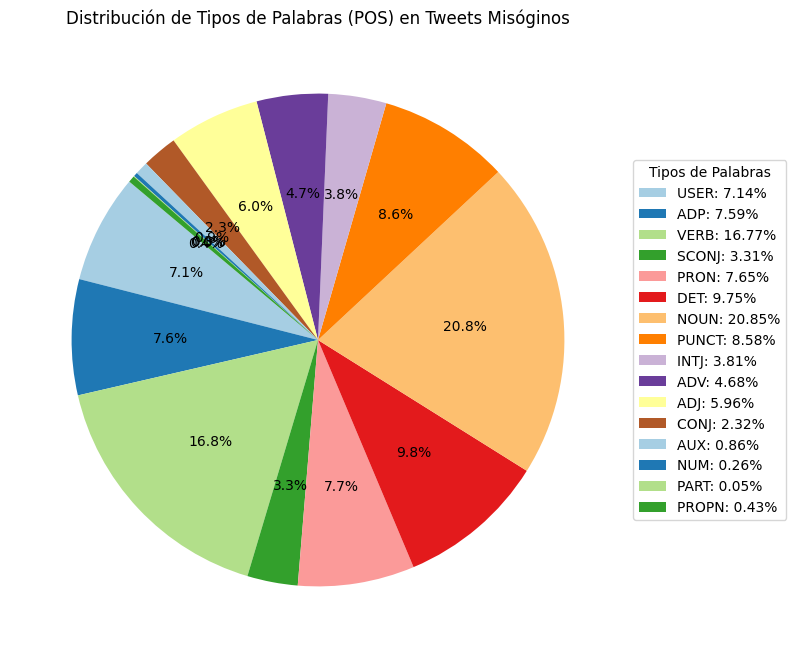

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_pos_percentages_misogynous.values(),  startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Palabras (POS) en Tweets Misóginos")
legend_labels = [f"{pos_type}: {percentage:.2f}%" for pos_type, percentage in overall_pos_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Tipos de Palabras", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


-----------------------------------------------

### Tweets no misóginos

-----------------------------------------------


In [25]:
# POS en tweets no misoginos
text_not_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 0]["text"].tolist()]
results_pos_not_misogynous = [analyze_pos_tags(text) for text in tqdm(text_not_misogynous)]

  1%|          | 17/1658 [00:00<00:20, 80.88it/s]

Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Etiquetas encontradas: [('módulo', 'NOUN'), ('01', 'ADJ'), ('invitados', 'NOUN'), ('directivos', 'NOUN'), ('del', 'ADP'), ('sindicato', 'NOUN'), ("'", 'PUNCT'), ('mariano', 'ADJ'), ('otero', 'NOUN'), ("'", 'PUNCT'), ('tema', 'NOUN'), (':', 'PUNCT'), ("'", 'PUNCT'), ('mobbing', 'NOUN'), ('o', 'CONJ'), ('acoso', 'NOUN'), ('laboral', 'ADJ'), ('y', 'CONJ'), ('violacion', 'NOUN'), ('a', 'ADP'), ('...', 'PUNCT'), ('url', 'NOUN')]
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Etiquetas encontradas: [('@causafiebres', 'USER'), ('claro', 'INTJ'), (',', 'PUNCT'), ('es', 'VERB'), ('que', 'SCONJ'), ('ha', 'AUX'), ('puesto', 'VERB'), ('imbécil', 'ADJ'), ('y', 'CONJ'), ('muchas', 'PRON'), ('se', 'PRON'), ('han', 'AUX'), ('dado', 'VERB'), ('por', 'ADP'), 

  2%|▏         | 35/1658 [00:00<00:19, 82.37it/s]

Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Etiquetas encontradas: [('@ngelsnchezc1', 'USER'), ('@jfitzgerald_86', 'USER'), ('@javaliverruga', 'USER'), ('@leticiadolera', 'USER'), ('no', 'ADV'), ('son', 'VERB'), ('horas', 'NOUN'), ('de', 'ADP'), ('estar', 'VERB'), ('tocándonos', 'VERB'), ('en', 'ADP'), ('coño', 'NOUN'), ('a', 'ADP'), ('1', 'NOUN'), ('de', 'ADP'), ('enero', 'NOUN'), (',', 'PUNCT'), ('caballeros', 'NOUN'), (',', 'PUNCT'), ('dispérsense', 'VERB'), ('.', 'PUNCT')]
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Etiquetas encontradas: [('le', 'PRON'), ('dije', 'VERB'), ('a', 'ADP'), ('mi', 'DET'), ('mamá', 'NOUN'), ('que', 'SCONJ'), ('extrañaba', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('pibito', 'NOUN'), ('y', 'CONJ'), ('me', 'PRON'), ('tiró', 'VERB'), ('los', 'DET'), (

  3%|▎         | 53/1658 [00:00<00:19, 83.97it/s]

Texto analizado: Pegarte en la cara con un sartén > ver Friends. https://t.co/HGNu2v8g7C
Etiquetas encontradas: [('pegarte', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('con', 'ADP'), ('un', 'DET'), ('sartén', 'NOUN'), ('>', 'PUNCT'), ('ver', 'VERB'), ('friends', 'NOUN'), ('.', 'PUNCT'), ('url', 'NOUN')]
Texto analizado: @tinaletina Ojalá no fuera así, pero tristemente lo es. Normalmente y gracias a Dios en el 90% de los casos son mujeres normales.+
Etiquetas encontradas: [('@tinaletina', 'USER'), ('ojalá', 'INTJ'), ('no', 'ADV'), ('fuera', 'VERB'), ('así', 'ADV'), (',', 'PUNCT'), ('pero', 'CONJ'), ('tristemente', 'ADV'), ('lo', 'PRON'), ('es', 'VERB'), ('.', 'PUNCT'), ('normalmente', 'ADV'), ('y', 'CONJ'), ('gracias', 'INTJ'), ('a', 'ADP'), ('dios', 'NOUN'), ('en', 'ADP'), ('el', 'DET'), ('90%', 'NOUN'), ('de', 'ADP'), ('los', 'DET'), ('casos', 'NOUN'), ('son', 'VERB'), ('mujeres', 'NOUN'), ('normales.+', 'ADJ')]
Texto analizado: @Guru_socket @joaquinbarucco La mejor for

  4%|▍         | 71/1658 [00:00<00:18, 85.72it/s]

Texto analizado: 2018 y 'vas provocando 2018 y 'te violan por guarra que te lo buscas' 2018 y si te resistes te matan, y si no te violan pero eh 'haberte resistido más' 2018 y 'pero había bebido? Dijo que no? Qué llevaba? Es ligona?' 2018 y la sociedad sigue dando asco Lets change that
Etiquetas encontradas: [('2018', 'NOUN'), ('y', 'CONJ'), ("'", 'PUNCT'), ('vas', 'AUX'), ('provocando', 'VERB'), ('2018', 'NOUN'), ('y', 'CONJ'), ("'", 'PUNCT'), ('te', 'PRON'), ('violan', 'VERB'), ('por', 'ADP'), ('guarra', 'NOUN'), ('que', 'SCONJ'), ('te', 'PRON'), ('lo', 'PRON'), ('buscas', 'VERB'), ("'", 'PUNCT'), ('2018', 'NOUN'), ('y', 'CONJ'), ('si', 'SCONJ'), ('te', 'PRON'), ('resistes', 'VERB'), ('te', 'PRON'), ('matan', 'VERB'), (',', 'PUNCT'), ('y', 'CONJ'), ('si', 'SCONJ'), ('no', 'ADV'), ('te', 'PRON'), ('violan', 'VERB'), ('pero', 'CONJ'), ('eh', 'INTJ'), ("'", 'PUNCT'), ('haberte', 'AUX'), ('resistido', 'VERB'), ('más', 'PRON'), ("'", 'PUNCT'), ('2018', 'NOUN'), ('y', 'CONJ'), ("'", 'PUNCT

  5%|▍         | 80/1658 [00:00<00:18, 84.45it/s]

Texto analizado: #TITULAESNACIONALES: Interpol captura a deportado salvadoreño que es acusado por los delitos de violación y acosos sexual
Etiquetas encontradas: [('hashtag', 'NOUN'), ('titulaesnacionales', 'NOUN'), (':', 'PUNCT'), ('interpol', 'NOUN'), ('captura', 'VERB'), ('a', 'ADP'), ('deportado', 'NOUN'), ('salvadoreño', 'NOUN'), ('que', 'PRON'), ('es', 'VERB'), ('acusado', 'VERB'), ('por', 'ADP'), ('los', 'DET'), ('delitos', 'NOUN'), ('de', 'ADP'), ('violación', 'NOUN'), ('y', 'CONJ'), ('acosos', 'NOUN'), ('sexual', 'ADJ')]
Texto analizado: @SamuelMarinRuiz Por desgracia tengo 4 pelos polla en la cara y es toh muy sad Encima de Panchito y parguela...imberbe https://t.co/CQm0ZwcPGa
Etiquetas encontradas: [('@samuelmarinruiz', 'USER'), ('por', 'ADP'), ('desgracia', 'NOUN'), ('tengo', 'VERB'), ('4', 'NUM'), ('pelos', 'NOUN'), ('polla', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('y', 'CONJ'), ('es', 'VERB'), ('toh', 'ADV'), ('muy', 'ADV'), ('sad', 'ADJ'), ('encima', 'A

  6%|▌         | 99/1658 [00:01<00:18, 85.57it/s]

Texto analizado: @Irene_Montero_ Y tú eres mejor que ese cerdo hijo de puta de @eduardoinda qué decepción de podemos https://t.co/2JzLiEgMDa
Etiquetas encontradas: [('@irene_montero', 'USER'), ('_', 'PUNCT'), ('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('mejor', 'ADJ'), ('que', 'SCONJ'), ('ese', 'DET'), ('cerdo', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('de', 'ADP'), ('@eduardoinda', 'USER'), ('qué', 'DET'), ('decepción', 'NOUN'), ('de', 'ADP'), ('podemos', 'PRON'), ('url', 'NOUN')]
Texto analizado: Otra puta injusticia.... Raoul grande Te mereces lo mejor #OTGala8
Etiquetas encontradas: [('otra', 'DET'), ('puta', 'ADJ'), ('injusticia', 'NOUN'), ('...', 'PUNCT'), ('raoul', 'INTJ'), ('grande', 'ADJ'), ('te', 'PRON'), ('mereces', 'VERB'), ('lo', 'DET'), ('mejor', 'ADJ'), ('hashtag', 'INTJ'), ('otgala8', 'INTJ')]
Texto analizado: @EJCJ @MartinaSotoPose No creo que nadie confunda acoso con seducción ni violación con fantasia sexual.
Etiquetas encontradas: [('@ejcj'

  7%|▋         | 117/1658 [00:01<00:18, 84.45it/s]

Texto analizado: @ciudad_magazine Malísimo el comentario, no tiene respeto por todas las mujeres que sufren acoso o violación y no se lee cree. Lastima por que ella llega a un montón de niños y su mensaje no está bueno ni es normal.
Etiquetas encontradas: [('@ciudad_magazine', 'USER'), ('malísimo', 'ADJ'), ('el', 'DET'), ('comentario', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('tiene', 'VERB'), ('respeto', 'NOUN'), ('por', 'ADP'), ('todas', 'DET'), ('las', 'DET'), ('mujeres', 'NOUN'), ('que', 'PRON'), ('sufren', 'VERB'), ('acoso', 'NOUN'), ('o', 'CONJ'), ('violación', 'NOUN'), ('y', 'CONJ'), ('no', 'ADV'), ('se', 'PRON'), ('lee', 'VERB'), ('cree', 'VERB'), ('.', 'PUNCT'), ('lastima', 'VERB'), ('por', 'ADP'), ('que', 'SCONJ'), ('ella', 'PRON'), ('llega', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('montón', 'NOUN'), ('de', 'ADP'), ('niños', 'NOUN'), ('y', 'CONJ'), ('su', 'DET'), ('mensaje', 'NOUN'), ('no', 'ADV'), ('está', 'VERB'), ('bueno', 'ADJ'), ('ni', 'CONJ'), ('es', 'VERB'), ('normal', 

  8%|▊         | 136/1658 [00:01<00:17, 87.28it/s]

Texto analizado: @kolderiu19 Pero decir que entras a un barrio y que te meten una polla en la garganta jajajaja
Etiquetas encontradas: [('@kolderiu19', 'USER'), ('pero', 'CONJ'), ('decir', 'VERB'), ('que', 'SCONJ'), ('entras', 'VERB'), ('a', 'ADP'), ('un', 'DET'), ('barrio', 'NOUN'), ('y', 'CONJ'), ('que', 'SCONJ'), ('te', 'PRON'), ('meten', 'VERB'), ('una', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('garganta', 'NOUN'), ('jaja', 'INTJ')]
Texto analizado: @el_pais La educación y la cultura tiene mucho peso y sí acoso y violación son crímenes y cada país e individuo lo evalúan de formas diferentes... Y los casamientos de infantes, la pedofilia, la trata de personas, etc. Demasiados crímenes sin atender.
Etiquetas encontradas: [('@el_pais', 'USER'), ('la', 'DET'), ('educación', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('cultura', 'NOUN'), ('tiene', 'VERB'), ('mucho', 'ADJ'), ('peso', 'NOUN'), ('y', 'CONJ'), ('sí', 'INTJ'), ('acoso', 'NOUN'), ('y', 'CONJ'), ('violación', 'NOU

  9%|▉         | 154/1658 [00:01<00:17, 87.32it/s]

Texto analizado: @RebecaS72720624 @TowandaRebels En serio lo de ser puta te parece Bien ? Gran Trabajo del regimen Franco-Hitler ...
Etiquetas encontradas: [('@rebecas72720624', 'USER'), ('@towandarebels', 'USER'), ('en', 'ADP'), ('serio', 'ADJ'), ('lo', 'DET'), ('de', 'ADP'), ('ser', 'VERB'), ('puta', 'NOUN'), ('te', 'PRON'), ('parece', 'VERB'), ('bien', 'ADV'), ('?', 'PUNCT'), ('gran', 'ADJ'), ('trabajo', 'NOUN'), ('del', 'ADP'), ('regimen', 'NOUN'), ('franco-hitler', 'NOUN'), ('...', 'PUNCT')]
Texto analizado: Relaja la polla que nadie se merece a semejante imbecil como tú, no te preocupes que nadie se va a acercar a un idiota integral https://t.co/Y5A65WAUtj
Etiquetas encontradas: [('relaja', 'VERB'), ('la', 'DET'), ('polla', 'NOUN'), ('que', 'SCONJ'), ('nadie', 'PRON'), ('se', 'PRON'), ('merece', 'VERB'), ('a', 'ADP'), ('semejante', 'DET'), ('imbecil', 'NOUN'), ('como', 'SCONJ'), ('tú', 'PRON'), (',', 'PUNCT'), ('no', 'ADV'), ('te', 'PRON'), ('preocupes', 'VERB'), ('que', 'SCONJ')

 10%|█         | 172/1658 [00:02<00:17, 84.89it/s]

Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Etiquetas encontradas: [('minimo', 'ADV'), ('denuncia', 'NOUN'), ('por', 'ADP'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), ('e', 'CONJ'), ('intento', 'NOUN'), ('de', 'ADP'), ('violacion', 'NOUN'), ('telepatica', 'ADJ'), ('url', 'NOUN')]
Texto analizado: @peri_getafe Callate q se me piro la cabeza y al final no puje q puta cabeza
Etiquetas encontradas: [('@peri_getafe', 'USER'), ('callate', 'VERB'), ('q', 'SCONJ'), ('se', 'PRON'), ('me', 'PRON'), ('piro', 'VERB'), ('la', 'DET'), ('cabeza', 'NOUN'), ('y', 'CONJ'), ('al', 'ADP'), ('final', 'NOUN'), ('no', 'ADV'), ('puje', 'VERB'), ('q', 'SCONJ'), ('puta', 'ADJ'), ('cabeza', 'NOUN')]
Texto analizado: Te pego con un Fierro en la cara y lo Doblas todo culia imagínate lo dura que la tenes
Etiquetas encontradas: [('te', 'PRON'), ('pego', 'VERB'), ('con', 'ADP'), ('un', 'DET'), ('fierro', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'

 12%|█▏        | 191/1658 [00:02<00:16, 88.07it/s]

Texto analizado: @BusiPiscinas Será el texto? 🤔 Que la gente es muy guarra...
Etiquetas encontradas: [('@busipiscinas', 'USER'), ('será', 'VERB'), ('el', 'DET'), ('texto', 'NOUN'), ('?', 'PUNCT'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('pensativa', 'ADJ'), ('emoji', 'INTJ'), (' ', 'NOUN'), ('que', 'SCONJ'), ('la', 'DET'), ('gente', 'NOUN'), ('es', 'VERB'), ('muy', 'ADV'), ('guarra', 'ADJ'), ('...', 'PUNCT')]
Texto analizado: @Relatofeminista Su puta madre (No lo paro de oír).
Etiquetas encontradas: [('@relatofeminista', 'USER'), ('su', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('(', 'PUNCT'), ('no', 'ADV'), ('lo', 'PRON'), ('paro', 'VERB'), ('de', 'ADP'), ('oír', 'VERB'), (')', 'PUNCT'), ('.', 'PUNCT')]
Texto analizado: @Pajaropolitico En México no solo es acoso y/o violación sino hasta feminicidio y dónde están los gritos de justicia, no se llevaron un Oscar, ni tuvieron cuentas millonarias. Estas mujeres denunciaron 20 años después mientras estos seguían haciendo de l

 13%|█▎        | 210/1658 [00:02<00:16, 87.21it/s]

Texto analizado: @ramongrauserra @fmarcalvaro Y tú eres un hijo de puta catalán
Etiquetas encontradas: [('@ramongrauserra', 'USER'), ('@fmarcalvaro', 'USER'), ('y', 'CONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('catalán', 'ADJ')]
Texto analizado: @MasculinismoEsp A ti! Movimiento SEMEN!!
Etiquetas encontradas: [('@masculinismoesp', 'USER'), ('a', 'ADP'), ('ti', 'PRON'), ('!', 'PUNCT'), ('movimiento', 'NOUN'), ('semen', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @Absolute_Zero23 @IrantzuVarela @enlafronteratv Coño reseco vuelve a la carga. La reina del vaginesil.
Etiquetas encontradas: [('@absolute_zero23', 'USER'), ('@irantzuvarela', 'USER'), ('@enlafronteratv', 'USER'), ('coño', 'INTJ'), ('reseco', 'ADJ'), ('vuelve', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('carga', 'NOUN'), ('.', 'PUNCT'), ('la', 'DET'), ('reina', 'NOUN'), ('del', 'ADP'), ('vaginesil', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Zurine3 Joder

 14%|█▍        | 228/1658 [00:02<00:16, 88.11it/s]

Texto analizado: LA PUTA MADRE LO Q HABÍA LLORADO XQ ENCIMA LO RE AMABA A RAMA SE MERECÍA EL MUNDO https://t.co/zXG0vg0VgD
Etiquetas encontradas: [('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('lo', 'PRON'), ('q', 'PRON'), ('había', 'AUX'), ('llorado', 'VERB'), ('xq', 'SCONJ'), ('encima', 'ADV'), ('lo', 'PRON'), ('re', 'ADV'), ('amaba', 'VERB'), ('a', 'ADP'), ('rama', 'NOUN'), ('se', 'PRON'), ('merecía', 'VERB'), ('el', 'DET'), ('mundo', 'NOUN'), ('url', 'INTJ')]
Texto analizado: @reuvenmx Ya càllate hijo de tu puta perra madre a nadie le importa culero!
Etiquetas encontradas: [('@reuvenmx', 'USER'), ('ya', 'ADV'), ('càllate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('perra', 'ADJ'), ('madre', 'NOUN'), ('a', 'ADP'), ('nadie', 'PRON'), ('le', 'PRON'), ('importa', 'VERB'), ('culero', 'ADJ'), ('!', 'PUNCT')]
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Et

 15%|█▍        | 246/1658 [00:02<00:16, 87.15it/s]

Texto analizado: Ves pues si denunciamos el acoso sexual y la violación sexual, acabaremos con la especie humana... lo mismo dijeron del voto femenino, la unión marital y el lenguage incluyente claro está! https://t.co/u3ZoTEGPZm
Etiquetas encontradas: [('ves', 'VERB'), ('pues', 'SCONJ'), ('si', 'SCONJ'), ('denunciamos', 'VERB'), ('el', 'DET'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), ('y', 'CONJ'), ('la', 'DET'), ('violación', 'NOUN'), ('sexual', 'ADJ'), (',', 'PUNCT'), ('acabaremos', 'VERB'), ('con', 'ADP'), ('la', 'DET'), ('especie', 'NOUN'), ('humana', 'ADJ'), ('...', 'PUNCT'), ('lo', 'DET'), ('mismo', 'ADJ'), ('dijeron', 'VERB'), ('del', 'ADP'), ('voto', 'NOUN'), ('femenino', 'ADJ'), (',', 'PUNCT'), ('la', 'DET'), ('unión', 'NOUN'), ('marital', 'ADJ'), ('y', 'CONJ'), ('el', 'DET'), ('lenguage', 'NOUN'), ('incluyente', 'ADJ'), ('claro', 'INTJ'), ('está', 'VERB'), ('!', 'PUNCT'), ('url', 'PUNCT')]
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, 

 16%|█▌        | 264/1658 [00:03<00:16, 85.88it/s]

Texto analizado: STRANGER THINGS MERECÍA GANAR HIJOS DE MIL PUTA ME CHUPAN LA PIJA TODOS #GoldenGlobes2018
Etiquetas encontradas: [('stranger', 'ADJ'), ('things', 'NOUN'), ('merecía', 'VERB'), ('ganar', 'VERB'), ('hijos', 'NOUN'), ('de', 'ADP'), ('mil', 'NUM'), ('puta', 'NOUN'), ('me', 'PRON'), ('chupan', 'VERB'), ('la', 'DET'), ('pija', 'NOUN'), ('todos', 'DET'), ('hashtag', 'DET'), ('goldenglobes2018', 'NOUN')]
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Etiquetas encontradas: [('@ainsuca', 'USER'), ('@camilochaparro', 'USER'), ('_', 'PUNCT'), ('@danielsampero', 'USER'), ('"', 'PUNCT'), ('el', 'DET'), ('mejor', 'ADJ'), ('y', 'CONJ'), ('la', 'DET'), ('mejor', 'ADJ'), ('amigo', 'NOUN'), ('o', 'CONJ'), ('amiga', 'NOUN'), ('del', 'DET'), ('hombreo', 'NOUN'), ('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('el', 'DET'), ('perro', 'NOUN'), ('o', 'CONJ'), ('la', 'DET'), ('perra', 'NOUN'), ('"', 

 17%|█▋        | 283/1658 [00:03<00:15, 88.62it/s]

Texto analizado: @Barbijaputa Chica, la verdad me da igual que tengas coño o falo y pelotas, lo importante para mí es lo escribes y la verdad lo haces más bien con el cerebro que con los genitales. Así sigue dando guerra!
Etiquetas encontradas: [('@barbijaputa', 'USER'), ('chica', 'NOUN'), (',', 'PUNCT'), ('la', 'DET'), ('verdad', 'NOUN'), ('me', 'PRON'), ('da', 'VERB'), ('igual', 'ADV'), ('que', 'SCONJ'), ('tengas', 'VERB'), ('coño', 'NOUN'), ('o', 'CONJ'), ('falo', 'NOUN'), ('y', 'CONJ'), ('pelotas', 'NOUN'), (',', 'PUNCT'), ('lo', 'DET'), ('importante', 'ADJ'), ('para', 'ADP'), ('mí', 'PRON'), ('es', 'VERB'), ('lo', 'PRON'), ('escribes', 'VERB'), ('y', 'CONJ'), ('la', 'DET'), ('verdad', 'NOUN'), ('lo', 'PRON'), ('haces', 'VERB'), ('más', 'ADV'), ('bien', 'ADV'), ('con', 'ADP'), ('el', 'DET'), ('cerebro', 'NOUN'), ('que', 'SCONJ'), ('con', 'ADP'), ('los', 'DET'), ('genitales', 'NOUN'), ('.', 'PUNCT'), ('así', 'ADV'), ('sigue', 'AUX'), ('dando', 'VERB'), ('guerra', 'NOUN'), ('!', 'PUN

 18%|█▊        | 301/1658 [00:03<00:15, 86.24it/s]

Texto analizado: Por favor... http://t.co/NS6D55DTdu
Etiquetas encontradas: [('por', 'ADP'), ('favor', 'NOUN'), ('...', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Etiquetas encontradas: [('@bebevitareal', 'USER'), ('@bebemiloyt', 'USER'), ('te', 'PRON'), ('madro', 'NOUN'), ('bebe', 'VERB'), ('milo', 'NOUN'), ('verdad', 'NOUN'), ('se', 'PRON'), ('te', 'PRON'), ('ve', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('que', 'PRON'), ('te', 'PRON'), ('pego', 'VERB')]
Texto analizado: @LeticiaDolera El arte de la vida es aprender y enseñar y seguir aprendiendo,para seguir enseñando......
Etiquetas encontradas: [('@leticiadolera', 'USER'), ('el', 'DET'), ('arte', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('vida', 'NOUN'), ('es', 'VERB'), ('aprender', 'VERB'), ('y', 'CONJ'), ('enseñar', 'VERB'), ('y', 'CONJ'), ('seguir', 'AUX'), ('aprendiendo', 'VERB'), (',', 'PUNCT'), ('para', 'ADP'), ('seguir', 'AUX')

 19%|█▉        | 319/1658 [00:03<00:15, 86.30it/s]

Texto analizado: @fullereno374 @Bcnisnotcat_ Tu eres gallego no? Pues tu a lo tuyo... verdad que yo no me meto en tu puta comunidad? Pues tu no te metad en la mía
Etiquetas encontradas: [('@fullereno374', 'USER'), ('@bcnisnotcat', 'USER'), ('_', 'INTJ'), ('tu', 'DET'), ('eres', 'VERB'), ('gallego', 'ADJ'), ('no', 'INTJ'), ('?', 'PUNCT'), ('pues', 'SCONJ'), ('tu', 'DET'), ('a', 'ADP'), ('lo', 'DET'), ('tuyo', 'ADJ'), ('...', 'PUNCT'), ('verdad', 'NOUN'), ('que', 'SCONJ'), ('yo', 'PRON'), ('no', 'ADV'), ('me', 'PRON'), ('meto', 'VERB'), ('en', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('comunidad', 'NOUN'), ('?', 'PUNCT'), ('pues', 'SCONJ'), ('tu', 'DET'), ('no', 'ADV'), ('te', 'PRON'), ('metad', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('mía', 'ADJ')]
Texto analizado: Mira, cállate un poco porque estás haciendo la pena, pedazo de hijo de la gran puta. Que los putos humoristas de los cojones siempre aprovecháis todas las desgracias para daros a conocer con vuestros lamentables y patéticos ch

 20%|██        | 338/1658 [00:03<00:15, 87.62it/s]

Texto analizado: @ronuevo @FCBarcelona_es Bobo hijo de perra, usted cree que va a enseñarle a Messi o llega a aprender del más grande?
Etiquetas encontradas: [('@ronuevo', 'USER'), ('@fcbarcelona_es', 'USER'), ('bobo', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), (',', 'PUNCT'), ('usted', 'PRON'), ('cree', 'VERB'), ('que', 'SCONJ'), ('va', 'AUX'), ('a', 'ADP'), ('enseñarle', 'VERB'), ('a', 'ADP'), ('messi', 'NOUN'), ('o', 'CONJ'), ('llega', 'AUX'), ('a', 'ADP'), ('aprender', 'VERB'), ('del', 'ADP'), ('más', 'ADV'), ('grande', 'ADJ'), ('?', 'PUNCT')]
Texto analizado: @Luis050876 @EspanaTovio @CeDemocratico mmmmm ese es el argumento cínico que usan algunos para justificar una violación o acoso
Etiquetas encontradas: [('@luis050876', 'USER'), ('@espanatovio', 'USER'), ('@cedemocratico', 'USER'), ('mmm', 'INTJ'), ('ese', 'PRON'), ('es', 'VERB'), ('el', 'DET'), ('argumento', 'NOUN'), ('cínico', 'ADJ'), ('que', 'PRON'), ('usan', 'VERB'), ('algunos', 'PRON'), ('para', 'ADP'), (

 22%|██▏       | 357/1658 [00:04<00:14, 88.52it/s]

Texto analizado: @nyaruko__chan Acoso , violacion , me da bastante igual , yo no voy a entrar en el trapo de querer o no la pena de muerte pero ser MACHISTA por no quererla es un poco equisde no?
Etiquetas encontradas: [('@nyaruko__chan', 'USER'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('violacion', 'NOUN'), (',', 'PUNCT'), ('me', 'PRON'), ('da', 'VERB'), ('bastante', 'ADV'), ('igual', 'ADV'), (',', 'PUNCT'), ('yo', 'PRON'), ('no', 'ADV'), ('voy', 'AUX'), ('a', 'ADP'), ('entrar', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('trapo', 'NOUN'), ('de', 'ADP'), ('querer', 'VERB'), ('o', 'CONJ'), ('no', 'INTJ'), ('la', 'DET'), ('pena', 'NOUN'), ('de', 'ADP'), ('muerte', 'NOUN'), ('pero', 'CONJ'), ('ser', 'VERB'), ('machista', 'NOUN'), ('por', 'ADP'), ('no', 'ADV'), ('quererla', 'VERB'), ('es', 'VERB'), ('un', 'DET'), ('poco', 'ADV'), ('equisde', 'ADJ'), ('no', 'INTJ'), ('?', 'PUNCT')]
Texto analizado: Comemela — AQUI AQUI AQUI NI HAY QUIEN VIVA AQUI NO AQUI NO https://t.co/4b1kyvugxI
Etiquetas encont

 23%|██▎       | 376/1658 [00:04<00:14, 86.86it/s]

Texto analizado: Sólo dentro de los límites del humor, quizá es esta la solución compensatoria para ellas en el tema de la carne roja https://t.co/xKuiLibt9J
Etiquetas encontradas: [('sólo', 'ADV'), ('dentro', 'ADV'), ('de', 'ADP'), ('los', 'DET'), ('límites', 'NOUN'), ('del', 'ADP'), ('humor', 'NOUN'), (',', 'PUNCT'), ('quizá', 'ADV'), ('es', 'VERB'), ('esta', 'PRON'), ('la', 'DET'), ('solución', 'NOUN'), ('compensatoria', 'ADJ'), ('para', 'ADP'), ('ellas', 'PRON'), ('en', 'ADP'), ('el', 'DET'), ('tema', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('carne', 'NOUN'), ('roja', 'ADJ'), ('url', 'PUNCT')]
Texto analizado: @JoaquinPrietito vení pero a vos no te pego en la cara pq sos muy lindo jajaja<3
Etiquetas encontradas: [('@joaquinprietito', 'USER'), ('vení', 'VERB'), ('pero', 'CONJ'), ('a', 'ADP'), ('vos', 'PRON'), ('no', 'ADV'), ('te', 'PRON'), ('pego', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('pq', 'SCONJ'), ('sos', 'VERB'), ('muy', 'ADV'), ('lindo', 'ADJ'), ('jaja<3', '

 24%|██▍       | 395/1658 [00:04<00:14, 87.29it/s]

Texto analizado: @tinaletina Llevar esa prenda de vestir puede suponer un riesgo de muerte para toda la gente que esté en un radio de 30 m de esa persona.
Etiquetas encontradas: [('@tinaletina', 'USER'), ('llevar', 'VERB'), ('esa', 'DET'), ('prenda', 'NOUN'), ('de', 'ADP'), ('vestir', 'VERB'), ('puede', 'AUX'), ('suponer', 'VERB'), ('un', 'DET'), ('riesgo', 'NOUN'), ('de', 'ADP'), ('muerte', 'NOUN'), ('para', 'ADP'), ('toda', 'DET'), ('la', 'DET'), ('gente', 'NOUN'), ('que', 'PRON'), ('esté', 'VERB'), ('en', 'ADP'), ('un', 'DET'), ('radio', 'NOUN'), ('de', 'ADP'), ('30', 'NUM'), ('m', 'NOUN'), ('de', 'ADP'), ('esa', 'DET'), ('persona', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: 3 estoy hasta la polla que para la prensa @MichelGonzalez hasta cuando se nos caga en la cara nos está dando una lección de humildad y saber estar y 4 si algún día ahí una manifestación por algo importante de verdad (sanidad, educación o derechos laborales) espero que no vaya...
Etiquetas encontradas: [('3', 'NUM

 25%|██▍       | 413/1658 [00:04<00:14, 88.25it/s]

Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Etiquetas encontradas: [('me', 'PRON'), ('preguntaron', 'VERB'), ('por', 'ADP'), ('qué', 'PRON'), ('mi', 'DET'), ('perro', 'NOUN'), ('tiene', 'VERB'), ('collar', 'NOUN'), ('rosado', 'ADJ'), ('y', 'CONJ'), ('mi', 'DET'), ('perra', 'NOUN'), ('uno', 'PRON'), ('verde', 'ADJ'), ('.', 'PUNCT'), ("'", 'PUNCT'), ('no', 'ADV'), ('será', 'VERB'), ('al', 'ADP'), ('revés', 'NOUN'), ('?', 'PUNCT'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('no', 'INTJ'), ('amis', 'NOUN'), ('porfa', 'INTJ'), ('callate', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @logela También he visto usar “escarceos amorosos” para referirse a sus intentos de violacion y acoso. Es penoso.
Etiquetas encontradas: [('@logela', 'USER'), ('también', 'ADV'), ('he', 'AUX'), ('visto', 'VERB'), ('usar', 'VERB'), ('"', 'PUNCT'), ('escarceos', 'NOUN'), ('amorosos', 'ADJ'), ('"', 'PUNCT'), ('para', 'ADP'), ('referirse',

 26%|██▌       | 431/1658 [00:05<00:14, 85.99it/s]

Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Etiquetas encontradas: [('@jonatanviale', 'USER'), ('@intratablestv', 'USER'), ('cállate', 'VERB'), ('lacra', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('mercenario', 'NOUN'), (',', 'PUNCT'), ('forro', 'NOUN'), ('indigno', 'ADJ')]
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Etiquetas encontradas: [('@valeria_martell', 'USER'), ('@nopaiep', 'USER'), ('si', 'SCONJ'), (',', 'PUNCT'), ('estoy', 'VERB'), ('de', 'ADP'), ('acuerdo', 'NOUN'), ('.', 'PUNCT'), ('a', 'ADP'), ('ningún', 'DET'), ('hombre', 'NOUN'), ('le', 'PRON'), ('pasaría', 'VERB'), ('por', 'ADP'), ('la', 'DET'), ('cabeza', 'NOUN'), ('que', 'SCONJ'), ('una', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('puta', 'NOUN'), ('por', 'ADP'), ('subir', 'VERB'), ('fotos', 'NOU

 27%|██▋       | 450/1658 [00:05<00:13, 88.26it/s]

Texto analizado: SEMEN. Difundamos un movimiento necesario. http://t.co/P6hfGRZ0Tm
Etiquetas encontradas: [('semen', 'NOUN'), ('.', 'PUNCT'), ('difundamos', 'VERB'), ('un', 'DET'), ('movimiento', 'NOUN'), ('necesario', 'ADJ'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @kleopatreus Tú eres bien perra 😂😂💪🏽
Etiquetas encontradas: [('@kleopatreus', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('bien', 'ADV'), ('perra', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'INTJ'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('bíceps', 'ADV'), ('flexionado', 'ADV'), ('tono', 'NOUN'), ('de', 'ADP'), ('piel', 'NOUN'), ('medio', 'ADJ'), ('emoji', 'NOUN')]
Texto analizado: @CastigadorY Es q esta escoria de rufián, hasta en la q él considera su tierra, le insultan. Es q es imbecil integral
Etiquetas encontr

 28%|██▊       | 468/1658 [00:05<00:14, 84.19it/s]

Texto analizado: Lo que hace Nicolás Maduro no es acoso, es violación y no se lo hace sólo a la oposición, se lo hace a todos en Venezuela https://t.co/3z7Eynbctq
Etiquetas encontradas: [('lo', 'PRON'), ('que', 'PRON'), ('hace', 'VERB'), ('nicolás', 'PROPN'), ('maduro', 'PROPN'), ('no', 'ADV'), ('es', 'VERB'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('es', 'VERB'), ('violación', 'NOUN'), ('y', 'CONJ'), ('no', 'ADV'), ('se', 'PRON'), ('lo', 'PRON'), ('hace', 'VERB'), ('sólo', 'ADV'), ('a', 'ADP'), ('la', 'DET'), ('oposición', 'NOUN'), (',', 'PUNCT'), ('se', 'PRON'), ('lo', 'PRON'), ('hace', 'VERB'), ('a', 'ADP'), ('todos', 'PRON'), ('en', 'ADP'), ('venezuela', 'NOUN'), ('url', 'PUNCT')]
Texto analizado: @zepedajantonio Tú eres el hijo de perra, voy a explotar perro
Etiquetas encontradas: [('@zepedajantonio', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('el', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), (',', 'PUNCT'), ('voy', 'AUX'), ('a', 'ADP'), ('explotar', 'VERB'), ('perro'

 29%|██▉       | 486/1658 [00:05<00:13, 85.34it/s]

Texto analizado: Y a mercurio? Cuando acabe con la luna
Etiquetas encontradas: [('y', 'CONJ'), ('a', 'ADP'), ('mercurio', 'NOUN'), ('?', 'PUNCT'), ('cuando', 'SCONJ'), ('acabe', 'VERB'), ('con', 'ADP'), ('la', 'DET'), ('luna', 'NOUN')]
Texto analizado: Haces que ellas jueguen contigo como el imbécil que eres Si fueras mi novio o mi cosa te habría arrancado la polla a bocados hace tiempo Pero nada, tu sigue
Etiquetas encontradas: [('haces', 'VERB'), ('que', 'SCONJ'), ('ellas', 'PRON'), ('jueguen', 'VERB'), ('contigo', 'PRON'), ('como', 'SCONJ'), ('el', 'DET'), ('imbécil', 'NOUN'), ('que', 'PRON'), ('eres', 'VERB'), ('si', 'SCONJ'), ('fueras', 'VERB'), ('mi', 'DET'), ('novio', 'NOUN'), ('o', 'CONJ'), ('mi', 'DET'), ('cosa', 'NOUN'), ('te', 'PRON'), ('habría', 'AUX'), ('arrancado', 'VERB'), ('la', 'DET'), ('polla', 'NOUN'), ('a', 'ADP'), ('bocados', 'NOUN'), ('hace', 'VERB'), ('tiempo', 'NOUN'), ('pero', 'CONJ'), ('nada', 'PRON'), (',', 'PUNCT'), ('tu', 'DET'), ('sigue', 'VERB')]
Texto an

 30%|███       | 504/1658 [00:05<00:13, 82.83it/s]

Texto analizado: la familia de mi novia es lo mejor qué hay la puta madre ❤️❤️❤️❤️❤️❤️
Etiquetas encontradas: [('la', 'DET'), ('familia', 'NOUN'), ('de', 'ADP'), ('mi', 'DET'), ('novia', 'NOUN'), ('es', 'VERB'), ('lo', 'DET'), ('mejor', 'ADJ'), ('qué', 'PRON'), ('hay', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN')]
Texto analizado: @anaisbernal @elperiodico Sin lugar a dudas a ti por analizar de forma tan exquisita realidades que no todos logran ver.
Etiquetas encontradas: [('@anaisbernal', 'USER'), ('@elperiodico', 'USER'), ('sin', 'ADP'), ('lugar', 'NOUN'), ('a', 'ADP'), ('dudas', 'NOUN'), ('a', 'ADP'), ('ti', 'PRON'), ('por', 'ADP'), ('analizar', 'VERB'), ('de', 'ADP'), ('forma', 'NOUN'), ('tan', 'ADV'), ('exquisita', 'ADJ'), ('realidades', 'NOUN'), ('que', 'PRON'), ('no', 'ADV'), ('todos', 'PRON'), ('logran', 'AUX'), ('ver', 'VERB'), ('.', 'PUNCT')]
Texto analizado: La gente que opina sobre el aborto y que jamás ha sido madre, que no ha pasado por alguna violacion o ac

 31%|███▏      | 522/1658 [00:06<00:13, 82.80it/s]

Texto analizado: @24_robledo @riverocalu Contame cuantos casos de abuso, acoso y violación son contados en el momento o en el mimo año que sucede el hecho, porque las estadísticas muestran que la víctima puede tardar meses, años y hasta callarse de por vida por sentir mie
Etiquetas encontradas: [('@24_robledo', 'USER'), ('@riverocalu', 'USER'), ('contame', 'VERB'), ('cuantos', 'DET'), ('casos', 'NOUN'), ('de', 'ADP'), ('abuso', 'NOUN'), (',', 'PUNCT'), ('acoso', 'NOUN'), ('y', 'CONJ'), ('violación', 'NOUN'), ('son', 'VERB'), ('contados', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('momento', 'NOUN'), ('o', 'CONJ'), ('en', 'ADP'), ('el', 'DET'), ('mimo', 'ADJ'), ('año', 'NOUN'), ('que', 'SCONJ'), ('sucede', 'VERB'), ('el', 'DET'), ('hecho', 'NOUN'), (',', 'PUNCT'), ('porque', 'SCONJ'), ('las', 'DET'), ('estadísticas', 'NOUN'), ('muestran', 'VERB'), ('que', 'SCONJ'), ('la', 'DET'), ('víctima', 'NOUN'), ('puede', 'AUX'), ('tardar', 'VERB'), ('meses', 'NOUN'), (',', 'PUNCT'), ('años', 'NOUN'),

 33%|███▎      | 540/1658 [00:06<00:13, 85.56it/s]

Texto analizado: ▶️ VIDEO: Golpean en la cara a #HarveyWeinstein, acusado de acoso sexual, tras salir de restaurante https://t.co/k3u9b2spKR https://t.co/10icQr0dqc
Etiquetas encontradas: [('emoji', 'PROPN'), ('reproducir', 'INTJ'), ('emoji', 'PROPN'), (' ', 'PUNCT'), ('video', 'NOUN'), (':', 'PUNCT'), ('golpean', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('a', 'ADP'), ('hashtag', 'PROPN'), ('harveyweinstein', 'NOUN'), (',', 'PUNCT'), ('acusado', 'VERB'), ('de', 'ADP'), ('acoso', 'NOUN'), ('sexual', 'ADJ'), (',', 'PUNCT'), ('tras', 'SCONJ'), ('salir', 'VERB'), ('de', 'ADP'), ('restaurante', 'NOUN'), ('url', 'PROPN'), ('url', 'PROPN')]
Texto analizado: Agos te voy a extrañar bocha perra pero te mereces el mejor viaje de todos t amo mil, te voy a extrañar mucho mucho enserio https://t.co/PhRKFBNuYb
Etiquetas encontradas: [('agos', 'NOUN'), ('te', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('extrañar', 'VERB'), ('bocha', 'ADV'), ('perra', 'NOUN'), ('pero', 'CONJ'), ('te', 'PRON

 34%|███▎      | 558/1658 [00:06<00:13, 83.56it/s]

Texto analizado: @AriiSayago Ay callate perra si siempre voy a tu casa bueno hiba porque hsce cuanto no voy jajajaj
Etiquetas encontradas: [('@ariisayago', 'USER'), ('ay', 'INTJ'), ('callate', 'VERB'), ('perra', 'NOUN'), ('si', 'SCONJ'), ('siempre', 'ADV'), ('voy', 'VERB'), ('a', 'ADP'), ('tu', 'DET'), ('casa', 'NOUN'), ('bueno', 'INTJ'), ('hiba', 'VERB'), ('porque', 'SCONJ'), ('hsce', 'VERB'), ('cuanto', 'ADV'), ('no', 'ADV'), ('voy', 'VERB'), ('jaja', 'PUNCT')]
Texto analizado: @panchielgana Te fuiste a las 3 hijo de puta callate
Etiquetas encontradas: [('@panchielgana', 'USER'), ('te', 'PRON'), ('fuiste', 'VERB'), ('a', 'ADP'), ('las', 'DET'), ('3', 'NUM'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('callate', 'VERB')]
Texto analizado: #ElSalvador: Jefe policial detenido por violación y acoso sexual https://t.co/ZmSTVJbuKm
Etiquetas encontradas: [('hashtag', 'NOUN'), ('elsalvador', 'DET'), (':', 'PUNCT'), ('jefe', 'NOUN'), ('policial', 'ADJ'), ('detenido', 'ADJ'), ('por', '

 35%|███▍      | 577/1658 [00:06<00:12, 86.28it/s]

Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Etiquetas encontradas: [('@duune', 'USER'), ('_', 'NOUN'), ('@juan3256426', 'USER'), ('@emocristo', 'USER'), ('callate', 'VERB'), ('tu', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN'), ('ay', 'INTJ'), ('las', 'DET'), ('mayus', 'NOUN')]
Texto analizado: @danlntifada @fatinascidi @manolivizoso @Zurine3 @Jvillaver2 https://t.co/HG4ljNlwR3, coño entonces tu eres de lo que te guias por el antes de cristo y despues de cristo,cuando llegamos los Españoles,y le contagiamos todas clases de enfermedades Europeas 
Etiquetas encontradas: [('@danlntifada', 'USER'), ('@fatinascidi', 'USER'), ('@manolivizoso', 'USER'), ('@zurine3', 'USER'), ('@jvillaver2', 'USER'), ('url', 'NOUN'), (',', 'PUNCT'), ('coño', 'INTJ'), ('entonces', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('de', 'ADP'), ('lo', 'PRON'), ('que', 'PRON'), ('te', 'PRON'), ('guias', 'VERB'), ('por', 'ADP'), ('el', 'DET'), ('antes', 'ADV'), ('d

 36%|███▌      | 595/1658 [00:06<00:12, 84.21it/s]

Texto analizado: la mujer es una perla no una perra
Etiquetas encontradas: [('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('perla', 'NOUN'), ('no', 'INTJ'), ('una', 'DET'), ('perra', 'NOUN')]
Texto analizado: @iamyamille Últimamente a la gran mayoría de actores/cantantes famosos los están acusando de violación u acoso. Btw, gracias por responder
Etiquetas encontradas: [('@iamyamille', 'USER'), ('últimamente', 'ADV'), ('a', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('mayoría', 'NOUN'), ('de', 'ADP'), ('actores', 'NOUN'), ('/', 'CONJ'), ('cantantes', 'NOUN'), ('famosos', 'ADJ'), ('los', 'PRON'), ('están', 'AUX'), ('acusando', 'VERB'), ('de', 'ADP'), ('violación', 'NOUN'), ('u', 'CONJ'), ('acoso', 'NOUN'), ('.', 'PUNCT'), ('btw', 'INTJ'), (',', 'PUNCT'), ('gracias', 'INTJ'), ('por', 'ADP'), ('responder', 'VERB')]
Texto analizado: @ierrejon Día 8 de Diciembre a 3 Grados Celsius. Por favor Iñigo dime si esto es precariedad, acoso, violacion de derechos... y sí es el ejérci

 37%|███▋      | 613/1658 [00:07<00:12, 82.98it/s]

Texto analizado: Mi perra: [rompe todo lo que hay a su alrededor] Yo: tu eres un desastre, un terrible desastre Mi perra: [se queda quieta y me mira] Yo: ay pero eres tan lindaaa, quien es la nena linda, ah? Quien es la nena linda?!
Etiquetas encontradas: [('mi', 'DET'), ('perra', 'NOUN'), (':', 'PUNCT'), ('[', 'PUNCT'), ('rompe', 'VERB'), ('todo', 'DET'), ('lo', 'PRON'), ('que', 'PRON'), ('hay', 'VERB'), ('a', 'ADP'), ('su', 'DET'), ('alrededor', 'ADV'), (']', 'PUNCT'), ('yo', 'PRON'), (':', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('desastre', 'NOUN'), (',', 'PUNCT'), ('un', 'DET'), ('terrible', 'ADJ'), ('desastre', 'NOUN'), ('mi', 'DET'), ('perra', 'NOUN'), (':', 'PUNCT'), ('[', 'PUNCT'), ('se', 'PRON'), ('queda', 'VERB'), ('quieta', 'ADJ'), ('y', 'CONJ'), ('me', 'PRON'), ('mira', 'VERB'), (']', 'PUNCT'), ('yo', 'PRON'), (':', 'PUNCT'), ('ay', 'INTJ'), ('pero', 'CONJ'), ('eres', 'VERB'), ('tan', 'ADV'), ('lindaaa', 'ADJ'), (',', 'PUNCT'), ('quien', 'PRON'), ('es', '

 38%|███▊      | 631/1658 [00:07<00:12, 84.50it/s]

Texto analizado: @JuanitoSay Pero cállate hijo de puta debe de paliar más que vos el
Etiquetas encontradas: [('@juanitosay', 'USER'), ('pero', 'CONJ'), ('cállate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('debe', 'AUX'), ('de', 'ADP'), ('paliar', 'VERB'), ('más', 'ADV'), ('que', 'SCONJ'), ('vos', 'PRON'), ('el', 'DET')]
Texto analizado: @EccehomoSetrina ¡¡si no me haces caso te pego en la cara marica!!
Etiquetas encontradas: [('@eccehomosetrina', 'USER'), ('¡', 'PUNCT'), ('¡', 'PUNCT'), ('si', 'SCONJ'), ('no', 'ADV'), ('me', 'PRON'), ('haces', 'VERB'), ('caso', 'NOUN'), ('te', 'PRON'), ('pego', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('marica', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: Nueve mujeres más denuncian al magnate del hip hop, Russell Simmons, de violación y acoso sexual https://t.co/doN87MBQQZ
Etiquetas encontradas: [('nueve', 'NUM'), ('mujeres', 'NOUN'), ('más', 'PRON'), ('denuncian', 'VERB'), ('al', 'ADP'), ('magnate', '

 39%|███▊      | 640/1658 [00:07<00:12, 81.55it/s]

Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Etiquetas encontradas: [('@agoan2009', 'USER'), ('aaa', 'INTJ'), ('cállate', 'VERB'), ('q', 'SCONJ'), ('t', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('tener', 'VERB'), ('miedooo', 'NOUN'), ('si', 'SCONJ'), ('sacamos', 'VERB'), ('los', 'DET'), ('trapos', 'NOUN'), ('al', 'ADP'), ('sol', 'NOUN'), ('t', 'PRON'), ('mato', 'VERB'), ('perra', 'NOUN'), ('pq', 'SCONJ'), ('me', 'PRON'), ('has', 'VERB'), ('abandonada', 'VERB'), ('jaja', 'INTJ'), ('nos', 'PRON'), ('vemos', 'VERB'), ('el', 'DET'), ('miercoles', 'NOUN'), ('si', 'SCONJ'), ('es', 'VERB'), ('q', 'SCONJ'), ('no', 'INTJ'), ('t', 'PRON'), ('vas', 'VERB'), ('al', 'ADP'), ('lago', 'NOUN'), ('etc', 'ADV'), ('etc', 'ADV')]
Texto analizado: @AgustinGregok Cállate hijo de perra 🙃
Etiquetas encontradas: [('@agustingregok', 'USER'), ('cállate', 

 40%|███▉      | 658/1658 [00:07<00:11, 83.63it/s]

Texto analizado: @milebebe Porque un imbécil le dio respuesta a un twitt de una muchacha lo más de linda diciéndole zorra, envidia tal vez porque él se viste de mujer y no se ve así de bonita Para más información el TL de @AyCapullito
Etiquetas encontradas: [('@milebebe', 'USER'), ('porque', 'SCONJ'), ('un', 'DET'), ('imbécil', 'NOUN'), ('le', 'PRON'), ('dio', 'VERB'), ('respuesta', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('twitt', 'NOUN'), ('de', 'ADP'), ('una', 'DET'), ('muchacha', 'NOUN'), ('lo', 'DET'), ('más', 'ADV'), ('de', 'ADP'), ('linda', 'ADJ'), ('diciéndole', 'VERB'), ('zorra', 'NOUN'), (',', 'PUNCT'), ('envidia', 'NOUN'), ('tal', 'DET'), ('vez', 'NOUN'), ('porque', 'SCONJ'), ('él', 'PRON'), ('se', 'PRON'), ('viste', 'VERB'), ('de', 'ADP'), ('mujer', 'NOUN'), ('y', 'CONJ'), ('no', 'ADV'), ('se', 'PRON'), ('ve', 'VERB'), ('así', 'ADV'), ('de', 'ADP'), ('bonita', 'ADJ'), ('para', 'ADP'), ('más', 'ADJ'), ('información', 'NOUN'), ('el', 'DET'), ('tl', 'NOUN'), ('de', 'ADP'), ('@ay

 41%|████      | 676/1658 [00:07<00:11, 83.47it/s]

Texto analizado: Asi es nuestro periodismo! Dais asco!No mereceis q os llamen profesionales! “Golfa, perra”: el último testimonio pone al padre de Diana en el disparadero //www.esdiario.com/725804060/Golfa-perra-el-ultimo-testimonio-pone-al-padre-de-Diana-en-el-disparadero.html vía @ESdiario_com
Etiquetas encontradas: [('asi', 'ADV'), ('es', 'VERB'), ('nuestro', 'DET'), ('periodismo', 'NOUN'), ('!', 'PUNCT'), ('dais', 'VERB'), ('asco!no', 'NOUN'), ('mereceis', 'VERB'), ('q', 'SCONJ'), ('os', 'PRON'), ('llamen', 'VERB'), ('profesionales', 'NOUN'), ('!', 'PUNCT'), ('"', 'PUNCT'), ('golfa', 'NOUN'), (',', 'PUNCT'), ('perra', 'NOUN'), ('"', 'PUNCT'), (':', 'PUNCT'), ('el', 'DET'), ('último', 'ADJ'), ('testimonio', 'NOUN'), ('pone', 'VERB'), ('al', 'DET'), ('padre', 'NOUN'), ('de', 'ADP'), ('diana', 'NOUN'), ('en', 'ADP'), ('el', 'DET'), ('disparadero', 'NOUN'), ('//url-perra-el-ultimo-testimonio-pone-al-padre-de-diana-en-el-disparadero.html', 'PUNCT'), ('vía', 'ADP'), ('@esdiario_com', 'US

 42%|████▏     | 694/1658 [00:08<00:11, 83.95it/s]

Texto analizado: @IrantzuVarela @Fourty35 estás muy mal de la puta cabeza eh ? haztelo mirar 😂😂
Etiquetas encontradas: [('@irantzuvarela', 'USER'), ('@fourty35', 'USER'), ('estás', 'VERB'), ('muy', 'ADV'), ('mal', 'ADV'), ('de', 'ADP'), ('la', 'DET'), ('puta', 'ADJ'), ('cabeza', 'NOUN'), ('eh', 'INTJ'), ('?', 'PUNCT'), ('haztelo', 'VERB'), ('mirar', 'VERB'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'ADP')]
Texto analizado: @oscargeek @Relatofeminista jajajaja 👍 muy buena esa. Ya no hablo en serio,xq estoy hasta el coño dl tema
Etiquetas encontradas: [('@oscargeek', 'USER'), ('@relatofeminista', 'USER'), ('jaja', 'INTJ'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('pulgar', 'NOUN'), ('hacia', 'ADV'), ('arriba', 'ADV'), ('emoji', 'INTJ'), (' ', 'INTJ'), ('muy', 'ADV'), ('buena', 'ADJ'), ('esa',

 43%|████▎     | 712/1658 [00:08<00:11, 81.99it/s]

Texto analizado: Hoy se quema el 2K17 gracias por enseñarme mucho, y viene 2K18 como así que SKEREE perra ajjaja
Etiquetas encontradas: [('hoy', 'ADV'), ('se', 'PRON'), ('quema', 'VERB'), ('el', 'DET'), ('2k17', 'PROPN'), ('gracias', 'INTJ'), ('por', 'ADP'), ('enseñarme', 'VERB'), ('mucho', 'ADV'), (',', 'PUNCT'), ('y', 'CONJ'), ('viene', 'VERB'), ('2k18', 'PROPN'), ('como', 'ADV'), ('así', 'ADV'), ('que', 'SCONJ'), ('skeree', 'VERB'), ('perra', 'NOUN'), ('jaja', 'PUNCT')]
Texto analizado: Acoso, abuso o violación - (https://t.co/DQLGU3qhzO)
Etiquetas encontradas: [('acoso', 'NOUN'), (',', 'PUNCT'), ('abuso', 'NOUN'), ('o', 'CONJ'), ('violación', 'NOUN'), ('-', 'PUNCT'), ('(', 'PUNCT'), ('url', 'INTJ'), (')', 'PUNCT')]
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Etiquetas encontradas: [('@relatofeminista', 'USER'), ('el', 'DET'), ('es', 'VERB'), ('un', 'DET'), ('cabron', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), (

 44%|████▍     | 731/1658 [00:08<00:11, 83.48it/s]

Texto analizado: @javosss @elcolombiano @JuanManSantos Mas asesino eres tu y tu perra madre malparido no mereces seguir viviendo en este país hdp se ve q apoyas asesinos y eres cómplice de crimines no sirves para un culo
Etiquetas encontradas: [('@javosss', 'USER'), ('@elcolombiano', 'USER'), ('@juanmansantos', 'USER'), ('mas', 'ADV'), ('asesino', 'ADJ'), ('eres', 'VERB'), ('tu', 'DET'), ('y', 'CONJ'), ('tu', 'DET'), ('perra', 'NOUN'), ('madre', 'NOUN'), ('malparido', 'NOUN'), ('no', 'ADV'), ('mereces', 'VERB'), ('seguir', 'VERB'), ('viviendo', 'VERB'), ('en', 'ADP'), ('este', 'DET'), ('país', 'NOUN'), ('hdp', 'ADJ'), ('se', 'PRON'), ('ve', 'VERB'), ('q', 'SCONJ'), ('apoyas', 'VERB'), ('asesinos', 'NOUN'), ('y', 'CONJ'), ('eres', 'VERB'), ('cómplice', 'ADJ'), ('de', 'ADP'), ('crimines', 'NOUN'), ('no', 'ADV'), ('sirves', 'VERB'), ('para', 'ADP'), ('un', 'DET'), ('culo', 'NOUN')]
Texto analizado: @vico_volkov Tú eres un puto transexual hijo de perra.
Etiquetas encontradas: [('@vico_volk

 45%|████▌     | 749/1658 [00:08<00:10, 84.48it/s]

Texto analizado: Mi mamá está dándole la callada de hocico más perra a mi papá, WHAT A QUEEN
Etiquetas encontradas: [('mi', 'DET'), ('mamá', 'NOUN'), ('está', 'AUX'), ('dándole', 'VERB'), ('la', 'DET'), ('callada', 'NOUN'), ('de', 'ADP'), ('hocico', 'NOUN'), ('más', 'ADV'), ('perra', 'ADJ'), ('a', 'ADP'), ('mi', 'DET'), ('papá', 'NOUN'), (',', 'PUNCT'), ('what', 'DET'), ('a', 'DET'), ('queen', 'NOUN')]
Texto analizado: Las personas y la manía de creer que por que la mujer es sexy tiene que ser puta seguro pues NO dejen el mojón mental.
Etiquetas encontradas: [('las', 'DET'), ('personas', 'NOUN'), ('y', 'CONJ'), ('la', 'DET'), ('manía', 'NOUN'), ('de', 'ADP'), ('creer', 'VERB'), ('que', 'SCONJ'), ('por', 'ADP'), ('que', 'SCONJ'), ('la', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('sexy', 'ADJ'), ('tiene', 'AUX'), ('que', 'SCONJ'), ('ser', 'VERB'), ('puta', 'NOUN'), ('seguro', 'ADV'), ('pues', 'SCONJ'), ('no', 'ADV'), ('dejen', 'VERB'), ('el', 'DET'), ('mojón', 'NOUN'), ('mental', 'ADJ')

 46%|████▋     | 767/1658 [00:09<00:10, 82.03it/s]

Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Etiquetas encontradas: [('@jxstanangel', 'USER'), ('no', 'ADV'), ('eres', 'VERB'), ('aburrido', 'ADJ'), (',', 'PUNCT'), ('eres', 'VERB'), ('sincero', 'ADJ'), ('.', 'PUNCT'), ('no', 'ADV'), ('es', 'VERB'), ('culpa', 'NOUN'), ('tuya', 'ADJ'), ('que', 'SCONJ'), ('no', 'ADV'), ('te', 'PRON'), ('guste', 'VERB'), ('la', 'DET'), ('polla', 'NOUN'), ('de', 'ADP'), ('alguien', 'PRON'), ('.', 'PUNCT')]
Texto analizado: @palbarjh @edusolanosolano Es correcto una cosa es acoso pero una violacion Pau tiene razón es delicafob
Etiquetas encontradas: [('@palbarjh', 'USER'), ('@edusolanosolano', 'USER'), ('es', 'VERB'), ('correcto', 'ADJ'), ('una', 'DET'), ('cosa', 'NOUN'), ('es', 'VERB'), ('acoso', 'NOUN'), ('pero', 'CONJ'), ('una', 'DET'), ('violacion', 'NOUN'), ('pau', 'NOUN'), ('tiene', 'VERB'), ('razón', 'NOUN'), ('es', 'VERB'), ('delicafob', 'ADJ')]
Texto analizado: Dizque que no vay

 47%|████▋     | 786/1658 [00:09<00:10, 85.13it/s]

Texto analizado: Por que no se mueren manga de boludos. Acoso es acoso aca y en tu culo chau https://t.co/RnvqHQ59zE
Etiquetas encontradas: [('por', 'ADP'), ('que', 'SCONJ'), ('no', 'ADV'), ('se', 'PRON'), ('mueren', 'VERB'), ('manga', 'NOUN'), ('de', 'ADP'), ('boludos', 'ADJ'), ('.', 'PUNCT'), ('acoso', 'NOUN'), ('es', 'VERB'), ('acoso', 'NOUN'), ('aca', 'ADV'), ('y', 'CONJ'), ('en', 'ADP'), ('tu', 'DET'), ('culo', 'NOUN'), ('chau', 'INTJ'), ('url', 'ADV')]
Texto analizado: Mi hermano me acaba de enseñar un juego de puzzles de móvil en el que no puedes tocar la pantalla Y ME ESTOY CAGANDO EN LA PUTA
Etiquetas encontradas: [('mi', 'DET'), ('hermano', 'NOUN'), ('me', 'PRON'), ('acaba', 'AUX'), ('de', 'ADP'), ('enseñar', 'VERB'), ('un', 'DET'), ('juego', 'NOUN'), ('de', 'ADP'), ('puzzles', 'NOUN'), ('de', 'ADP'), ('móvil', 'NOUN'), ('en', 'ADP'), ('el', 'DET'), ('que', 'PRON'), ('no', 'ADV'), ('puedes', 'AUX'), ('tocar', 'VERB'), ('la', 'DET'), ('pantalla', 'NOUN'), ('y', 'CONJ'), ('me',

 48%|████▊     | 804/1658 [00:09<00:09, 86.69it/s]

Texto analizado: Es odioso ser perra con mi madre pero te juro esta mujer es insoportableeeee Ok
Etiquetas encontradas: [('es', 'VERB'), ('odioso', 'ADJ'), ('ser', 'VERB'), ('perra', 'NOUN'), ('con', 'ADP'), ('mi', 'DET'), ('madre', 'NOUN'), ('pero', 'CONJ'), ('te', 'PRON'), ('juro', 'VERB'), ('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('insoportableee', 'ADJ'), ('ok', 'INTJ')]
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Etiquetas encontradas: [('me', 'PRON'), ('levanté', 'VERB'), ('de', 'ADP'), ('malhumor', 'NOUN'), ('cc', 'ADV'), ('.', 'PUNCT'), ('hoy', 'ADV'), ('no', 'INTJ'), ('esto', 'PRON'), ('pa', 'ADP'), ('esto', 'PRON'), ('.', 'PUNCT'), ('cállate', 'VERB'), ('la', 'DET'), ('puta', 'NOUN'), (',', 'PUNCT'), ('boca', 'NOUN'), ('url', 'ADV')]
Texto analizado: @Barbijaputa Por suerte sigue siendo lo suficientemente imbécil para decir 'cuando vamos a dejar de vernos como rivales' para que la gente no piense qu

 49%|████▉     | 813/1658 [00:09<00:11, 72.08it/s]

Texto analizado: Únete a SEMEN!! http://t.co/SADfduwmgE
Etiquetas encontradas: [('únete', 'VERB'), ('a', 'ADP'), ('semen', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('url', 'PUNCT')]
Texto analizado: Lo de ir al game es para las Origin cards estas de polla porque no todos disponemos de una tarjeta de credito para comprar nuestras mierdas EH BURGUESES DE MIERDA
Etiquetas encontradas: [('lo', 'DET'), ('de', 'ADP'), ('ir', 'VERB'), ('al', 'ADP'), ('game', 'NOUN'), ('es', 'VERB'), ('para', 'ADP'), ('las', 'DET'), ('origin', 'ADJ'), ('cards', 'NOUN'), ('estas', 'PRON'), ('de', 'ADP'), ('polla', 'NOUN'), ('porque', 'SCONJ'), ('no', 'INTJ'), ('todos', 'PRON'), ('disponemos', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('tarjeta', 'NOUN'), ('de', 'ADP'), ('credito', 'NOUN'), ('para', 'ADP'), ('comprar', 'VERB'), ('nuestras', 'DET'), ('mierdas', 'NOUN'), ('eh', 'INTJ'), ('burgueses', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN')]
Texto analizado: Hoy, en cosas que se leen por twitter, presentamos: Los 

 50%|████▉     | 828/1658 [00:09<00:12, 65.27it/s]

Texto analizado: @Albiitanolove @JRuizOrtiz96 Una de dos, o dices que todas las mujeres son tontas, o no tienes ni zorra idea del significado de las palabras que usas, Por otro lado, 'maricón' es muy despectivo, a ver si vigilias un poco esa homofobia que estamos en el si
Etiquetas encontradas: [('@albiitanolove', 'USER'), ('@jruizortiz96', 'USER'), ('una', 'DET'), ('de', 'ADP'), ('dos', 'NUM'), (',', 'PUNCT'), ('o', 'CONJ'), ('dices', 'VERB'), ('que', 'SCONJ'), ('todas', 'DET'), ('las', 'DET'), ('mujeres', 'NOUN'), ('son', 'VERB'), ('tontas', 'ADJ'), (',', 'PUNCT'), ('o', 'CONJ'), ('no', 'ADV'), ('tienes', 'VERB'), ('ni', 'ADV'), ('zorra', 'ADJ'), ('idea', 'NOUN'), ('del', 'ADP'), ('significado', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('palabras', 'NOUN'), ('que', 'PRON'), ('usas', 'VERB'), (',', 'PUNCT'), ('por', 'ADP'), ('otro', 'DET'), ('lado', 'NOUN'), (',', 'PUNCT'), ("'", 'PUNCT'), ('maricón', 'ADJ'), ("'", 'PUNCT'), ('es', 'VERB'), ('muy', 'ADV'), ('despectivo', 'ADJ'), (',', 

 51%|█████     | 842/1658 [00:10<00:12, 63.48it/s]

Texto analizado: Artistas francesas critican el 'puritanismo' de la campaña contra el acoso.'La violación es un crimen. Pero el flirteo insistente o torpe no es un delito, ni la caballerosidad una agresión machista' https://t.co/HIetXJEJiU vía @Elperiodico
Etiquetas encontradas: [('artistas', 'NOUN'), ('francesas', 'NOUN'), ('critican', 'VERB'), ('el', 'DET'), ("'", 'PUNCT'), ('puritanismo', 'NOUN'), ("'", 'PUNCT'), ('de', 'ADP'), ('la', 'DET'), ('campaña', 'NOUN'), ('contra', 'ADP'), ('el', 'DET'), ('acoso', 'NOUN'), ('.', 'PUNCT'), ("'la", 'VERB'), ('violación', 'NOUN'), ('es', 'VERB'), ('un', 'DET'), ('crimen', 'NOUN'), ('.', 'PUNCT'), ('pero', 'CONJ'), ('el', 'DET'), ('flirteo', 'NOUN'), ('insistente', 'ADJ'), ('o', 'CONJ'), ('torpe', 'ADJ'), ('no', 'ADV'), ('es', 'VERB'), ('un', 'DET'), ('delito', 'NOUN'), (',', 'PUNCT'), ('ni', 'CONJ'), ('la', 'DET'), ('caballerosidad', 'NOUN'), ('una', 'DET'), ('agresión', 'NOUN'), ('machista', 'ADJ'), ("'", 'PUNCT'), ('url', 'NOUN'), ('vía', 'A

 52%|█████▏    | 856/1658 [00:10<00:13, 59.29it/s]

Texto analizado: Este pibe se cree re capo la puta madre callateeee
Etiquetas encontradas: [('este', 'DET'), ('pibe', 'NOUN'), ('se', 'PRON'), ('cree', 'VERB'), ('re', 'ADV'), ('capo', 'NOUN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('callateee', 'VERB')]
Texto analizado: Esto también es violación y acoso aunque sea de una mujer a un hombre. De nada. https://t.co/HNqzUFpS13
Etiquetas encontradas: [('esto', 'PRON'), ('también', 'ADV'), ('es', 'VERB'), ('violación', 'NOUN'), ('y', 'CONJ'), ('acoso', 'NOUN'), ('aunque', 'SCONJ'), ('sea', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('mujer', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('hombre', 'NOUN'), ('.', 'PUNCT'), ('de', 'ADP'), ('nada', 'PRON'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @elultrafunk @adelarosa_espn tu puta madre no te queria ofender.pero te lo mereces.
Etiquetas encontradas: [('@elultrafunk', 'USER'), ('@adelarosa_espn', 'USER'), ('tu', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('no', 'ADV'), ('te', 'PRO

 52%|█████▏    | 870/1658 [00:10<00:13, 60.36it/s]

Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Etiquetas encontradas: [('@donchetoalaire', 'USER'), ('si', 'SCONJ'), ('de', 'ADP'), ('por', 'ADP'), ('sí', 'PRON'), ('la', 'DET'), ('jente', 'NOUN'), ('anda', 'VERB'), ('confundida', 'ADJ'), ('en', 'ADP'), ('esto', 'PRON'), ('días', 'NOUN'), ('i', 'CONJ'), ('usted', 'PRON'), ('enseñando', 'VERB'), ('eso', 'PRON'), ('perra', 'NOUN'), ('falla', 'NOUN'), ('de', 'ADP'), ('san', 'NOUN'), ('andrés', 'NOUN'), ('ya', 'ADV'), ('detónate', 'ADJ')]
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Etiquetas encontradas: [('@relatofeminista', 'USER'), ('pero', 'CONJ'), ('que', 'SCONJ'), ('ridiculas', 'ADJ'), ('sois', 'VERB'), ('enceder', 'VERB'), ('la', 'DET'), ('tv', 'NOUN'), ('y', 'CONJ'), ('verlo', 'PRON'), ('con', 'ADP'), ('vuestros', 'DET'), ('ojos', 'NOUN')]
Texto analizado: @Arthur_Zh69 CÓMO QUE TE FO

 53%|█████▎    | 877/1658 [00:10<00:12, 61.39it/s]

Texto analizado: Plot twist: Chat Noir: Tú eres mi mejor amiga, perra desalmada. Ladybug: ¿Qué? Chat Noir: Perdón, me alteré. #MiraculousLadybug
Etiquetas encontradas: [('plot', 'NOUN'), ('twist', 'NOUN'), (':', 'PUNCT'), ('chat', 'NOUN'), ('noir', 'INTJ'), (':', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('mi', 'DET'), ('mejor', 'ADJ'), ('amiga', 'NOUN'), (',', 'PUNCT'), ('perra', 'NOUN'), ('desalmada', 'ADJ'), ('.', 'PUNCT'), ('ladybug', 'NOUN'), (':', 'PUNCT'), ('¿', 'PUNCT'), ('qué', 'PRON'), ('?', 'PUNCT'), ('chat', 'NOUN'), ('noir', 'INTJ'), (':', 'PUNCT'), ('perdón', 'NOUN'), (',', 'PUNCT'), ('me', 'PRON'), ('alteré', 'VERB'), ('.', 'PUNCT'), ('hashtag', 'NOUN'), ('miraculousladybug', 'ADJ')]
Texto analizado: @Despeinaooo @sndrthrrr_ que te calles roger joder puta hostia mierda joder
Etiquetas encontradas: [('@despeinaooo', 'USER'), ('@sndrthrrr', 'USER'), ('_', 'INTJ'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('roger', 'PROPN'), ('joder', 'INTJ'), ('puta', 'INTJ'

 54%|█████▎    | 891/1658 [00:10<00:13, 58.73it/s]

Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Etiquetas encontradas: [('@pipescorcia', 'USER'), ('te', 'PRON'), ('amo', 'VERB'), ('mi', 'DET'), ('hermano', 'NOUN'), (',', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('mi', 'DET'), ('única', 'ADJ'), ('perra', 'NOUN'), ('fiel', 'ADJ')]
Texto analizado: Hay gente imbécil y luego está la que le echa la culpa a DolarToday de que el país esté como la escoria más grande que se haya podido parir.
Etiquetas encontradas: [('hay', 'VERB'), ('gente', 'NOUN'), ('imbécil', 'ADJ'), ('y', 'CONJ'), ('luego', 'ADV'), ('está', 'VERB'), ('la', 'DET'), ('que', 'PRON'), ('le', 'PRON'), ('echa', 'VERB'), ('la', 'DET'), ('culpa', 'NOUN'), ('a', 'ADP'), ('dolartoday', 'PROPN'), ('de', 'ADP'), ('que', 'SCONJ'), ('el', 'DET'), ('país', 'NOUN'), ('esté', 'VERB'), ('como', 'SCONJ'), ('la', 'DET'), ('escoria', 'NOUN'), ('más', 'ADV'), ('grande', 'ADJ'), ('que', 'SCONJ'), ('se', 'PRON'), ('haya', 'AUX'), ('podido', 'VERB'), ('parir', 'VE

 54%|█████▍    | 903/1658 [00:11<00:13, 56.22it/s]

Texto analizado: @ivanantoniocam3 @FutbolStarsCF Para qué no lees, tu eres el hijo de perra
Etiquetas encontradas: [('@ivanantoniocam3', 'USER'), ('@futbolstarscf', 'USER'), ('para', 'ADP'), ('qué', 'PRON'), ('no', 'ADV'), ('lees', 'VERB'), (',', 'PUNCT'), ('tu', 'DET'), ('eres', 'VERB'), ('el', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('perra', 'NOUN')]
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Etiquetas encontradas: [('cuatro', 'NUM'), ('bomberos', 'NOUN'), ('en', 'ADP'), ('eeuu', 'NOUN'), ('suspendidos', 'VERB'), ('por', 'ADP'), ('acoso', 'NOUN'), ('homofóbico', 'ADJ'), ('y', 'CONJ'), ('tentativa', 'ADJ'), ('de', 'ADP'), ('violación', 'NOUN'), ('a', 'ADP'), ('un', 'DET'), ('recluta', 'NOUN'), ('url', 'NOUN'), ('vía', 'ADP'), ('@menmagazinegay', 'USER')]
Texto analizado: hay santi el no se la robo. ella se fue encantada, ya para de llorar por esa zorra que ni se lo mereci

 55%|█████▌    | 915/1658 [00:11<00:13, 56.58it/s]

Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Etiquetas encontradas: [('@torakitoj', 'USER'), ('y', 'CONJ'), ('una', 'DET'), ('polla', 'NOUN'), ('jaja', 'INTJ'), ('esa', 'PRON'), ('es', 'VERB'), ('mia', 'ADJ'), ('imbecil', 'NOUN'), ('que', 'SCONJ'), ('me', 'PRON'), ('pongo', 'VERB'), ('nervioso', 'ADJ'), ('(', 'PUNCT'), ('en', 'ADP'), ('serio', 'NOUN'), (')', 'PUNCT')]
Texto analizado: @NicolasdelCano @aquisiclaudia Callate hijo de puta pelotudo cómplice de la derecha! Llamaste a votar en blanco porque decías que eran lo mismo sorete! Acá tenés 'lo mismo' ahora forro!!
Etiquetas encontradas: [('@nicolasdelcano', 'USER'), ('@aquisiclaudia', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('pelotudo', 'NOUN'), ('cómplice', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('derecha', 'NOUN'), ('!', 'PUNCT'), ('llamaste', 'VERB'), ('a', 'ADP'), ('votar', 'VERB'), ('en', 'ADP'), ('blanco', 'ADJ'), ('porque'

 56%|█████▌    | 927/1658 [00:11<00:14, 50.53it/s]

Texto analizado: un chabon me dijo, muy confiado cabe aclarar, que en las situaciones de acoso, abuso, violacion y violencia machista las mujeres podemos ir a la policia que ellos se encargan de todo y problema solucionado. No sabia si reirme o llorar https://t.co/kuMCZJOye5
Etiquetas encontradas: [('un', 'DET'), ('chabon', 'NOUN'), ('me', 'PRON'), ('dijo', 'VERB'), (',', 'PUNCT'), ('muy', 'ADV'), ('confiado', 'ADJ'), ('cabe', 'AUX'), ('aclarar', 'VERB'), (',', 'PUNCT'), ('que', 'SCONJ'), ('en', 'ADP'), ('las', 'DET'), ('situaciones', 'NOUN'), ('de', 'ADP'), ('acoso', 'NOUN'), (',', 'PUNCT'), ('abuso', 'NOUN'), (',', 'PUNCT'), ('violacion', 'NOUN'), ('y', 'CONJ'), ('violencia', 'NOUN'), ('machista', 'ADJ'), ('las', 'DET'), ('mujeres', 'NOUN'), ('podemos', 'AUX'), ('ir', 'VERB'), ('a', 'ADP'), ('la', 'DET'), ('policia', 'NOUN'), ('que', 'PRON'), ('ellos', 'PRON'), ('se', 'PRON'), ('encargan', 'VERB'), ('de', 'ADP'), ('todo', 'PRON'), ('y', 'CONJ'), ('problema', 'NOUN'), ('solucionado', 

 57%|█████▋    | 944/1658 [00:11<00:10, 65.34it/s]

Texto analizado: Nos jodieron en el Bernabéu, pero se merecían un día como hoy! Puta Sevilla Vamosssss @Cristina_garm 💚💚🔝⚽️⚽️⚽️⚽️⚽️
Etiquetas encontradas: [('nos', 'PRON'), ('jodieron', 'VERB'), ('en', 'NOUN'), ('el', 'NOUN'), ('bernabéu', 'NOUN'), (',', 'PUNCT'), ('pero', 'INTJ'), ('se', 'PRON'), ('merecían', 'VERB'), ('un', 'NOUN'), ('día', 'NOUN'), ('como', 'SCONJ'), ('hoy', 'ADV'), ('!', 'PUNCT'), ('puta', 'NOUN'), ('sevilla', 'NOUN'), ('vamosss', 'VERB'), ('@cristina_garm', 'USER'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('verde', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('corazón', 'NOUN'), ('verde', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('flecha', 'NOUN'), ('top', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('balón', 'NOUN'), ('de', 'ADP'), ('fútbol', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('balón', 'NOUN'), ('de', 'ADP'), ('fútbol', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('em

 58%|█████▊    | 961/1658 [00:12<00:09, 73.00it/s]

Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria de al lado, por cierto a lo segundo en que mundo vives? Xdd
Etiquetas encontradas: [('@drballackjuanma', 'USER'), ('@policia', 'USER'), ('por', 'ADP'), ('supuesto', 'NOUN'), ('que', 'SCONJ'), ('no', 'INTJ'), ('todos', 'PRON'), ('son', 'VERB'), ('así', 'ADV'), (',', 'PUNCT'), ('la', 'DET'), ('mayoría', 'NOUN'), ('son', 'VERB'), ('como', 'SCONJ'), ('el', 'DET'), ('como', 'SCONJ'), ('la', 'DET'), ('escoria', 'NOUN'), ('de', 'ADP'), ('al', 'ADP'), ('lado', 'NOUN'), (',', 'PUNCT'), ('por', 'ADP'), ('cierto', 'ADJ'), ('a', 'ADP'), ('lo', 'DET'), ('segundo', 'ADJ'), ('en', 'ADP'), ('que', 'SCONJ'), ('mundo', 'NOUN'), ('vives', 'VERB'), ('?', 'PUNCT'), ('xdd', 'PUNCT')]
Texto analizado: No quiero poner cervezas, ni vinos, ni nada de eso, quiero enseñar puta lengua española, coño ya.
Etiquetas encontradas: [('no', 'ADV'), ('quiero', 'VERB'), ('poner', 'VERB'), ('cervezas', 'NOUN')

 59%|█████▉    | 980/1658 [00:12<00:08, 80.80it/s]

Texto analizado: @Vale_Landeyra @letianabadiannn Cállate no me hagas hablar la puta madre
Etiquetas encontradas: [('@vale_landeyra', 'USER'), ('@letianabadiannn', 'USER'), ('cállate', 'VERB'), ('no', 'ADV'), ('me', 'PRON'), ('hagas', 'VERB'), ('hablar', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN')]
Texto analizado: @GHmomentazos @RubenGHRV @HugoGHRV Cállate de una puta vez fantasmon
Etiquetas encontradas: [('@ghmomentazos', 'USER'), ('@rubenghrv', 'USER'), ('@hugoghrv', 'USER'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('fantasmon', 'NOUN')]
Texto analizado: La gente que dice que pasa en los putos libros que tienen en la cabeza, me da igual que sean 5 que 350 páginas, cállate la puta boca
Etiquetas encontradas: [('la', 'DET'), ('gente', 'NOUN'), ('que', 'PRON'), ('dice', 'VERB'), ('que', 'SCONJ'), ('pasa', 'VERB'), ('en', 'ADP'), ('los', 'DET'), ('putos', 'ADJ'), ('libros', 'NOUN'), ('que', 'PRON'), ('tienen', 'VERB'), ('en', '

 60%|██████    | 999/1658 [00:12<00:07, 85.32it/s]

Texto analizado: Me tienen arta con decirme puta, que no disfruten el sexo no es un drama mío ridículas
Etiquetas encontradas: [('me', 'PRON'), ('tienen', 'VERB'), ('arta', 'VERB'), ('con', 'ADP'), ('decirme', 'PRON'), ('puta', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('no', 'ADV'), ('disfruten', 'VERB'), ('el', 'DET'), ('sexo', 'NOUN'), ('no', 'ADV'), ('es', 'VERB'), ('un', 'DET'), ('drama', 'NOUN'), ('mío', 'ADJ'), ('ridículas', 'ADJ')]
Texto analizado: -pero Ivar mató a Sigurd y Björn quiere hacer honor a Rag- -PERO CALLATE LA PUTA MADRE QUE NO SABES DECIR OTRA COSA https://t.co/i0OUFlx0M1
Etiquetas encontradas: [('-pero', 'INTJ'), ('ivar', 'PROPN'), ('mató', 'VERB'), ('a', 'ADP'), ('sigurd', 'NOUN'), ('y', 'CONJ'), ('björn', 'NOUN'), ('quiere', 'VERB'), ('hacer', 'VERB'), ('honor', 'NOUN'), ('a', 'ADP'), ('rag-', 'NOUN'), ('-pero', 'INTJ'), ('callate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('que', 'SCONJ'), ('no', 'ADV'), ('sabes', 'VERB'), ('decir', 'VERB')

 61%|██████    | 1008/1658 [00:12<00:07, 85.16it/s]

Texto analizado: @EliasACastillo @mhp1604 @JCTapiaLMB Cállate corrupto!!! Hijo de puta apuesto que vas a mandar a tu suplente para que vote a favor de las magistradas.
Etiquetas encontradas: [('@eliasacastillo', 'USER'), ('@mhp1604', 'USER'), ('@jctapialmb', 'USER'), ('cállate', 'VERB'), ('corrupto', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('apuesto', 'VERB'), ('que', 'SCONJ'), ('vas', 'AUX'), ('a', 'ADP'), ('mandar', 'VERB'), ('a', 'ADP'), ('tu', 'DET'), ('suplente', 'NOUN'), ('para', 'ADP'), ('que', 'SCONJ'), ('vote', 'VERB'), ('a', 'ADP'), ('favor', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('magistradas', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @Michael5SOS @DestinyTheGame Puta que eres lindo, te mereces todo mijito rico 💖
Etiquetas encontradas: [('@michael5sos', 'USER'), ('@destinythegame', 'USER'), ('puta', 'NOUN'), ('que', 'SCONJ'), ('eres', 'VERB'), ('lindo', 'ADJ'), (',', 'PUNCT'), ('te', 'PRON'), ('mereces', '

 62%|██████▏   | 1026/1658 [00:12<00:07, 83.26it/s]

Texto analizado: Q hijo d puta. Cállate 😂😂😂😂 #LQSAForever
Etiquetas encontradas: [('q', 'INTJ'), ('hijo', 'INTJ'), ('d', 'ADJ'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('cállate', 'VERB'), (' ', 'INTJ'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('llorando', 'VERB'), ('de', 'ADV'), ('risa', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('hashtag', 'NOUN'), ('lqsaforever', 'NOUN')]
Texto analizado: @abiipaolinelli Callate que con vos tampoco se puede ver una puta película, gila
Etiquetas encontradas: [('@abiipaolinelli', 'USER'), ('callate', 'VERB'), ('que', 'SCONJ'), ('con', 'ADP'), ('vos', 'PRON'), ('tampoco', 'ADV'), ('se', 'PRON'), ('puede', 'AUX'), ('ver', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('película', 'NOUN'), (',', 'PUNCT'), ('gila', 'NOUN

 63%|██████▎   | 1044/1658 [00:13<00:07, 82.15it/s]

Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Etiquetas encontradas: [('sabes', 'VERB'), ('provocar', 'VERB'), ('eructos', 'NOUN'), ('aposta', 'NOUN'), ('sin', 'ADP'), ('necesidad', 'NOUN'), ('de', 'ADP'), ('beber', 'VERB'), ('cocacola', 'NOUN'), ('ni', 'CONJ'), ('nada', 'PRON'), ('con', 'ADP'), ('gas', 'NOUN'), ('?', 'PUNCT'), (' ', 'PUNCT'), ('sois', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('pesadilla', 'NOUN'), ('.', 'PUNCT'), ('url', 'INTJ')]
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Etiquetas encontradas: [('@andahazi', 'USER'), ('un', 'DET'), ('buen', 'ADJ'), ('cáncer', 'NOUN'), ('en', 'ADP'), ('los', 'DET'), ('huevos', 'NOUN'), ('te', 'PRON'), ('mereces', 'VERB'), ('revenido', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('de', 'ADP'), ('intelectual', 'NOUN'), (

 64%|██████▍   | 1062/1658 [00:13<00:07, 84.69it/s]

Texto analizado: @TuestyGam3r @HappyLittleToad QUE APRENDAS A ESCRIBIR HIJO DE LA GRAN PUTA CÁLLATE YA COÑO
Etiquetas encontradas: [('@tuestygam3r', 'USER'), ('@happylittletoad', 'USER'), ('que', 'SCONJ'), ('aprendas', 'VERB'), ('a', 'ADP'), ('escribir', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('gran', 'ADJ'), ('puta', 'NOUN'), ('cállate', 'VERB'), ('ya', 'ADV'), ('coño', 'INTJ')]
Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Perú.
Etiquetas encontradas: [('@zamue23', 'USER'), ('@ivancastello', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('poeta', 'NOUN'), (',', 'PUNCT'), ('pero', 'CONJ'), ('sin', 'ADP'), ('puta', 'ADJ'), ('idea', 'NOUN'), ('de', 'ADP'), ('fútbol', 'NOUN'), ('.', 'PUNCT'), ('si', 'SCONJ'), ('hace', 'VERB'), ('mal', 'ADV'), ('su', 'DET'), ('trabajo', 'NOUN'), (',', 'PUNCT'), ('a', 'ADP'), ('la', 'DET'), ('mierda', 'NOUN'), ('.', 'PUNCT'), ('aquí', 'ADV

 65%|██████▌   | 1080/1658 [00:13<00:06, 85.76it/s]

Texto analizado: CUANDO ESTÁS DE NOVIA ES NORMAL QUE UNA PERSONA SE PONGA TANNNNN HIJA DE PUTA??????
Etiquetas encontradas: [('cuando', 'SCONJ'), ('estás', 'VERB'), ('de', 'ADP'), ('novia', 'NOUN'), ('es', 'VERB'), ('normal', 'ADJ'), ('que', 'SCONJ'), ('una', 'DET'), ('persona', 'NOUN'), ('se', 'PRON'), ('ponga', 'VERB'), ('tannn', 'ADV'), ('hija', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('?', 'PUNCT')]
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Etiquetas encontradas: [('@droidcraft_yt', 'USER'), ('@criistiandraw', 'USER'), ('@httpsjoao', 'USER'), ('_', 'INTJ'), ('@la_avionetah', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN')]
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich Discúlpame pero ya me cansaste corrupto hijo de puta cállate y volvé al tigre.si te aceptan porque saliste tercero te acordas
Etiquetas encontrad

 66%|██████▌   | 1098/1658 [00:13<00:06, 82.83it/s]

Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Etiquetas encontradas: [('miriam', 'PROPN'), ('se', 'PRON'), ('merecía', 'VERB'), ('estar', 'VERB'), ('entre', 'ADP'), ('los', 'DET'), ('tres', 'NUM'), ('favoritos', 'NOUN'), ('me', 'PRON'), ('cago', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('puta', 'NOUN'), ('hashtag', 'NOUN'), ('otgala9', 'NOUN')]
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Etiquetas encontradas: [('lo', 'DET'), ('hermosa', 'ADJ'), ('que', 'SCONJ'), ('es', 'VERB'), ('camkla', 'NOUN'), ('la', 'DET'), ('puta', 'NOUN'), ('amdre', 'NOUN'), ('esta', 'DET'), ('mujer', 'NOUN'), ('es', 'VERB'), ('arteee', 'NOUN')]
Texto analizado: Los amigos de verdad son los que se pueden reír de ti y al mismo tiempo no te faltan el respeto cállate la puta boca y a estar agradecido de que somos lo mejor especialmente yo https://t.co/BGqkI2pF2X
Etiquetas encontradas: [('los', 'DET'), ('amigos', 'NOUN'), ('de', 'ADP'), 

 67%|██████▋   | 1116/1658 [00:13<00:06, 83.10it/s]

Texto analizado: Dicen que pa cada hija eh puta nace un hijo eh puta,y yo creo que tú eres el mío🎤🤫
Etiquetas encontradas: [('dicen', 'VERB'), ('que', 'SCONJ'), ('pa', 'ADP'), ('cada', 'DET'), ('hija', 'NOUN'), ('eh', 'ADJ'), ('puta', 'NOUN'), ('nace', 'VERB'), ('un', 'DET'), ('hijo', 'ADJ'), ('eh', 'ADJ'), ('puta', 'NOUN'), (',', 'PUNCT'), ('y', 'CONJ'), ('yo', 'PRON'), ('creo', 'VERB'), ('que', 'SCONJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('el', 'DET'), ('mío', 'ADJ'), ('emoji', 'INTJ'), ('micrófono', 'ADJ'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'INTJ'), ('cara', 'ADV'), ('pidiendo', 'VERB'), ('silencio', 'NOUN'), ('emoji', 'NOUN')]
Texto analizado: @dsmolansky De verdad q tu eres tremendo MAMÁ HUEVO HIJO E PUTA hipócrita q eres cómplice con fredy Guevara de todo esto apoyando este maldito gobierno cabrón
Etiquetas encontradas: [('@dsmolansky', 'USER'), ('de', 'ADP'), ('verdad', 'NOUN'), ('q', 'SCONJ'), ('tu', 'DET'), ('eres', 'VERB'), ('tremendo', 'ADJ'), ('mamá', 'NOUN'), ('h

 68%|██████▊   | 1135/1658 [00:14<00:06, 83.71it/s]

Texto analizado: No me gusta el queso una puta mierda, huele mal y sabe peor, que pasa? Algún problema? Con las tonterías ya
Etiquetas encontradas: [('no', 'ADV'), ('me', 'PRON'), ('gusta', 'VERB'), ('el', 'DET'), ('queso', 'NOUN'), ('una', 'DET'), ('puta', 'ADJ'), ('mierda', 'NOUN'), (',', 'PUNCT'), ('huele', 'VERB'), ('mal', 'ADV'), ('y', 'CONJ'), ('sabe', 'VERB'), ('peor', 'ADV'), (',', 'PUNCT'), ('que', 'SCONJ'), ('pasa', 'VERB'), ('?', 'PUNCT'), ('algún', 'DET'), ('problema', 'NOUN'), ('?', 'PUNCT'), ('con', 'ADP'), ('las', 'DET'), ('tonterías', 'NOUN'), ('ya', 'ADV')]
Texto analizado: @inakibustos @ismarengue11 @muyevil Mentira! Tu crees que el hijo puta de Messi va a enseñar la camiseta o se va a encarar con la grada si hubiese un capitán como Hierro sin ir más lejos? Le sacaba de ahí a hostias! #FaltaMadridismo
Etiquetas encontradas: [('@inakibustos', 'USER'), ('@ismarengue11', 'USER'), ('@muyevil', 'USER'), ('mentira', 'NOUN'), ('!', 'PUNCT'), ('tu', 'DET'), ('crees', 'VERB'),

 70%|██████▉   | 1153/1658 [00:14<00:05, 85.39it/s]

Texto analizado: @Queraltmt @JComajuncosa @numer344 Ni puta idea tienes d nada como todos pq os enseñaron lo q les dio la gana para haceros indepes y perpetuar a pujol y cyu en el poder Yo estudie en Alemania pq soy hijo d emigrantes y por eso tengo una visión neutral. Y 
Etiquetas encontradas: [('@queraltmt', 'USER'), ('@jcomajuncosa', 'USER'), ('@numer344', 'USER'), ('ni', 'CONJ'), ('puta', 'ADJ'), ('idea', 'NOUN'), ('tienes', 'VERB'), ('d', 'ADP'), ('nada', 'PRON'), ('como', 'SCONJ'), ('todos', 'PRON'), ('pq', 'SCONJ'), ('os', 'PRON'), ('enseñaron', 'VERB'), ('lo', 'DET'), ('q', 'PRON'), ('les', 'PRON'), ('dio', 'VERB'), ('la', 'DET'), ('gana', 'NOUN'), ('para', 'ADP'), ('haceros', 'VERB'), ('indepes', 'NOUN'), ('y', 'CONJ'), ('perpetuar', 'VERB'), ('a', 'ADP'), ('pujol', 'PROPN'), ('y', 'CONJ'), ('cyu', 'PROPN'), ('en', 'ADP'), ('el', 'DET'), ('poder', 'NOUN'), ('yo', 'PRON'), ('estudie', 'VERB'), ('en', 'ADP'), ('alemania', 'NOUN'), ('pq', 'SCONJ'), ('soy', 'VERB'), ('hijo', 'NOUN

 71%|███████   | 1171/1658 [00:14<00:05, 85.58it/s]

Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Etiquetas encontradas: [('@ertenembaum', 'USER'), ('@flandivar', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('sos', 'VERB'), ('el', 'DET'), ('primero', 'ADJ'), ('en', 'ADP'), ('justificar', 'VERB'), ('y', 'CONJ'), ('promover', 'VERB'), ('esta', 'DET'), ('mierda', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @paco_sanz Ostia tio, si tienes tuister. Tú eres un auténtico sinvergüenza y un hijo de la gran puta jeta. Los que de verdad hemos sufrido tumores cerebrales te deseamos un tormentoso 2018. La policía te jodió tu repugnante negocio.
Etiquetas encontradas: [('@paco_sanz', 'USER'), ('ostia', 'INTJ'), ('tio', 'NOUN'), (',', 'PUNCT'), ('si', 'SCONJ'), ('tienes', 'VERB'), ('tuister', 'NOUN'), ('.', 'PUNCT'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('auténtico', 'ADJ'), ('sinvergüenza', 'NOUN'), ('y', 'CONJ'), ('un'

 72%|███████▏  | 1189/1658 [00:14<00:05, 79.71it/s]

Texto analizado: @Sabbatella Cállate ladrón hijo de puta si durante muchos años ustedes se cagaron en el pueblo se le terminó la impugnidad lacra
Etiquetas encontradas: [('@sabbatella', 'USER'), ('cállate', 'VERB'), ('ladrón', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('si', 'SCONJ'), ('durante', 'ADP'), ('muchos', 'DET'), ('años', 'NOUN'), ('ustedes', 'PRON'), ('se', 'PRON'), ('cagaron', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('pueblo', 'NOUN'), ('se', 'PRON'), ('le', 'PRON'), ('terminó', 'VERB'), ('la', 'DET'), ('impugnidad', 'NOUN'), ('lacra', 'NOUN')]
Texto analizado: @SantaFe Pastrana hijo de puta!!!Omar no se merecia una salida asi, dio mucho a esta institución porq no se fue usted con Urrego, Solís y plata
Etiquetas encontradas: [('@santafe', 'USER'), ('pastrana', 'NOUN'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta!!!omar', 'NOUN'), ('no', 'ADV'), ('se', 'PRON'), ('merecia', 'VERB'), ('una', 'DET'), ('salida', 'NOUN'), ('asi', 'ADV'), (',', 'PUNCT'), ('dio', 'VERB

 73%|███████▎  | 1207/1658 [00:15<00:05, 78.77it/s]

Texto analizado: @cf_nizar Porcierto estaría bien que dijeras que Yang se pinta una polla en la cara y mientras la chupa me dice que le emcanta chupar por la noche. Eso se te olvida?? O solo es que no me tragas?? Fantasmito te quiero
Etiquetas encontradas: [('@cf_nizar', 'USER'), ('porcierto', 'ADP'), ('estaría', 'VERB'), ('bien', 'ADV'), ('que', 'SCONJ'), ('dijeras', 'VERB'), ('que', 'SCONJ'), ('yang', 'NOUN'), ('se', 'PRON'), ('pinta', 'VERB'), ('una', 'DET'), ('polla', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cara', 'NOUN'), ('y', 'CONJ'), ('mientras', 'SCONJ'), ('la', 'PRON'), ('chupa', 'VERB'), ('me', 'PRON'), ('dice', 'VERB'), ('que', 'SCONJ'), ('le', 'PRON'), ('emcanta', 'VERB'), ('chupar', 'VERB'), ('por', 'ADP'), ('la', 'DET'), ('noche', 'NOUN'), ('.', 'PUNCT'), ('eso', 'PRON'), ('se', 'PRON'), ('te', 'PRON'), ('olvida', 'VERB'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('o', 'CONJ'), ('solo', 'ADV'), ('es', 'VERB'), ('que', 'SCONJ'), ('no', 'ADV'), ('me', 'PRON'), ('tragas', 'VERB'), 

 74%|███████▍  | 1225/1658 [00:15<00:05, 82.31it/s]

Texto analizado: @ana_garcia____ @TowandaRebels No es incompatible ser puta con follar por placer. Las putas también tenemos vida privada y amantes. ¿O pensabas que éramos esa caricatura siniestra de la que habla el abolicionismo?
Etiquetas encontradas: [('@ana_garcia', 'USER'), ('_', 'INTJ'), ('_', 'INTJ'), ('_', 'INTJ'), ('@towandarebels', 'USER'), ('no', 'ADV'), ('es', 'VERB'), ('incompatible', 'VERB'), ('ser', 'VERB'), ('puta', 'NOUN'), ('con', 'ADP'), ('follar', 'VERB'), ('por', 'ADP'), ('placer', 'NOUN'), ('.', 'PUNCT'), ('las', 'DET'), ('putas', 'NOUN'), ('también', 'ADV'), ('tenemos', 'VERB'), ('vida', 'NOUN'), ('privada', 'ADJ'), ('y', 'CONJ'), ('amantes', 'NOUN'), ('.', 'PUNCT'), ('¿', 'PUNCT'), ('o', 'CONJ'), ('pensabas', 'VERB'), ('que', 'SCONJ'), ('éramos', 'VERB'), ('esa', 'DET'), ('caricatura', 'NOUN'), ('siniestra', 'ADJ'), ('de', 'ADP'), ('la', 'DET'), ('que', 'PRON'), ('habla', 'VERB'), ('el', 'DET'), ('abolicionismo', 'NOUN'), ('?', 'PUNCT')]
Texto analizado: Que nad

 74%|███████▍  | 1234/1658 [00:15<00:05, 81.30it/s]

Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Etiquetas encontradas: [('porque', 'SCONJ'), ('mierda', 'NOUN'), ('no', 'ADV'), ('se', 'PRON'), ('mueren', 'VERB'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('micaela', 'NOUN'), ('se', 'PRON'), ('lo', 'PRON'), ('merecía', 'VERB'), ('más', 'ADV'), ('que', 'SCONJ'), ('todos', 'DET'), ('los', 'DET'), ('fracasados', 'ADJ'), ('esos', 'PRON')]
Texto analizado: Para romperles la puta cara que asco dais, os merecéis lo peor que os pase por babosos, machistas y cerdos de mierda que sois algunos. https://t.co/9pXsFFccPa
Etiquetas encontradas: [('para', 'ADP'), ('romperles', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('cara', 'NOUN'), ('que', 'SCONJ'), ('asco', 'NOUN'), ('dais', 'VERB'), (',', 'PUNCT'), ('os', 'PRON'), ('merecéis', 'VERB'), ('lo', 'DET'), ('peor', 'ADJ'), ('que', 'SCONJ'), ('os', 'PRON'), ('pase', 'VERB'), ('por', 'ADP'), ('babosos', 'ADJ'), (

 75%|███████▌  | 1251/1658 [00:15<00:05, 79.06it/s]

Texto analizado: @todonoticias @jorgejorge68 Callate hijo de puta golpista.!!!
Etiquetas encontradas: [('@todonoticias', 'USER'), ('@jorgejorge68', 'USER'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('golpista', 'NOUN'), ('.', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: Y con dos monjas diciendote que te calles la puta jeta JAJAJAJAJA ay 2017 fuiste mi mejor año xDD https://t.co/T8cL7kZKHc
Etiquetas encontradas: [('y', 'CONJ'), ('con', 'ADP'), ('dos', 'NUM'), ('monjas', 'NOUN'), ('diciendote', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('calles', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('jeta', 'NOUN'), ('jaja', 'INTJ'), ('ay', 'INTJ'), ('2017', 'NOUN'), ('fuiste', 'VERB'), ('mi', 'DET'), ('mejor', 'ADJ'), ('año', 'NOUN'), ('xdd', 'INTJ'), ('url', 'INTJ')]
Texto analizado: @abc_es Hijos de puta! Que en la tierra vive más gente! Enseñarnos la polla y quién encule con más dolor al otro gana. Y el que más gana... El resto del m

 76%|███████▋  | 1267/1658 [00:15<00:05, 76.83it/s]

Texto analizado: @jhasmani_campos Cállate hijo de tu puta madre, traicionero cabrón te vas al Salqui cabrón, te tenía como ídolo ahora te deseo la muerte, traicionero, vergüenza pendejo. Maldito pasaste la vereda.
Etiquetas encontradas: [('@jhasmani_campos', 'USER'), ('cállate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), (',', 'PUNCT'), ('traicionero', 'ADJ'), ('cabrón', 'NOUN'), ('te', 'PRON'), ('vas', 'VERB'), ('al', 'ADP'), ('salqui', 'NOUN'), ('cabrón', 'NOUN'), (',', 'PUNCT'), ('te', 'PRON'), ('tenía', 'VERB'), ('como', 'ADP'), ('ídolo', 'NOUN'), ('ahora', 'ADV'), ('te', 'PRON'), ('deseo', 'VERB'), ('la', 'DET'), ('muerte', 'NOUN'), (',', 'PUNCT'), ('traicionero', 'ADJ'), (',', 'PUNCT'), ('vergüenza', 'NOUN'), ('pendejo', 'ADJ'), ('.', 'PUNCT'), ('maldito', 'ADJ'), ('pasaste', 'VERB'), ('la', 'DET'), ('vereda', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: @FilmusDaniel @A24COM Esto lo provocaron uds, manga de hijos de puta.
Etiquetas 

 77%|███████▋  | 1284/1658 [00:16<00:04, 78.07it/s]

Texto analizado: mi viejo acaba de decir “negros de mierda vayan a laburar” CALLATE HIJO DE RE MIL PUTA
Etiquetas encontradas: [('mi', 'DET'), ('viejo', 'NOUN'), ('acaba', 'AUX'), ('de', 'ADP'), ('decir', 'VERB'), ('"', 'PUNCT'), ('negros', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('vayan', 'VERB'), ('a', 'ADP'), ('laburar', 'VERB'), ('"', 'PUNCT'), ('callate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('re', 'ADV'), ('mil', 'INTJ'), ('puta', 'NOUN')]
Texto analizado: @voz_populi Vete a tomar por culo gilipollas, tu Felipe tendrías q estar en la puta mina y cállate la boca!! Que no tienes ni idea aquí en España sigue estando la misma puta dictadura solamente que adornada con consumismo.
Etiquetas encontradas: [('@voz_populi', 'USER'), ('vete', 'VERB'), ('a', 'ADP'), ('tomar', 'VERB'), ('por', 'ADP'), ('culo', 'NOUN'), ('gilipollas', 'NOUN'), (',', 'PUNCT'), ('tu', 'DET'), ('felipe', 'NOUN'), ('tendrías', 'AUX'), ('q', 'SCONJ'), ('estar', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('puta

 79%|███████▊  | 1303/1658 [00:16<00:04, 82.35it/s]

Texto analizado: @BettyGrela Jajajajaj se re paso el hijo de puta , se merecia igual unas bardeadas 😂
Etiquetas encontradas: [('@bettygrela', 'USER'), ('jaja', 'INTJ'), ('se', 'PRON'), ('re', 'ADV'), ('paso', 'VERB'), ('el', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('se', 'PRON'), ('merecia', 'VERB'), ('igual', 'ADV'), ('unas', 'DET'), ('bardeadas', 'ADJ'), (' ', 'PUNCT'), ('emoji', 'INTJ'), ('cara', 'ADV'), ('llorando', 'VERB'), ('de', 'ADP'), ('risa', 'NOUN'), ('emoji', 'INTJ')]
Texto analizado: @Revolucion3_0 Cierto tú eres un hijo de puta más ratero y corrupto de este narcoestado y AMLO es decente hasta la comparación ofende!
Etiquetas encontradas: [('@revolucion3_0', 'USER'), ('cierto', 'ADJ'), ('tú', 'PRON'), ('eres', 'VERB'), ('un', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('más', 'ADV'), ('ratero', 'ADJ'), ('y', 'CONJ'), ('corrupto', 'ADJ'), ('de', 'ADP'), ('este', 'DET'), ('narcoestado', 'NOUN'), ('y', 'CONJ'), ('amlo', 'PRON

 80%|███████▉  | 1321/1658 [00:16<00:04, 83.82it/s]

Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Etiquetas encontradas: [('@turokjr', 'USER'), ('si', 'SCONJ'), (',', 'PUNCT'), ('eso', 'PRON'), ('es', 'VERB'), ('lo', 'DET'), ('"', 'PUNCT'), ('terrorifico', 'ADJ'), ('"', 'PUNCT'), ('del', 'ADP'), ('cine', 'NOUN'), ('de', 'ADP'), ('horror', 'NOUN'), (',', 'PUNCT'), ('pero', 'CONJ'), ('cuál', 'PRON'), ('es', 'VERB'), ('la', 'DET'), ('gracia', 'NOUN'), ('de', 'ADP'), ('las', 'DET'), ('malditas', 'ADJ'), ('tonterías', 'NOUN'), (',', 'PUNCT'), ('para', 'ADP'), ('eso', 'PRON'), ('veo', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('comedia', 'NOUN'), (' ', 'PUNCT'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('de', 'ADP'), ('desaprobación', 'NOUN'), ('emoji', 'VERB')]
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Etiquetas encontradas: [('@pablohiriart', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP')

 81%|████████  | 1340/1658 [00:16<00:03, 85.82it/s]

Texto analizado: En mi casa parece a propósito, cuando duermo hablan casi gritando los hijos de puta les voy a enseñar a respetar a facazo limpio
Etiquetas encontradas: [('en', 'ADP'), ('mi', 'DET'), ('casa', 'NOUN'), ('parece', 'VERB'), ('a', 'ADP'), ('propósito', 'NOUN'), (',', 'PUNCT'), ('cuando', 'ADP'), ('duermo', 'VERB'), ('hablan', 'VERB'), ('casi', 'ADV'), ('gritando', 'VERB'), ('los', 'DET'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('les', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('enseñar', 'VERB'), ('a', 'ADP'), ('respetar', 'VERB'), ('a', 'ADP'), ('facazo', 'NOUN'), ('limpio', 'ADJ')]
Texto analizado: @VTVcanal8 Maduro tu eres un maldito a ti lo que te sale es vala hijo de puta
Etiquetas encontradas: [('@vtvcanal8', 'USER'), ('maduro', 'ADJ'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('maldito', 'ADJ'), ('a', 'ADP'), ('ti', 'PRON'), ('lo', 'DET'), ('que', 'PRON'), ('te', 'PRON'), ('sale', 'VERB'), ('es', 'VERB'), ('vala', 'VERB'), ('hijo', 'NOUN'), ('de', '

 82%|████████▏ | 1358/1658 [00:16<00:03, 82.41it/s]

Texto analizado: @Josesan67864527 @peIirubia Tu eres un hijo de puta. Error ir por la calle sola????
Etiquetas encontradas: [('@josesan67864527', 'USER'), ('@peiirubia', 'USER'), ('tu', 'DET'), ('eres', 'VERB'), ('un', 'DET'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('.', 'PUNCT'), ('error', 'NOUN'), ('ir', 'VERB'), ('por', 'ADP'), ('la', 'DET'), ('calle', 'NOUN'), ('sola', 'ADJ'), ('?', 'PUNCT'), ('?', 'PUNCT'), ('?', 'PUNCT')]
Texto analizado: @nicolastomas El puta Cataluña me sale del corazón. El puta España me lo enseñaron en el colegio.
Etiquetas encontradas: [('@nicolastomas', 'USER'), ('el', 'DET'), ('puta', 'ADJ'), ('cataluña', 'NOUN'), ('me', 'PRON'), ('sale', 'VERB'), ('del', 'ADP'), ('corazón', 'NOUN'), ('.', 'PUNCT'), ('el', 'DET'), ('puta', 'ADJ'), ('españa', 'NOUN'), ('me', 'PRON'), ('lo', 'PRON'), ('enseñaron', 'VERB'), ('en', 'ADP'), ('el', 'DET'), ('colegio', 'NOUN'), ('.', 'PUNCT')]
Texto analizado: PUTA MIERDA COÑO. Se merecía quedarse Mireya coño. #OTGala

 83%|████████▎ | 1376/1658 [00:17<00:03, 82.20it/s]

Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Etiquetas encontradas: [('es', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('gilipollez', 'NOUN'), ('alarmarse', 'VERB'), ('asi', 'ADV'), (',', 'PUNCT'), ('enserio', 'ADV'), ('que', 'SCONJ'), ('hay', 'VERB'), ('de', 'ADP'), ('malo', 'ADJ'), ('?', 'PUNCT'), ('no', 'INTJ'), ('esta', 'PRON'), ('desnuda', 'ADJ'), ('no', 'ADV'), ('tiene', 'VERB'), ('nada', 'PRON'), ('que', 'SCONJ'), ('enseñar', 'VERB'), (',', 'PUNCT'), ('por', 'ADP'), ('que', 'SCONJ'), ('tanto', 'DET'), ('revuelo', 'NOUN'), ('?', 'PUNCT'), ('para', 'ADP'), ('eso', 'PRON'), ('puedes', 'VERB'), ('poner', 'VERB'), ('ropa', 'NOUN'), ('a', 'ADP'), ('tu', 'DET'), ('pj', 'NOUN'), ('si', 'SCONJ'), ('tanto', 'ADV'), ('te', 'PRON'), ('molesta', 'VERB'), ('verle', 'PRON'), ("'", 'ADV'), ('desnudo', 'ADJ

 84%|████████▍ | 1395/1658 [00:17<00:03, 84.31it/s]

Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tonterías y que vaya más al gimnasio que anda que no está gordo
Etiquetas encontradas: [('@cinemascomics', 'USER'), ('@benaffleck', 'USER'), ('puta', 'ADJ'), ('mierda', 'NOUN'), ('ben', 'PROPN'), ('affleck', 'NOUN'), ('es', 'VERB'), ('actor', 'NOUN'), ('que', 'SCONJ'), ('se', 'PRON'), ('deje', 'VERB'), ('de', 'ADP'), ('tonterías', 'NOUN'), ('y', 'CONJ'), ('que', 'SCONJ'), ('vaya', 'VERB'), ('más', 'ADV'), ('al', 'ADP'), ('gimnasio', 'NOUN'), ('que', 'SCONJ'), ('anda', 'INTJ'), ('que', 'SCONJ'), ('no', 'ADV'), ('está', 'VERB'), ('gordo', 'ADJ')]
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy grande!!! Menuda pedazo de artista!!! Impresionante 🎼🎵🎶 #MireyaSeQueda #OT @17OTriunfo
Etiquetas encontradas: [('hashtag', 'INTJ'), ('otgala7', 'INTJ'), ('ostia', 'INTJ'), ('puta', 'INTJ'), ('!', 'INTJ'), ('!', 'INTJ'), ('pedazo', 

 85%|████████▌ | 1413/1658 [00:17<00:02, 83.00it/s]

Texto analizado: @alfreserramanci mira grandísimo hijo de puta, mal parido, rolo de cabron tú eres una grandísima plasta de mierda que solo pusiste al becerro de Maduro acabar con la economía de vnzla
Etiquetas encontradas: [('@alfreserramanci', 'USER'), ('mira', 'VERB'), ('grandísimo', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('mal', 'ADV'), ('parido', 'ADJ'), (',', 'PUNCT'), ('rolo', 'NOUN'), ('de', 'ADP'), ('cabron', 'NOUN'), ('tú', 'PRON'), ('eres', 'VERB'), ('una', 'DET'), ('grandísima', 'ADJ'), ('plasta', 'NOUN'), ('de', 'ADP'), ('mierda', 'NOUN'), ('que', 'PRON'), ('solo', 'ADV'), ('pusiste', 'VERB'), ('al', 'ADP'), ('becerro', 'NOUN'), ('de', 'ADP'), ('maduro', 'NOUN'), ('acabar', 'VERB'), ('con', 'ADP'), ('la', 'DET'), ('economía', 'NOUN'), ('de', 'ADP'), ('vnzla', 'NOUN')]
Texto analizado: @Kiikemartinez96 Pasalo de puta madre niño, a disfrutala que te lo mereces!!!...no me eches de menos jajajajaja
Etiquetas encontradas: [('@kiikemartinez96'

 86%|████████▋ | 1431/1658 [00:17<00:02, 84.28it/s]

Texto analizado: @HendyMonteiro Empiezas de puta madre el año jeje Me alegro la ostia por ti bro, te lo mereces.
Etiquetas encontradas: [('@hendymonteiro', 'USER'), ('empiezas', 'VERB'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('el', 'DET'), ('año', 'NOUN'), ('jeje', 'INTJ'), ('me', 'PRON'), ('alegro', 'VERB'), ('la', 'DET'), ('ostia', 'NOUN'), ('por', 'ADP'), ('ti', 'PRON'), ('bro', 'NOUN'), (',', 'PUNCT'), ('te', 'PRON'), ('lo', 'PRON'), ('mereces', 'VERB'), ('.', 'PUNCT')]
Texto analizado: @IrantzuVarela @HormingAtomica Del genero se saldrá, lo de ser un imbécil se arrastra, como la sombra, para siempre.
Etiquetas encontradas: [('@irantzuvarela', 'USER'), ('@hormingatomica', 'USER'), ('del', 'ADP'), ('genero', 'NOUN'), ('se', 'PRON'), ('saldrá', 'VERB'), (',', 'PUNCT'), ('lo', 'DET'), ('de', 'ADP'), ('ser', 'VERB'), ('un', 'DET'), ('imbécil', 'NOUN'), ('se', 'PRON'), ('arrastra', 'VERB'), (',', 'PUNCT'), ('como', 'SCONJ'), ('la', 'DET'), ('sombra', 'NOUN'), (',', 'PUNCT')

 87%|████████▋ | 1440/1658 [00:17<00:02, 81.28it/s]

Texto analizado: @okdiario De qué vas este payaso. Cállate ya de una puta vez. Y deja de echar mierda a los demás.
Etiquetas encontradas: [('@okdiario', 'USER'), ('de', 'ADP'), ('qué', 'PRON'), ('vas', 'VERB'), ('este', 'DET'), ('payaso', 'NOUN'), ('.', 'PUNCT'), ('cállate', 'VERB'), ('ya', 'ADV'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('.', 'PUNCT'), ('y', 'CONJ'), ('deja', 'VERB'), ('de', 'ADP'), ('echar', 'VERB'), ('mierda', 'NOUN'), ('a', 'ADP'), ('los', 'DET'), ('demás', 'PRON'), ('.', 'PUNCT')]
Texto analizado: Odio esperar en cajeros la reconcha de tu madre puta, te voy a enseñar a usar un cajero hijo de puta, la puta que te parió te odio
Etiquetas encontradas: [('odio', 'VERB'), ('esperar', 'VERB'), ('en', 'ADP'), ('cajeros', 'NOUN'), ('la', 'DET'), ('reconcha', 'NOUN'), ('de', 'ADP'), ('tu', 'DET'), ('madre', 'NOUN'), ('puta', 'NOUN'), (',', 'PUNCT'), ('te', 'PRON'), ('voy', 'AUX'), ('a', 'ADP'), ('enseñar', 'VERB'), ('a', 'ADP'), ('usar', 'VERB'), (

 88%|████████▊ | 1458/1658 [00:18<00:02, 82.72it/s]

Texto analizado: Paso lo que tanto se esperaba, se lo merecia por hijo de puta @yaoecabrera https://t.co/SkMjmR4hB5
Etiquetas encontradas: [('paso', 'VERB'), ('lo', 'PRON'), ('que', 'PRON'), ('tanto', 'ADV'), ('se', 'PRON'), ('esperaba', 'VERB'), (',', 'PUNCT'), ('se', 'PRON'), ('lo', 'PRON'), ('merecia', 'VERB'), ('por', 'ADP'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('@yaoecabrera', 'USER'), ('url', 'PUNCT')]
Texto analizado: Feliz año chavaleria por todos los grandes que sois a veces que tengáis un año de puta madre que os lo merecéis
Etiquetas encontradas: [('feliz', 'ADJ'), ('año', 'NOUN'), ('chavaleria', 'NOUN'), ('por', 'ADP'), ('todos', 'DET'), ('los', 'DET'), ('grandes', 'ADJ'), ('que', 'SCONJ'), ('sois', 'VERB'), ('a', 'ADP'), ('veces', 'NOUN'), ('que', 'SCONJ'), ('tengáis', 'VERB'), ('un', 'DET'), ('año', 'NOUN'), ('de', 'ADP'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('que', 'SCONJ'), ('os', 'PRON'), ('lo', 'PRON'), ('merecéis', 'VERB')]
Texto analizado: @mili_Bruji

 89%|████████▉ | 1476/1658 [00:18<00:02, 84.42it/s]

Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia LoL tu eres él único subnormal que le mira cara de eso pinche meco que le qlea
Etiquetas encontradas: [('@marhwissalone', 'USER'), ('@imvxlgez', 'USER'), ('lo', 'DET'), ('peor', 'ADJ'), ('que', 'SCONJ'), ('ni', 'ADV'), ('da', 'VERB'), ('ni', 'CONJ'), ('puta', 'ADJ'), ('gracia', 'NOUN'), ('lol', 'INTJ'), ('tu', 'DET'), ('eres', 'VERB'), ('él', 'DET'), ('único', 'ADJ'), ('subnormal', 'NOUN'), ('que', 'PRON'), ('le', 'PRON'), ('mira', 'VERB'), ('cara', 'ADV'), ('de', 'ADP'), ('eso', 'PRON'), ('pinche', 'ADJ'), ('meco', 'ADJ'), ('que', 'SCONJ'), ('le', 'PRON'), ('qlea', 'VERB')]
Texto analizado: AAAAH vale vale, ya me he aclarado jajajajajaja Pues ojalá, que me pareces un tío de puta madre y te mereces lo mejor. ¿Y porq... — Son monisimos porque un ente superior los diseñó el uno para el otro, porque voy a ser su padrino... https://t.co/2SQ864Jj4t
Etiquetas encontradas: [('aaah', 'INTJ'), ('vale', 'INTJ'), ('vale', 

 90%|█████████ | 1494/1658 [00:18<00:01, 84.55it/s]

Texto analizado: Feliz año a todo el mundo!! Menos a esos hijos de puta que hacen las bromas de 'no como desde el año pasado'. Mereceis plomo en pecho❤❤❤
Etiquetas encontradas: [('feliz', 'ADJ'), ('año', 'NOUN'), ('a', 'ADP'), ('todo', 'DET'), ('el', 'DET'), ('mundo', 'NOUN'), ('!', 'PUNCT'), ('!', 'PUNCT'), ('menos', 'ADV'), ('a', 'ADP'), ('esos', 'DET'), ('hijos', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('que', 'PRON'), ('hacen', 'VERB'), ('las', 'DET'), ('bromas', 'NOUN'), ('de', 'ADP'), ("'", 'PUNCT'), ('no', 'INTJ'), ('como', 'ADV'), ('desde', 'ADP'), ('el', 'DET'), ('año', 'NOUN'), ('pasado', 'ADJ'), ("'", 'PUNCT'), ('.', 'PUNCT'), ('mereceis', 'VERB'), ('plomo', 'NOUN'), ('en', 'ADP'), ('pecho', 'NOUN')]
Texto analizado: @diarioas @As_TomasRoncero Llora,puto gordo.Es lo que te mereces,mierdoso hijo de puta,siuuuuuuuuubnormallllll
Etiquetas encontradas: [('@diarioas', 'USER'), ('@as_tomasroncero', 'USER'), ('llora', 'VERB'), (',', 'PUNCT'), ('puto', 'ADJ'), ('url', 'INTJ'), ('l

 91%|█████████ | 1512/1658 [00:18<00:01, 83.87it/s]

Texto analizado: @_Moroncito_ Callate la boca! Subnormal, que no tienes ni puta idea de fútbol
Etiquetas encontradas: [('@_moroncito', 'USER'), ('_', 'PUNCT'), ('callate', 'VERB'), ('la', 'DET'), ('boca', 'NOUN'), ('!', 'PUNCT'), ('subnormal', 'NOUN'), (',', 'PUNCT'), ('que', 'SCONJ'), ('no', 'ADV'), ('tienes', 'VERB'), ('ni', 'ADV'), ('puta', 'ADJ'), ('idea', 'NOUN'), ('de', 'ADP'), ('fútbol', 'NOUN')]
Texto analizado: @irreductibleUS Vale crack, defenderé a quien me salga de la polla no todos vamos a ser tan ignorantes como tú, hez.
Etiquetas encontradas: [('@irreductibleus', 'USER'), ('vale', 'INTJ'), ('crack', 'NOUN'), (',', 'PUNCT'), ('defenderé', 'VERB'), ('a', 'ADP'), ('quien', 'PRON'), ('me', 'PRON'), ('salga', 'VERB'), ('de', 'ADP'), ('la', 'DET'), ('polla', 'NOUN'), ('no', 'INTJ'), ('todos', 'PRON'), ('vamos', 'AUX'), ('a', 'ADP'), ('ser', 'VERB'), ('tan', 'ADV'), ('ignorantes', 'ADJ'), ('como', 'SCONJ'), ('tú', 'PRON'), (',', 'PUNCT'), ('hez', 'INTJ'), ('.', 'PUNCT')]
Texto 

 92%|█████████▏| 1530/1658 [00:18<00:01, 79.87it/s]

Texto analizado: @skrrrcuest___ @nizar8_cr @XcuestCR @DisjokersHD @david_gutty Ea tío pues deja de insultar y callate la puta boca y por lo menos argumentame como estoy haciendo yo
Etiquetas encontradas: [('@skrrrcuest', 'USER'), ('_', 'INTJ'), ('_', 'INTJ'), ('_', 'INTJ'), ('@nizar8_cr', 'USER'), ('@xcuestcr', 'USER'), ('@disjokershd', 'USER'), ('@david_gutty', 'USER'), ('ea', 'INTJ'), ('tío', 'NOUN'), ('pues', 'SCONJ'), ('deja', 'VERB'), ('de', 'ADP'), ('insultar', 'VERB'), ('y', 'CONJ'), ('callate', 'VERB'), ('la', 'DET'), ('puta', 'ADJ'), ('boca', 'NOUN'), ('y', 'CONJ'), ('por', 'ADP'), ('lo', 'DET'), ('menos', 'ADV'), ('argumentame', 'VERB'), ('como', 'ADV'), ('estoy', 'AUX'), ('haciendo', 'VERB'), ('yo', 'PRON')]
Texto analizado: @Criscg2 @s0ymia Tú eres un@ niñ@ que no sabe nada de la vida cuando te toque pasar hambre me voy a reír en tu puta cara
Etiquetas encontradas: [('@criscg2', 'USER'), ('@s0ymia', 'USER'), ('tú', 'PRON'), ('eres', 'VERB'), ('un@', 'DET'), ('niñ@', 'NOUN')

 93%|█████████▎| 1548/1658 [00:19<00:01, 79.44it/s]

Texto analizado: - Callaté Visto Que Te Dejo En Puta🎤🎶
Etiquetas encontradas: [('-', 'INTJ'), ('callaté', 'VERB'), ('visto', 'VERB'), ('que', 'SCONJ'), ('te', 'PRON'), ('dejo', 'VERB'), ('en', 'ADP'), ('puta', 'NOUN'), ('emoji', 'NOUN'), ('micrófono', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('notas', 'NOUN'), ('musicales', 'NOUN'), ('emoji', 'NOUN')]
Texto analizado: Esto no es provocacion, esto es ser un total hijo de puta, no se trata de River y Boca, ni Independiente, nos insulta a todo el pais https://t.co/9sCbS5Nahu
Etiquetas encontradas: [('esto', 'PRON'), ('no', 'ADV'), ('es', 'VERB'), ('provocacion', 'NOUN'), (',', 'PUNCT'), ('esto', 'PRON'), ('es', 'VERB'), ('ser', 'VERB'), ('un', 'DET'), ('total', 'ADJ'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), (',', 'PUNCT'), ('no', 'ADV'), ('se', 'PRON'), ('trata', 'VERB'), ('de', 'ADP'), ('river', 'NOUN'), ('y', 'CONJ'), ('boca', 'NOUN'), (',', 'PUNCT'), ('ni', 'CONJ'), ('independiente', 'ADJ'), (',', 'PUNC

 94%|█████████▍| 1566/1658 [00:19<00:01, 82.72it/s]

Texto analizado: Jesus le mete ideas en la cabeza a Gabe la puta madre que lo parió cállate hombre
Etiquetas encontradas: [('jesus', 'NOUN'), ('le', 'PRON'), ('mete', 'VERB'), ('ideas', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('cabeza', 'NOUN'), ('a', 'ADP'), ('gabe', 'PROPN'), ('la', 'DET'), ('puta', 'ADJ'), ('madre', 'NOUN'), ('que', 'PRON'), ('lo', 'PRON'), ('parió', 'VERB'), ('cállate', 'VERB'), ('hombre', 'NOUN')]
Texto analizado: yo: cerebro cállate de una puta vez con star wars cerebro: ( ͡° ͜ʖ ͡°) cerebro: te das cuenta de que... yo: mira ni se te ocurra cerebro: ... si darth vader no hubiera reventado alderaan kylo sería un príncipe disney
Etiquetas encontradas: [('yo', 'PRON'), (':', 'PUNCT'), ('cerebro', 'NOUN'), ('cállate', 'VERB'), ('de', 'ADP'), ('una', 'DET'), ('puta', 'ADJ'), ('vez', 'NOUN'), ('con', 'ADP'), ('star', 'NOUN'), ('wars', 'NOUN'), ('cerebro', 'NOUN'), (':', 'PUNCT'), ('(', 'PUNCT'), ('͡', 'INTJ'), ('͜ʖ', 'NOUN'), ('͡', 'NOUN'), (')', 'PUNCT'), ('cerebro', 'N

 96%|█████████▌| 1584/1658 [00:19<00:00, 82.19it/s]

Texto analizado: @ventiharmony MERECÍAN UNA PUTA BODA CON HIJOS ESA CASA QUE TOBY ESTABA CONSTRUYENDO LPM
Etiquetas encontradas: [('@ventiharmony', 'USER'), ('merecían', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('boda', 'NOUN'), ('con', 'ADP'), ('hijos', 'NOUN'), ('esa', 'DET'), ('casa', 'NOUN'), ('que', 'PRON'), ('toby', 'NOUN'), ('estaba', 'AUX'), ('construyendo', 'VERB'), ('lpm', 'INTJ')]
Texto analizado: @SheForStyles Callate ya pedazo de rata q esa serie es una puta mierda como tú q eres una mierda q vergüenza de programa #putoot
Etiquetas encontradas: [('@sheforstyles', 'USER'), ('callate', 'VERB'), ('ya', 'ADV'), ('pedazo', 'NOUN'), ('de', 'ADP'), ('rata', 'NOUN'), ('q', 'SCONJ'), ('esa', 'DET'), ('serie', 'NOUN'), ('es', 'VERB'), ('una', 'DET'), ('puta', 'ADJ'), ('mierda', 'NOUN'), ('como', 'SCONJ'), ('tú', 'PRON'), ('q', 'SCONJ'), ('eres', 'VERB'), ('una', 'DET'), ('mierda', 'NOUN'), ('q', 'SCONJ'), ('vergüenza', 'NOUN'), ('de', 'ADP'), ('programa', 'NOUN'), ('hashtag', 'DET'

 96%|█████████▌| 1593/1658 [00:19<00:00, 80.88it/s]

Texto analizado: No es justificable pero... sufre el acoso de independentistas enseñándole lazos amarillos y dice que 'no se puede permitir' que eso pase en campaña... y ¿que haya candidatos encarcelados sí se puede permitir? https://t.co/HEj89QYm4T
Etiquetas encontradas: [('no', 'ADV'), ('es', 'VERB'), ('justificable', 'ADJ'), ('pero', 'CONJ'), ('...', 'PUNCT'), ('sufre', 'VERB'), ('el', 'DET'), ('acoso', 'NOUN'), ('de', 'ADP'), ('independentistas', 'NOUN'), ('enseñándole', 'VERB'), ('lazos', 'NOUN'), ('amarillos', 'ADJ'), ('y', 'CONJ'), ('dice', 'VERB'), ('que', 'SCONJ'), ("'", 'PUNCT'), ('no', 'ADV'), ('se', 'PRON'), ('puede', 'AUX'), ('permitir', 'VERB'), ("'", 'PUNCT'), ('que', 'SCONJ'), ('eso', 'PRON'), ('pase', 'VERB'), ('en', 'ADP'), ('campaña', 'NOUN'), ('...', 'PUNCT'), ('y', 'CONJ'), ('¿', 'PUNCT'), ('que', 'SCONJ'), ('haya', 'VERB'), ('candidatos', 'NOUN'), ('encarcelados', 'ADJ'), ('sí', 'INTJ'), ('se', 'PRON'), ('puede', 'AUX'), ('permitir', 'VERB'), ('?', 'PUNCT'), ('url

 97%|█████████▋| 1610/1658 [00:20<00:00, 74.83it/s]

Texto analizado: @camila_vallejo No mereces más comunistas tampoco. Son una escoria para el pais. Donde se meten queda la escoba y fracasan. No entiendo como existen todavía.
Etiquetas encontradas: [('@camila_vallejo', 'USER'), ('no', 'ADV'), ('mereces', 'VERB'), ('más', 'ADJ'), ('comunistas', 'NOUN'), ('tampoco', 'ADV'), ('.', 'PUNCT'), ('son', 'VERB'), ('una', 'DET'), ('escoria', 'NOUN'), ('para', 'ADP'), ('el', 'DET'), ('pais', 'NOUN'), ('.', 'PUNCT'), ('donde', 'ADV'), ('se', 'PRON'), ('meten', 'VERB'), ('queda', 'VERB'), ('la', 'DET'), ('escoba', 'NOUN'), ('y', 'CONJ'), ('fracasan', 'VERB'), ('.', 'PUNCT'), ('no', 'ADV'), ('entiendo', 'VERB'), ('como', 'ADV'), ('existen', 'VERB'), ('todavía', 'ADV'), ('.', 'PUNCT')]
Texto analizado: @ArnaldoOtegi @osakidetzaEJGV Los vascos son de Puta madre SIEMPRE. Tu eres un hideputa.
Etiquetas encontradas: [('@arnaldootegi', 'USER'), ('@osakidetzaejgv', 'USER'), ('los', 'DET'), ('vascos', 'NOUN'), ('son', 'VERB'), ('de', 'ADP'), ('puta', 'ADJ')

 98%|█████████▊| 1628/1658 [00:20<00:00, 80.07it/s]

Texto analizado: Cada puta semana igual. La puta carpeta. Estoy hasta el moño de Cepeda. No se merecía quedarse. Ojalá hagáis un poquito de autocrítica todos los que lo apoyais. #OTGala7
Etiquetas encontradas: [('cada', 'DET'), ('puta', 'ADJ'), ('semana', 'NOUN'), ('igual', 'ADV'), ('.', 'PUNCT'), ('la', 'DET'), ('puta', 'ADJ'), ('carpeta', 'NOUN'), ('.', 'PUNCT'), ('estoy', 'VERB'), ('hasta', 'ADP'), ('el', 'DET'), ('moño', 'NOUN'), ('de', 'ADP'), ('cepeda', 'PROPN'), ('.', 'PUNCT'), ('no', 'INTJ'), ('se', 'PRON'), ('merecía', 'VERB'), ('quedarse', 'VERB'), ('.', 'PUNCT'), ('ojalá', 'INTJ'), ('hagáis', 'VERB'), ('un', 'DET'), ('poquito', 'ADJ'), ('de', 'ADP'), ('autocrítica', 'NOUN'), ('todos', 'DET'), ('los', 'DET'), ('que', 'PRON'), ('lo', 'PRON'), ('apoyais', 'VERB'), ('.', 'PUNCT'), ('hashtag', 'INTJ'), ('otgala7', 'INTJ')]
Texto analizado: No tng ni puta idea de como coño cuentan los putos votos de vd mireya no se merecia nada de nada irse lo ha hecho 1000 veces mejor q cepeda y 

 99%|█████████▉| 1647/1658 [00:20<00:00, 83.92it/s]

Texto analizado: @martinezludu No lo necesitas porque los hombres (no todos) no sufren de la opresión y acoso que reciben las mujeres mi vida
Etiquetas encontradas: [('@martinezludu', 'USER'), ('no', 'ADV'), ('lo', 'PRON'), ('necesitas', 'VERB'), ('porque', 'SCONJ'), ('los', 'DET'), ('hombres', 'NOUN'), ('(', 'PUNCT'), ('no', 'INTJ'), ('todos', 'PRON'), (')', 'PUNCT'), ('no', 'ADV'), ('sufren', 'VERB'), ('de', 'ADP'), ('la', 'DET'), ('opresión', 'NOUN'), ('y', 'CONJ'), ('acoso', 'NOUN'), ('que', 'SCONJ'), ('reciben', 'VERB'), ('las', 'DET'), ('mujeres', 'NOUN'), ('mi', 'DET'), ('vida', 'NOUN')]
Texto analizado: @mjossandon @guillier Cállate hijo de puta vendido!!
Etiquetas encontradas: [('@mjossandon', 'USER'), ('@guillier', 'USER'), ('cállate', 'VERB'), ('hijo', 'NOUN'), ('de', 'ADP'), ('puta', 'NOUN'), ('vendido', 'ADJ'), ('!', 'PUNCT'), ('!', 'PUNCT')]
Texto analizado: @Hobby_Consolas FFX2 no estuvo al nivel del X, pero tampoco merecia el acoso que recivió de los machirulos de turno

100%|██████████| 1658/1658 [00:20<00:00, 80.56it/s]

Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Etiquetas encontradas: [('@valecmn', 'USER'), ('@mauroveneno24', 'USER'), ('veridico', 'ADJ'), ('.', 'PUNCT'), ('en', 'ADP'), ('la', 'DET'), ('calle', 'NOUN'), ("'", 'PUNCT'), ('rica', 'ADJ'), ('mi', 'DET'), ('amor', 'NOUN'), ("'", 'PUNCT'), ('y', 'CONJ'), ('uno', 'PRON'), (':', 'PUNCT'), ("'", 'INTJ'), ('que', 'SCONJ'), ('le', 'PRON'), ('pasa', 'VERB'), ('imbécil', 'ADJ'), ("'", 'PUNCT'), ('el', 'DET'), ('de', 'ADP'), ('nuevo', 'ADJ'), (':', 'PUNCT'), ("'", 'INTJ'), ('o', 'CONJ'), ('zorra', 'ADJ'), ('malparida', 'NOUN'), ("'", 'PUNCT'), (' ', 'NOUN'), ('emoji', 'NOUN'), ('cara', 'NOUN'), ('de', 'ADP'), ('desaprobación', 'NOUN'), ('emoji', 'NOUN'), (' ', 'NOUN'), ('hashtag', 'NOUN'), ('resentidos', 'ADJ')]
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el jurado esta semana. Es que eso es un

In [26]:
total_pos_percentages_not_misogynous = Counter()
most_frequent_tags_not_misogynous = {}
examples_per_pos_type_not_misogynous = defaultdict(list)

In [27]:
for result in tqdm(results_pos_not_misogynous):
    if len(result) == 3:
        pos_type_percentages, most_frequent_tag, pos_tags = result
    else:
        pos_type_percentages, most_frequent_tag = result
        pos_tags = []

    total_pos_percentages_not_misogynous.update(pos_type_percentages)
    if most_frequent_tag:
        most_frequent_tags_not_misogynous[most_frequent_tag] = most_frequent_tags_not_misogynous.get(most_frequent_tag, 0) + 1

    for token, pos_type in pos_tags:
        if len(examples_per_pos_type_not_misogynous[pos_type]) < 10:
            examples_per_pos_type_not_misogynous[pos_type].append(token)  # Guardar hasta 10 ejemplos por tipo


100%|██████████| 1658/1658 [00:00<00:00, 118211.67it/s]


In [28]:
total_tags_across_texts_not_misogynous = sum(total_pos_percentages_not_misogynous.values())
overall_pos_percentages_not_misogynous = {tag: (count / total_tags_across_texts_not_misogynous) * 100 for tag, count in total_pos_percentages_not_misogynous.items()}

In [29]:
print("\nPorcentajes de Tipos de Palabras (POS) en tweets no misóginos:")
for pos_type, percentage in overall_pos_percentages_not_misogynous.items():
    print(f"{pos_type}: {percentage:.2f}%")


Porcentajes de Tipos de Palabras (POS) en tweets no misóginos:
NOUN: 21.24%
ADJ: 6.31%
ADP: 10.08%
PUNCT: 8.97%
CONJ: 2.81%
USER: 4.46%
INTJ: 2.83%
VERB: 15.15%
SCONJ: 3.37%
AUX: 1.31%
PRON: 7.40%
ADV: 5.15%
DET: 10.02%
PROPN: 0.55%
NUM: 0.33%
PART: 0.02%


In [30]:
print("\nEjemplos de cada tipo de palabra en tweets no misóginos:")
for pos_type, examples in examples_per_pos_type_not_misogynous.items():
    print(f"{pos_type}: {examples}")


Ejemplos de cada tipo de palabra en tweets no misóginos:
NOUN: ['módulo', 'invitados', 'directivos', 'sindicato', 'otero', 'tema', 'mobbing', 'acoso', 'violacion', 'url']
ADJ: ['01', 'mariano', 'laboral', 'imbécil', 'aludidas', 'imbécil', 'lindos', 'general', 'perfecta', 'favoritas']
ADP: ['del', 'a', 'por', 'por', 'con', 'a', 'con', 'a', 'al', 'en']
PUNCT: ["'", "'", ':', "'", '...', ',', ',', '.', '.', '!']
CONJ: ['o', 'y', 'y', 'y', 'y', 'y', 'y', '&', 'y', 'y']
USER: ['@causafiebres', '@poderfeminazi', '@leticiadolera', '@shimatrek', '@dsilvao', '@kirarapixel', '@dalasreview', '@jk_rowling', '@wachit0', '@100akshat']
INTJ: ['claro', 'quiero', 'cojones', 'no', 'ninguna', "'", 'no', '!', 'otgala9', 'no']
VERB: ['es', 'puesto', 'dado', 'están', 'pegarte', 'estás', 'darte', 'sonriendo', 'es', 'amo']
SCONJ: ['que', 'pq', 'que', 'si', 'que', 'porque', 'que', 'si', 'que', 'porque']
AUX: ['ha', 'han', 'puedes', 'haber', 'he', 'van', 'puede', 'van', 'hemos', 'voy']
PRON: ['muchas', 'se', '

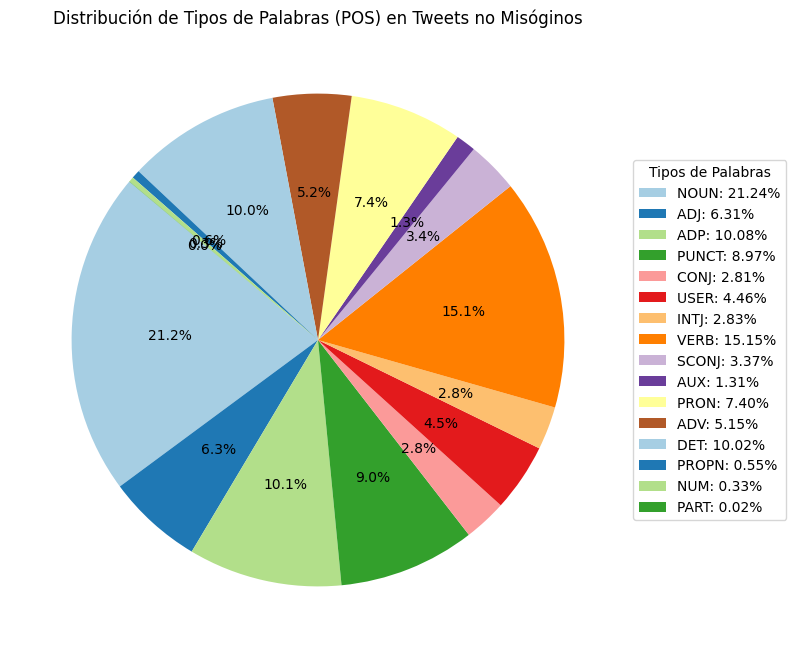

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_pos_percentages_not_misogynous.values(),  startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Palabras (POS) en Tweets no Misóginos")
legend_labels = [f"{pos_type}: {percentage:.2f}%" for pos_type, percentage in overall_pos_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Tipos de Palabras", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


-----------------------------------------------

### Comparación entre tweets misóginos y no misóginos

-----------------------------------------------


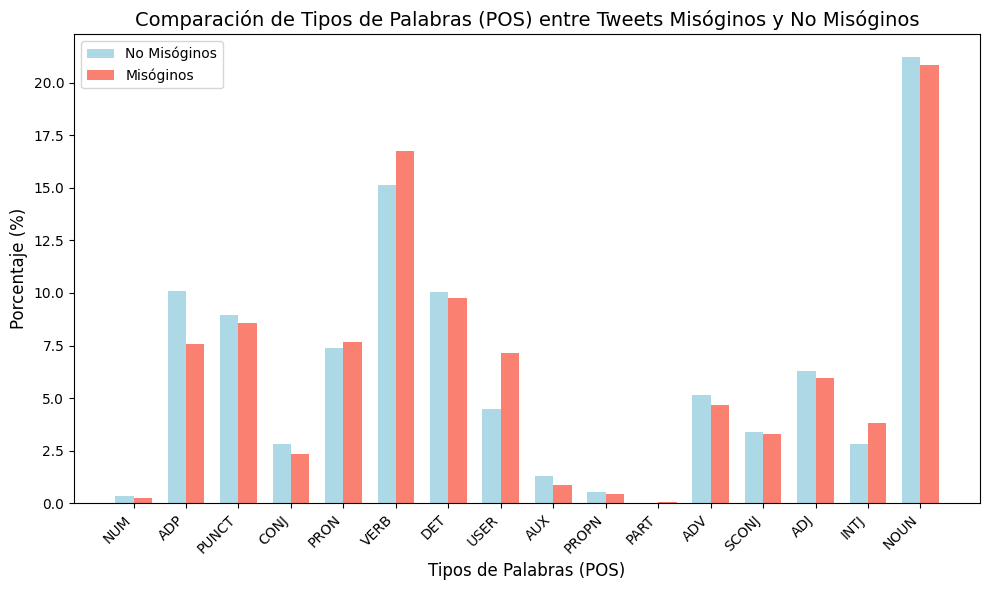

In [32]:
all_pos_tags = list(set(overall_pos_percentages_not_misogynous.keys()).union(set(overall_pos_percentages_misogynous.keys())))

# Obtener los porcentajes de ambos grupos para los tipos de palabras
not_misogynous_percentages = [overall_pos_percentages_not_misogynous.get(tag, 0) for tag in all_pos_tags]
misogynous_percentages = [overall_pos_percentages_misogynous.get(tag, 0) for tag in all_pos_tags]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_pos_tags))

bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='Not misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='Misogynous', color='salmon')

for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=9, color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=9, color='black')

ax.set_xlabel('Parts of Speech Types', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Parts of Speech Types Percentages (Misogynous vs Not misogynous)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_pos_tags, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()